[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/obss/sahi/blob/main/demo/inference_for_yolov5.ipynb)

## 0. Preperation

- Install latest version of SAHI and YOLOv5:

In [ ]:
#!pip install -U sahi yolov5 scikit-image imagecodecs

In [1]:
import os
os.getcwd()

'/home/yyj-avikus/sahi/demo'

## 1. Export frame

In [2]:
import cv2
import os

def extract_frame(video_path, frame_dir, overwrite=False, start=-1, end=-1, every=1):
    """
    Extract frames from a video using OpenCVs VideoCapture
    :param video_path: path of the video
    :param frames_dir: the directory to save the frames
    :param overwrite: to overwrite frames that already exist?
    :param start: start frame
    :param end: end frame
    :param every: frame spacing
    :return: count of images saved
    """
    
    video_path = os.path.normpath(video_path)
    frame_dir = os.path.normpath(frame_dir)
    
    video_dir, video_filename = os.path.split(video_path)
    video_filename = os.path.splitext(video_filename)[0]
    assert os.path.exists(video_path)
    
    capture = cv2.VideoCapture(video_path)
    
    if start < 0:
        start = 0
    if end < 0:
        end = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))
    
    capture.set(1, start)
    frame = start
    while_safety = 0
    saved_count = 0 
    
    while frame < end:
        _, image = capture.read()
        
        if while_safety > 10:  # break the while if our safety maxs out at 10
            break
            
        if image is None:
            while_safety += 1
            continue
            
        if frame % every == 0:
            while_safety = 0
            
            save_path = os.path.join(frame_dir, video_filename, "{:010d}.jpg".format(frame))
            
            if not os.path.exists(os.path.join(frame_dir, video_filename)):
                os.makedirs(os.path.join(frame_dir, video_filename))
            if not os.path.exists(save_path) or overwrite:
                cv2.imwrite(save_path, image)
                saved_count += 1
                
        frame += 1
        
    capture.release()
        
    return saved_count;

In [ ]:
video_path = "../resources/lidar02.mp4"
frame_dirs = "../resources/export_frame"

extract_frame(video_path, frame_dirs, every=30)

## 3. Import required modules

In [4]:
# arrange an instance segmentation model for test
from sahi.utils.yolov5 import (
    download_yolov5s6_model,
)

# import required functions, classes
from sahi import AutoDetectionModel
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url
from sahi.predict import get_prediction, get_sliced_prediction, predict
from IPython.display import Image

In [5]:
coco_m_path = '../resources/models/yolov5m.pt'
fll_model_221007_path = '../resources/models/221007/best.pt'

## 4. Standard Inference with a YOLOv5 Model

- Instantiate a detection model by defining model weight path and other parameters:

In [21]:
coco_base_model = AutoDetectionModel.from_pretrained(
    model_type='yolov5',
    model_path=coco_m_path,
    confidence_threshold=0.25,
    device="cuda:0"
)

fll_model_221007 = AutoDetectionModel.from_pretrained(
    model_type='yolov5',
    model_path=fll_model_221007_path,
    confidence_threshold=0.25,
    device="cuda:0"
)

In [35]:
model = fll_model_221007
model_path = fll_model_221007_path

- Perform prediction by feeding the get_prediction function with an image path and a DetectionModel instance:

In [23]:
test_image_path = "../resources/export_frame/lidar01/0000018960.jpg"

In [24]:
result = get_prediction(test_image_path, model)

- Or perform prediction by feeding the get_prediction function with a numpy image and a DetectionModel instance:

In [ ]:
# result = get_prediction(read_image(test_image_path), detection_model)

- Visualize predicted bounding boxes and masks over the original image:

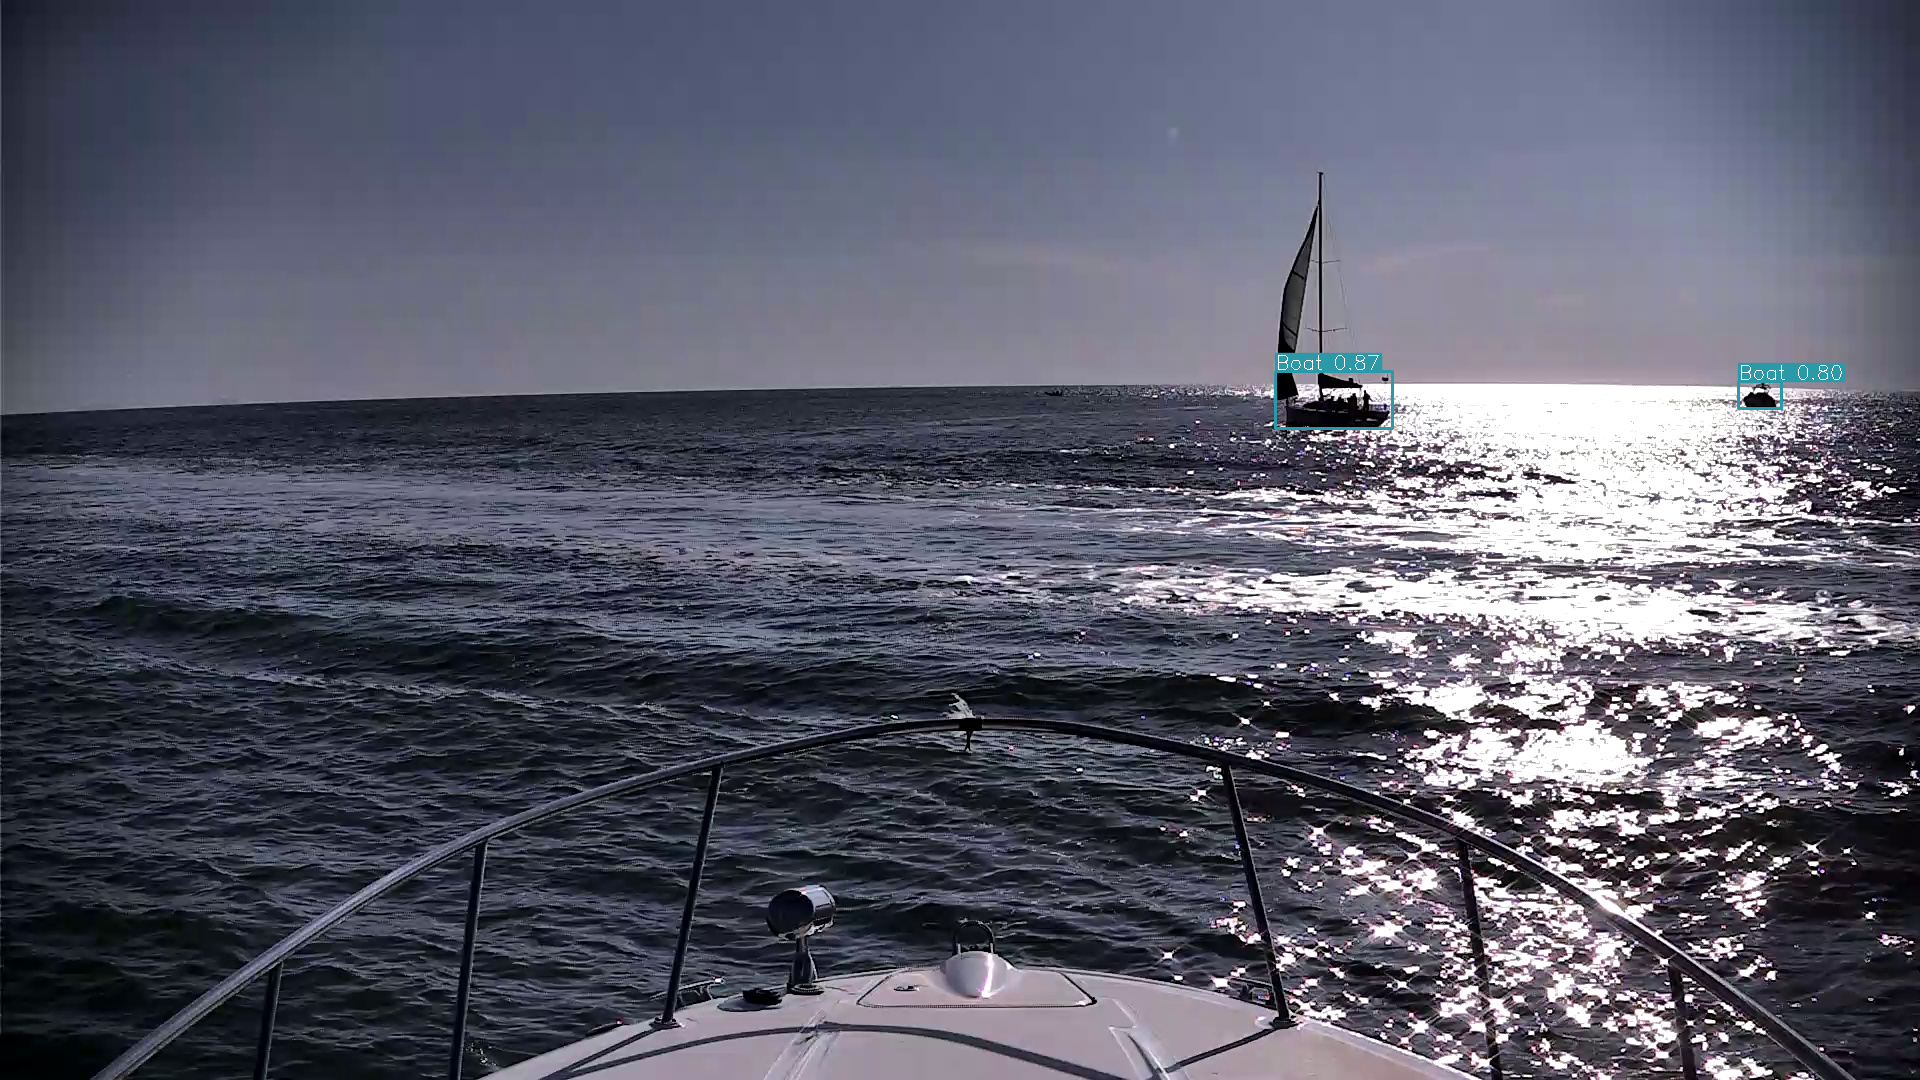

In [25]:
result = get_prediction(read_image(test_image_path), fll_model_221007)
result.export_visuals(export_dir="demo_data/", file_name="prediction_visual1")

Image("demo_data/prediction_visual1.png")

## 4-1. Total Image

In [50]:
model_type = "yolov5"
model_device = "cuda:0" # or 'cpu'
model_confidence_threshold = 0.4

slice_height = 512
slice_width = 512
overlap_height_ratio = 0.2
overlap_width_ratio = 0.2

source_image_dir = "../resources/FLL_VAL/images/"
source_label_dir = "../resources/FLL_VAL/labels/"

no_sliced_prediction = False
no_standard_prediction = False
single_row_predict=True
single_row_y_start=100

In [27]:
"""
dataset_json_path: str
    If coco file path is provided, detection results will be exported in coco json format.
"""

result = predict(
    model_type=model_type,
    model_path=model_path,
    model_device=model_device,
    model_confidence_threshold=model_confidence_threshold,
    no_sliced_prediction=no_sliced_prediction,
    no_standard_prediction=no_standard_prediction,
    source=source_image_dir,
    slice_height=slice_height,
    slice_width=slice_width,
    overlap_height_ratio=overlap_height_ratio,
    overlap_width_ratio=overlap_width_ratio,
    single_row_predict=single_row_predict,
    single_row_y_start=single_row_y_start,
    return_dict=True
)

There are 6270 listed files in folder: images/


Performing inference on images:   0%|                                           | 0/6270 [00:00<?, ?it/s]

Performing prediction on 5 number of slices.


Performing inference on images:   0%|                                   | 1/6270 [00:00<19:47,  5.28it/s]

Prediction time is: 107.13 ms
Performing prediction on 5 number of slices.


Performing inference on images:   0%|                                   | 1/6270 [00:00<19:47,  5.28it/s]

Prediction time is: 112.53 ms


Performing inference on images:   0%|                                   | 2/6270 [00:00<20:12,  5.17it/s]

Performing prediction on 5 number of slices.
Prediction time is: 109.23 ms


Performing inference on images:   0%|                                   | 3/6270 [00:00<19:27,  5.37it/s]

Performing prediction on 5 number of slices.


Performing inference on images:   0%|                                   | 4/6270 [00:00<19:58,  5.23it/s]

Prediction time is: 110.89 ms
Performing prediction on 5 number of slices.


Performing inference on images:   0%|                                   | 4/6270 [00:00<19:58,  5.23it/s]

Prediction time is: 110.30 ms


Performing inference on images:   0%|                                   | 5/6270 [00:01<20:12,  5.17it/s]

Performing prediction on 5 number of slices.
Prediction time is: 109.09 ms


Performing inference on images:   0%|                                   | 6/6270 [00:01<20:15,  5.15it/s]

Performing prediction on 5 number of slices.


Performing inference on images:   0%|                                   | 7/6270 [00:01<19:53,  5.25it/s]

Prediction time is: 112.50 ms
Performing prediction on 5 number of slices.


Performing inference on images:   0%|                                   | 7/6270 [00:01<19:53,  5.25it/s]

Prediction time is: 109.03 ms


Performing inference on images:   0%|                                   | 7/6270 [00:01<22:51,  4.57it/s]


KeyboardInterrupt: 

In [ ]:
result_json_path = str(Path(result["export_dir"]) / "result.json")

In [ ]:
result_json_path

## 4-2. Interact show_samples

In [28]:
image_files = sorted([fn for fn in os.listdir(source_image_dir) if fn.endswith("jpg")])

In [29]:
len(image_files)

6270

In [30]:
from sahi.utils.cv import Colors
import numpy as np
import copy

def visualize_object_predictions(
    image: np.array,
    object_prediction_list,
    rect_th: int = None,
    text_size: float = None,
    text_th: float = None,
    color: tuple = None,
):
    """
    Visualizes prediction category names, bounding boxes over the source image
    and exports it to output folder.
    Arguments:
        object_prediction_list: a list of prediction.ObjectPrediction
        rect_th: rectangle thickness
        text_size: size of the category name over box
        text_th: text thickness
        color: annotation color in the form: (0, 255, 0)
        output_dir: directory for resulting visualization to be exported
        file_name: exported file will be saved as: output_dir+file_name+".png"
        export_format: can be specified as 'jpg' or 'png'
    """
    # deepcopy image so that original is not altered
    image = copy.deepcopy(image)
    # select predefined classwise color palette if not specified
    if color is None:
        colors = Colors()
    else:
        colors = None
    # set rect_th for boxes
    rect_th = rect_th or max(round(sum(image.shape) / 2 * 0.001), 1)
    # set text_th for category names
    text_th = text_th or max(rect_th - 1, 1)
    # set text_size for category names
    text_size = text_size or rect_th / 3
    # add bbox and mask to image if present
    for object_prediction in object_prediction_list:
        # deepcopy object_prediction_list so that original is not altered
        object_prediction = object_prediction.deepcopy()

        bbox = object_prediction.bbox.to_voc_bbox()
        category_name = object_prediction.category.name
        score = object_prediction.score.value

        # set color
        if colors is not None:
            color = colors(object_prediction.category.id)
        # visualize masks if present
        if object_prediction.mask is not None:
            # deepcopy mask so that original is not altered
            mask = object_prediction.mask.bool_mask
            # draw mask
            rgb_mask = apply_color_mask(mask, color)
            image = cv2.addWeighted(image, 1, rgb_mask, 0.4, 0)
        # set bbox points
        p1, p2 = (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3]))
        # visualize boxes
        cv2.rectangle(
            image,
            p1,
            p2,
            color=color,
            thickness=rect_th
        )
        # arange bounding box text location
        label = f"{category_name} {score:.2f}"
        w, h = cv2.getTextSize(label, 0, fontScale=text_size, thickness=text_th)[0]  # label width, height
        outside = p1[1] - h - 3 >= 0  # label fits outside box
        p2 = p1[0] + w, p1[1] - h - 3 if outside else p1[1] + h + 3
        # add bounding box text
        cv2.rectangle(image, p1, p2, color, -1, cv2.LINE_AA)  # filled
        cv2.putText(
            image,
            label,
            (p1[0], p1[1] - 2 if outside else p1[1] + h + 2),
            0,
            text_size,
            (255, 255, 255),
            thickness=text_th,
        )
        
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
    return image

In [31]:
from ipywidgets import interact
import matplotlib.pyplot as plt
%matplotlib inline

@interact(index=(0, len(image_files)-1))
def show_sample(index=0):
    image_file = image_files[index]
    image_path = os.path.join(source_image_dir, image_file)
    image = cv2.imread(image_path)
    
    result = get_prediction(image_path, model)
    
    canvas = visualize_object_predictions(image, result.object_prediction_list)
    
    plt.figure(figsize=(16,16))
    plt.imshow(canvas)
    plt.axis('off')
    plt.show()

interactive(children=(IntSlider(value=0, description='index', max=6269), Output()), _dom_classes=('widget-inte…

### Add confidence_threshold with interact

In [19]:
from ipywidgets import interact
import matplotlib.pyplot as plt
%matplotlib inline

@interact(index=(0, len(image_files)-1), confidence_score=(0, 1, 0.05))
def show_sample(index=0, confidence_score=0.25):
    model = AutoDetectionModel.from_pretrained(
        model_type='yolov5',
        model_path=fll_model_221007_path,
        confidence_threshold=confidence_score,
        device="cuda:0"
    )

    image_file = image_files[index]
    image_path = os.path.join(source_image_dir, image_file)
    image = cv2.imread(image_path)
    
    result = get_prediction(image_path, model)
    
    canvas = visualize_object_predictions(image, result.object_prediction_list)
    
    plt.figure(figsize=(16,16))
    plt.imshow(canvas)
    plt.axis('off')
    plt.show()
    

interactive(children=(IntSlider(value=0, description='index', max=6269), FloatSlider(value=0.25, description='…

## 4-3. Interact show_samples with no nms AutoShape 

In [36]:
from yolov5.models.common import AutoShape, DetectMultiBackend
from yolov5.utils.torch_utils import select_device

device="cuda:0"
autoshape=True

device = select_device(device)  # detection model
AutoShapeModel = AutoShape(DetectMultiBackend(model_path, device=device, fuse=autoshape))  # for file/URI/PIL/cv2/np inputs and NMS

10/07/2022 20:28:26 - INFO - yolov5 -   YOLOv5 🚀 2022-10-4 Python-3.8.13 torch-1.8.2 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 5936MiB)

YOLOv5 🚀 2022-10-4 Python-3.8.13 torch-1.8.2 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 5936MiB)

10/07/2022 20:28:27 - INFO - yolov5 -   Fusing layers... 
Fusing layers... 
10/07/2022 20:28:27 - INFO - yolov5 -   Model summary: 214 layers, 7030417 parameters, 0 gradients, 16.0 GFLOPs
Model summary: 214 layers, 7030417 parameters, 0 gradients, 16.0 GFLOPs
10/07/2022 20:28:27 - INFO - yolov5 -   Adding AutoShape... 
Adding AutoShape... 


In [37]:
from ipywidgets import interact
import matplotlib.pyplot as plt
%matplotlib inline

@interact(index=(0, len(image_files)-1))
def show_sample(index=0):
    image_file = image_files[index]
    image_path = os.path.join(source_image_dir, image_file)
    
    result = AutoShapeModel(image_path, nms=False)
    canvas = result.render()[0]
    
    plt.figure(figsize=(16,16))
    plt.imshow(canvas)
    plt.axis('off')
    plt.show()

interactive(children=(IntSlider(value=0, description='index', max=6269), Output()), _dom_classes=('widget-inte…

In [40]:
from ipywidgets import interact
import matplotlib.pyplot as plt
%matplotlib inline

@interact(index=(0, len(image_files)-1))
def show_sample(index=0):
    image_file = image_files[index]
    image_path = os.path.join(source_image_dir, image_file)
    image = cv2.imread(image_path)
    
    print("Image Path:", image_path)
    result_with_nms = get_prediction(image_path, model)

    canvas1 = visualize_object_predictions(image, result_with_nms.object_prediction_list)
    
    result_with_no_nms = AutoShapeModel(image_path, nms=False)
    
    canvas2 = result_with_no_nms.render()[0]
    
    fig, axes = plt.subplots(1, 2, figsize=(32,32)) 
    plt.subplots_adjust(wspace=0.05, hspace=0.05)
    
    axes[0].axis('off')
    axes[1].axis('off')
    
    axes[0].imshow(canvas1)
    axes[1].imshow(canvas2)
    
    plt.axis('off')
    plt.show()

interactive(children=(IntSlider(value=0, description='index', max=6269), Output()), _dom_classes=('widget-inte…

## 4-4. Interact show_samples with slice prediction

In [41]:
from typing import List
import copy
import matplotlib.pyplot as plt
import cv2
%matplotlib inline 
from sahi import slicing
from sahi.slicing import slice_image

slicing.logger.setLevel(slicing.logging.INFO)

# single_row_y_start: int = 200,
@interact(index=(0, len(image_files)-1), slice_size=(0, 512), overlap_ratio=(0, 0.5, 0.05), single_row_y_start=(0, 512))
def visualize_slice_rect(index=0, slice_size=256, overlap_ratio=0.2, single_row_y_start=200):
    
    image_file = image_files[index]
    image_path = os.path.join(source_image_dir, image_file)
    
    res = slice_image(image_path, 
                      slice_width=slice_size,
                      slice_height=slice_size,
                      overlap_height_ratio=overlap_ratio,
                      overlap_width_ratio=overlap_ratio,
                      single_row_y_start=single_row_y_start,
                      single_row_predict=True,
                      verbose=1)

    image = cv2.imread(image_path)
    image = copy.deepcopy(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    for start_pixel in res.starting_pixels:
        cv2.rectangle(image,
                      start_pixel,
                      [s1+s2 for s1, s2 in zip(start_pixel,[slice_size,slice_size])],
                      color=(255, 0, 0),
                      thickness=2)

    plt.figure(figsize=(16,16))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

interactive(children=(IntSlider(value=0, description='index', max=6269), IntSlider(value=256, description='sli…

In [42]:
from ipywidgets import interact
import matplotlib.pyplot as plt
%matplotlib inline

overlap_ratio=0.2
slice_size=512

@interact(index=(0, len(image_files)-1))
def show_sample(index=0):
    image_file = image_files[index]
    image_path = os.path.join(source_image_dir, image_file)
    image = cv2.imread(image_path)
    
    slice_result = slice_image(image_path, 
                              slice_width=slice_size,
                              slice_height=slice_size,
                              overlap_height_ratio=overlap_ratio,
                              overlap_width_ratio=overlap_ratio,
                              single_row_y_start=200,
                              single_row_predict=True,
                              verbose=1)

    for start_pixel in slice_result.starting_pixels:
        cv2.rectangle(image,
                      start_pixel,
                      [s1+s2 for s1, s2 in zip(start_pixel,[slice_size,slice_size])],
                      color=(255, 255, 0),
                      thickness=2)
        
    result = get_sliced_prediction(image_path,
                                   model,
                                   slice_height=slice_size,
                                   slice_width=slice_size,
                                   postprocess_match_threshold=0.5,
                                   overlap_height_ratio=overlap_ratio,
                                   overlap_width_ratio=overlap_ratio,
                                   single_row_y_start=200,
                                   single_row_predict=True)
    
    canvas = visualize_object_predictions(image, result.object_prediction_list)
    
    plt.figure(figsize=(16,16))
    plt.imshow(canvas)
    plt.axis('off')
    plt.show()

interactive(children=(IntSlider(value=0, description='index', max=6269), Output()), _dom_classes=('widget-inte…

## Show Yolo Input Image

In [46]:
# Pre-process
from pathlib import Path
from PIL import Image
from yolov5.utils.dataloaders import exif_transpose, letterbox
from yolov5.utils.general import make_divisible
import torch
import random
from glob import glob

ims =  random.choice(glob(source_image_dir+"/*.jpg"))
size = (640, 640)
device = "cuda:0"

n, ims = (1, [ims])  # number, list of images

shape1 = [] # image and inference shapes, filenames
for i, im in enumerate(ims):
    f = f'image{i}'  # filename
    if isinstance(im, (str, Path)):  # filename or uri
        im, f = Image.open(requests.get(im, stream=True).raw if str(im).startswith('http') else im), im
        im = np.asarray(exif_transpose(im))
    elif isinstance(im, Image.Image):  # PIL Image
        im, f = np.asarray(exif_transpose(im)), getattr(im, 'filename', f) or f
    if im.shape[0] < 5:  # image in CHW
        im = im.transpose((1, 2, 0))  # reverse dataloader .transpose(2, 0, 1)
    im = im[..., :3] if im.ndim == 3 else cv2.cvtColor(im, cv2.COLOR_GRAY2BGR)  # enforce 3ch input
    
    s = im.shape[:2]  # HWC
    g = max(size) / max(s)  # gain
    shape1.append([y * g for y in s])
    ims[i] = im if im.data.contiguous else np.ascontiguousarray(im)  # update

shape1 = [make_divisible(x, 32) for x in np.array(shape1).max(0)] # inf shape
x = [letterbox(im, shape1, auto=False)[0] for im in ims]  # pad
x = np.ascontiguousarray(np.array(x).transpose((0, 3, 1, 2)))  # stack and BHWC to BCHW
x = torch.from_numpy(x).to(torch.device(device)).type(torch.float32) / 255  # uint8 to fp16/32

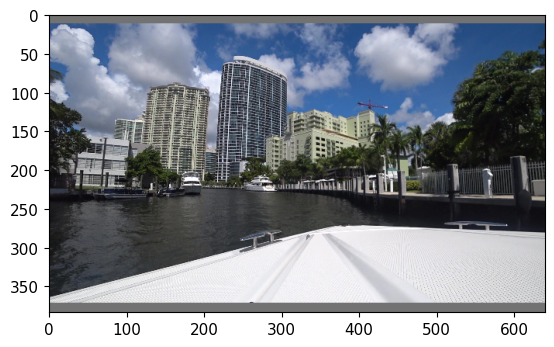

In [47]:
plt.imshow(x[0].permute(1,2,0).cpu())

## 5. SAHI Benchmark

### 5-1. Create Val.json

In [58]:
import json

In [76]:
def initial_extract(img_dir, label_dir, out_dir):
    licenses = [
        {
            "name": "",
            "id": 0,
            "url": ""
        }
    ]

    info_ = [
        {
            "contributor": "",
            "date_created": "",
            "description": "",
            "url": "",
            "version": "",
            "year": ""
        }
    ]

    categories = [
        {
            "id": 1,
            "name": "Buoy",
            "supercategory": ""
        },
        {
            "id": 2,
            "name": "Boat",
            "supercategory": ""
        },
        {
            "id": 3,
            "name": "Channel Marker",
            "supercategory": ""
        },
        {
            "id": 4,
            "name": "Speed Warning Sign",
            "supercategory": ""
        }
    ]

    img_idx = 0
    annot_idx = 0

    imgs_list = []
    annots_list = []

    for label_file in os.listdir(label_dir):
        label_file_ = os.path.join(label_dir, label_file)
        img_file_ = os.path.join(img_dir, f'{os.path.splitext(label_file)[0]}.jpg')
        img = Image.open(img_file_)
        image_w, image_h = img.size

        imgs_list.append({
            'id': img_idx,
            'width': image_w,
            'height': image_h,
            'file_name': f'{os.path.splitext(label_file)[0]}.jpg',
            "license": 0,
            "flickr_url": "",
            "coco_url": "",
            "date_captured": 0
        })

        with open(label_file_, 'r') as label_f:
            labels = label_f.readlines()

            for label in labels:
                cat, xc, yc, label_normalized_w, label_normalized_h = list(map(lambda x: int(x) if len(x) == 1 else float(x), label.split()))
                label_w, label_h = image_w * label_normalized_w, image_h * label_normalized_h
                xmin, ymin = (image_w * xc) - (label_w / 2), (image_h * yc) - (label_h / 2)
                
                xmin = 0 if xmin < 0 else xmin
                ymin = 0 if ymin < 0 else ymin

                annots_list.append({
                    'id': annot_idx,
                    'image_id': img_idx,
                    'category_id': cat + 1,
                    'area': int(label_h * label_w),
                    'bbox': [
                        xmin,
                        ymin,
                        label_w,
                        label_h
                    ],
                    'iscrowd': 0,
                    'attributes': {
                        'type': '',
                        'occluded': False
                    }
                })

                annot_idx += 1

        img_idx += 1

    out_dict = {
        'licenses': licenses,
        'info': info_,
        'categories': categories,
        'images': imgs_list,
        'annotations': annots_list
    }
    
    if not os.path.exists(out_dir):
        os.makedirs(out_dir, exist_ok=True)
    
    with open(os.path.join(out_dir, 'val.json'), 'w') as out_f:
        print(os.path.join(out_dir, 'val.json'))
        json.dump(out_dict, out_f)
        
    return os.path.join(out_dir, 'val.json')

In [77]:
# initial_extract(img_dir, label_dir, out_dir)
gt_json_path = initial_extract(source_image_dir, source_label_dir, str(Path(source_image_dir).parent))

../resources/FLL_VAL/val.json


### 5-2. Predict: Parameter Sweep 

In [78]:
from pathlib import Path

from sahi.predict import predict
from sahi.scripts.coco_error_analysis import analyse
from sahi.scripts.coco_evaluation import evaluate

MODEL_TYPE = "yolov5"
MODEL_PATH = model_path
MODEL_CONFIG_PATH = ""
EVAL_IMAGES_FOLDER_DIR = source_image_dir
EVAL_DATASET_JSON_PATH = gt_json_path
INFERENCE_SETTING = "AVIKUS_FL"
EXPORT_VISUAL = False
MAX_DETECTIONS = 500

In [79]:
INFERENCE_SETTING_TO_PARAMS = {
    "AVIKUS_FL": {
        "no_standard_prediction": False,
        "no_sliced_prediction": False,
        "slice_size": 640,
        "overlap_ratio": 0.25,
        "match_threshold": 0.5,
        "postprocess_class_agnostic": False,
        "single_row_y_start": 0,
    },
}

setting_params = INFERENCE_SETTING_TO_PARAMS[INFERENCE_SETTING]

In [80]:
result = predict(
    model_type=MODEL_TYPE,
    model_path=MODEL_PATH,
    model_config_path=MODEL_CONFIG_PATH,
    model_confidence_threshold=0.01,
    model_device="cuda:0",
    model_category_mapping=None,
    model_category_remapping=None,
    source=EVAL_IMAGES_FOLDER_DIR,
    no_standard_prediction=setting_params["no_standard_prediction"],
    no_sliced_prediction=setting_params["no_sliced_prediction"],
    image_size=None,
    slice_height=setting_params["slice_size"],
    slice_width=setting_params["slice_size"],
    overlap_height_ratio=setting_params["overlap_ratio"],
    overlap_width_ratio=setting_params["overlap_ratio"],
    postprocess_type="GREEDYNMM",
    postprocess_match_metric="IOS",
    postprocess_match_threshold=setting_params["match_threshold"],
    postprocess_class_agnostic=setting_params["postprocess_class_agnostic"],
    novisual=not EXPORT_VISUAL,
    dataset_json_path=EVAL_DATASET_JSON_PATH,
    project="runs/predict_eval_analyse",
    name=INFERENCE_SETTING,
    visual_bbox_thickness=None,
    visual_text_size=None,
    visual_text_thickness=None,
    visual_export_format="png",
    verbose=1,
    return_dict=True,
    force_postprocess_type=True,
    single_row_predict=True,
    single_row_y_start=setting_params["single_row_y_start"]
)

result_json_path = str(Path(result["export_dir"]) / "result.json")

indexing coco dataset annotations...


Performing inference on images:   0%|                                   | 1/5906 [00:00<19:16,  5.11it/s]

Performing prediction on 4 number of slices.
Prediction time is: 174.13 ms


Performing inference on images:   0%|                                   | 2/5906 [00:00<19:03,  5.17it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.99 ms
Performing prediction on 4 number of slices.


Performing inference on images:   0%|                                   | 4/5906 [00:00<18:01,  5.46it/s]

Prediction time is: 155.39 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.92 ms


Performing inference on images:   0%|                                   | 5/5906 [00:00<17:39,  5.57it/s]

Performing prediction on 4 number of slices.
Prediction time is: 150.41 ms
Performing prediction on 4 number of slices.


Prediction time is: 160.83 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.37 ms


Performing inference on images:   0%|                                   | 8/5906 [00:01<17:33,  5.60it/s]

Performing prediction on 4 number of slices.
Prediction time is: 153.62 ms
Performing prediction on 4 number of slices.


Performing inference on images:   0%|                                  | 10/5906 [00:01<17:45,  5.53it/s]

Prediction time is: 159.47 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.57 ms


Performing inference on images:   0%|                                  | 11/5906 [00:02<17:42,  5.55it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.11 ms
Performing prediction on 4 number of slices.


Performing inference on images:   0%|                                  | 13/5906 [00:02<17:35,  5.58it/s]

Prediction time is: 155.90 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.24 ms
Performing prediction on 4 number of slices.


Performing inference on images:   0%|                                  | 15/5906 [00:02<17:42,  5.54it/s]

Prediction time is: 165.84 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.50 ms


Performing inference on images:   0%|                                  | 16/5906 [00:02<17:49,  5.51it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.50 ms
Performing prediction on 4 number of slices.


Performing inference on images:   0%|                                  | 18/5906 [00:03<17:40,  5.55it/s]

Prediction time is: 153.12 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.91 ms


Performing inference on images:   0%|                                  | 19/5906 [00:03<18:10,  5.40it/s]

Performing prediction on 4 number of slices.
Prediction time is: 169.88 ms
Performing prediction on 4 number of slices.


Performing inference on images:   0%|                                  | 21/5906 [00:03<18:00,  5.45it/s]

Prediction time is: 158.11 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.47 ms


Performing inference on images:   0%|▏                                 | 22/5906 [00:04<17:52,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.47 ms
Performing prediction on 4 number of slices.


Performing inference on images:   0%|▏                                 | 24/5906 [00:04<17:48,  5.50it/s]

Prediction time is: 159.31 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.00 ms


Performing inference on images:   0%|▏                                 | 25/5906 [00:04<17:46,  5.52it/s]

Performing prediction on 4 number of slices.
Prediction time is: 152.00 ms
Performing prediction on 4 number of slices.


Performing inference on images:   0%|▏                                 | 27/5906 [00:04<17:49,  5.50it/s]

Prediction time is: 165.01 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.54 ms


Performing inference on images:   0%|▏                                 | 28/5906 [00:05<17:37,  5.56it/s]

Performing prediction on 4 number of slices.
Prediction time is: 150.99 ms
Performing prediction on 4 number of slices.


Performing inference on images:   1%|▏                                 | 30/5906 [00:05<17:24,  5.62it/s]

Prediction time is: 156.60 ms
Performing prediction on 4 number of slices.
Prediction time is: 150.13 ms
Performing prediction on 4 number of slices.


Performing inference on images:   1%|▏                                 | 32/5906 [00:05<17:30,  5.59it/s]

Prediction time is: 156.09 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.79 ms


Performing inference on images:   1%|▏                                 | 33/5906 [00:06<17:46,  5.51it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.49 ms
Performing prediction on 4 number of slices.


Performing inference on images:   1%|▏                                 | 35/5906 [00:06<17:43,  5.52it/s]

Prediction time is: 159.54 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.23 ms


Performing inference on images:   1%|▏                                 | 36/5906 [00:06<17:46,  5.50it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.79 ms
Performing prediction on 4 number of slices.


Performing inference on images:   1%|▏                                 | 38/5906 [00:06<17:47,  5.50it/s]

Prediction time is: 154.39 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.05 ms


Performing inference on images:   1%|▏                                 | 39/5906 [00:07<18:00,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.56 ms
Performing prediction on 4 number of slices.


Performing inference on images:   1%|▏                                 | 41/5906 [00:07<17:47,  5.49it/s]

Prediction time is: 160.81 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.69 ms


Performing inference on images:   1%|▏                                 | 42/5906 [00:07<17:29,  5.59it/s]

Performing prediction on 4 number of slices.
Prediction time is: 150.47 ms
Performing prediction on 4 number of slices.


Performing inference on images:   1%|▎                                 | 44/5906 [00:07<17:23,  5.62it/s]

Prediction time is: 156.83 ms
Performing prediction on 4 number of slices.
Prediction time is: 152.95 ms
Performing prediction on 4 number of slices.


Performing inference on images:   1%|▎                                 | 46/5906 [00:08<17:45,  5.50it/s]

Prediction time is: 164.10 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.20 ms


Performing inference on images:   1%|▎                                 | 47/5906 [00:08<17:47,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.52 ms
Performing prediction on 4 number of slices.


Performing inference on images:   1%|▎                                 | 49/5906 [00:08<17:35,  5.55it/s]

Prediction time is: 159.71 ms
Performing prediction on 4 number of slices.
Prediction time is: 152.93 ms
Performing prediction on 4 number of slices.


Performing inference on images:   1%|▎                                 | 51/5906 [00:09<17:31,  5.57it/s]

Prediction time is: 164.99 ms
Performing prediction on 4 number of slices.
Prediction time is: 151.17 ms
Performing prediction on 4 number of slices.


Performing inference on images:   1%|▎                                 | 53/5906 [00:09<17:17,  5.64it/s]

Prediction time is: 152.29 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.50 ms


Performing inference on images:   1%|▎                                 | 54/5906 [00:09<17:25,  5.59it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.01 ms
Performing prediction on 4 number of slices.


Performing inference on images:   1%|▎                                 | 56/5906 [00:10<17:39,  5.52it/s]

Prediction time is: 156.79 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.02 ms


Performing inference on images:   1%|▎                                 | 57/5906 [00:10<17:33,  5.55it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.00 ms
Performing prediction on 4 number of slices.


Performing inference on images:   1%|▎                                 | 58/5906 [00:10<17:44,  5.49it/s]

Prediction time is: 156.83 ms
Performing prediction on 4 number of slices.
Prediction time is: 170.25 ms


Performing inference on images:   1%|▎                                 | 60/5906 [00:10<18:11,  5.35it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.02 ms
Performing prediction on 4 number of slices.


Performing inference on images:   1%|▎                                 | 62/5906 [00:11<17:56,  5.43it/s]

Prediction time is: 159.53 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.50 ms


Performing inference on images:   1%|▎                                 | 63/5906 [00:11<17:43,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.01 ms
Performing prediction on 4 number of slices.


Performing inference on images:   1%|▎                                 | 65/5906 [00:11<17:25,  5.59it/s]

Prediction time is: 156.77 ms
Performing prediction on 4 number of slices.
Prediction time is: 152.86 ms
Performing prediction on 4 number of slices.


Performing inference on images:   1%|▍                                 | 67/5906 [00:12<18:03,  5.39it/s]

Prediction time is: 164.25 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.56 ms


Performing inference on images:   1%|▍                                 | 68/5906 [00:12<18:25,  5.28it/s]

Performing prediction on 4 number of slices.
Prediction time is: 169.75 ms
Performing prediction on 4 number of slices.


Performing inference on images:   1%|▍                                 | 70/5906 [00:12<18:18,  5.31it/s]

Prediction time is: 173.59 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.61 ms


Performing inference on images:   1%|▍                                 | 71/5906 [00:12<17:50,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 148.47 ms
Performing prediction on 4 number of slices.


Performing inference on images:   1%|▍                                 | 73/5906 [00:13<18:19,  5.31it/s]

Prediction time is: 167.55 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.69 ms


Performing inference on images:   1%|▍                                 | 74/5906 [00:13<18:24,  5.28it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.05 ms
Performing prediction on 4 number of slices.


Performing inference on images:   1%|▍                                 | 76/5906 [00:13<18:11,  5.34it/s]

Prediction time is: 159.81 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.53 ms


Performing inference on images:   1%|▍                                 | 77/5906 [00:14<18:02,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.92 ms
Performing prediction on 4 number of slices.


Performing inference on images:   1%|▍                                 | 79/5906 [00:14<18:06,  5.36it/s]

Prediction time is: 159.74 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.48 ms


Performing inference on images:   1%|▍                                 | 80/5906 [00:14<17:54,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.74 ms
Performing prediction on 4 number of slices.


Performing inference on images:   1%|▍                                 | 82/5906 [00:14<17:52,  5.43it/s]

Prediction time is: 161.26 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.97 ms


Performing inference on images:   1%|▍                                 | 83/5906 [00:15<17:44,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.32 ms
Performing prediction on 4 number of slices.


Performing inference on images:   1%|▍                                 | 85/5906 [00:15<17:44,  5.47it/s]

Prediction time is: 164.74 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.80 ms


Performing inference on images:   1%|▍                                 | 86/5906 [00:15<18:00,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.11 ms
Performing prediction on 4 number of slices.


Performing inference on images:   1%|▌                                 | 88/5906 [00:16<17:52,  5.42it/s]

Prediction time is: 160.26 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.09 ms


Performing inference on images:   2%|▌                                 | 89/5906 [00:16<17:42,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.60 ms
Performing prediction on 4 number of slices.


Performing inference on images:   2%|▌                                 | 91/5906 [00:16<17:35,  5.51it/s]

Prediction time is: 161.10 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.98 ms


Performing inference on images:   2%|▌                                 | 92/5906 [00:16<17:37,  5.50it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.22 ms
Performing prediction on 4 number of slices.


Performing inference on images:   2%|▌                                 | 94/5906 [00:17<18:00,  5.38it/s]

Prediction time is: 168.15 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.46 ms


Performing inference on images:   2%|▌                                 | 95/5906 [00:17<17:38,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 153.26 ms
Performing prediction on 4 number of slices.


Performing inference on images:   2%|▌                                 | 97/5906 [00:17<18:04,  5.35it/s]

Prediction time is: 163.57 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.17 ms


Performing inference on images:   2%|▌                                 | 98/5906 [00:17<18:28,  5.24it/s]

Performing prediction on 4 number of slices.
Prediction time is: 171.42 ms
Performing prediction on 4 number of slices.


Performing inference on images:   2%|▌                                | 100/5906 [00:18<18:05,  5.35it/s]

Prediction time is: 157.20 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.92 ms


Performing inference on images:   2%|▌                                | 101/5906 [00:18<17:53,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.38 ms
Performing prediction on 4 number of slices.


Performing inference on images:   2%|▌                                | 103/5906 [00:18<18:04,  5.35it/s]

Prediction time is: 166.49 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.68 ms


Performing inference on images:   2%|▌                                | 104/5906 [00:19<17:55,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.77 ms
Performing prediction on 4 number of slices.


Performing inference on images:   2%|▌                                | 106/5906 [00:19<17:49,  5.42it/s]

Prediction time is: 159.05 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.78 ms


Performing inference on images:   2%|▌                                | 107/5906 [00:19<17:42,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.20 ms
Performing prediction on 4 number of slices.


Performing inference on images:   2%|▌                                | 109/5906 [00:19<17:57,  5.38it/s]

Prediction time is: 170.72 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.03 ms


Performing inference on images:   2%|▌                                | 110/5906 [00:20<17:47,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.74 ms
Performing prediction on 4 number of slices.


Performing inference on images:   2%|▋                                | 112/5906 [00:20<17:59,  5.37it/s]

Prediction time is: 160.18 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.00 ms


Performing inference on images:   2%|▋                                | 113/5906 [00:20<17:41,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 152.29 ms
Performing prediction on 4 number of slices.


Performing inference on images:   2%|▋                                | 115/5906 [00:21<17:30,  5.52it/s]

Prediction time is: 155.33 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.10 ms


Performing inference on images:   2%|▋                                | 116/5906 [00:21<17:26,  5.53it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.06 ms
Performing prediction on 4 number of slices.


Performing inference on images:   2%|▋                                | 118/5906 [00:21<17:28,  5.52it/s]

Prediction time is: 164.45 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.14 ms


Performing inference on images:   2%|▋                                | 119/5906 [00:21<17:20,  5.56it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.78 ms
Performing prediction on 4 number of slices.


Performing inference on images:   2%|▋                                | 121/5906 [00:22<17:34,  5.48it/s]

Prediction time is: 161.82 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.04 ms


Performing inference on images:   2%|▋                                | 122/5906 [00:22<17:35,  5.48it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.08 ms
Performing prediction on 4 number of slices.


Prediction time is: 156.42 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.78 ms


Performing inference on images:   2%|▋                                | 125/5906 [00:22<17:07,  5.63it/s]

Performing prediction on 4 number of slices.
Prediction time is: 149.67 ms
Performing prediction on 4 number of slices.


Performing inference on images:   2%|▋                                | 127/5906 [00:23<17:39,  5.45it/s]

Prediction time is: 161.93 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.95 ms


Performing inference on images:   2%|▋                                | 128/5906 [00:23<17:37,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.02 ms
Performing prediction on 4 number of slices.


Performing inference on images:   2%|▋                                | 130/5906 [00:23<17:43,  5.43it/s]

Prediction time is: 160.86 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.46 ms


Performing inference on images:   2%|▋                                | 131/5906 [00:24<17:39,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 153.31 ms
Performing prediction on 4 number of slices.


Performing inference on images:   2%|▋                                | 133/5906 [00:24<17:55,  5.37it/s]

Prediction time is: 169.62 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.58 ms


Performing inference on images:   2%|▋                                | 134/5906 [00:24<17:50,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.23 ms
Performing prediction on 4 number of slices.


Performing inference on images:   2%|▊                                | 136/5906 [00:24<17:42,  5.43it/s]

Prediction time is: 160.78 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.49 ms


Performing inference on images:   2%|▊                                | 137/5906 [00:25<17:54,  5.37it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.23 ms
Performing prediction on 4 number of slices.


Performing inference on images:   2%|▊                                | 139/5906 [00:25<17:53,  5.37it/s]

Prediction time is: 161.47 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.08 ms


Performing inference on images:   2%|▊                                | 140/5906 [00:25<18:02,  5.33it/s]

Performing prediction on 4 number of slices.
Prediction time is: 168.21 ms
Performing prediction on 4 number of slices.


Performing inference on images:   2%|▊                                | 142/5906 [00:26<18:03,  5.32it/s]

Prediction time is: 165.44 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.13 ms


Performing inference on images:   2%|▊                                | 143/5906 [00:26<17:48,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.97 ms
Performing prediction on 4 number of slices.


Performing inference on images:   2%|▊                                | 145/5906 [00:26<18:04,  5.31it/s]

Prediction time is: 160.56 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.60 ms


Performing inference on images:   2%|▊                                | 146/5906 [00:26<18:00,  5.33it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.36 ms
Performing prediction on 4 number of slices.


Performing inference on images:   3%|▊                                | 148/5906 [00:27<17:35,  5.45it/s]

Prediction time is: 157.76 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.77 ms


Performing inference on images:   3%|▊                                | 149/5906 [00:27<17:56,  5.35it/s]

Performing prediction on 4 number of slices.
Prediction time is: 169.80 ms
Performing prediction on 4 number of slices.


Performing inference on images:   3%|▊                                | 151/5906 [00:27<17:51,  5.37it/s]

Prediction time is: 167.07 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.08 ms


Performing inference on images:   3%|▊                                | 152/5906 [00:27<17:33,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.05 ms
Performing prediction on 4 number of slices.


Performing inference on images:   3%|▊                                | 154/5906 [00:28<17:23,  5.51it/s]

Prediction time is: 156.81 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.86 ms


Performing inference on images:   3%|▊                                | 155/5906 [00:28<17:31,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.35 ms
Performing prediction on 4 number of slices.


Performing inference on images:   3%|▉                                | 157/5906 [00:28<17:34,  5.45it/s]

Prediction time is: 157.61 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.73 ms


Performing inference on images:   3%|▉                                | 158/5906 [00:29<17:27,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.21 ms
Performing prediction on 4 number of slices.


Performing inference on images:   3%|▉                                | 160/5906 [00:29<17:54,  5.35it/s]

Prediction time is: 162.01 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.94 ms


Performing inference on images:   3%|▉                                | 161/5906 [00:29<17:39,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.52 ms
Performing prediction on 4 number of slices.


Performing inference on images:   3%|▉                                | 162/5906 [00:29<17:44,  5.39it/s]

Prediction time is: 161.04 ms
Performing prediction on 4 number of slices.
Prediction time is: 172.29 ms


Performing inference on images:   3%|▉                                | 164/5906 [00:30<17:58,  5.32it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.48 ms
Performing prediction on 4 number of slices.


Performing inference on images:   3%|▉                                | 166/5906 [00:30<17:26,  5.48it/s]

Prediction time is: 158.27 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.32 ms
Performing prediction on 4 number of slices.


Performing inference on images:   3%|▉                                | 168/5906 [00:30<17:19,  5.52it/s]

Prediction time is: 157.23 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.36 ms


Performing inference on images:   3%|▉                                | 169/5906 [00:31<17:29,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.58 ms
Performing prediction on 4 number of slices.


Performing inference on images:   3%|▉                                | 171/5906 [00:31<17:56,  5.33it/s]

Prediction time is: 159.67 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.96 ms


Performing inference on images:   3%|▉                                | 172/5906 [00:31<18:13,  5.24it/s]

Performing prediction on 4 number of slices.
Prediction time is: 170.21 ms
Performing prediction on 4 number of slices.


Performing inference on images:   3%|▉                                | 173/5906 [00:31<18:33,  5.15it/s]

Prediction time is: 174.14 ms
Performing prediction on 4 number of slices.


Performing inference on images:   3%|▉                                | 175/5906 [00:32<18:33,  5.15it/s]

Prediction time is: 176.05 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.38 ms


Performing inference on images:   3%|▉                                | 176/5906 [00:32<18:31,  5.16it/s]

Performing prediction on 4 number of slices.
Prediction time is: 169.46 ms
Performing prediction on 4 number of slices.


Performing inference on images:   3%|▉                                | 178/5906 [00:32<18:06,  5.27it/s]

Prediction time is: 155.87 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.04 ms


Performing inference on images:   3%|█                                | 179/5906 [00:32<17:43,  5.38it/s]

Performing prediction on 4 number of slices.
Prediction time is: 152.96 ms
Performing prediction on 4 number of slices.


Performing inference on images:   3%|█                                | 181/5906 [00:33<17:37,  5.42it/s]

Prediction time is: 158.58 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.68 ms


Performing inference on images:   3%|█                                | 182/5906 [00:33<17:30,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.03 ms
Performing prediction on 4 number of slices.


Performing inference on images:   3%|█                                | 184/5906 [00:33<17:12,  5.54it/s]

Prediction time is: 160.99 ms
Performing prediction on 4 number of slices.
Prediction time is: 152.78 ms
Performing prediction on 4 number of slices.


Performing inference on images:   3%|█                                | 185/5906 [00:34<17:24,  5.48it/s]

Prediction time is: 165.08 ms
Performing prediction on 4 number of slices.
Prediction time is: 174.91 ms


Performing inference on images:   3%|█                                | 187/5906 [00:34<17:46,  5.36it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.66 ms
Performing prediction on 4 number of slices.


Performing inference on images:   3%|█                                | 189/5906 [00:34<17:29,  5.45it/s]

Prediction time is: 156.66 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.36 ms


Performing inference on images:   3%|█                                | 190/5906 [00:34<17:20,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.65 ms
Performing prediction on 4 number of slices.


Performing inference on images:   3%|█                                | 192/5906 [00:35<17:12,  5.53it/s]

Prediction time is: 158.66 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.04 ms


Performing inference on images:   3%|█                                | 193/5906 [00:35<17:12,  5.53it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.26 ms
Performing prediction on 4 number of slices.


Performing inference on images:   3%|█                                | 195/5906 [00:35<17:06,  5.56it/s]

Prediction time is: 158.52 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.58 ms


Performing inference on images:   3%|█                                | 196/5906 [00:36<17:20,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.35 ms
Performing prediction on 4 number of slices.


Performing inference on images:   3%|█                                | 198/5906 [00:36<17:35,  5.41it/s]

Prediction time is: 155.13 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.29 ms


Performing inference on images:   3%|█                                | 199/5906 [00:36<17:35,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.64 ms
Performing prediction on 4 number of slices.


Performing inference on images:   3%|█                                | 201/5906 [00:36<17:07,  5.55it/s]

Prediction time is: 150.81 ms
Performing prediction on 4 number of slices.
Prediction time is: 152.53 ms
Performing prediction on 4 number of slices.


Performing inference on images:   3%|█▏                               | 203/5906 [00:37<17:18,  5.49it/s]

Prediction time is: 154.86 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.27 ms


Performing inference on images:   3%|█▏                               | 204/5906 [00:37<17:23,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.07 ms
Performing prediction on 4 number of slices.


Performing inference on images:   3%|█▏                               | 206/5906 [00:37<17:36,  5.40it/s]

Prediction time is: 164.14 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.76 ms


Performing inference on images:   4%|█▏                               | 207/5906 [00:38<17:28,  5.44it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.28 ms
Performing prediction on 4 number of slices.


Performing inference on images:   4%|█▏                               | 209/5906 [00:38<17:46,  5.34it/s]

Prediction time is: 156.86 ms
Performing prediction on 4 number of slices.
Prediction time is: 171.00 ms


Performing inference on images:   4%|█▏                               | 210/5906 [00:38<17:34,  5.40it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.77 ms
Performing prediction on 4 number of slices.


Performing inference on images:   4%|█▏                               | 212/5906 [00:38<17:33,  5.41it/s]

Prediction time is: 160.96 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.52 ms


Performing inference on images:   4%|█▏                               | 213/5906 [00:39<17:23,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.20 ms
Performing prediction on 4 number of slices.


Performing inference on images:   4%|█▏                               | 215/5906 [00:39<17:12,  5.51it/s]

Prediction time is: 161.47 ms
Performing prediction on 4 number of slices.
Prediction time is: 150.79 ms
Performing prediction on 4 number of slices.


Performing inference on images:   4%|█▏                               | 217/5906 [00:39<17:06,  5.54it/s]

Prediction time is: 158.65 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.87 ms


Performing inference on images:   4%|█▏                               | 218/5906 [00:40<16:52,  5.62it/s]

Performing prediction on 4 number of slices.
Prediction time is: 150.81 ms
Performing prediction on 4 number of slices.


Performing inference on images:   4%|█▏                               | 220/5906 [00:40<16:54,  5.60it/s]

Prediction time is: 155.02 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.98 ms


Performing inference on images:   4%|█▏                               | 221/5906 [00:40<16:44,  5.66it/s]

Performing prediction on 4 number of slices.
Prediction time is: 151.97 ms
Performing prediction on 4 number of slices.


Performing inference on images:   4%|█▏                               | 223/5906 [00:40<16:48,  5.64it/s]

Prediction time is: 157.09 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.24 ms


Performing inference on images:   4%|█▎                               | 224/5906 [00:41<17:05,  5.54it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.31 ms
Performing prediction on 4 number of slices.


Performing inference on images:   4%|█▎                               | 226/5906 [00:41<17:17,  5.48it/s]

Prediction time is: 161.99 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.01 ms


Performing inference on images:   4%|█▎                               | 227/5906 [00:41<17:14,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.06 ms
Performing prediction on 4 number of slices.


Performing inference on images:   4%|█▎                               | 229/5906 [00:42<16:57,  5.58it/s]

Prediction time is: 156.78 ms
Performing prediction on 4 number of slices.
Prediction time is: 152.12 ms
Performing prediction on 4 number of slices.


Performing inference on images:   4%|█▎                               | 231/5906 [00:42<16:52,  5.61it/s]

Prediction time is: 152.84 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.02 ms


Performing inference on images:   4%|█▎                               | 232/5906 [00:42<16:55,  5.59it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.85 ms
Performing prediction on 4 number of slices.


Performing inference on images:   4%|█▎                               | 234/5906 [00:42<16:48,  5.63it/s]

Prediction time is: 158.10 ms
Performing prediction on 4 number of slices.
Prediction time is: 152.51 ms
Performing prediction on 4 number of slices.


Performing inference on images:   4%|█▎                               | 236/5906 [00:43<17:00,  5.55it/s]

Prediction time is: 154.93 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.95 ms


Performing inference on images:   4%|█▎                               | 237/5906 [00:43<16:56,  5.57it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.78 ms
Performing prediction on 4 number of slices.


Performing inference on images:   4%|█▎                               | 239/5906 [00:43<17:18,  5.46it/s]

Prediction time is: 160.45 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.71 ms


Performing inference on images:   4%|█▎                               | 240/5906 [00:44<17:16,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.76 ms
Performing prediction on 4 number of slices.


Performing inference on images:   4%|█▎                               | 241/5906 [00:44<17:27,  5.41it/s]

Prediction time is: 167.24 ms
Performing prediction on 4 number of slices.
Prediction time is: 170.07 ms


Performing inference on images:   4%|█▎                               | 243/5906 [00:44<17:43,  5.32it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.87 ms
Performing prediction on 4 number of slices.


Performing inference on images:   4%|█▎                               | 245/5906 [00:44<17:13,  5.48it/s]

Prediction time is: 161.63 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.19 ms
Performing prediction on 4 number of slices.


Performing inference on images:   4%|█▍                               | 247/5906 [00:45<17:15,  5.47it/s]

Prediction time is: 157.38 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.80 ms


Performing inference on images:   4%|█▍                               | 248/5906 [00:45<17:12,  5.48it/s]

Performing prediction on 4 number of slices.
Prediction time is: 153.38 ms
Performing prediction on 4 number of slices.


Performing inference on images:   4%|█▍                               | 250/5906 [00:45<17:13,  5.47it/s]

Prediction time is: 162.25 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.76 ms


Performing inference on images:   4%|█▍                               | 251/5906 [00:46<17:01,  5.54it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.87 ms
Performing prediction on 4 number of slices.


Performing inference on images:   4%|█▍                               | 253/5906 [00:46<16:50,  5.59it/s]

Prediction time is: 156.09 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.89 ms
Performing prediction on 4 number of slices.


Performing inference on images:   4%|█▍                               | 255/5906 [00:46<16:37,  5.66it/s]

Prediction time is: 153.52 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.53 ms


Performing inference on images:   4%|█▍                               | 256/5906 [00:46<16:55,  5.56it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.52 ms
Performing prediction on 4 number of slices.


Performing inference on images:   4%|█▍                               | 257/5906 [00:47<17:03,  5.52it/s]

Prediction time is: 159.32 ms
Performing prediction on 4 number of slices.
Prediction time is: 170.57 ms


Performing inference on images:   4%|█▍                               | 259/5906 [00:47<17:36,  5.35it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.61 ms
Performing prediction on 4 number of slices.


Performing inference on images:   4%|█▍                               | 261/5906 [00:47<17:27,  5.39it/s]

Prediction time is: 167.46 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.08 ms


Performing inference on images:   4%|█▍                               | 262/5906 [00:48<17:15,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.05 ms
Performing prediction on 4 number of slices.


Performing inference on images:   4%|█▍                               | 264/5906 [00:48<17:14,  5.45it/s]

Prediction time is: 162.42 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.45 ms


Performing inference on images:   4%|█▍                               | 265/5906 [00:48<17:07,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 153.42 ms
Performing prediction on 4 number of slices.


Performing inference on images:   5%|█▍                               | 267/5906 [00:48<16:58,  5.54it/s]

Prediction time is: 160.03 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.68 ms


Performing inference on images:   5%|█▍                               | 268/5906 [00:49<16:45,  5.61it/s]

Performing prediction on 4 number of slices.
Prediction time is: 151.41 ms
Performing prediction on 4 number of slices.


Performing inference on images:   5%|█▌                               | 270/5906 [00:49<17:25,  5.39it/s]

Prediction time is: 162.75 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.61 ms


Performing inference on images:   5%|█▌                               | 271/5906 [00:49<17:32,  5.35it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.61 ms
Performing prediction on 4 number of slices.


Performing inference on images:   5%|█▌                               | 273/5906 [00:50<17:26,  5.38it/s]

Prediction time is: 163.66 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.43 ms


Performing inference on images:   5%|█▌                               | 274/5906 [00:50<17:20,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.50 ms
Performing prediction on 4 number of slices.


Performing inference on images:   5%|█▌                               | 276/5906 [00:50<17:27,  5.38it/s]

Prediction time is: 161.40 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.83 ms


Performing inference on images:   5%|█▌                               | 277/5906 [00:50<17:11,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 152.44 ms
Performing prediction on 4 number of slices.


Performing inference on images:   5%|█▌                               | 279/5906 [00:51<16:56,  5.53it/s]

Prediction time is: 160.64 ms
Performing prediction on 4 number of slices.
Prediction time is: 152.57 ms


Performing inference on images:   5%|█▌                               | 280/5906 [00:51<17:04,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.89 ms
Performing prediction on 4 number of slices.


Performing inference on images:   5%|█▌                               | 282/5906 [00:51<17:11,  5.45it/s]

Prediction time is: 167.33 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.05 ms


Performing inference on images:   5%|█▌                               | 283/5906 [00:51<16:56,  5.53it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.34 ms
Performing prediction on 4 number of slices.


Performing inference on images:   5%|█▌                               | 285/5906 [00:52<16:50,  5.56it/s]

Prediction time is: 156.85 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.31 ms
Performing prediction on 4 number of slices.


Performing inference on images:   5%|█▌                               | 287/5906 [00:52<16:46,  5.58it/s]

Prediction time is: 153.76 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.70 ms


Performing inference on images:   5%|█▌                               | 288/5906 [00:52<16:59,  5.51it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.75 ms
Performing prediction on 4 number of slices.


Performing inference on images:   5%|█▌                               | 290/5906 [00:53<16:48,  5.57it/s]

Prediction time is: 152.17 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.18 ms


Performing inference on images:   5%|█▋                               | 291/5906 [00:53<16:49,  5.56it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.35 ms
Performing prediction on 4 number of slices.


Performing inference on images:   5%|█▋                               | 293/5906 [00:53<16:57,  5.52it/s]

Prediction time is: 160.17 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.77 ms


Performing inference on images:   5%|█▋                               | 294/5906 [00:53<16:45,  5.58it/s]

Performing prediction on 4 number of slices.
Prediction time is: 152.44 ms
Performing prediction on 4 number of slices.


Performing inference on images:   5%|█▋                               | 296/5906 [00:54<17:13,  5.43it/s]

Prediction time is: 159.49 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.02 ms


Performing inference on images:   5%|█▋                               | 297/5906 [00:54<16:57,  5.51it/s]

Performing prediction on 4 number of slices.
Prediction time is: 153.16 ms
Performing prediction on 4 number of slices.


Performing inference on images:   5%|█▋                               | 299/5906 [00:54<16:44,  5.58it/s]

Prediction time is: 154.67 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.89 ms


Performing inference on images:   5%|█▋                               | 300/5906 [00:54<16:44,  5.58it/s]

Performing prediction on 4 number of slices.
Prediction time is: 152.12 ms
Performing prediction on 4 number of slices.


Performing inference on images:   5%|█▋                               | 302/5906 [00:55<16:34,  5.63it/s]

Prediction time is: 153.83 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.62 ms
Performing prediction on 4 number of slices.


Performing inference on images:   5%|█▋                               | 304/5906 [00:55<16:56,  5.51it/s]

Prediction time is: 153.93 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.01 ms


Performing inference on images:   5%|█▋                               | 305/5906 [00:55<16:43,  5.58it/s]

Performing prediction on 4 number of slices.
Prediction time is: 148.72 ms
Performing prediction on 4 number of slices.


Performing inference on images:   5%|█▋                               | 307/5906 [00:56<17:05,  5.46it/s]

Prediction time is: 159.28 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.18 ms


Performing inference on images:   5%|█▋                               | 308/5906 [00:56<17:04,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.39 ms
Performing prediction on 4 number of slices.


Performing inference on images:   5%|█▋                               | 310/5906 [00:56<16:54,  5.52it/s]

Prediction time is: 160.90 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.91 ms


Performing inference on images:   5%|█▋                               | 311/5906 [00:56<17:06,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.50 ms
Performing prediction on 4 number of slices.


Performing inference on images:   5%|█▋                               | 313/5906 [00:57<17:03,  5.46it/s]

Prediction time is: 162.97 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.82 ms


Performing inference on images:   5%|█▊                               | 314/5906 [00:57<16:51,  5.53it/s]

Performing prediction on 4 number of slices.
Prediction time is: 152.66 ms
Performing prediction on 4 number of slices.


Prediction time is: 158.07 ms
Performing prediction on 4 number of slices.
Prediction time is: 152.81 ms


Performing inference on images:   5%|█▊                               | 317/5906 [00:58<16:37,  5.60it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.17 ms
Performing prediction on 4 number of slices.


Performing inference on images:   5%|█▊                               | 319/5906 [00:58<16:45,  5.55it/s]

Prediction time is: 155.14 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.41 ms


Performing inference on images:   5%|█▊                               | 320/5906 [00:58<17:00,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.20 ms
Performing prediction on 4 number of slices.


Performing inference on images:   5%|█▊                               | 322/5906 [00:58<17:10,  5.42it/s]

Prediction time is: 158.59 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.11 ms


Performing inference on images:   5%|█▊                               | 323/5906 [00:59<16:54,  5.50it/s]

Performing prediction on 4 number of slices.
Prediction time is: 151.61 ms
Performing prediction on 4 number of slices.


Performing inference on images:   6%|█▊                               | 325/5906 [00:59<16:54,  5.50it/s]

Prediction time is: 161.48 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.73 ms


Performing inference on images:   6%|█▊                               | 326/5906 [00:59<17:25,  5.34it/s]

Performing prediction on 4 number of slices.
Prediction time is: 171.61 ms
Performing prediction on 4 number of slices.


Performing inference on images:   6%|█▊                               | 328/5906 [01:00<17:13,  5.40it/s]

Prediction time is: 157.50 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.26 ms


Performing inference on images:   6%|█▊                               | 329/5906 [01:00<17:13,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.50 ms
Performing prediction on 4 number of slices.


Performing inference on images:   6%|█▊                               | 331/5906 [01:00<17:03,  5.45it/s]

Prediction time is: 156.59 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.74 ms


Performing inference on images:   6%|█▊                               | 332/5906 [01:00<16:54,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 153.41 ms
Performing prediction on 4 number of slices.


Performing inference on images:   6%|█▊                               | 334/5906 [01:01<16:57,  5.48it/s]

Prediction time is: 160.00 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.96 ms


Performing inference on images:   6%|█▊                               | 335/5906 [01:01<17:33,  5.29it/s]

Performing prediction on 4 number of slices.
Prediction time is: 173.45 ms


Performing inference on images:   6%|█▉                               | 336/5906 [01:01<17:13,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.41 ms
Performing prediction on 4 number of slices.


Performing inference on images:   6%|█▉                               | 337/5906 [01:01<17:00,  5.46it/s]

Prediction time is: 156.65 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.70 ms


Performing inference on images:   6%|█▉                               | 339/5906 [01:02<17:05,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 153.57 ms
Performing prediction on 4 number of slices.


Performing inference on images:   6%|█▉                               | 341/5906 [01:02<16:47,  5.52it/s]

Prediction time is: 154.43 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.15 ms


Performing inference on images:   6%|█▉                               | 342/5906 [01:02<17:20,  5.35it/s]

Performing prediction on 4 number of slices.
Prediction time is: 169.05 ms
Performing prediction on 4 number of slices.


Performing inference on images:   6%|█▉                               | 344/5906 [01:03<17:13,  5.38it/s]

Prediction time is: 167.79 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.25 ms


Performing inference on images:   6%|█▉                               | 345/5906 [01:03<17:14,  5.37it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.48 ms
Performing prediction on 4 number of slices.


Performing inference on images:   6%|█▉                               | 347/5906 [01:03<17:00,  5.45it/s]

Prediction time is: 154.53 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.67 ms


Performing inference on images:   6%|█▉                               | 348/5906 [01:03<17:03,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.70 ms
Performing prediction on 4 number of slices.


Performing inference on images:   6%|█▉                               | 350/5906 [01:04<17:04,  5.43it/s]

Prediction time is: 153.03 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.01 ms


Performing inference on images:   6%|█▉                               | 351/5906 [01:04<16:54,  5.48it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.13 ms
Performing prediction on 4 number of slices.


Performing inference on images:   6%|█▉                               | 353/5906 [01:04<17:04,  5.42it/s]

Prediction time is: 162.36 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.52 ms


Performing inference on images:   6%|█▉                               | 354/5906 [01:04<16:57,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.85 ms
Performing prediction on 4 number of slices.


Performing inference on images:   6%|█▉                               | 356/5906 [01:05<17:01,  5.43it/s]

Prediction time is: 153.23 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.27 ms


Performing inference on images:   6%|█▉                               | 357/5906 [01:05<16:45,  5.52it/s]

Performing prediction on 4 number of slices.
Prediction time is: 151.31 ms
Performing prediction on 4 number of slices.


Performing inference on images:   6%|██                               | 359/5906 [01:05<16:33,  5.58it/s]

Prediction time is: 152.34 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.62 ms


Performing inference on images:   6%|██                               | 360/5906 [01:05<16:30,  5.60it/s]

Performing prediction on 4 number of slices.
Prediction time is: 153.78 ms
Performing prediction on 4 number of slices.


Performing inference on images:   6%|██                               | 362/5906 [01:06<16:46,  5.51it/s]

Prediction time is: 165.91 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.75 ms


Performing inference on images:   6%|██                               | 363/5906 [01:06<16:47,  5.50it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.15 ms
Performing prediction on 4 number of slices.


Performing inference on images:   6%|██                               | 365/5906 [01:06<16:47,  5.50it/s]

Prediction time is: 161.48 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.59 ms


Performing inference on images:   6%|██                               | 366/5906 [01:07<16:56,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.56 ms
Performing prediction on 4 number of slices.


Performing inference on images:   6%|██                               | 367/5906 [01:07<16:46,  5.50it/s]

Prediction time is: 156.31 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.81 ms


Performing inference on images:   6%|██                               | 369/5906 [01:07<17:15,  5.35it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.95 ms
Performing prediction on 4 number of slices.


Performing inference on images:   6%|██                               | 371/5906 [01:07<17:10,  5.37it/s]

Prediction time is: 161.70 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.66 ms


Performing inference on images:   6%|██                               | 372/5906 [01:08<17:14,  5.35it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.31 ms
Performing prediction on 4 number of slices.


Performing inference on images:   6%|██                               | 374/5906 [01:08<16:41,  5.52it/s]

Prediction time is: 158.57 ms
Performing prediction on 4 number of slices.
Prediction time is: 151.30 ms
Performing prediction on 4 number of slices.


Performing inference on images:   6%|██                               | 376/5906 [01:08<16:36,  5.55it/s]

Prediction time is: 155.01 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.07 ms


Performing inference on images:   6%|██                               | 377/5906 [01:09<16:40,  5.53it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.12 ms
Performing prediction on 4 number of slices.


Performing inference on images:   6%|██                               | 379/5906 [01:09<16:44,  5.50it/s]

Prediction time is: 160.25 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.41 ms


Performing inference on images:   6%|██                               | 380/5906 [01:09<16:40,  5.52it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.05 ms
Performing prediction on 4 number of slices.


Performing inference on images:   6%|██▏                              | 382/5906 [01:09<16:40,  5.52it/s]

Prediction time is: 165.44 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.66 ms


Performing inference on images:   6%|██▏                              | 383/5906 [01:10<17:09,  5.37it/s]

Performing prediction on 4 number of slices.
Prediction time is: 168.86 ms


Performing inference on images:   7%|██▏                              | 384/5906 [01:10<17:10,  5.36it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.66 ms
Performing prediction on 4 number of slices.


Performing inference on images:   7%|██▏                              | 386/5906 [01:10<17:13,  5.34it/s]

Prediction time is: 169.94 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.04 ms


Performing inference on images:   7%|██▏                              | 387/5906 [01:10<17:18,  5.31it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.29 ms
Performing prediction on 4 number of slices.


Performing inference on images:   7%|██▏                              | 389/5906 [01:11<16:50,  5.46it/s]

Prediction time is: 152.92 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.62 ms


Performing inference on images:   7%|██▏                              | 390/5906 [01:11<16:42,  5.50it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.07 ms
Performing prediction on 4 number of slices.


Performing inference on images:   7%|██▏                              | 392/5906 [01:11<16:49,  5.46it/s]

Prediction time is: 156.81 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.54 ms


Performing inference on images:   7%|██▏                              | 393/5906 [01:12<17:01,  5.40it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.24 ms
Performing prediction on 4 number of slices.


Performing inference on images:   7%|██▏                              | 395/5906 [01:12<16:54,  5.43it/s]

Prediction time is: 159.71 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.42 ms


Performing inference on images:   7%|██▏                              | 396/5906 [01:12<16:59,  5.40it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.00 ms
Performing prediction on 4 number of slices.


Performing inference on images:   7%|██▏                              | 398/5906 [01:12<16:44,  5.48it/s]

Prediction time is: 152.02 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.27 ms


Performing inference on images:   7%|██▏                              | 399/5906 [01:13<16:41,  5.50it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.42 ms
Performing prediction on 4 number of slices.


Performing inference on images:   7%|██▏                              | 401/5906 [01:13<16:33,  5.54it/s]

Prediction time is: 155.60 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.01 ms


Performing inference on images:   7%|██▏                              | 402/5906 [01:13<16:24,  5.59it/s]

Performing prediction on 4 number of slices.
Prediction time is: 153.32 ms
Performing prediction on 4 number of slices.


Performing inference on images:   7%|██▎                              | 404/5906 [01:13<16:38,  5.51it/s]

Prediction time is: 167.69 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.01 ms


Performing inference on images:   7%|██▎                              | 405/5906 [01:14<17:04,  5.37it/s]

Performing prediction on 4 number of slices.
Prediction time is: 169.81 ms
Performing prediction on 4 number of slices.


Performing inference on images:   7%|██▎                              | 407/5906 [01:14<17:02,  5.38it/s]

Prediction time is: 165.19 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.03 ms


Performing inference on images:   7%|██▎                              | 408/5906 [01:14<17:08,  5.35it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.59 ms
Performing prediction on 4 number of slices.


Performing inference on images:   7%|██▎                              | 410/5906 [01:15<16:58,  5.40it/s]

Prediction time is: 157.63 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.99 ms


Performing inference on images:   7%|██▎                              | 411/5906 [01:15<17:23,  5.27it/s]

Performing prediction on 4 number of slices.
Prediction time is: 170.17 ms


Performing inference on images:   7%|██▎                              | 412/5906 [01:15<17:42,  5.17it/s]

Performing prediction on 4 number of slices.
Prediction time is: 174.70 ms
Performing prediction on 4 number of slices.


Performing inference on images:   7%|██▎                              | 413/5906 [01:15<17:32,  5.22it/s]

Prediction time is: 166.30 ms
Performing prediction on 4 number of slices.


Performing inference on images:   7%|██▎                              | 415/5906 [01:16<17:50,  5.13it/s]

Prediction time is: 181.18 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.92 ms


Performing inference on images:   7%|██▎                              | 416/5906 [01:16<17:35,  5.20it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.98 ms
Performing prediction on 4 number of slices.


Performing inference on images:   7%|██▎                              | 418/5906 [01:16<17:22,  5.26it/s]

Prediction time is: 155.45 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.89 ms


Performing inference on images:   7%|██▎                              | 419/5906 [01:16<17:11,  5.32it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.19 ms
Performing prediction on 4 number of slices.


Performing inference on images:   7%|██▎                              | 420/5906 [01:17<17:15,  5.30it/s]

Prediction time is: 166.51 ms
Performing prediction on 4 number of slices.


Performing inference on images:   7%|██▎                              | 422/5906 [01:17<17:26,  5.24it/s]

Prediction time is: 179.75 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.64 ms


Performing inference on images:   7%|██▎                              | 423/5906 [01:17<17:25,  5.24it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.59 ms
Performing prediction on 4 number of slices.


Performing inference on images:   7%|██▎                              | 425/5906 [01:18<17:25,  5.24it/s]

Prediction time is: 176.93 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.97 ms


Performing inference on images:   7%|██▍                              | 426/5906 [01:18<17:04,  5.35it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.46 ms
Performing prediction on 4 number of slices.


Prediction time is: 162.52 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.50 ms


Performing inference on images:   7%|██▍                              | 429/5906 [01:18<16:56,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.83 ms
Performing prediction on 4 number of slices.


Performing inference on images:   7%|██▍                              | 431/5906 [01:19<16:30,  5.53it/s]

Prediction time is: 154.75 ms
Performing prediction on 4 number of slices.
Prediction time is: 152.77 ms
Performing prediction on 4 number of slices.


Performing inference on images:   7%|██▍                              | 433/5906 [01:19<17:01,  5.36it/s]

Prediction time is: 175.49 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.77 ms


Performing inference on images:   7%|██▍                              | 434/5906 [01:19<16:48,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.73 ms
Performing prediction on 4 number of slices.


Performing inference on images:   7%|██▍                              | 436/5906 [01:20<17:00,  5.36it/s]

Prediction time is: 155.52 ms
Performing prediction on 4 number of slices.
Prediction time is: 170.81 ms


Performing inference on images:   7%|██▍                              | 437/5906 [01:20<16:45,  5.44it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.92 ms
Performing prediction on 4 number of slices.


Performing inference on images:   7%|██▍                              | 439/5906 [01:20<16:49,  5.41it/s]

Prediction time is: 156.85 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.56 ms


Performing inference on images:   7%|██▍                              | 440/5906 [01:20<16:45,  5.44it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.86 ms
Performing prediction on 4 number of slices.


Performing inference on images:   7%|██▍                              | 442/5906 [01:21<16:58,  5.36it/s]

Prediction time is: 161.71 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.56 ms


Performing inference on images:   8%|██▍                              | 443/5906 [01:21<16:57,  5.37it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.67 ms
Performing prediction on 4 number of slices.


Performing inference on images:   8%|██▍                              | 445/5906 [01:21<16:46,  5.42it/s]

Prediction time is: 161.28 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.94 ms


Performing inference on images:   8%|██▍                              | 446/5906 [01:21<16:38,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.63 ms
Performing prediction on 4 number of slices.


Performing inference on images:   8%|██▌                              | 448/5906 [01:22<16:39,  5.46it/s]

Prediction time is: 165.01 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.31 ms


Performing inference on images:   8%|██▌                              | 449/5906 [01:22<16:28,  5.52it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.70 ms
Performing prediction on 4 number of slices.


Performing inference on images:   8%|██▌                              | 451/5906 [01:22<16:34,  5.49it/s]

Prediction time is: 162.01 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.94 ms


Performing inference on images:   8%|██▌                              | 452/5906 [01:22<16:42,  5.44it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.47 ms
Performing prediction on 4 number of slices.


Performing inference on images:   8%|██▌                              | 454/5906 [01:23<16:33,  5.49it/s]

Prediction time is: 162.49 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.57 ms
Performing prediction on 4 number of slices.


Performing inference on images:   8%|██▌                              | 456/5906 [01:23<16:50,  5.40it/s]

Prediction time is: 159.61 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.43 ms


Performing inference on images:   8%|██▌                              | 457/5906 [01:23<16:32,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 151.67 ms
Performing prediction on 4 number of slices.


Performing inference on images:   8%|██▌                              | 459/5906 [01:24<16:30,  5.50it/s]

Prediction time is: 159.89 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.49 ms


Performing inference on images:   8%|██▌                              | 460/5906 [01:24<16:41,  5.44it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.10 ms
Performing prediction on 4 number of slices.


Performing inference on images:   8%|██▌                              | 462/5906 [01:24<16:52,  5.38it/s]

Prediction time is: 165.68 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.24 ms


Performing inference on images:   8%|██▌                              | 463/5906 [01:25<16:54,  5.37it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.39 ms
Performing prediction on 4 number of slices.


Performing inference on images:   8%|██▌                              | 465/5906 [01:25<16:52,  5.38it/s]

Prediction time is: 164.60 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.35 ms


Performing inference on images:   8%|██▌                              | 466/5906 [01:25<16:42,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.27 ms
Performing prediction on 4 number of slices.


Performing inference on images:   8%|██▌                              | 468/5906 [01:25<16:36,  5.46it/s]

Prediction time is: 162.79 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.53 ms


Performing inference on images:   8%|██▌                              | 469/5906 [01:26<16:33,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.80 ms
Performing prediction on 4 number of slices.


Performing inference on images:   8%|██▋                              | 471/5906 [01:26<16:48,  5.39it/s]

Prediction time is: 166.39 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.74 ms


Performing inference on images:   8%|██▋                              | 472/5906 [01:26<16:42,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.55 ms
Performing prediction on 4 number of slices.


Performing inference on images:   8%|██▋                              | 474/5906 [01:27<17:12,  5.26it/s]

Prediction time is: 170.81 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.31 ms


Performing inference on images:   8%|██▋                              | 475/5906 [01:27<17:08,  5.28it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.37 ms
Performing prediction on 4 number of slices.


Performing inference on images:   8%|██▋                              | 476/5906 [01:27<16:48,  5.39it/s]

Prediction time is: 155.26 ms
Performing prediction on 4 number of slices.
Prediction time is: 175.09 ms


Performing inference on images:   8%|██▋                              | 478/5906 [01:27<17:10,  5.27it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.77 ms
Performing prediction on 4 number of slices.


Performing inference on images:   8%|██▋                              | 480/5906 [01:28<16:40,  5.42it/s]

Prediction time is: 160.50 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.64 ms


Performing inference on images:   8%|██▋                              | 481/5906 [01:28<17:04,  5.30it/s]

Performing prediction on 4 number of slices.
Prediction time is: 168.91 ms
Performing prediction on 4 number of slices.


Performing inference on images:   8%|██▋                              | 483/5906 [01:28<17:03,  5.30it/s]

Prediction time is: 162.57 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.18 ms


Performing inference on images:   8%|██▋                              | 484/5906 [01:28<17:08,  5.27it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.35 ms
Performing prediction on 4 number of slices.


Performing inference on images:   8%|██▋                              | 486/5906 [01:29<16:55,  5.34it/s]

Prediction time is: 171.47 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.80 ms


Performing inference on images:   8%|██▋                              | 487/5906 [01:29<17:12,  5.25it/s]

Performing prediction on 4 number of slices.
Prediction time is: 170.42 ms
Performing prediction on 4 number of slices.


Performing inference on images:   8%|██▋                              | 489/5906 [01:29<16:41,  5.41it/s]

Prediction time is: 164.41 ms
Performing prediction on 4 number of slices.
Prediction time is: 152.89 ms


Performing inference on images:   8%|██▋                              | 490/5906 [01:30<16:44,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.10 ms
Performing prediction on 4 number of slices.


Performing inference on images:   8%|██▋                              | 492/5906 [01:30<16:56,  5.33it/s]

Prediction time is: 163.53 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.02 ms


Performing inference on images:   8%|██▊                              | 493/5906 [01:30<16:46,  5.38it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.20 ms
Performing prediction on 4 number of slices.


Performing inference on images:   8%|██▊                              | 495/5906 [01:30<16:38,  5.42it/s]

Prediction time is: 163.58 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.39 ms


Performing inference on images:   8%|██▊                              | 496/5906 [01:31<16:34,  5.44it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.27 ms
Performing prediction on 4 number of slices.


Performing inference on images:   8%|██▊                              | 498/5906 [01:31<16:23,  5.50it/s]

Prediction time is: 157.32 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.21 ms


Performing inference on images:   8%|██▊                              | 499/5906 [01:31<16:34,  5.44it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.79 ms
Performing prediction on 4 number of slices.


Performing inference on images:   8%|██▊                              | 501/5906 [01:32<16:33,  5.44it/s]

Prediction time is: 165.41 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.96 ms


Performing inference on images:   8%|██▊                              | 502/5906 [01:32<16:31,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.60 ms
Performing prediction on 4 number of slices.


Performing inference on images:   9%|██▊                              | 504/5906 [01:32<16:40,  5.40it/s]

Prediction time is: 167.89 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.53 ms


Performing inference on images:   9%|██▊                              | 505/5906 [01:32<16:31,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.45 ms
Performing prediction on 4 number of slices.


Performing inference on images:   9%|██▊                              | 507/5906 [01:33<16:42,  5.39it/s]

Prediction time is: 168.34 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.04 ms


Performing inference on images:   9%|██▊                              | 508/5906 [01:33<16:39,  5.40it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.77 ms
Performing prediction on 4 number of slices.


Performing inference on images:   9%|██▊                              | 510/5906 [01:33<16:50,  5.34it/s]

Prediction time is: 165.96 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.07 ms


Performing inference on images:   9%|██▊                              | 511/5906 [01:33<16:34,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.10 ms
Performing prediction on 4 number of slices.


Performing inference on images:   9%|██▊                              | 513/5906 [01:34<16:37,  5.41it/s]

Prediction time is: 164.15 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.52 ms


Performing inference on images:   9%|██▊                              | 514/5906 [01:34<16:28,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.37 ms
Performing prediction on 4 number of slices.


Performing inference on images:   9%|██▉                              | 516/5906 [01:34<16:18,  5.51it/s]

Prediction time is: 155.37 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.35 ms


Performing inference on images:   9%|██▉                              | 517/5906 [01:35<16:17,  5.51it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.16 ms
Performing prediction on 4 number of slices.


Performing inference on images:   9%|██▉                              | 519/5906 [01:35<16:16,  5.51it/s]

Prediction time is: 154.21 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.75 ms


Performing inference on images:   9%|██▉                              | 520/5906 [01:35<16:23,  5.48it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.96 ms
Performing prediction on 4 number of slices.


Performing inference on images:   9%|██▉                              | 522/5906 [01:35<16:22,  5.48it/s]

Prediction time is: 159.57 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.70 ms


Performing inference on images:   9%|██▉                              | 523/5906 [01:36<16:06,  5.57it/s]

Performing prediction on 4 number of slices.
Prediction time is: 151.22 ms
Performing prediction on 4 number of slices.


Performing inference on images:   9%|██▉                              | 525/5906 [01:36<16:23,  5.47it/s]

Prediction time is: 159.87 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.11 ms


Performing inference on images:   9%|██▉                              | 526/5906 [01:36<16:18,  5.50it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.29 ms
Performing prediction on 4 number of slices.


Performing inference on images:   9%|██▉                              | 528/5906 [01:37<16:50,  5.32it/s]

Prediction time is: 174.53 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.40 ms


Performing inference on images:   9%|██▉                              | 529/5906 [01:37<16:37,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.28 ms
Performing prediction on 4 number of slices.


Performing inference on images:   9%|██▉                              | 531/5906 [01:37<16:34,  5.41it/s]

Prediction time is: 161.86 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.03 ms


Performing inference on images:   9%|██▉                              | 532/5906 [01:37<16:33,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.40 ms
Performing prediction on 4 number of slices.


Performing inference on images:   9%|██▉                              | 534/5906 [01:38<16:50,  5.31it/s]

Prediction time is: 168.69 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.27 ms


Performing inference on images:   9%|██▉                              | 535/5906 [01:38<16:32,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.96 ms
Performing prediction on 4 number of slices.


Performing inference on images:   9%|███                              | 537/5906 [01:38<16:26,  5.44it/s]

Prediction time is: 156.95 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.80 ms


Performing inference on images:   9%|███                              | 538/5906 [01:38<16:21,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.09 ms
Performing prediction on 4 number of slices.


Performing inference on images:   9%|███                              | 540/5906 [01:39<16:25,  5.45it/s]

Prediction time is: 160.80 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.79 ms


Performing inference on images:   9%|███                              | 541/5906 [01:39<16:12,  5.51it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.48 ms
Performing prediction on 4 number of slices.


Performing inference on images:   9%|███                              | 542/5906 [01:39<16:17,  5.48it/s]

Prediction time is: 162.74 ms
Performing prediction on 4 number of slices.
Prediction time is: 176.25 ms


Performing inference on images:   9%|███                              | 544/5906 [01:40<16:36,  5.38it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.71 ms
Performing prediction on 4 number of slices.


Performing inference on images:   9%|███                              | 546/5906 [01:40<16:28,  5.42it/s]

Prediction time is: 157.62 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.19 ms


Performing inference on images:   9%|███                              | 547/5906 [01:40<16:26,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.77 ms
Performing prediction on 4 number of slices.


Performing inference on images:   9%|███                              | 549/5906 [01:40<16:37,  5.37it/s]

Prediction time is: 167.57 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.44 ms


Performing inference on images:   9%|███                              | 550/5906 [01:41<16:49,  5.31it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.19 ms
Performing prediction on 4 number of slices.


Performing inference on images:   9%|███                              | 552/5906 [01:41<16:30,  5.40it/s]

Prediction time is: 158.82 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.78 ms


Performing inference on images:   9%|███                              | 553/5906 [01:41<16:18,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.98 ms
Performing prediction on 4 number of slices.


Performing inference on images:   9%|███                              | 555/5906 [01:42<16:32,  5.39it/s]

Prediction time is: 162.79 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.75 ms


Performing inference on images:   9%|███                              | 556/5906 [01:42<16:16,  5.48it/s]

Performing prediction on 4 number of slices.
Prediction time is: 153.73 ms
Performing prediction on 4 number of slices.


Performing inference on images:   9%|███                              | 558/5906 [01:42<16:20,  5.46it/s]

Prediction time is: 155.00 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.84 ms


Performing inference on images:   9%|███                              | 559/5906 [01:42<16:30,  5.40it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.19 ms
Performing prediction on 4 number of slices.


Performing inference on images:   9%|███▏                             | 561/5906 [01:43<16:26,  5.42it/s]

Prediction time is: 163.77 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.30 ms


Performing inference on images:  10%|███▏                             | 562/5906 [01:43<16:28,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.62 ms
Performing prediction on 4 number of slices.


Performing inference on images:  10%|███▏                             | 564/5906 [01:43<16:29,  5.40it/s]

Prediction time is: 156.71 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.99 ms


Performing inference on images:  10%|███▏                             | 565/5906 [01:43<16:23,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 153.44 ms
Performing prediction on 4 number of slices.


Performing inference on images:  10%|███▏                             | 566/5906 [01:44<16:28,  5.40it/s]

Prediction time is: 161.88 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.59 ms


Performing inference on images:  10%|███▏                             | 568/5906 [01:44<16:31,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 152.56 ms
Performing prediction on 4 number of slices.


Performing inference on images:  10%|███▏                             | 570/5906 [01:44<16:02,  5.54it/s]

Prediction time is: 156.79 ms
Performing prediction on 4 number of slices.
Prediction time is: 152.66 ms
Performing prediction on 4 number of slices.


Performing inference on images:  10%|███▏                             | 572/5906 [01:45<15:56,  5.57it/s]

Prediction time is: 154.26 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.65 ms


Performing inference on images:  10%|███▏                             | 573/5906 [01:45<16:00,  5.55it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.67 ms
Performing prediction on 4 number of slices.


Performing inference on images:  10%|███▏                             | 575/5906 [01:45<16:31,  5.38it/s]

Prediction time is: 165.09 ms
Performing prediction on 4 number of slices.
Prediction time is: 170.87 ms


Performing inference on images:  10%|███▏                             | 576/5906 [01:45<16:55,  5.25it/s]

Performing prediction on 4 number of slices.
Prediction time is: 174.63 ms
Performing prediction on 4 number of slices.


Performing inference on images:  10%|███▏                             | 578/5906 [01:46<16:52,  5.26it/s]

Prediction time is: 166.85 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.56 ms


Performing inference on images:  10%|███▏                             | 579/5906 [01:46<17:03,  5.21it/s]

Performing prediction on 4 number of slices.
Prediction time is: 169.48 ms
Performing prediction on 4 number of slices.


Performing inference on images:  10%|███▏                             | 581/5906 [01:46<16:46,  5.29it/s]

Prediction time is: 162.61 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.24 ms


Performing inference on images:  10%|███▎                             | 582/5906 [01:47<16:20,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 151.18 ms
Performing prediction on 4 number of slices.


Performing inference on images:  10%|███▎                             | 584/5906 [01:47<16:19,  5.43it/s]

Prediction time is: 157.74 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.26 ms


Performing inference on images:  10%|███▎                             | 585/5906 [01:47<16:20,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.21 ms
Performing prediction on 4 number of slices.


Performing inference on images:  10%|███▎                             | 587/5906 [01:47<16:08,  5.49it/s]

Prediction time is: 154.55 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.68 ms


Performing inference on images:  10%|███▎                             | 588/5906 [01:48<16:01,  5.53it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.84 ms
Performing prediction on 4 number of slices.


Performing inference on images:  10%|███▎                             | 590/5906 [01:48<16:02,  5.52it/s]

Prediction time is: 159.56 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.44 ms


Performing inference on images:  10%|███▎                             | 591/5906 [01:48<16:12,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.32 ms
Performing prediction on 4 number of slices.


Performing inference on images:  10%|███▎                             | 593/5906 [01:49<16:05,  5.50it/s]

Prediction time is: 162.35 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.78 ms


Performing inference on images:  10%|███▎                             | 594/5906 [01:49<16:02,  5.52it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.35 ms
Performing prediction on 4 number of slices.


Performing inference on images:  10%|███▎                             | 596/5906 [01:49<16:00,  5.53it/s]

Prediction time is: 154.96 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.44 ms


Performing inference on images:  10%|███▎                             | 597/5906 [01:49<16:12,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.14 ms
Performing prediction on 4 number of slices.


Performing inference on images:  10%|███▎                             | 599/5906 [01:50<16:14,  5.45it/s]

Prediction time is: 161.58 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.49 ms


Performing inference on images:  10%|███▎                             | 600/5906 [01:50<16:16,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.39 ms
Performing prediction on 4 number of slices.


Performing inference on images:  10%|███▎                             | 602/5906 [01:50<16:29,  5.36it/s]

Prediction time is: 152.10 ms
Performing prediction on 4 number of slices.
Prediction time is: 171.76 ms


Performing inference on images:  10%|███▎                             | 603/5906 [01:50<16:38,  5.31it/s]

Performing prediction on 4 number of slices.
Prediction time is: 169.84 ms
Performing prediction on 4 number of slices.


Performing inference on images:  10%|███▍                             | 605/5906 [01:51<16:19,  5.41it/s]

Prediction time is: 170.80 ms
Performing prediction on 4 number of slices.
Prediction time is: 149.01 ms
Performing prediction on 4 number of slices.


Performing inference on images:  10%|███▍                             | 607/5906 [01:51<15:53,  5.56it/s]

Prediction time is: 158.07 ms
Performing prediction on 4 number of slices.
Prediction time is: 150.53 ms
Performing prediction on 4 number of slices.


Performing inference on images:  10%|███▍                             | 609/5906 [01:51<15:49,  5.58it/s]

Prediction time is: 152.71 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.34 ms


Performing inference on images:  10%|███▍                             | 610/5906 [01:52<15:50,  5.57it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.92 ms
Performing prediction on 4 number of slices.


Performing inference on images:  10%|███▍                             | 612/5906 [01:52<16:10,  5.46it/s]

Prediction time is: 165.09 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.56 ms


Performing inference on images:  10%|███▍                             | 613/5906 [01:52<16:15,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.93 ms
Performing prediction on 4 number of slices.


Performing inference on images:  10%|███▍                             | 614/5906 [01:52<16:03,  5.49it/s]

Prediction time is: 155.69 ms
Performing prediction on 4 number of slices.


Performing inference on images:  10%|███▍                             | 616/5906 [01:53<16:36,  5.31it/s]

Prediction time is: 179.40 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.39 ms


Performing inference on images:  10%|███▍                             | 617/5906 [01:53<16:29,  5.35it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.27 ms
Performing prediction on 4 number of slices.


Performing inference on images:  10%|███▍                             | 619/5906 [01:53<16:28,  5.35it/s]

Prediction time is: 158.88 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.83 ms


Performing inference on images:  10%|███▍                             | 620/5906 [01:54<16:17,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.08 ms
Performing prediction on 4 number of slices.


Performing inference on images:  11%|███▍                             | 622/5906 [01:54<16:17,  5.41it/s]

Prediction time is: 165.44 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.36 ms


Performing inference on images:  11%|███▍                             | 623/5906 [01:54<16:36,  5.30it/s]

Performing prediction on 4 number of slices.
Prediction time is: 172.25 ms
Performing prediction on 4 number of slices.


Performing inference on images:  11%|███▍                             | 625/5906 [01:54<16:21,  5.38it/s]

Prediction time is: 156.83 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.35 ms


Performing inference on images:  11%|███▍                             | 626/5906 [01:55<16:40,  5.28it/s]

Performing prediction on 4 number of slices.
Prediction time is: 172.67 ms
Performing prediction on 4 number of slices.


Performing inference on images:  11%|███▌                             | 628/5906 [01:55<16:34,  5.31it/s]

Prediction time is: 170.27 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.22 ms


Performing inference on images:  11%|███▌                             | 629/5906 [01:55<16:24,  5.36it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.73 ms
Performing prediction on 4 number of slices.


Performing inference on images:  11%|███▌                             | 631/5906 [01:56<16:21,  5.38it/s]

Prediction time is: 157.91 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.51 ms


Performing inference on images:  11%|███▌                             | 632/5906 [01:56<16:19,  5.38it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.37 ms
Performing prediction on 4 number of slices.


Performing inference on images:  11%|███▌                             | 633/5906 [01:56<16:08,  5.45it/s]

Prediction time is: 151.94 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.00 ms


Performing inference on images:  11%|███▌                             | 635/5906 [01:56<16:16,  5.40it/s]

Performing prediction on 4 number of slices.
Prediction time is: 153.72 ms
Performing prediction on 4 number of slices.


Performing inference on images:  11%|███▌                             | 637/5906 [01:57<16:15,  5.40it/s]

Prediction time is: 166.31 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.57 ms


Performing inference on images:  11%|███▌                             | 638/5906 [01:57<16:21,  5.37it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.86 ms
Performing prediction on 4 number of slices.


Performing inference on images:  11%|███▌                             | 640/5906 [01:57<16:10,  5.43it/s]

Prediction time is: 162.25 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.33 ms


Performing inference on images:  11%|███▌                             | 641/5906 [01:57<16:35,  5.29it/s]

Performing prediction on 4 number of slices.
Prediction time is: 172.31 ms
Performing prediction on 4 number of slices.


Performing inference on images:  11%|███▌                             | 643/5906 [01:58<16:22,  5.36it/s]

Prediction time is: 156.75 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.59 ms


Performing inference on images:  11%|███▌                             | 644/5906 [01:58<16:31,  5.31it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.98 ms
Performing prediction on 4 number of slices.


Performing inference on images:  11%|███▌                             | 646/5906 [01:58<16:33,  5.29it/s]

Prediction time is: 161.94 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.21 ms


Performing inference on images:  11%|███▌                             | 647/5906 [01:59<16:24,  5.34it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.65 ms
Performing prediction on 4 number of slices.


Performing inference on images:  11%|███▋                             | 649/5906 [01:59<16:38,  5.27it/s]

Prediction time is: 163.67 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.82 ms


Performing inference on images:  11%|███▋                             | 650/5906 [01:59<16:43,  5.24it/s]

Performing prediction on 4 number of slices.
Prediction time is: 168.79 ms
Performing prediction on 4 number of slices.


Performing inference on images:  11%|███▋                             | 652/5906 [02:00<16:25,  5.33it/s]

Prediction time is: 157.31 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.84 ms


Performing inference on images:  11%|███▋                             | 653/5906 [02:00<16:27,  5.32it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.25 ms
Performing prediction on 4 number of slices.


Performing inference on images:  11%|███▋                             | 655/5906 [02:00<16:39,  5.25it/s]

Prediction time is: 164.24 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.64 ms


Performing inference on images:  11%|███▋                             | 656/5906 [02:00<16:25,  5.33it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.61 ms
Performing prediction on 4 number of slices.


Performing inference on images:  11%|███▋                             | 658/5906 [02:01<16:25,  5.32it/s]

Prediction time is: 163.23 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.54 ms


Performing inference on images:  11%|███▋                             | 659/5906 [02:01<16:45,  5.22it/s]

Performing prediction on 4 number of slices.
Prediction time is: 169.76 ms
Performing prediction on 4 number of slices.


Performing inference on images:  11%|███▋                             | 661/5906 [02:01<16:25,  5.32it/s]

Prediction time is: 159.61 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.34 ms


Performing inference on images:  11%|███▋                             | 662/5906 [02:01<16:13,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.68 ms
Performing prediction on 4 number of slices.


Performing inference on images:  11%|███▋                             | 664/5906 [02:02<16:29,  5.30it/s]

Prediction time is: 168.33 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.89 ms


Performing inference on images:  11%|███▋                             | 665/5906 [02:02<16:25,  5.32it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.23 ms
Performing prediction on 4 number of slices.


Performing inference on images:  11%|███▋                             | 667/5906 [02:02<16:04,  5.43it/s]

Prediction time is: 160.20 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.30 ms


Performing inference on images:  11%|███▋                             | 668/5906 [02:03<15:53,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.94 ms
Performing prediction on 4 number of slices.


Performing inference on images:  11%|███▋                             | 670/5906 [02:03<15:50,  5.51it/s]

Prediction time is: 158.96 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.29 ms


Performing inference on images:  11%|███▋                             | 671/5906 [02:03<15:54,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.31 ms
Performing prediction on 4 number of slices.


Performing inference on images:  11%|███▊                             | 673/5906 [02:03<16:13,  5.37it/s]

Prediction time is: 156.30 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.08 ms


Performing inference on images:  11%|███▊                             | 674/5906 [02:04<16:12,  5.38it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.59 ms
Performing prediction on 4 number of slices.


Performing inference on images:  11%|███▊                             | 675/5906 [02:04<16:16,  5.35it/s]

Prediction time is: 162.61 ms
Performing prediction on 4 number of slices.
Prediction time is: 172.88 ms


Performing inference on images:  11%|███▊                             | 677/5906 [02:04<16:35,  5.25it/s]

Performing prediction on 4 number of slices.
Prediction time is: 168.23 ms
Performing prediction on 4 number of slices.


Performing inference on images:  11%|███▊                             | 679/5906 [02:05<16:19,  5.33it/s]

Prediction time is: 157.57 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.58 ms


Performing inference on images:  12%|███▊                             | 680/5906 [02:05<16:24,  5.31it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.85 ms
Performing prediction on 4 number of slices.


Performing inference on images:  12%|███▊                             | 682/5906 [02:05<16:32,  5.26it/s]

Prediction time is: 163.64 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.73 ms


Performing inference on images:  12%|███▊                             | 683/5906 [02:05<16:33,  5.26it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.57 ms
Performing prediction on 4 number of slices.


Performing inference on images:  12%|███▊                             | 685/5906 [02:06<16:37,  5.24it/s]

Prediction time is: 169.49 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.80 ms


Performing inference on images:  12%|███▊                             | 686/5906 [02:06<16:28,  5.28it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.40 ms
Performing prediction on 4 number of slices.


Performing inference on images:  12%|███▊                             | 688/5906 [02:06<16:33,  5.25it/s]

Prediction time is: 170.61 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.26 ms


Performing inference on images:  12%|███▊                             | 689/5906 [02:06<16:26,  5.29it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.50 ms
Performing prediction on 4 number of slices.


Performing inference on images:  12%|███▊                             | 691/5906 [02:07<16:19,  5.32it/s]

Prediction time is: 165.59 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.95 ms


Performing inference on images:  12%|███▊                             | 692/5906 [02:07<16:16,  5.34it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.16 ms
Performing prediction on 4 number of slices.


Performing inference on images:  12%|███▊                             | 693/5906 [02:07<16:05,  5.40it/s]

Prediction time is: 158.38 ms
Performing prediction on 4 number of slices.
Prediction time is: 170.32 ms


Performing inference on images:  12%|███▉                             | 695/5906 [02:08<16:31,  5.26it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.19 ms
Performing prediction on 4 number of slices.


Performing inference on images:  12%|███▉                             | 697/5906 [02:08<16:18,  5.32it/s]

Prediction time is: 158.35 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.81 ms


Performing inference on images:  12%|███▉                             | 698/5906 [02:08<16:27,  5.28it/s]

Performing prediction on 4 number of slices.
Prediction time is: 169.73 ms
Performing prediction on 4 number of slices.


Performing inference on images:  12%|███▉                             | 700/5906 [02:09<16:22,  5.30it/s]

Prediction time is: 166.57 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.30 ms


Performing inference on images:  12%|███▉                             | 701/5906 [02:09<16:30,  5.25it/s]

Performing prediction on 4 number of slices.
Prediction time is: 171.49 ms
Performing prediction on 4 number of slices.


Performing inference on images:  12%|███▉                             | 703/5906 [02:09<16:10,  5.36it/s]

Prediction time is: 161.70 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.39 ms


Performing inference on images:  12%|███▉                             | 704/5906 [02:09<16:05,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.41 ms
Performing prediction on 4 number of slices.


Performing inference on images:  12%|███▉                             | 706/5906 [02:10<15:54,  5.45it/s]

Prediction time is: 155.29 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.54 ms


Performing inference on images:  12%|███▉                             | 707/5906 [02:10<15:59,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.89 ms
Performing prediction on 4 number of slices.


Performing inference on images:  12%|███▉                             | 709/5906 [02:10<16:04,  5.39it/s]

Prediction time is: 156.55 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.42 ms


Performing inference on images:  12%|███▉                             | 710/5906 [02:10<15:58,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.66 ms
Performing prediction on 4 number of slices.


Performing inference on images:  12%|███▉                             | 712/5906 [02:11<15:44,  5.50it/s]

Prediction time is: 161.85 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.15 ms


Performing inference on images:  12%|███▉                             | 713/5906 [02:11<16:00,  5.40it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.57 ms
Performing prediction on 4 number of slices.


Performing inference on images:  12%|███▉                             | 715/5906 [02:11<15:46,  5.49it/s]

Prediction time is: 158.60 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.99 ms


Performing inference on images:  12%|████                             | 716/5906 [02:11<15:40,  5.52it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.08 ms
Performing prediction on 4 number of slices.


Performing inference on images:  12%|████                             | 718/5906 [02:12<15:31,  5.57it/s]

Prediction time is: 160.52 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.27 ms
Performing prediction on 4 number of slices.


Performing inference on images:  12%|████                             | 720/5906 [02:12<15:46,  5.48it/s]

Prediction time is: 161.77 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.65 ms


Performing inference on images:  12%|████                             | 721/5906 [02:12<15:51,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.15 ms
Performing prediction on 4 number of slices.


Performing inference on images:  12%|████                             | 723/5906 [02:13<16:07,  5.36it/s]

Prediction time is: 163.31 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.66 ms


Performing inference on images:  12%|████                             | 724/5906 [02:13<16:07,  5.36it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.40 ms
Performing prediction on 4 number of slices.


Performing inference on images:  12%|████                             | 726/5906 [02:13<15:55,  5.42it/s]

Prediction time is: 154.91 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.95 ms


Performing inference on images:  12%|████                             | 727/5906 [02:14<15:51,  5.44it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.34 ms
Performing prediction on 4 number of slices.


Performing inference on images:  12%|████                             | 729/5906 [02:14<16:02,  5.38it/s]

Prediction time is: 163.76 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.50 ms


Performing inference on images:  12%|████                             | 730/5906 [02:14<15:54,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.90 ms
Performing prediction on 4 number of slices.


Performing inference on images:  12%|████                             | 732/5906 [02:14<16:30,  5.23it/s]

Prediction time is: 183.41 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.36 ms


Performing inference on images:  12%|████                             | 733/5906 [02:15<16:47,  5.14it/s]

Performing prediction on 4 number of slices.
Prediction time is: 173.36 ms


Performing inference on images:  12%|████                             | 734/5906 [02:15<16:35,  5.19it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.96 ms
Performing prediction on 4 number of slices.


Performing inference on images:  12%|████                             | 736/5906 [02:15<16:14,  5.30it/s]

Prediction time is: 164.35 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.52 ms


Performing inference on images:  12%|████                             | 737/5906 [02:15<16:00,  5.38it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.90 ms
Performing prediction on 4 number of slices.


Performing inference on images:  13%|████▏                            | 739/5906 [02:16<16:07,  5.34it/s]

Prediction time is: 163.07 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.95 ms


Performing inference on images:  13%|████▏                            | 740/5906 [02:16<16:34,  5.19it/s]

Performing prediction on 4 number of slices.
Prediction time is: 173.20 ms
Performing prediction on 4 number of slices.


Performing inference on images:  13%|████▏                            | 742/5906 [02:16<16:33,  5.20it/s]

Prediction time is: 170.61 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.13 ms


Performing inference on images:  13%|████▏                            | 743/5906 [02:17<16:41,  5.16it/s]

Performing prediction on 4 number of slices.
Prediction time is: 172.09 ms
Performing prediction on 4 number of slices.


Performing inference on images:  13%|████▏                            | 745/5906 [02:17<16:26,  5.23it/s]

Prediction time is: 167.10 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.66 ms


Performing inference on images:  13%|████▏                            | 746/5906 [02:17<16:20,  5.26it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.20 ms
Performing prediction on 4 number of slices.


Performing inference on images:  13%|████▏                            | 748/5906 [02:17<16:11,  5.31it/s]

Prediction time is: 166.44 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.14 ms


Performing inference on images:  13%|████▏                            | 749/5906 [02:18<15:50,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 152.86 ms
Performing prediction on 4 number of slices.


Performing inference on images:  13%|████▏                            | 751/5906 [02:18<16:08,  5.32it/s]

Prediction time is: 172.48 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.26 ms


Performing inference on images:  13%|████▏                            | 752/5906 [02:18<16:18,  5.26it/s]

Performing prediction on 4 number of slices.
Prediction time is: 168.56 ms
Performing prediction on 4 number of slices.


Performing inference on images:  13%|████▏                            | 754/5906 [02:19<16:11,  5.30it/s]

Prediction time is: 158.67 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.17 ms


Performing inference on images:  13%|████▏                            | 755/5906 [02:19<16:12,  5.30it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.64 ms
Performing prediction on 4 number of slices.


Performing inference on images:  13%|████▏                            | 757/5906 [02:19<15:50,  5.42it/s]

Prediction time is: 153.54 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.25 ms


Performing inference on images:  13%|████▏                            | 758/5906 [02:19<16:12,  5.30it/s]

Performing prediction on 4 number of slices.
Prediction time is: 172.73 ms
Performing prediction on 4 number of slices.


Performing inference on images:  13%|████▏                            | 760/5906 [02:20<16:10,  5.30it/s]

Prediction time is: 160.79 ms
Performing prediction on 4 number of slices.
Prediction time is: 170.21 ms


Performing inference on images:  13%|████▎                            | 761/5906 [02:20<16:36,  5.16it/s]

Performing prediction on 4 number of slices.
Prediction time is: 180.09 ms


Performing inference on images:  13%|████▎                            | 762/5906 [02:20<16:40,  5.14it/s]

Performing prediction on 4 number of slices.
Prediction time is: 172.20 ms
Performing prediction on 4 number of slices.


Performing inference on images:  13%|████▎                            | 764/5906 [02:21<16:16,  5.27it/s]

Prediction time is: 152.20 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.38 ms


Performing inference on images:  13%|████▎                            | 765/5906 [02:21<16:11,  5.29it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.79 ms
Performing prediction on 4 number of slices.


Performing inference on images:  13%|████▎                            | 767/5906 [02:21<16:17,  5.25it/s]

Prediction time is: 176.20 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.30 ms


Performing inference on images:  13%|████▎                            | 768/5906 [02:21<16:07,  5.31it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.77 ms
Performing prediction on 4 number of slices.


Performing inference on images:  13%|████▎                            | 770/5906 [02:22<16:16,  5.26it/s]

Prediction time is: 168.40 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.18 ms


Performing inference on images:  13%|████▎                            | 771/5906 [02:22<16:19,  5.24it/s]

Performing prediction on 4 number of slices.
Prediction time is: 168.62 ms
Performing prediction on 4 number of slices.


Performing inference on images:  13%|████▎                            | 773/5906 [02:22<16:15,  5.26it/s]

Prediction time is: 171.67 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.82 ms


Performing inference on images:  13%|████▎                            | 774/5906 [02:22<16:11,  5.28it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.37 ms
Performing prediction on 4 number of slices.


Performing inference on images:  13%|████▎                            | 775/5906 [02:23<16:15,  5.26it/s]

Prediction time is: 166.71 ms
Performing prediction on 4 number of slices.
Prediction time is: 176.55 ms


Performing inference on images:  13%|████▎                            | 777/5906 [02:23<16:27,  5.20it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.12 ms
Performing prediction on 4 number of slices.


Performing inference on images:  13%|████▎                            | 779/5906 [02:23<16:10,  5.28it/s]

Prediction time is: 160.95 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.15 ms


Performing inference on images:  13%|████▎                            | 780/5906 [02:24<16:08,  5.29it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.67 ms
Performing prediction on 4 number of slices.


Performing inference on images:  13%|████▎                            | 781/5906 [02:24<15:56,  5.36it/s]

Prediction time is: 156.75 ms
Performing prediction on 4 number of slices.


Performing inference on images:  13%|████▍                            | 783/5906 [02:24<16:07,  5.30it/s]

Prediction time is: 178.41 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.56 ms


Performing inference on images:  13%|████▍                            | 784/5906 [02:24<16:04,  5.31it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.94 ms
Performing prediction on 4 number of slices.


Performing inference on images:  13%|████▍                            | 786/5906 [02:25<15:50,  5.39it/s]

Prediction time is: 155.59 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.95 ms


Performing inference on images:  13%|████▍                            | 787/5906 [02:25<15:37,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.06 ms
Performing prediction on 4 number of slices.


Performing inference on images:  13%|████▍                            | 789/5906 [02:25<15:32,  5.49it/s]

Prediction time is: 157.75 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.70 ms


Performing inference on images:  13%|████▍                            | 790/5906 [02:25<16:12,  5.26it/s]

Performing prediction on 4 number of slices.
Prediction time is: 182.96 ms


Performing inference on images:  13%|████▍                            | 791/5906 [02:26<16:16,  5.24it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.65 ms
Performing prediction on 4 number of slices.


Performing inference on images:  13%|████▍                            | 793/5906 [02:26<15:47,  5.40it/s]

Prediction time is: 156.97 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.58 ms


Performing inference on images:  13%|████▍                            | 794/5906 [02:26<15:53,  5.36it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.07 ms
Performing prediction on 4 number of slices.


Performing inference on images:  13%|████▍                            | 796/5906 [02:27<16:01,  5.31it/s]

Prediction time is: 168.99 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.28 ms


Performing inference on images:  13%|████▍                            | 797/5906 [02:27<16:11,  5.26it/s]

Performing prediction on 4 number of slices.
Prediction time is: 168.17 ms
Performing prediction on 4 number of slices.


Performing inference on images:  14%|████▍                            | 798/5906 [02:27<16:06,  5.29it/s]

Prediction time is: 164.28 ms
Performing prediction on 4 number of slices.


Performing inference on images:  14%|████▍                            | 800/5906 [02:27<16:35,  5.13it/s]

Prediction time is: 188.74 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.39 ms


Performing inference on images:  14%|████▍                            | 801/5906 [02:28<16:32,  5.14it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.29 ms
Performing prediction on 4 number of slices.


Performing inference on images:  14%|████▍                            | 803/5906 [02:28<16:04,  5.29it/s]

Prediction time is: 159.83 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.68 ms


Performing inference on images:  14%|████▍                            | 804/5906 [02:28<16:10,  5.26it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.95 ms
Performing prediction on 4 number of slices.


Performing inference on images:  14%|████▌                            | 806/5906 [02:28<16:01,  5.31it/s]

Prediction time is: 153.63 ms
Performing prediction on 4 number of slices.
Prediction time is: 170.64 ms


Performing inference on images:  14%|████▌                            | 807/5906 [02:29<16:10,  5.25it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.53 ms
Performing prediction on 4 number of slices.


Performing inference on images:  14%|████▌                            | 809/5906 [02:29<16:03,  5.29it/s]

Prediction time is: 165.42 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.42 ms


Performing inference on images:  14%|████▌                            | 810/5906 [02:29<16:12,  5.24it/s]

Performing prediction on 4 number of slices.
Prediction time is: 171.27 ms
Performing prediction on 4 number of slices.


Performing inference on images:  14%|████▌                            | 812/5906 [02:30<15:45,  5.39it/s]

Prediction time is: 157.64 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.49 ms


Performing inference on images:  14%|████▌                            | 813/5906 [02:30<15:56,  5.32it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.16 ms
Performing prediction on 4 number of slices.


Performing inference on images:  14%|████▌                            | 815/5906 [02:30<15:46,  5.38it/s]

Prediction time is: 158.35 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.59 ms


Performing inference on images:  14%|████▌                            | 816/5906 [02:30<15:47,  5.37it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.85 ms
Performing prediction on 4 number of slices.


Performing inference on images:  14%|████▌                            | 818/5906 [02:31<15:48,  5.36it/s]

Prediction time is: 162.95 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.55 ms


Performing inference on images:  14%|████▌                            | 819/5906 [02:31<15:28,  5.48it/s]

Performing prediction on 4 number of slices.
Prediction time is: 151.52 ms
Performing prediction on 4 number of slices.


Performing inference on images:  14%|████▌                            | 821/5906 [02:31<15:30,  5.47it/s]

Prediction time is: 159.59 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.01 ms


Performing inference on images:  14%|████▌                            | 822/5906 [02:31<15:39,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.89 ms
Performing prediction on 4 number of slices.


Performing inference on images:  14%|████▌                            | 824/5906 [02:32<15:49,  5.35it/s]

Prediction time is: 163.05 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.99 ms


Performing inference on images:  14%|████▌                            | 825/5906 [02:32<15:52,  5.34it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.20 ms
Performing prediction on 4 number of slices.


Performing inference on images:  14%|████▌                            | 827/5906 [02:32<15:38,  5.41it/s]

Prediction time is: 157.73 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.06 ms


Performing inference on images:  14%|████▋                            | 828/5906 [02:33<15:32,  5.44it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.25 ms
Performing prediction on 4 number of slices.


Performing inference on images:  14%|████▋                            | 830/5906 [02:33<15:33,  5.44it/s]

Prediction time is: 163.49 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.37 ms


Performing inference on images:  14%|████▋                            | 831/5906 [02:33<15:18,  5.52it/s]

Performing prediction on 4 number of slices.
Prediction time is: 153.59 ms
Performing prediction on 4 number of slices.


Performing inference on images:  14%|████▋                            | 832/5906 [02:33<15:45,  5.37it/s]

Prediction time is: 174.05 ms
Performing prediction on 4 number of slices.
Prediction time is: 171.63 ms


Performing inference on images:  14%|████▋                            | 834/5906 [02:34<15:41,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.94 ms
Performing prediction on 4 number of slices.


Performing inference on images:  14%|████▋                            | 836/5906 [02:34<15:32,  5.44it/s]

Prediction time is: 159.73 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.37 ms


Performing inference on images:  14%|████▋                            | 837/5906 [02:34<15:48,  5.34it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.04 ms
Performing prediction on 4 number of slices.


Performing inference on images:  14%|████▋                            | 839/5906 [02:35<15:54,  5.31it/s]

Prediction time is: 167.12 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.25 ms


Performing inference on images:  14%|████▋                            | 840/5906 [02:35<15:49,  5.33it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.97 ms
Performing prediction on 4 number of slices.


Performing inference on images:  14%|████▋                            | 842/5906 [02:35<15:50,  5.33it/s]

Prediction time is: 160.30 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.63 ms


Performing inference on images:  14%|████▋                            | 843/5906 [02:35<15:54,  5.30it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.68 ms
Performing prediction on 4 number of slices.


Performing inference on images:  14%|████▋                            | 844/5906 [02:36<16:17,  5.18it/s]

Prediction time is: 175.96 ms
Performing prediction on 4 number of slices.


Performing inference on images:  14%|████▋                            | 846/5906 [02:36<16:09,  5.22it/s]

Prediction time is: 176.72 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.46 ms


Performing inference on images:  14%|████▋                            | 847/5906 [02:36<15:55,  5.30it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.62 ms
Performing prediction on 4 number of slices.


Performing inference on images:  14%|████▋                            | 849/5906 [02:36<15:43,  5.36it/s]

Prediction time is: 158.02 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.03 ms


Performing inference on images:  14%|████▋                            | 850/5906 [02:37<15:48,  5.33it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.91 ms
Performing prediction on 4 number of slices.


Performing inference on images:  14%|████▊                            | 851/5906 [02:37<15:51,  5.32it/s]

Prediction time is: 166.79 ms
Performing prediction on 4 number of slices.


Performing inference on images:  14%|████▊                            | 853/5906 [02:37<15:48,  5.33it/s]

Prediction time is: 174.83 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.32 ms


Performing inference on images:  14%|████▊                            | 854/5906 [02:37<15:56,  5.28it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.22 ms
Performing prediction on 4 number of slices.


Performing inference on images:  14%|████▊                            | 856/5906 [02:38<15:42,  5.36it/s]

Prediction time is: 162.39 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.52 ms


Performing inference on images:  15%|████▊                            | 857/5906 [02:38<15:33,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.36 ms
Performing prediction on 4 number of slices.


Performing inference on images:  15%|████▊                            | 859/5906 [02:38<15:19,  5.49it/s]

Prediction time is: 158.91 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.36 ms


Performing inference on images:  15%|████▊                            | 860/5906 [02:39<15:21,  5.48it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.07 ms
Performing prediction on 4 number of slices.


Performing inference on images:  15%|████▊                            | 862/5906 [02:39<15:47,  5.32it/s]

Prediction time is: 167.98 ms
Performing prediction on 4 number of slices.
Prediction time is: 170.71 ms


Performing inference on images:  15%|████▊                            | 863/5906 [02:39<16:00,  5.25it/s]

Performing prediction on 4 number of slices.
Prediction time is: 171.22 ms
Performing prediction on 4 number of slices.


Performing inference on images:  15%|████▊                            | 864/5906 [02:39<15:55,  5.28it/s]

Prediction time is: 164.69 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.23 ms


Performing inference on images:  15%|████▊                            | 866/5906 [02:40<16:00,  5.25it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.32 ms
Performing prediction on 4 number of slices.


Performing inference on images:  15%|████▊                            | 868/5906 [02:40<15:50,  5.30it/s]

Prediction time is: 165.19 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.88 ms


Performing inference on images:  15%|████▊                            | 869/5906 [02:40<16:05,  5.22it/s]

Performing prediction on 4 number of slices.
Prediction time is: 172.48 ms
Performing prediction on 4 number of slices.


Performing inference on images:  15%|████▊                            | 871/5906 [02:41<15:36,  5.37it/s]

Prediction time is: 158.42 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.61 ms


Performing inference on images:  15%|████▊                            | 872/5906 [02:41<15:27,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.84 ms
Performing prediction on 4 number of slices.


Performing inference on images:  15%|████▉                            | 874/5906 [02:41<15:35,  5.38it/s]

Prediction time is: 162.40 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.26 ms


Performing inference on images:  15%|████▉                            | 875/5906 [02:41<15:32,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.56 ms
Performing prediction on 4 number of slices.


Performing inference on images:  15%|████▉                            | 876/5906 [02:42<15:35,  5.38it/s]

Prediction time is: 162.62 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.69 ms


Performing inference on images:  15%|████▉                            | 878/5906 [02:42<15:49,  5.30it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.09 ms
Performing prediction on 4 number of slices.


Performing inference on images:  15%|████▉                            | 880/5906 [02:42<15:48,  5.30it/s]

Prediction time is: 162.94 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.79 ms


Performing inference on images:  15%|████▉                            | 881/5906 [02:43<15:50,  5.29it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.17 ms
Performing prediction on 4 number of slices.


Performing inference on images:  15%|████▉                            | 883/5906 [02:43<15:17,  5.47it/s]

Prediction time is: 156.78 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.59 ms
Performing prediction on 4 number of slices.


Performing inference on images:  15%|████▉                            | 885/5906 [02:43<15:26,  5.42it/s]

Prediction time is: 167.13 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.92 ms


Performing inference on images:  15%|████▉                            | 886/5906 [02:43<15:21,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.82 ms
Performing prediction on 4 number of slices.


Performing inference on images:  15%|████▉                            | 888/5906 [02:44<15:12,  5.50it/s]

Prediction time is: 159.56 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.34 ms


Performing inference on images:  15%|████▉                            | 889/5906 [02:44<15:40,  5.33it/s]

Performing prediction on 4 number of slices.
Prediction time is: 171.89 ms
Performing prediction on 4 number of slices.


Performing inference on images:  15%|████▉                            | 891/5906 [02:44<15:33,  5.37it/s]

Prediction time is: 155.72 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.61 ms


Performing inference on images:  15%|████▉                            | 892/5906 [02:45<15:43,  5.32it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.67 ms
Performing prediction on 4 number of slices.


Performing inference on images:  15%|████▉                            | 894/5906 [02:45<15:40,  5.33it/s]

Prediction time is: 163.50 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.24 ms


Performing inference on images:  15%|█████                            | 895/5906 [02:45<15:42,  5.31it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.33 ms
Performing prediction on 4 number of slices.


Performing inference on images:  15%|█████                            | 897/5906 [02:45<15:45,  5.30it/s]

Prediction time is: 164.51 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.70 ms


Performing inference on images:  15%|█████                            | 898/5906 [02:46<15:51,  5.27it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.19 ms
Performing prediction on 4 number of slices.


Performing inference on images:  15%|█████                            | 900/5906 [02:46<15:48,  5.28it/s]

Prediction time is: 158.51 ms
Performing prediction on 4 number of slices.
Prediction time is: 170.07 ms


Performing inference on images:  15%|█████                            | 901/5906 [02:46<16:18,  5.11it/s]

Performing prediction on 4 number of slices.
Prediction time is: 179.42 ms


Performing inference on images:  15%|█████                            | 902/5906 [02:46<16:03,  5.19it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.58 ms
Performing prediction on 4 number of slices.


Performing inference on images:  15%|█████                            | 904/5906 [02:47<15:46,  5.29it/s]

Prediction time is: 163.25 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.49 ms


Performing inference on images:  15%|█████                            | 905/5906 [02:47<15:51,  5.25it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.97 ms
Performing prediction on 4 number of slices.


Performing inference on images:  15%|█████                            | 907/5906 [02:47<15:35,  5.34it/s]

Prediction time is: 158.49 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.34 ms


Performing inference on images:  15%|█████                            | 908/5906 [02:48<15:34,  5.35it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.59 ms
Performing prediction on 4 number of slices.


Performing inference on images:  15%|█████                            | 910/5906 [02:48<15:53,  5.24it/s]

Prediction time is: 168.83 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.78 ms


Performing inference on images:  15%|█████                            | 911/5906 [02:48<16:20,  5.10it/s]

Performing prediction on 4 number of slices.
Prediction time is: 178.95 ms


Performing inference on images:  15%|█████                            | 912/5906 [02:48<16:06,  5.17it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.97 ms
Performing prediction on 4 number of slices.


Performing inference on images:  15%|█████                            | 914/5906 [02:49<15:50,  5.25it/s]

Prediction time is: 162.90 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.38 ms


Performing inference on images:  15%|█████                            | 915/5906 [02:49<15:35,  5.33it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.64 ms
Performing prediction on 4 number of slices.


Performing inference on images:  16%|█████                            | 917/5906 [02:49<15:44,  5.28it/s]

Prediction time is: 161.53 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.72 ms


Performing inference on images:  16%|█████▏                           | 918/5906 [02:49<15:52,  5.23it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.29 ms
Performing prediction on 4 number of slices.


Performing inference on images:  16%|█████▏                           | 920/5906 [02:50<15:41,  5.29it/s]

Prediction time is: 165.77 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.49 ms


Performing inference on images:  16%|█████▏                           | 921/5906 [02:50<15:26,  5.38it/s]

Performing prediction on 4 number of slices.
Prediction time is: 153.76 ms
Performing prediction on 4 number of slices.


Performing inference on images:  16%|█████▏                           | 923/5906 [02:50<15:19,  5.42it/s]

Prediction time is: 160.19 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.12 ms


Performing inference on images:  16%|█████▏                           | 924/5906 [02:51<15:08,  5.48it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.09 ms
Performing prediction on 4 number of slices.


Performing inference on images:  16%|█████▏                           | 926/5906 [02:51<15:22,  5.40it/s]

Prediction time is: 169.01 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.10 ms


Performing inference on images:  16%|█████▏                           | 927/5906 [02:51<15:09,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 153.40 ms
Performing prediction on 4 number of slices.


Performing inference on images:  16%|█████▏                           | 929/5906 [02:51<15:01,  5.52it/s]

Prediction time is: 155.42 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.24 ms


Performing inference on images:  16%|█████▏                           | 930/5906 [02:52<15:00,  5.52it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.39 ms
Performing prediction on 4 number of slices.


Performing inference on images:  16%|█████▏                           | 932/5906 [02:52<15:00,  5.52it/s]

Prediction time is: 159.83 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.00 ms


Performing inference on images:  16%|█████▏                           | 933/5906 [02:52<15:05,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.54 ms
Performing prediction on 4 number of slices.


Performing inference on images:  16%|█████▏                           | 935/5906 [02:53<15:00,  5.52it/s]

Prediction time is: 165.71 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.34 ms
Performing prediction on 4 number of slices.


Performing inference on images:  16%|█████▏                           | 937/5906 [02:53<15:10,  5.46it/s]

Prediction time is: 155.32 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.09 ms


Performing inference on images:  16%|█████▏                           | 938/5906 [02:53<15:15,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.45 ms
Performing prediction on 4 number of slices.


Performing inference on images:  16%|█████▎                           | 940/5906 [02:53<15:04,  5.49it/s]

Prediction time is: 156.03 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.19 ms


Performing inference on images:  16%|█████▎                           | 941/5906 [02:54<15:05,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.39 ms
Performing prediction on 4 number of slices.


Performing inference on images:  16%|█████▎                           | 943/5906 [02:54<15:03,  5.49it/s]

Prediction time is: 161.60 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.26 ms


Performing inference on images:  16%|█████▎                           | 944/5906 [02:54<15:14,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.01 ms
Performing prediction on 4 number of slices.


Performing inference on images:  16%|█████▎                           | 946/5906 [02:55<15:14,  5.42it/s]

Prediction time is: 163.73 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.23 ms


Performing inference on images:  16%|█████▎                           | 947/5906 [02:55<15:21,  5.38it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.58 ms
Performing prediction on 4 number of slices.


Performing inference on images:  16%|█████▎                           | 948/5906 [02:55<15:11,  5.44it/s]

Prediction time is: 156.13 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.96 ms


Performing inference on images:  16%|█████▎                           | 950/5906 [02:55<15:21,  5.38it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.40 ms
Performing prediction on 4 number of slices.


Performing inference on images:  16%|█████▎                           | 952/5906 [02:56<15:07,  5.46it/s]

Prediction time is: 161.20 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.51 ms


Performing inference on images:  16%|█████▎                           | 953/5906 [02:56<15:27,  5.34it/s]

Performing prediction on 4 number of slices.
Prediction time is: 172.04 ms
Performing prediction on 4 number of slices.


Performing inference on images:  16%|█████▎                           | 955/5906 [02:56<14:56,  5.52it/s]

Prediction time is: 150.65 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.05 ms
Performing prediction on 4 number of slices.


Performing inference on images:  16%|█████▎                           | 957/5906 [02:57<14:57,  5.52it/s]

Prediction time is: 157.73 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.44 ms


Performing inference on images:  16%|█████▎                           | 958/5906 [02:57<14:48,  5.57it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.64 ms
Performing prediction on 4 number of slices.


Performing inference on images:  16%|█████▎                           | 960/5906 [02:57<15:01,  5.49it/s]

Prediction time is: 158.59 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.85 ms


Performing inference on images:  16%|█████▎                           | 961/5906 [02:57<14:55,  5.52it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.24 ms
Performing prediction on 4 number of slices.


Performing inference on images:  16%|█████▍                           | 963/5906 [02:58<14:57,  5.51it/s]

Prediction time is: 161.97 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.83 ms


Performing inference on images:  16%|█████▍                           | 964/5906 [02:58<14:50,  5.55it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.00 ms
Performing prediction on 4 number of slices.


Performing inference on images:  16%|█████▍                           | 966/5906 [02:58<15:02,  5.48it/s]

Prediction time is: 164.11 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.24 ms


Performing inference on images:  16%|█████▍                           | 967/5906 [02:58<15:09,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.23 ms
Performing prediction on 4 number of slices.


Performing inference on images:  16%|█████▍                           | 969/5906 [02:59<15:38,  5.26it/s]

Prediction time is: 170.27 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.44 ms


Performing inference on images:  16%|█████▍                           | 970/5906 [02:59<15:25,  5.34it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.98 ms
Performing prediction on 4 number of slices.


Performing inference on images:  16%|█████▍                           | 972/5906 [02:59<15:02,  5.47it/s]

Prediction time is: 159.03 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.88 ms


Performing inference on images:  16%|█████▍                           | 973/5906 [03:00<15:06,  5.44it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.57 ms
Performing prediction on 4 number of slices.


Performing inference on images:  17%|█████▍                           | 975/5906 [03:00<15:06,  5.44it/s]

Prediction time is: 162.37 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.01 ms


Performing inference on images:  17%|█████▍                           | 976/5906 [03:00<15:12,  5.40it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.87 ms
Performing prediction on 4 number of slices.


Performing inference on images:  17%|█████▍                           | 978/5906 [03:00<15:05,  5.44it/s]

Prediction time is: 155.85 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.60 ms


Performing inference on images:  17%|█████▍                           | 979/5906 [03:01<15:00,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.18 ms
Performing prediction on 4 number of slices.


Performing inference on images:  17%|█████▍                           | 981/5906 [03:01<14:56,  5.49it/s]

Prediction time is: 159.90 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.42 ms


Performing inference on images:  17%|█████▍                           | 982/5906 [03:01<14:56,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.11 ms
Performing prediction on 4 number of slices.


Performing inference on images:  17%|█████▍                           | 984/5906 [03:02<15:15,  5.38it/s]

Prediction time is: 170.36 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.47 ms


Performing inference on images:  17%|█████▌                           | 985/5906 [03:02<15:28,  5.30it/s]

Performing prediction on 4 number of slices.
Prediction time is: 170.85 ms
Performing prediction on 4 number of slices.


Performing inference on images:  17%|█████▌                           | 986/5906 [03:02<15:30,  5.29it/s]

Prediction time is: 165.23 ms
Performing prediction on 4 number of slices.
Prediction time is: 174.87 ms


Performing inference on images:  17%|█████▌                           | 988/5906 [03:02<15:48,  5.19it/s]

Performing prediction on 4 number of slices.
Prediction time is: 168.21 ms
Performing prediction on 4 number of slices.


Performing inference on images:  17%|█████▌                           | 990/5906 [03:03<15:23,  5.32it/s]

Prediction time is: 159.69 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.55 ms


Performing inference on images:  17%|█████▌                           | 991/5906 [03:03<15:27,  5.30it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.49 ms
Performing prediction on 4 number of slices.


Performing inference on images:  17%|█████▌                           | 993/5906 [03:03<15:31,  5.27it/s]

Prediction time is: 165.33 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.73 ms


Performing inference on images:  17%|█████▌                           | 994/5906 [03:04<15:25,  5.31it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.88 ms
Performing prediction on 4 number of slices.


Performing inference on images:  17%|█████▌                           | 996/5906 [03:04<15:46,  5.19it/s]

Prediction time is: 171.05 ms
Performing prediction on 4 number of slices.
Prediction time is: 170.34 ms


Performing inference on images:  17%|█████▌                           | 997/5906 [03:04<15:34,  5.25it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.42 ms
Performing prediction on 4 number of slices.


Prediction time is: 170.41 ms
Performing prediction on 4 number of slices.


Performing inference on images:  17%|█████▌                           | 999/5906 [03:05<15:50,  5.16it/s]

Prediction time is: 168.68 ms
Performing prediction on 4 number of slices.
Prediction time is: 177.16 ms


Performing inference on images:  17%|█████▍                          | 1001/5906 [03:05<15:58,  5.12it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.98 ms
Performing prediction on 4 number of slices.


Performing inference on images:  17%|█████▍                          | 1003/5906 [03:05<15:47,  5.17it/s]

Prediction time is: 168.26 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.57 ms


Performing inference on images:  17%|█████▍                          | 1004/5906 [03:05<15:27,  5.28it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.17 ms
Performing prediction on 4 number of slices.


Performing inference on images:  17%|█████▍                          | 1006/5906 [03:06<15:02,  5.43it/s]

Prediction time is: 154.94 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.12 ms


Performing inference on images:  17%|█████▍                          | 1007/5906 [03:06<15:01,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.89 ms
Performing prediction on 4 number of slices.


Performing inference on images:  17%|█████▍                          | 1009/5906 [03:06<14:54,  5.48it/s]

Prediction time is: 154.26 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.50 ms


Performing inference on images:  17%|█████▍                          | 1010/5906 [03:07<14:45,  5.53it/s]

Performing prediction on 4 number of slices.
Prediction time is: 153.56 ms
Performing prediction on 4 number of slices.


Performing inference on images:  17%|█████▍                          | 1012/5906 [03:07<15:14,  5.35it/s]

Prediction time is: 162.13 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.20 ms


Performing inference on images:  17%|█████▍                          | 1013/5906 [03:07<14:59,  5.44it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.05 ms
Performing prediction on 4 number of slices.


Performing inference on images:  17%|█████▍                          | 1015/5906 [03:07<14:46,  5.52it/s]

Prediction time is: 160.23 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.22 ms
Performing prediction on 4 number of slices.


Performing inference on images:  17%|█████▌                          | 1017/5906 [03:08<14:41,  5.55it/s]

Prediction time is: 152.10 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.98 ms


Performing inference on images:  17%|█████▌                          | 1018/5906 [03:08<14:38,  5.57it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.88 ms
Performing prediction on 4 number of slices.


Performing inference on images:  17%|█████▌                          | 1020/5906 [03:08<14:55,  5.45it/s]

Prediction time is: 167.49 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.85 ms


Performing inference on images:  17%|█████▌                          | 1021/5906 [03:09<15:00,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.51 ms
Performing prediction on 4 number of slices.


Performing inference on images:  17%|█████▌                          | 1023/5906 [03:09<14:59,  5.43it/s]

Prediction time is: 157.22 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.83 ms


Performing inference on images:  17%|█████▌                          | 1024/5906 [03:09<15:05,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.33 ms
Performing prediction on 4 number of slices.


Performing inference on images:  17%|█████▌                          | 1026/5906 [03:09<15:16,  5.33it/s]

Prediction time is: 166.08 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.76 ms


Performing inference on images:  17%|█████▌                          | 1027/5906 [03:10<15:44,  5.16it/s]

Performing prediction on 4 number of slices.
Prediction time is: 174.66 ms


Performing inference on images:  17%|█████▌                          | 1028/5906 [03:10<15:35,  5.21it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.09 ms
Performing prediction on 4 number of slices.


Performing inference on images:  17%|█████▌                          | 1030/5906 [03:10<15:26,  5.26it/s]

Prediction time is: 164.31 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.23 ms


Performing inference on images:  17%|█████▌                          | 1031/5906 [03:10<15:34,  5.22it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.45 ms
Performing prediction on 4 number of slices.


Performing inference on images:  17%|█████▌                          | 1033/5906 [03:11<15:28,  5.25it/s]

Prediction time is: 165.02 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.01 ms


Performing inference on images:  18%|█████▌                          | 1034/5906 [03:11<15:59,  5.08it/s]

Performing prediction on 4 number of slices.
Prediction time is: 177.70 ms


Performing inference on images:  18%|█████▌                          | 1035/5906 [03:11<15:48,  5.13it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.90 ms
Performing prediction on 4 number of slices.


Performing inference on images:  18%|█████▌                          | 1037/5906 [03:12<15:15,  5.32it/s]

Prediction time is: 162.16 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.85 ms


Performing inference on images:  18%|█████▌                          | 1038/5906 [03:12<15:07,  5.36it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.88 ms
Performing prediction on 4 number of slices.


Performing inference on images:  18%|█████▋                          | 1040/5906 [03:12<14:42,  5.51it/s]

Prediction time is: 158.83 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.32 ms
Performing prediction on 4 number of slices.


Performing inference on images:  18%|█████▋                          | 1042/5906 [03:12<14:33,  5.57it/s]

Prediction time is: 156.65 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.44 ms
Performing prediction on 4 number of slices.


Performing inference on images:  18%|█████▋                          | 1044/5906 [03:13<14:28,  5.60it/s]

Prediction time is: 158.10 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.32 ms
Performing prediction on 4 number of slices.


Performing inference on images:  18%|█████▋                          | 1046/5906 [03:13<14:30,  5.58it/s]

Prediction time is: 157.17 ms
Performing prediction on 4 number of slices.
Prediction time is: 152.43 ms


Performing inference on images:  18%|█████▋                          | 1047/5906 [03:13<14:39,  5.53it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.36 ms
Performing prediction on 4 number of slices.


Performing inference on images:  18%|█████▋                          | 1049/5906 [03:14<14:32,  5.57it/s]

Prediction time is: 155.96 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.45 ms


Performing inference on images:  18%|█████▋                          | 1050/5906 [03:14<14:46,  5.48it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.52 ms
Performing prediction on 4 number of slices.


Performing inference on images:  18%|█████▋                          | 1052/5906 [03:14<14:44,  5.49it/s]

Prediction time is: 160.86 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.65 ms


Performing inference on images:  18%|█████▋                          | 1053/5906 [03:14<14:48,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.28 ms
Performing prediction on 4 number of slices.


Performing inference on images:  18%|█████▋                          | 1055/5906 [03:15<14:40,  5.51it/s]

Prediction time is: 157.05 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.43 ms


Performing inference on images:  18%|█████▋                          | 1056/5906 [03:15<14:39,  5.51it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.69 ms
Performing prediction on 4 number of slices.


Performing inference on images:  18%|█████▋                          | 1058/5906 [03:15<14:15,  5.67it/s]

Prediction time is: 154.00 ms
Performing prediction on 4 number of slices.
Prediction time is: 149.21 ms
Performing prediction on 4 number of slices.


Performing inference on images:  18%|█████▋                          | 1060/5906 [03:16<14:08,  5.71it/s]

Prediction time is: 150.08 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.48 ms
Performing prediction on 4 number of slices.


Performing inference on images:  18%|█████▊                          | 1062/5906 [03:16<14:38,  5.52it/s]

Prediction time is: 163.84 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.67 ms


Performing inference on images:  18%|█████▊                          | 1063/5906 [03:16<14:53,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.73 ms
Performing prediction on 4 number of slices.


Performing inference on images:  18%|█████▊                          | 1065/5906 [03:17<14:36,  5.52it/s]

Prediction time is: 153.66 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.62 ms


Performing inference on images:  18%|█████▊                          | 1066/5906 [03:17<14:26,  5.59it/s]

Performing prediction on 4 number of slices.
Prediction time is: 151.20 ms
Performing prediction on 4 number of slices.


Performing inference on images:  18%|█████▊                          | 1068/5906 [03:17<14:33,  5.54it/s]

Prediction time is: 154.71 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.36 ms


Performing inference on images:  18%|█████▊                          | 1069/5906 [03:17<14:26,  5.58it/s]

Performing prediction on 4 number of slices.
Prediction time is: 153.58 ms
Performing prediction on 4 number of slices.


Performing inference on images:  18%|█████▊                          | 1071/5906 [03:18<14:25,  5.59it/s]

Prediction time is: 162.36 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.58 ms


Performing inference on images:  18%|█████▊                          | 1072/5906 [03:18<14:34,  5.53it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.29 ms
Performing prediction on 4 number of slices.


Performing inference on images:  18%|█████▊                          | 1074/5906 [03:18<14:25,  5.58it/s]

Prediction time is: 161.58 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.64 ms
Performing prediction on 4 number of slices.


Performing inference on images:  18%|█████▊                          | 1076/5906 [03:19<14:39,  5.49it/s]

Prediction time is: 169.79 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.90 ms


Performing inference on images:  18%|█████▊                          | 1077/5906 [03:19<14:24,  5.59it/s]

Performing prediction on 4 number of slices.
Prediction time is: 150.90 ms
Performing prediction on 4 number of slices.


Performing inference on images:  18%|█████▊                          | 1079/5906 [03:19<14:14,  5.65it/s]

Prediction time is: 151.12 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.14 ms


Performing inference on images:  18%|█████▊                          | 1080/5906 [03:19<14:20,  5.61it/s]

Performing prediction on 4 number of slices.
Prediction time is: 153.70 ms
Performing prediction on 4 number of slices.


Performing inference on images:  18%|█████▊                          | 1082/5906 [03:20<14:15,  5.64it/s]

Prediction time is: 148.14 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.86 ms


Performing inference on images:  18%|█████▊                          | 1083/5906 [03:20<14:20,  5.60it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.44 ms
Performing prediction on 4 number of slices.


Performing inference on images:  18%|█████▉                          | 1085/5906 [03:20<14:27,  5.56it/s]

Prediction time is: 163.93 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.02 ms
Performing prediction on 4 number of slices.


Performing inference on images:  18%|█████▉                          | 1087/5906 [03:21<14:21,  5.59it/s]

Prediction time is: 154.18 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.64 ms


Performing inference on images:  18%|█████▉                          | 1088/5906 [03:21<14:41,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.60 ms
Performing prediction on 4 number of slices.


Performing inference on images:  18%|█████▉                          | 1090/5906 [03:21<14:46,  5.43it/s]

Prediction time is: 164.67 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.22 ms


Performing inference on images:  18%|█████▉                          | 1091/5906 [03:21<14:56,  5.37it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.30 ms
Performing prediction on 4 number of slices.


Performing inference on images:  19%|█████▉                          | 1093/5906 [03:22<14:26,  5.55it/s]

Prediction time is: 154.59 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.89 ms
Performing prediction on 4 number of slices.


Performing inference on images:  19%|█████▉                          | 1095/5906 [03:22<14:48,  5.41it/s]

Prediction time is: 167.57 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.12 ms


Performing inference on images:  19%|█████▉                          | 1096/5906 [03:22<14:49,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.63 ms
Performing prediction on 4 number of slices.


Performing inference on images:  19%|█████▉                          | 1098/5906 [03:23<14:41,  5.45it/s]

Prediction time is: 158.70 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.74 ms


Performing inference on images:  19%|█████▉                          | 1099/5906 [03:23<14:35,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.86 ms
Performing prediction on 4 number of slices.


Performing inference on images:  19%|█████▉                          | 1101/5906 [03:23<15:03,  5.32it/s]

Prediction time is: 165.10 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.31 ms


Performing inference on images:  19%|█████▉                          | 1102/5906 [03:23<15:07,  5.29it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.27 ms
Performing prediction on 4 number of slices.


Performing inference on images:  19%|█████▉                          | 1104/5906 [03:24<15:05,  5.30it/s]

Prediction time is: 157.36 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.13 ms


Performing inference on images:  19%|█████▉                          | 1105/5906 [03:24<14:45,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 152.54 ms
Performing prediction on 4 number of slices.


Performing inference on images:  19%|█████▉                          | 1107/5906 [03:24<14:19,  5.58it/s]

Prediction time is: 151.80 ms
Performing prediction on 4 number of slices.
Prediction time is: 150.26 ms
Performing prediction on 4 number of slices.


Performing inference on images:  19%|██████                          | 1109/5906 [03:25<14:27,  5.53it/s]

Prediction time is: 158.09 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.80 ms


Performing inference on images:  19%|██████                          | 1110/5906 [03:25<14:18,  5.58it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.21 ms
Performing prediction on 4 number of slices.


Performing inference on images:  19%|██████                          | 1111/5906 [03:25<14:34,  5.49it/s]

Prediction time is: 162.80 ms
Performing prediction on 4 number of slices.
Prediction time is: 171.93 ms


Performing inference on images:  19%|██████                          | 1113/5906 [03:25<15:09,  5.27it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.67 ms
Performing prediction on 4 number of slices.


Performing inference on images:  19%|██████                          | 1115/5906 [03:26<15:04,  5.30it/s]

Prediction time is: 157.66 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.07 ms


Performing inference on images:  19%|██████                          | 1116/5906 [03:26<15:03,  5.30it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.72 ms
Performing prediction on 4 number of slices.


Performing inference on images:  19%|██████                          | 1118/5906 [03:26<14:29,  5.51it/s]

Prediction time is: 152.13 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.26 ms
Performing prediction on 4 number of slices.


Performing inference on images:  19%|██████                          | 1120/5906 [03:27<14:09,  5.63it/s]

Prediction time is: 151.28 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.59 ms
Performing prediction on 4 number of slices.


Performing inference on images:  19%|██████                          | 1122/5906 [03:27<14:13,  5.61it/s]

Prediction time is: 162.15 ms
Performing prediction on 4 number of slices.
Prediction time is: 148.73 ms


Performing inference on images:  19%|██████                          | 1123/5906 [03:27<14:18,  5.57it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.80 ms
Performing prediction on 4 number of slices.


Performing inference on images:  19%|██████                          | 1125/5906 [03:28<14:17,  5.58it/s]

Prediction time is: 152.80 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.49 ms


Performing inference on images:  19%|██████                          | 1126/5906 [03:28<14:21,  5.55it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.87 ms
Performing prediction on 4 number of slices.


Performing inference on images:  19%|██████                          | 1128/5906 [03:28<14:28,  5.50it/s]

Prediction time is: 156.40 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.86 ms


Performing inference on images:  19%|██████                          | 1129/5906 [03:28<14:29,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.15 ms
Performing prediction on 4 number of slices.


Performing inference on images:  19%|██████▏                         | 1131/5906 [03:29<14:16,  5.57it/s]

Prediction time is: 153.84 ms
Performing prediction on 4 number of slices.
Prediction time is: 149.70 ms
Performing prediction on 4 number of slices.


Performing inference on images:  19%|██████▏                         | 1133/5906 [03:29<14:32,  5.47it/s]

Prediction time is: 160.33 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.55 ms


Performing inference on images:  19%|██████▏                         | 1134/5906 [03:29<14:18,  5.56it/s]

Performing prediction on 4 number of slices.
Prediction time is: 152.25 ms
Performing prediction on 4 number of slices.


Performing inference on images:  19%|██████▏                         | 1136/5906 [03:30<14:10,  5.61it/s]

Prediction time is: 159.09 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.52 ms
Performing prediction on 4 number of slices.


Performing inference on images:  19%|██████▏                         | 1138/5906 [03:30<14:03,  5.65it/s]

Prediction time is: 158.71 ms
Performing prediction on 4 number of slices.
Prediction time is: 151.27 ms


Performing inference on images:  19%|██████▏                         | 1139/5906 [03:30<14:18,  5.55it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.19 ms
Performing prediction on 4 number of slices.


Performing inference on images:  19%|██████▏                         | 1141/5906 [03:30<14:40,  5.41it/s]

Prediction time is: 172.59 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.07 ms


Performing inference on images:  19%|██████▏                         | 1142/5906 [03:31<14:16,  5.56it/s]

Performing prediction on 4 number of slices.
Prediction time is: 147.62 ms
Performing prediction on 4 number of slices.


Performing inference on images:  19%|██████▏                         | 1144/5906 [03:31<14:28,  5.48it/s]

Prediction time is: 173.55 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.59 ms


Performing inference on images:  19%|██████▏                         | 1145/5906 [03:31<14:19,  5.54it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.77 ms
Performing prediction on 4 number of slices.


Performing inference on images:  19%|██████▏                         | 1147/5906 [03:32<14:23,  5.51it/s]

Prediction time is: 166.10 ms
Performing prediction on 4 number of slices.
Prediction time is: 151.94 ms
Performing prediction on 4 number of slices.


Performing inference on images:  19%|██████▏                         | 1149/5906 [03:32<14:20,  5.53it/s]

Prediction time is: 160.23 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.51 ms


Performing inference on images:  19%|██████▏                         | 1150/5906 [03:32<14:18,  5.54it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.32 ms
Performing prediction on 4 number of slices.


Performing inference on images:  20%|██████▏                         | 1152/5906 [03:32<14:14,  5.56it/s]

Prediction time is: 153.40 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.12 ms


Performing inference on images:  20%|██████▏                         | 1153/5906 [03:33<14:31,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.35 ms
Performing prediction on 4 number of slices.


Performing inference on images:  20%|██████▎                         | 1155/5906 [03:33<14:20,  5.52it/s]

Prediction time is: 160.89 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.61 ms
Performing prediction on 4 number of slices.


Performing inference on images:  20%|██████▎                         | 1157/5906 [03:33<14:10,  5.59it/s]

Prediction time is: 151.06 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.54 ms


Performing inference on images:  20%|██████▎                         | 1158/5906 [03:34<14:13,  5.56it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.30 ms
Performing prediction on 4 number of slices.


Performing inference on images:  20%|██████▎                         | 1160/5906 [03:34<14:18,  5.53it/s]

Prediction time is: 153.53 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.48 ms


Performing inference on images:  20%|██████▎                         | 1161/5906 [03:34<14:13,  5.56it/s]

Performing prediction on 4 number of slices.
Prediction time is: 153.77 ms
Performing prediction on 4 number of slices.


Performing inference on images:  20%|██████▎                         | 1163/5906 [03:34<14:11,  5.57it/s]

Prediction time is: 153.90 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.41 ms


Performing inference on images:  20%|██████▎                         | 1164/5906 [03:35<14:24,  5.48it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.64 ms
Performing prediction on 4 number of slices.


Performing inference on images:  20%|██████▎                         | 1166/5906 [03:35<14:35,  5.41it/s]

Prediction time is: 171.92 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.01 ms


Performing inference on images:  20%|██████▎                         | 1167/5906 [03:35<14:26,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.51 ms
Performing prediction on 4 number of slices.


Performing inference on images:  20%|██████▎                         | 1169/5906 [03:36<14:26,  5.47it/s]

Prediction time is: 157.07 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.37 ms


Performing inference on images:  20%|██████▎                         | 1170/5906 [03:36<14:22,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.29 ms
Performing prediction on 4 number of slices.


Performing inference on images:  20%|██████▎                         | 1172/5906 [03:36<14:17,  5.52it/s]

Prediction time is: 160.03 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.88 ms


Performing inference on images:  20%|██████▎                         | 1173/5906 [03:36<14:15,  5.53it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.49 ms
Performing prediction on 4 number of slices.


Performing inference on images:  20%|██████▎                         | 1174/5906 [03:37<14:18,  5.51it/s]

Prediction time is: 157.51 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.06 ms


Performing inference on images:  20%|██████▎                         | 1176/5906 [03:37<14:30,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.37 ms
Performing prediction on 4 number of slices.


Performing inference on images:  20%|██████▍                         | 1178/5906 [03:37<14:33,  5.42it/s]

Prediction time is: 158.08 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.01 ms


Performing inference on images:  20%|██████▍                         | 1179/5906 [03:37<14:41,  5.36it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.77 ms
Performing prediction on 4 number of slices.


Performing inference on images:  20%|██████▍                         | 1181/5906 [03:38<14:36,  5.39it/s]

Prediction time is: 152.69 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.44 ms


Performing inference on images:  20%|██████▍                         | 1182/5906 [03:38<14:21,  5.48it/s]

Performing prediction on 4 number of slices.
Prediction time is: 151.80 ms
Performing prediction on 4 number of slices.


Performing inference on images:  20%|██████▍                         | 1184/5906 [03:38<14:10,  5.55it/s]

Prediction time is: 150.20 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.94 ms


Performing inference on images:  20%|██████▍                         | 1185/5906 [03:38<14:13,  5.53it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.19 ms
Performing prediction on 4 number of slices.


Performing inference on images:  20%|██████▍                         | 1187/5906 [03:39<14:19,  5.49it/s]

Prediction time is: 162.32 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.38 ms


Performing inference on images:  20%|██████▍                         | 1188/5906 [03:39<14:23,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.81 ms
Performing prediction on 4 number of slices.


Performing inference on images:  20%|██████▍                         | 1190/5906 [03:39<14:22,  5.47it/s]

Prediction time is: 155.40 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.57 ms


Performing inference on images:  20%|██████▍                         | 1191/5906 [03:40<14:08,  5.56it/s]

Performing prediction on 4 number of slices.
Prediction time is: 151.29 ms
Performing prediction on 4 number of slices.


Performing inference on images:  20%|██████▍                         | 1193/5906 [03:40<14:00,  5.61it/s]

Prediction time is: 156.02 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.44 ms
Performing prediction on 4 number of slices.


Performing inference on images:  20%|██████▍                         | 1194/5906 [03:40<13:58,  5.62it/s]

Prediction time is: 155.69 ms
Performing prediction on 4 number of slices.
Prediction time is: 170.57 ms


Performing inference on images:  20%|██████▍                         | 1196/5906 [03:40<14:46,  5.31it/s]

Performing prediction on 4 number of slices.
Prediction time is: 170.90 ms
Performing prediction on 4 number of slices.


Performing inference on images:  20%|██████▍                         | 1197/5906 [03:41<14:32,  5.40it/s]

Prediction time is: 157.59 ms
Performing prediction on 4 number of slices.


Performing inference on images:  20%|██████▍                         | 1199/5906 [03:41<14:55,  5.26it/s]

Prediction time is: 171.38 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.57 ms


Performing inference on images:  20%|██████▌                         | 1200/5906 [03:41<14:40,  5.34it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.57 ms
Performing prediction on 4 number of slices.


Prediction time is: 154.62 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.35 ms


Performing inference on images:  20%|██████▌                         | 1203/5906 [03:42<14:15,  5.50it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.93 ms
Performing prediction on 4 number of slices.


Performing inference on images:  20%|██████▌                         | 1205/5906 [03:42<14:10,  5.53it/s]

Prediction time is: 157.92 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.39 ms


Performing inference on images:  20%|██████▌                         | 1206/5906 [03:42<14:23,  5.44it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.43 ms
Performing prediction on 4 number of slices.


Performing inference on images:  20%|██████▌                         | 1207/5906 [03:43<14:38,  5.35it/s]

Prediction time is: 169.33 ms
Performing prediction on 4 number of slices.
Prediction time is: 174.01 ms


Performing inference on images:  20%|██████▌                         | 1209/5906 [03:43<14:46,  5.30it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.85 ms
Performing prediction on 4 number of slices.


Performing inference on images:  21%|██████▌                         | 1211/5906 [03:43<14:18,  5.47it/s]

Prediction time is: 157.76 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.70 ms
Performing prediction on 4 number of slices.


Performing inference on images:  21%|██████▌                         | 1213/5906 [03:44<14:13,  5.50it/s]

Prediction time is: 159.56 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.39 ms


Performing inference on images:  21%|██████▌                         | 1214/5906 [03:44<14:16,  5.48it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.86 ms
Performing prediction on 4 number of slices.


Performing inference on images:  21%|██████▌                         | 1216/5906 [03:44<14:06,  5.54it/s]

Prediction time is: 157.76 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.41 ms
Performing prediction on 4 number of slices.


Performing inference on images:  21%|██████▌                         | 1218/5906 [03:44<14:13,  5.49it/s]

Prediction time is: 159.98 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.06 ms


Performing inference on images:  21%|██████▌                         | 1219/5906 [03:45<14:13,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.59 ms
Performing prediction on 4 number of slices.


Performing inference on images:  21%|██████▌                         | 1221/5906 [03:45<14:28,  5.40it/s]

Prediction time is: 166.49 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.04 ms


Performing inference on images:  21%|██████▌                         | 1222/5906 [03:45<14:32,  5.37it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.91 ms
Performing prediction on 4 number of slices.


Performing inference on images:  21%|██████▋                         | 1224/5906 [03:46<14:14,  5.48it/s]

Prediction time is: 155.85 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.25 ms


Performing inference on images:  21%|██████▋                         | 1225/5906 [03:46<14:19,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.34 ms
Performing prediction on 4 number of slices.


Performing inference on images:  21%|██████▋                         | 1227/5906 [03:46<14:24,  5.41it/s]

Prediction time is: 165.02 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.14 ms


Performing inference on images:  21%|██████▋                         | 1228/5906 [03:46<14:39,  5.32it/s]

Performing prediction on 4 number of slices.
Prediction time is: 171.49 ms


Performing inference on images:  21%|██████▋                         | 1229/5906 [03:47<14:34,  5.35it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.25 ms
Performing prediction on 4 number of slices.


Performing inference on images:  21%|██████▋                         | 1231/5906 [03:47<14:31,  5.37it/s]

Prediction time is: 160.97 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.60 ms


Performing inference on images:  21%|██████▋                         | 1232/5906 [03:47<14:33,  5.35it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.02 ms
Performing prediction on 4 number of slices.


Performing inference on images:  21%|██████▋                         | 1234/5906 [03:47<14:38,  5.32it/s]

Prediction time is: 168.31 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.80 ms


Performing inference on images:  21%|██████▋                         | 1235/5906 [03:48<14:42,  5.29it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.93 ms
Performing prediction on 4 number of slices.


Performing inference on images:  21%|██████▋                         | 1237/5906 [03:48<14:15,  5.46it/s]

Prediction time is: 158.12 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.43 ms
Performing prediction on 4 number of slices.


Performing inference on images:  21%|██████▋                         | 1239/5906 [03:48<14:05,  5.52it/s]

Prediction time is: 157.16 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.52 ms


Performing inference on images:  21%|██████▋                         | 1240/5906 [03:49<14:10,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.39 ms
Performing prediction on 4 number of slices.


Performing inference on images:  21%|██████▋                         | 1242/5906 [03:49<14:39,  5.30it/s]

Prediction time is: 164.56 ms
Performing prediction on 4 number of slices.
Prediction time is: 172.68 ms


Performing inference on images:  21%|██████▋                         | 1243/5906 [03:49<14:43,  5.28it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.79 ms
Performing prediction on 4 number of slices.


Performing inference on images:  21%|██████▋                         | 1245/5906 [03:50<14:44,  5.27it/s]

Prediction time is: 161.95 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.38 ms


Performing inference on images:  21%|██████▊                         | 1246/5906 [03:50<14:38,  5.30it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.41 ms
Performing prediction on 4 number of slices.


Performing inference on images:  21%|██████▊                         | 1248/5906 [03:50<14:27,  5.37it/s]

Prediction time is: 164.91 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.90 ms


Performing inference on images:  21%|██████▊                         | 1249/5906 [03:50<14:27,  5.37it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.35 ms
Performing prediction on 4 number of slices.


Performing inference on images:  21%|██████▊                         | 1251/5906 [03:51<14:10,  5.47it/s]

Prediction time is: 157.30 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.63 ms


Performing inference on images:  21%|██████▊                         | 1252/5906 [03:51<14:05,  5.50it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.81 ms
Performing prediction on 4 number of slices.


Performing inference on images:  21%|██████▊                         | 1254/5906 [03:51<13:59,  5.54it/s]

Prediction time is: 156.08 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.06 ms


Performing inference on images:  21%|██████▊                         | 1255/5906 [03:51<13:50,  5.60it/s]

Performing prediction on 4 number of slices.
Prediction time is: 152.33 ms
Performing prediction on 4 number of slices.


Performing inference on images:  21%|██████▊                         | 1257/5906 [03:52<13:55,  5.57it/s]

Prediction time is: 152.65 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.30 ms


Performing inference on images:  21%|██████▊                         | 1258/5906 [03:52<13:50,  5.59it/s]

Performing prediction on 4 number of slices.
Prediction time is: 151.37 ms
Performing prediction on 4 number of slices.


Performing inference on images:  21%|██████▊                         | 1260/5906 [03:52<13:57,  5.54it/s]

Prediction time is: 161.23 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.89 ms


Performing inference on images:  21%|██████▊                         | 1261/5906 [03:52<13:54,  5.57it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.55 ms
Performing prediction on 4 number of slices.


Performing inference on images:  21%|██████▊                         | 1263/5906 [03:53<13:40,  5.66it/s]

Prediction time is: 147.77 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.78 ms
Performing prediction on 4 number of slices.


Performing inference on images:  21%|██████▊                         | 1265/5906 [03:53<13:55,  5.55it/s]

Prediction time is: 150.79 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.95 ms


Performing inference on images:  21%|██████▊                         | 1266/5906 [03:53<13:58,  5.53it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.87 ms
Performing prediction on 4 number of slices.


Performing inference on images:  21%|██████▊                         | 1268/5906 [03:54<14:00,  5.52it/s]

Prediction time is: 169.94 ms
Performing prediction on 4 number of slices.
Prediction time is: 149.38 ms
Performing prediction on 4 number of slices.


Performing inference on images:  22%|██████▉                         | 1270/5906 [03:54<14:04,  5.49it/s]

Prediction time is: 155.40 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.37 ms


Performing inference on images:  22%|██████▉                         | 1271/5906 [03:54<14:05,  5.48it/s]

Performing prediction on 4 number of slices.
Prediction time is: 153.81 ms
Performing prediction on 4 number of slices.


Performing inference on images:  22%|██████▉                         | 1273/5906 [03:55<14:19,  5.39it/s]

Prediction time is: 158.61 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.37 ms


Performing inference on images:  22%|██████▉                         | 1274/5906 [03:55<14:07,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 151.92 ms
Performing prediction on 4 number of slices.


Performing inference on images:  22%|██████▉                         | 1276/5906 [03:55<14:11,  5.44it/s]

Prediction time is: 162.11 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.09 ms


Performing inference on images:  22%|██████▉                         | 1277/5906 [03:55<14:04,  5.48it/s]

Performing prediction on 4 number of slices.
Prediction time is: 153.91 ms
Performing prediction on 4 number of slices.


Performing inference on images:  22%|██████▉                         | 1279/5906 [03:56<14:10,  5.44it/s]

Prediction time is: 161.33 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.64 ms


Performing inference on images:  22%|██████▉                         | 1280/5906 [03:56<14:14,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.42 ms
Performing prediction on 4 number of slices.


Performing inference on images:  22%|██████▉                         | 1282/5906 [03:56<13:58,  5.51it/s]

Prediction time is: 153.39 ms
Performing prediction on 4 number of slices.
Prediction time is: 152.70 ms


Performing inference on images:  22%|██████▉                         | 1283/5906 [03:56<13:50,  5.56it/s]

Performing prediction on 4 number of slices.
Prediction time is: 152.42 ms
Performing prediction on 4 number of slices.


Performing inference on images:  22%|██████▉                         | 1285/5906 [03:57<14:12,  5.42it/s]

Prediction time is: 164.45 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.77 ms


Performing inference on images:  22%|██████▉                         | 1286/5906 [03:57<14:09,  5.44it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.24 ms
Performing prediction on 4 number of slices.


Performing inference on images:  22%|██████▉                         | 1288/5906 [03:57<14:08,  5.44it/s]

Prediction time is: 155.24 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.68 ms


Performing inference on images:  22%|██████▉                         | 1289/5906 [03:58<14:37,  5.26it/s]

Performing prediction on 4 number of slices.
Prediction time is: 171.59 ms
Performing prediction on 4 number of slices.


Performing inference on images:  22%|██████▉                         | 1291/5906 [03:58<14:24,  5.34it/s]

Prediction time is: 158.57 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.85 ms


Performing inference on images:  22%|███████                         | 1292/5906 [03:58<14:14,  5.40it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.06 ms
Performing prediction on 4 number of slices.


Performing inference on images:  22%|███████                         | 1294/5906 [03:58<14:14,  5.40it/s]

Prediction time is: 171.44 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.30 ms


Performing inference on images:  22%|███████                         | 1295/5906 [03:59<14:13,  5.40it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.80 ms
Performing prediction on 4 number of slices.


Performing inference on images:  22%|███████                         | 1297/5906 [03:59<13:58,  5.50it/s]

Prediction time is: 158.24 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.86 ms


Performing inference on images:  22%|███████                         | 1298/5906 [03:59<14:11,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.99 ms
Performing prediction on 4 number of slices.


Performing inference on images:  22%|███████                         | 1300/5906 [04:00<14:01,  5.47it/s]

Prediction time is: 157.46 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.59 ms


Performing inference on images:  22%|███████                         | 1301/5906 [04:00<13:58,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.71 ms
Performing prediction on 4 number of slices.


Performing inference on images:  22%|███████                         | 1303/5906 [04:00<13:52,  5.53it/s]

Prediction time is: 153.06 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.89 ms


Performing inference on images:  22%|███████                         | 1304/5906 [04:00<13:51,  5.53it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.90 ms
Performing prediction on 4 number of slices.


Performing inference on images:  22%|███████                         | 1306/5906 [04:01<13:49,  5.55it/s]

Prediction time is: 154.75 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.83 ms


Performing inference on images:  22%|███████                         | 1307/5906 [04:01<13:52,  5.52it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.77 ms
Performing prediction on 4 number of slices.


Performing inference on images:  22%|███████                         | 1309/5906 [04:01<13:49,  5.54it/s]

Prediction time is: 156.67 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.97 ms


Performing inference on images:  22%|███████                         | 1310/5906 [04:01<14:03,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.34 ms
Performing prediction on 4 number of slices.


Performing inference on images:  22%|███████                         | 1312/5906 [04:02<14:05,  5.44it/s]

Prediction time is: 165.82 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.89 ms


Performing inference on images:  22%|███████                         | 1313/5906 [04:02<13:52,  5.51it/s]

Performing prediction on 4 number of slices.
Prediction time is: 153.52 ms
Performing prediction on 4 number of slices.


Performing inference on images:  22%|███████                         | 1315/5906 [04:02<14:01,  5.46it/s]

Prediction time is: 150.22 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.35 ms


Performing inference on images:  22%|███████▏                        | 1316/5906 [04:02<14:02,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.01 ms
Performing prediction on 4 number of slices.


Performing inference on images:  22%|███████▏                        | 1318/5906 [04:03<13:56,  5.48it/s]

Prediction time is: 159.16 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.51 ms


Performing inference on images:  22%|███████▏                        | 1319/5906 [04:03<13:53,  5.50it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.14 ms
Performing prediction on 4 number of slices.


Performing inference on images:  22%|███████▏                        | 1321/5906 [04:03<13:57,  5.48it/s]

Prediction time is: 156.11 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.07 ms


Performing inference on images:  22%|███████▏                        | 1322/5906 [04:04<13:45,  5.55it/s]

Performing prediction on 4 number of slices.
Prediction time is: 151.83 ms
Performing prediction on 4 number of slices.


Performing inference on images:  22%|███████▏                        | 1324/5906 [04:04<14:00,  5.45it/s]

Prediction time is: 155.84 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.36 ms


Performing inference on images:  22%|███████▏                        | 1325/5906 [04:04<13:43,  5.56it/s]

Performing prediction on 4 number of slices.
Prediction time is: 149.42 ms
Performing prediction on 4 number of slices.


Performing inference on images:  22%|███████▏                        | 1327/5906 [04:04<13:43,  5.56it/s]

Prediction time is: 158.33 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.93 ms
Performing prediction on 4 number of slices.


Performing inference on images:  23%|███████▏                        | 1329/5906 [04:05<13:31,  5.64it/s]

Prediction time is: 154.97 ms
Performing prediction on 4 number of slices.
Prediction time is: 150.49 ms
Performing prediction on 4 number of slices.


Performing inference on images:  23%|███████▏                        | 1331/5906 [04:05<13:17,  5.74it/s]

Prediction time is: 145.44 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.56 ms
Performing prediction on 4 number of slices.


Performing inference on images:  23%|███████▏                        | 1333/5906 [04:06<13:35,  5.61it/s]

Prediction time is: 163.73 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.87 ms


Performing inference on images:  23%|███████▏                        | 1334/5906 [04:06<13:43,  5.55it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.47 ms
Performing prediction on 4 number of slices.


Performing inference on images:  23%|███████▏                        | 1336/5906 [04:06<14:04,  5.41it/s]

Prediction time is: 167.57 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.43 ms


Performing inference on images:  23%|███████▏                        | 1337/5906 [04:06<14:03,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.29 ms
Performing prediction on 4 number of slices.


Performing inference on images:  23%|███████▎                        | 1339/5906 [04:07<13:50,  5.50it/s]

Prediction time is: 158.90 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.73 ms


Performing inference on images:  23%|███████▎                        | 1340/5906 [04:07<13:36,  5.59it/s]

Performing prediction on 4 number of slices.
Prediction time is: 150.84 ms
Performing prediction on 4 number of slices.


Performing inference on images:  23%|███████▎                        | 1342/5906 [04:07<13:49,  5.50it/s]

Prediction time is: 157.52 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.06 ms


Performing inference on images:  23%|███████▎                        | 1343/5906 [04:07<13:53,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.50 ms
Performing prediction on 4 number of slices.


Performing inference on images:  23%|███████▎                        | 1345/5906 [04:08<13:34,  5.60it/s]

Prediction time is: 155.84 ms
Performing prediction on 4 number of slices.
Prediction time is: 151.88 ms


Performing inference on images:  23%|███████▎                        | 1346/5906 [04:08<13:43,  5.54it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.68 ms
Performing prediction on 4 number of slices.


Performing inference on images:  23%|███████▎                        | 1348/5906 [04:08<13:20,  5.69it/s]

Prediction time is: 149.72 ms
Performing prediction on 4 number of slices.
Prediction time is: 150.72 ms
Performing prediction on 4 number of slices.


Performing inference on images:  23%|███████▎                        | 1350/5906 [04:09<13:35,  5.58it/s]

Prediction time is: 163.90 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.09 ms


Performing inference on images:  23%|███████▎                        | 1351/5906 [04:09<13:24,  5.67it/s]

Performing prediction on 4 number of slices.
Prediction time is: 149.60 ms
Performing prediction on 4 number of slices.


Performing inference on images:  23%|███████▎                        | 1353/5906 [04:09<13:30,  5.62it/s]

Prediction time is: 163.53 ms
Performing prediction on 4 number of slices.
Prediction time is: 150.34 ms
Performing prediction on 4 number of slices.


Performing inference on images:  23%|███████▎                        | 1355/5906 [04:09<13:47,  5.50it/s]

Prediction time is: 163.54 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.73 ms


Performing inference on images:  23%|███████▎                        | 1356/5906 [04:10<13:44,  5.52it/s]

Performing prediction on 4 number of slices.
Prediction time is: 152.60 ms
Performing prediction on 4 number of slices.


Performing inference on images:  23%|███████▎                        | 1358/5906 [04:10<13:31,  5.60it/s]

Prediction time is: 150.66 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.56 ms


Performing inference on images:  23%|███████▎                        | 1359/5906 [04:10<13:41,  5.54it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.25 ms
Performing prediction on 4 number of slices.


Performing inference on images:  23%|███████▎                        | 1361/5906 [04:11<13:46,  5.50it/s]

Prediction time is: 160.78 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.71 ms


Performing inference on images:  23%|███████▍                        | 1362/5906 [04:11<13:54,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.49 ms
Performing prediction on 4 number of slices.


Performing inference on images:  23%|███████▍                        | 1364/5906 [04:11<13:43,  5.52it/s]

Prediction time is: 161.73 ms
Performing prediction on 4 number of slices.
Prediction time is: 150.29 ms


Performing inference on images:  23%|███████▍                        | 1365/5906 [04:11<13:56,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.12 ms
Performing prediction on 4 number of slices.


Performing inference on images:  23%|███████▍                        | 1367/5906 [04:12<13:44,  5.51it/s]

Prediction time is: 158.72 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.56 ms


Performing inference on images:  23%|███████▍                        | 1368/5906 [04:12<13:45,  5.50it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.08 ms
Performing prediction on 4 number of slices.


Performing inference on images:  23%|███████▍                        | 1370/5906 [04:12<13:33,  5.58it/s]

Prediction time is: 156.82 ms
Performing prediction on 4 number of slices.
Prediction time is: 150.48 ms
Performing prediction on 4 number of slices.


Performing inference on images:  23%|███████▍                        | 1372/5906 [04:13<13:41,  5.52it/s]

Prediction time is: 167.10 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.66 ms


Performing inference on images:  23%|███████▍                        | 1373/5906 [04:13<13:43,  5.51it/s]

Performing prediction on 4 number of slices.
Prediction time is: 152.98 ms
Performing prediction on 4 number of slices.


Performing inference on images:  23%|███████▍                        | 1375/5906 [04:13<13:41,  5.52it/s]

Prediction time is: 164.91 ms
Performing prediction on 4 number of slices.
Prediction time is: 150.38 ms
Performing prediction on 4 number of slices.


Performing inference on images:  23%|███████▍                        | 1377/5906 [04:13<13:44,  5.50it/s]

Prediction time is: 166.96 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.36 ms


Performing inference on images:  23%|███████▍                        | 1378/5906 [04:14<13:59,  5.40it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.71 ms
Performing prediction on 4 number of slices.


Performing inference on images:  23%|███████▍                        | 1379/5906 [04:14<13:49,  5.46it/s]

Prediction time is: 156.02 ms
Performing prediction on 4 number of slices.
Prediction time is: 171.42 ms


Performing inference on images:  23%|███████▍                        | 1381/5906 [04:14<14:11,  5.32it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.89 ms
Performing prediction on 4 number of slices.


Performing inference on images:  23%|███████▍                        | 1383/5906 [04:15<14:06,  5.35it/s]

Prediction time is: 158.79 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.22 ms


Performing inference on images:  23%|███████▍                        | 1384/5906 [04:15<14:22,  5.24it/s]

Performing prediction on 4 number of slices.
Prediction time is: 171.44 ms
Performing prediction on 4 number of slices.


Prediction time is: 155.18 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.94 ms


Performing inference on images:  23%|███████▌                        | 1387/5906 [04:15<13:47,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.93 ms
Performing prediction on 4 number of slices.


Performing inference on images:  24%|███████▌                        | 1389/5906 [04:16<14:00,  5.38it/s]

Prediction time is: 159.41 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.61 ms


Performing inference on images:  24%|███████▌                        | 1390/5906 [04:16<14:04,  5.35it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.74 ms
Performing prediction on 4 number of slices.


Performing inference on images:  24%|███████▌                        | 1392/5906 [04:16<13:52,  5.42it/s]

Prediction time is: 160.03 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.34 ms


Performing inference on images:  24%|███████▌                        | 1393/5906 [04:16<13:53,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.41 ms
Performing prediction on 4 number of slices.


Performing inference on images:  24%|███████▌                        | 1395/5906 [04:17<13:39,  5.51it/s]

Prediction time is: 156.83 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.66 ms


Performing inference on images:  24%|███████▌                        | 1396/5906 [04:17<13:39,  5.50it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.98 ms
Performing prediction on 4 number of slices.


Performing inference on images:  24%|███████▌                        | 1398/5906 [04:17<13:19,  5.64it/s]

Prediction time is: 157.04 ms
Performing prediction on 4 number of slices.
Prediction time is: 149.52 ms
Performing prediction on 4 number of slices.


Performing inference on images:  24%|███████▌                        | 1400/5906 [04:18<13:48,  5.44it/s]

Prediction time is: 164.38 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.10 ms


Performing inference on images:  24%|███████▌                        | 1401/5906 [04:18<13:59,  5.37it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.64 ms
Performing prediction on 4 number of slices.


Performing inference on images:  24%|███████▌                        | 1403/5906 [04:18<13:50,  5.42it/s]

Prediction time is: 165.12 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.20 ms


Performing inference on images:  24%|███████▌                        | 1404/5906 [04:19<13:50,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.81 ms
Performing prediction on 4 number of slices.


Performing inference on images:  24%|███████▌                        | 1406/5906 [04:19<13:49,  5.42it/s]

Prediction time is: 162.76 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.66 ms


Performing inference on images:  24%|███████▌                        | 1407/5906 [04:19<13:56,  5.38it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.64 ms
Performing prediction on 4 number of slices.


Performing inference on images:  24%|███████▋                        | 1409/5906 [04:19<13:36,  5.51it/s]

Prediction time is: 156.00 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.06 ms
Performing prediction on 4 number of slices.


Performing inference on images:  24%|███████▋                        | 1411/5906 [04:20<13:34,  5.52it/s]

Prediction time is: 153.71 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.65 ms


Performing inference on images:  24%|███████▋                        | 1412/5906 [04:20<13:22,  5.60it/s]

Performing prediction on 4 number of slices.
Prediction time is: 152.87 ms
Performing prediction on 4 number of slices.


Performing inference on images:  24%|███████▋                        | 1414/5906 [04:20<13:21,  5.60it/s]

Prediction time is: 155.62 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.10 ms


Performing inference on images:  24%|███████▋                        | 1415/5906 [04:20<13:17,  5.63it/s]

Performing prediction on 4 number of slices.
Prediction time is: 153.23 ms
Performing prediction on 4 number of slices.


Performing inference on images:  24%|███████▋                        | 1417/5906 [04:21<13:35,  5.50it/s]

Prediction time is: 153.79 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.31 ms


Performing inference on images:  24%|███████▋                        | 1418/5906 [04:21<13:38,  5.48it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.90 ms
Performing prediction on 4 number of slices.


Performing inference on images:  24%|███████▋                        | 1420/5906 [04:21<13:37,  5.49it/s]

Prediction time is: 156.47 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.12 ms


Performing inference on images:  24%|███████▋                        | 1421/5906 [04:22<13:38,  5.48it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.00 ms
Performing prediction on 4 number of slices.


Performing inference on images:  24%|███████▋                        | 1423/5906 [04:22<13:23,  5.58it/s]

Prediction time is: 148.42 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.93 ms


Performing inference on images:  24%|███████▋                        | 1424/5906 [04:22<13:26,  5.56it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.49 ms
Performing prediction on 4 number of slices.


Performing inference on images:  24%|███████▋                        | 1426/5906 [04:22<13:20,  5.60it/s]

Prediction time is: 158.20 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.94 ms
Performing prediction on 4 number of slices.


Performing inference on images:  24%|███████▋                        | 1428/5906 [04:23<13:34,  5.50it/s]

Prediction time is: 165.73 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.78 ms


Performing inference on images:  24%|███████▋                        | 1429/5906 [04:23<13:46,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.82 ms
Performing prediction on 4 number of slices.


Performing inference on images:  24%|███████▊                        | 1431/5906 [04:23<13:38,  5.47it/s]

Prediction time is: 157.98 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.78 ms


Performing inference on images:  24%|███████▊                        | 1432/5906 [04:24<13:43,  5.44it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.89 ms
Performing prediction on 4 number of slices.


Performing inference on images:  24%|███████▊                        | 1434/5906 [04:24<13:17,  5.61it/s]

Prediction time is: 153.73 ms
Performing prediction on 4 number of slices.
Prediction time is: 152.11 ms
Performing prediction on 4 number of slices.


Performing inference on images:  24%|███████▊                        | 1436/5906 [04:24<13:10,  5.65it/s]

Prediction time is: 152.41 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.88 ms
Performing prediction on 4 number of slices.


Performing inference on images:  24%|███████▊                        | 1438/5906 [04:25<13:18,  5.60it/s]

Prediction time is: 152.52 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.29 ms


Performing inference on images:  24%|███████▊                        | 1439/5906 [04:25<13:36,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.99 ms
Performing prediction on 4 number of slices.


Performing inference on images:  24%|███████▊                        | 1441/5906 [04:25<13:51,  5.37it/s]

Prediction time is: 161.04 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.22 ms


Performing inference on images:  24%|███████▊                        | 1442/5906 [04:25<14:05,  5.28it/s]

Performing prediction on 4 number of slices.
Prediction time is: 170.34 ms
Performing prediction on 4 number of slices.


Performing inference on images:  24%|███████▊                        | 1444/5906 [04:26<13:40,  5.44it/s]

Prediction time is: 160.60 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.35 ms


Performing inference on images:  24%|███████▊                        | 1445/5906 [04:26<13:47,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.22 ms
Performing prediction on 4 number of slices.


Performing inference on images:  25%|███████▊                        | 1447/5906 [04:26<13:56,  5.33it/s]

Prediction time is: 158.15 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.62 ms


Performing inference on images:  25%|███████▊                        | 1448/5906 [04:26<13:28,  5.51it/s]

Performing prediction on 4 number of slices.
Prediction time is: 146.92 ms
Performing prediction on 4 number of slices.


Performing inference on images:  25%|███████▊                        | 1450/5906 [04:27<13:46,  5.39it/s]

Prediction time is: 165.13 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.42 ms


Performing inference on images:  25%|███████▊                        | 1451/5906 [04:27<13:40,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.15 ms
Performing prediction on 4 number of slices.


Performing inference on images:  25%|███████▊                        | 1453/5906 [04:27<13:16,  5.59it/s]

Prediction time is: 152.34 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.38 ms
Performing prediction on 4 number of slices.


Performing inference on images:  25%|███████▉                        | 1455/5906 [04:28<13:34,  5.46it/s]

Prediction time is: 163.74 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.02 ms


Performing inference on images:  25%|███████▉                        | 1456/5906 [04:28<14:05,  5.26it/s]

Performing prediction on 4 number of slices.
Prediction time is: 179.12 ms


Performing inference on images:  25%|███████▉                        | 1457/5906 [04:28<14:07,  5.25it/s]

Performing prediction on 4 number of slices.
Prediction time is: 169.20 ms
Performing prediction on 4 number of slices.


Performing inference on images:  25%|███████▉                        | 1459/5906 [04:29<13:55,  5.33it/s]

Prediction time is: 162.66 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.92 ms


Performing inference on images:  25%|███████▉                        | 1460/5906 [04:29<13:36,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 153.91 ms
Performing prediction on 4 number of slices.


Performing inference on images:  25%|███████▉                        | 1462/5906 [04:29<13:26,  5.51it/s]

Prediction time is: 155.92 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.70 ms


Performing inference on images:  25%|███████▉                        | 1463/5906 [04:29<13:14,  5.59it/s]

Performing prediction on 4 number of slices.
Prediction time is: 151.96 ms
Performing prediction on 4 number of slices.


Performing inference on images:  25%|███████▉                        | 1465/5906 [04:30<13:19,  5.55it/s]

Prediction time is: 158.03 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.92 ms


Performing inference on images:  25%|███████▉                        | 1466/5906 [04:30<13:22,  5.53it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.86 ms
Performing prediction on 4 number of slices.


Performing inference on images:  25%|███████▉                        | 1468/5906 [04:30<13:15,  5.58it/s]

Prediction time is: 156.01 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.02 ms


Performing inference on images:  25%|███████▉                        | 1469/5906 [04:30<13:19,  5.55it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.27 ms
Performing prediction on 4 number of slices.


Performing inference on images:  25%|███████▉                        | 1471/5906 [04:31<13:39,  5.41it/s]

Prediction time is: 161.99 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.36 ms


Performing inference on images:  25%|███████▉                        | 1472/5906 [04:31<13:31,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.68 ms
Performing prediction on 4 number of slices.


Performing inference on images:  25%|███████▉                        | 1474/5906 [04:31<13:14,  5.58it/s]

Prediction time is: 154.83 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.04 ms
Performing prediction on 4 number of slices.


Performing inference on images:  25%|███████▉                        | 1476/5906 [04:32<13:20,  5.53it/s]

Prediction time is: 154.23 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.82 ms


Performing inference on images:  25%|████████                        | 1477/5906 [04:32<13:23,  5.51it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.37 ms
Performing prediction on 4 number of slices.


Performing inference on images:  25%|████████                        | 1479/5906 [04:32<13:26,  5.49it/s]

Prediction time is: 161.77 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.25 ms


Performing inference on images:  25%|████████                        | 1480/5906 [04:32<13:45,  5.36it/s]

Performing prediction on 4 number of slices.
Prediction time is: 172.83 ms
Performing prediction on 4 number of slices.


Performing inference on images:  25%|████████                        | 1482/5906 [04:33<13:46,  5.35it/s]

Prediction time is: 169.90 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.49 ms


Performing inference on images:  25%|████████                        | 1483/5906 [04:33<13:55,  5.30it/s]

Performing prediction on 4 number of slices.
Prediction time is: 170.95 ms
Performing prediction on 4 number of slices.


Performing inference on images:  25%|████████                        | 1485/5906 [04:33<13:47,  5.34it/s]

Prediction time is: 171.21 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.39 ms


Performing inference on images:  25%|████████                        | 1486/5906 [04:33<13:31,  5.44it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.66 ms
Performing prediction on 4 number of slices.


Performing inference on images:  25%|████████                        | 1488/5906 [04:34<13:02,  5.65it/s]

Prediction time is: 150.21 ms
Performing prediction on 4 number of slices.
Prediction time is: 150.69 ms
Performing prediction on 4 number of slices.


Performing inference on images:  25%|████████                        | 1490/5906 [04:34<13:17,  5.54it/s]

Prediction time is: 162.47 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.16 ms


Performing inference on images:  25%|████████                        | 1491/5906 [04:34<13:07,  5.60it/s]

Performing prediction on 4 number of slices.
Prediction time is: 150.74 ms
Performing prediction on 4 number of slices.


Performing inference on images:  25%|████████                        | 1493/5906 [04:35<13:19,  5.52it/s]

Prediction time is: 160.03 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.39 ms


Performing inference on images:  25%|████████                        | 1494/5906 [04:35<13:16,  5.54it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.02 ms
Performing prediction on 4 number of slices.


Performing inference on images:  25%|████████                        | 1496/5906 [04:35<13:33,  5.42it/s]

Prediction time is: 168.85 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.36 ms


Performing prediction on 4 number of slices.
Prediction time is: 176.46 ms


Performing inference on images:  25%|████████                        | 1498/5906 [04:36<13:40,  5.37it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.06 ms
Performing prediction on 4 number of slices.


Performing inference on images:  25%|████████▏                       | 1500/5906 [04:36<13:20,  5.51it/s]

Prediction time is: 158.42 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.81 ms
Performing prediction on 4 number of slices.


Performing inference on images:  25%|████████▏                       | 1502/5906 [04:36<13:39,  5.37it/s]

Prediction time is: 169.43 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.01 ms


Performing inference on images:  25%|████████▏                       | 1502/5906 [04:36<13:39,  5.37it/s]

Performing prediction on 4 number of slices.


Performing inference on images:  25%|████████▏                       | 1504/5906 [04:37<16:21,  4.48it/s]

Prediction time is: 336.50 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.87 ms


Performing inference on images:  25%|████████▏                       | 1505/5906 [04:37<15:27,  4.74it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.46 ms
Performing prediction on 4 number of slices.


Performing inference on images:  25%|████████▏                       | 1506/5906 [04:37<15:17,  4.79it/s]

Prediction time is: 177.59 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.53 ms


Performing inference on images:  26%|████████▏                       | 1508/5906 [04:38<14:39,  5.00it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.71 ms
Performing prediction on 4 number of slices.


Performing inference on images:  26%|████████▏                       | 1510/5906 [04:38<13:41,  5.35it/s]

Prediction time is: 151.91 ms
Performing prediction on 4 number of slices.
Prediction time is: 152.51 ms
Performing prediction on 4 number of slices.


Performing inference on images:  26%|████████▏                       | 1512/5906 [04:38<13:29,  5.43it/s]

Prediction time is: 162.78 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.16 ms


Performing inference on images:  26%|████████▏                       | 1513/5906 [04:39<13:39,  5.36it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.51 ms
Performing prediction on 4 number of slices.


Performing inference on images:  26%|████████▏                       | 1515/5906 [04:39<13:46,  5.31it/s]

Prediction time is: 164.66 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.60 ms


Performing inference on images:  26%|████████▏                       | 1516/5906 [04:39<13:33,  5.40it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.35 ms
Performing prediction on 4 number of slices.


Performing inference on images:  26%|████████▏                       | 1518/5906 [04:40<13:25,  5.45it/s]

Prediction time is: 162.66 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.71 ms


Performing inference on images:  26%|████████▏                       | 1519/5906 [04:40<13:13,  5.53it/s]

Performing prediction on 4 number of slices.
Prediction time is: 153.98 ms
Performing prediction on 4 number of slices.


Performing inference on images:  26%|████████▏                       | 1521/5906 [04:40<13:07,  5.57it/s]

Prediction time is: 158.62 ms
Performing prediction on 4 number of slices.
Prediction time is: 152.63 ms


Performing inference on images:  26%|████████▏                       | 1522/5906 [04:40<13:09,  5.56it/s]

Performing prediction on 4 number of slices.
Prediction time is: 152.83 ms
Performing prediction on 4 number of slices.


Performing inference on images:  26%|████████▎                       | 1524/5906 [04:41<13:23,  5.45it/s]

Prediction time is: 164.60 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.47 ms


Performing inference on images:  26%|████████▎                       | 1525/5906 [04:41<13:23,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.90 ms
Performing prediction on 4 number of slices.


Performing inference on images:  26%|████████▎                       | 1527/5906 [04:41<13:18,  5.48it/s]

Prediction time is: 155.86 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.42 ms


Performing inference on images:  26%|████████▎                       | 1528/5906 [04:41<13:40,  5.34it/s]

Performing prediction on 4 number of slices.
Prediction time is: 169.71 ms
Performing prediction on 4 number of slices.


Performing inference on images:  26%|████████▎                       | 1530/5906 [04:42<13:22,  5.45it/s]

Prediction time is: 153.40 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.03 ms


Performing inference on images:  26%|████████▎                       | 1531/5906 [04:42<13:24,  5.44it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.51 ms
Performing prediction on 4 number of slices.


Performing inference on images:  26%|████████▎                       | 1533/5906 [04:42<13:19,  5.47it/s]

Prediction time is: 159.57 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.17 ms


Performing inference on images:  26%|████████▎                       | 1534/5906 [04:42<13:11,  5.52it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.68 ms
Performing prediction on 4 number of slices.


Performing inference on images:  26%|████████▎                       | 1536/5906 [04:43<13:23,  5.44it/s]

Prediction time is: 163.20 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.08 ms


Performing inference on images:  26%|████████▎                       | 1537/5906 [04:43<13:22,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.56 ms
Performing prediction on 4 number of slices.


Performing inference on images:  26%|████████▎                       | 1539/5906 [04:43<13:27,  5.41it/s]

Prediction time is: 165.32 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.11 ms


Performing inference on images:  26%|████████▎                       | 1540/5906 [04:44<13:25,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.60 ms
Performing prediction on 4 number of slices.


Performing inference on images:  26%|████████▎                       | 1542/5906 [04:44<13:18,  5.47it/s]

Prediction time is: 159.51 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.55 ms


Performing inference on images:  26%|████████▎                       | 1543/5906 [04:44<13:33,  5.36it/s]

Performing prediction on 4 number of slices.
Prediction time is: 169.89 ms
Performing prediction on 4 number of slices.


Performing inference on images:  26%|████████▎                       | 1545/5906 [04:44<13:05,  5.55it/s]

Prediction time is: 155.94 ms
Performing prediction on 4 number of slices.
Prediction time is: 151.48 ms
Performing prediction on 4 number of slices.


Performing inference on images:  26%|████████▍                       | 1547/5906 [04:45<12:55,  5.62it/s]

Prediction time is: 145.82 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.92 ms


Performing inference on images:  26%|████████▍                       | 1548/5906 [04:45<12:54,  5.63it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.33 ms
Performing prediction on 4 number of slices.


Performing inference on images:  26%|████████▍                       | 1550/5906 [04:45<13:15,  5.47it/s]

Prediction time is: 167.93 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.03 ms


Performing inference on images:  26%|████████▍                       | 1551/5906 [04:46<13:02,  5.56it/s]

Performing prediction on 4 number of slices.
Prediction time is: 152.86 ms
Performing prediction on 4 number of slices.


Performing inference on images:  26%|████████▍                       | 1553/5906 [04:46<13:16,  5.46it/s]

Prediction time is: 163.97 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.17 ms


Performing inference on images:  26%|████████▍                       | 1554/5906 [04:46<13:31,  5.36it/s]

Performing prediction on 4 number of slices.
Prediction time is: 168.77 ms
Performing prediction on 4 number of slices.


Performing inference on images:  26%|████████▍                       | 1556/5906 [04:46<13:12,  5.49it/s]

Prediction time is: 154.82 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.20 ms


Performing inference on images:  26%|████████▍                       | 1557/5906 [04:47<13:08,  5.52it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.24 ms
Performing prediction on 4 number of slices.


Performing inference on images:  26%|████████▍                       | 1559/5906 [04:47<13:17,  5.45it/s]

Prediction time is: 166.38 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.09 ms


Performing inference on images:  26%|████████▍                       | 1560/5906 [04:47<13:01,  5.56it/s]

Performing prediction on 4 number of slices.
Prediction time is: 150.97 ms
Performing prediction on 4 number of slices.


Performing inference on images:  26%|████████▍                       | 1561/5906 [04:48<12:56,  5.60it/s]

Prediction time is: 155.22 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.06 ms


Performing inference on images:  26%|████████▍                       | 1563/5906 [04:48<13:08,  5.51it/s]

Performing prediction on 4 number of slices.
Prediction time is: 150.38 ms
Performing prediction on 4 number of slices.


Performing inference on images:  26%|████████▍                       | 1565/5906 [04:48<12:58,  5.57it/s]

Prediction time is: 152.38 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.26 ms


Performing inference on images:  27%|████████▍                       | 1566/5906 [04:48<12:58,  5.58it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.29 ms
Performing prediction on 4 number of slices.


Performing inference on images:  27%|████████▍                       | 1568/5906 [04:49<13:13,  5.46it/s]

Prediction time is: 159.91 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.67 ms


Performing inference on images:  27%|████████▌                       | 1569/5906 [04:49<13:19,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.35 ms
Performing prediction on 4 number of slices.


Performing inference on images:  27%|████████▌                       | 1571/5906 [04:49<13:29,  5.36it/s]

Prediction time is: 161.76 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.13 ms


Performing inference on images:  27%|████████▌                       | 1572/5906 [04:49<13:24,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.88 ms
Performing prediction on 4 number of slices.


Performing inference on images:  27%|████████▌                       | 1574/5906 [04:50<13:12,  5.47it/s]

Prediction time is: 156.77 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.01 ms


Performing inference on images:  27%|████████▌                       | 1575/5906 [04:50<13:02,  5.53it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.63 ms
Performing prediction on 4 number of slices.


Performing inference on images:  27%|████████▌                       | 1577/5906 [04:50<12:59,  5.55it/s]

Prediction time is: 155.46 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.93 ms


Performing inference on images:  27%|████████▌                       | 1578/5906 [04:50<13:00,  5.55it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.46 ms
Performing prediction on 4 number of slices.


Performing inference on images:  27%|████████▌                       | 1580/5906 [04:51<13:19,  5.41it/s]

Prediction time is: 157.54 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.88 ms


Performing inference on images:  27%|████████▌                       | 1581/5906 [04:51<13:28,  5.35it/s]

Performing prediction on 4 number of slices.
Prediction time is: 168.33 ms
Performing prediction on 4 number of slices.


Performing inference on images:  27%|████████▌                       | 1583/5906 [04:51<13:24,  5.37it/s]

Prediction time is: 167.30 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.86 ms


Performing inference on images:  27%|████████▌                       | 1584/5906 [04:52<13:16,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.80 ms
Performing prediction on 4 number of slices.


Performing inference on images:  27%|████████▌                       | 1586/5906 [04:52<13:22,  5.38it/s]

Prediction time is: 159.44 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.09 ms


Performing inference on images:  27%|████████▌                       | 1587/5906 [04:52<13:31,  5.32it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.87 ms
Performing prediction on 4 number of slices.


Performing inference on images:  27%|████████▌                       | 1589/5906 [04:53<13:40,  5.26it/s]

Prediction time is: 168.26 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.79 ms


Performing inference on images:  27%|████████▌                       | 1590/5906 [04:53<13:18,  5.40it/s]

Performing prediction on 4 number of slices.
Prediction time is: 150.99 ms
Performing prediction on 4 number of slices.


Performing inference on images:  27%|████████▋                       | 1592/5906 [04:53<13:13,  5.44it/s]

Prediction time is: 156.93 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.88 ms


Performing inference on images:  27%|████████▋                       | 1593/5906 [04:53<13:38,  5.27it/s]

Performing prediction on 4 number of slices.
Prediction time is: 171.73 ms
Performing prediction on 4 number of slices.


Performing inference on images:  27%|████████▋                       | 1595/5906 [04:54<13:18,  5.40it/s]

Prediction time is: 155.93 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.08 ms


Performing inference on images:  27%|████████▋                       | 1596/5906 [04:54<13:05,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 153.17 ms
Performing prediction on 4 number of slices.


Performing inference on images:  27%|████████▋                       | 1598/5906 [04:54<13:19,  5.39it/s]

Prediction time is: 162.42 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.10 ms


Performing inference on images:  27%|████████▋                       | 1599/5906 [04:54<13:20,  5.38it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.00 ms
Performing prediction on 4 number of slices.


Performing inference on images:  27%|████████▋                       | 1601/5906 [04:55<13:17,  5.40it/s]

Prediction time is: 159.99 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.78 ms


Performing inference on images:  27%|████████▋                       | 1602/5906 [04:55<13:31,  5.30it/s]

Performing prediction on 4 number of slices.
Prediction time is: 172.58 ms
Performing prediction on 4 number of slices.


Performing inference on images:  27%|████████▋                       | 1604/5906 [04:55<13:20,  5.37it/s]

Prediction time is: 162.71 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.73 ms


Performing inference on images:  27%|████████▋                       | 1605/5906 [04:56<13:09,  5.44it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.61 ms
Performing prediction on 4 number of slices.


Performing inference on images:  27%|████████▋                       | 1606/5906 [04:56<13:16,  5.40it/s]

Prediction time is: 167.64 ms
Performing prediction on 4 number of slices.
Prediction time is: 174.24 ms


Performing inference on images:  27%|████████▋                       | 1608/5906 [04:56<13:34,  5.27it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.47 ms
Performing prediction on 4 number of slices.


Performing inference on images:  27%|████████▋                       | 1610/5906 [04:56<13:34,  5.27it/s]

Prediction time is: 169.26 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.10 ms


Performing inference on images:  27%|████████▋                       | 1611/5906 [04:57<13:21,  5.36it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.49 ms
Performing prediction on 4 number of slices.


Performing inference on images:  27%|████████▋                       | 1613/5906 [04:57<13:23,  5.35it/s]

Prediction time is: 163.06 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.79 ms


Performing inference on images:  27%|████████▋                       | 1614/5906 [04:57<13:31,  5.29it/s]

Performing prediction on 4 number of slices.
Prediction time is: 168.17 ms
Performing prediction on 4 number of slices.


Performing inference on images:  27%|████████▊                       | 1616/5906 [04:58<13:37,  5.25it/s]

Prediction time is: 175.70 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.08 ms


Performing inference on images:  27%|████████▊                       | 1617/5906 [04:58<13:55,  5.13it/s]

Performing prediction on 4 number of slices.
Prediction time is: 178.33 ms


Performing inference on images:  27%|████████▊                       | 1618/5906 [04:58<13:54,  5.14it/s]

Performing prediction on 4 number of slices.
Prediction time is: 168.31 ms
Performing prediction on 4 number of slices.


Performing inference on images:  27%|████████▊                       | 1620/5906 [04:58<13:44,  5.20it/s]

Prediction time is: 169.06 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.77 ms


Performing inference on images:  27%|████████▊                       | 1621/5906 [04:59<13:33,  5.27it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.13 ms
Performing prediction on 4 number of slices.


Performing inference on images:  27%|████████▊                       | 1623/5906 [04:59<13:23,  5.33it/s]

Prediction time is: 162.25 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.37 ms


Performing inference on images:  27%|████████▊                       | 1624/5906 [04:59<13:12,  5.40it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.40 ms
Performing prediction on 4 number of slices.


Performing inference on images:  28%|████████▊                       | 1626/5906 [04:59<13:08,  5.43it/s]

Prediction time is: 158.66 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.78 ms


Performing inference on images:  28%|████████▊                       | 1627/5906 [05:00<13:12,  5.40it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.09 ms
Performing prediction on 4 number of slices.


Performing inference on images:  28%|████████▊                       | 1629/5906 [05:00<13:30,  5.27it/s]

Prediction time is: 169.82 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.06 ms


Performing inference on images:  28%|████████▊                       | 1630/5906 [05:00<13:27,  5.30it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.53 ms
Performing prediction on 4 number of slices.


Performing inference on images:  28%|████████▊                       | 1632/5906 [05:01<13:14,  5.38it/s]

Prediction time is: 154.59 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.78 ms


Performing inference on images:  28%|████████▊                       | 1633/5906 [05:01<13:14,  5.38it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.60 ms
Performing prediction on 4 number of slices.


Performing inference on images:  28%|████████▊                       | 1635/5906 [05:01<13:07,  5.43it/s]

Prediction time is: 161.39 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.89 ms


Performing inference on images:  28%|████████▊                       | 1636/5906 [05:01<13:13,  5.38it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.11 ms
Performing prediction on 4 number of slices.


Performing inference on images:  28%|████████▉                       | 1638/5906 [05:02<13:02,  5.46it/s]

Prediction time is: 156.66 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.21 ms


Performing inference on images:  28%|████████▉                       | 1639/5906 [05:02<13:04,  5.44it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.89 ms
Performing prediction on 4 number of slices.


Performing inference on images:  28%|████████▉                       | 1641/5906 [05:02<13:17,  5.35it/s]

Prediction time is: 172.95 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.47 ms


Performing inference on images:  28%|████████▉                       | 1642/5906 [05:02<13:25,  5.29it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.25 ms
Performing prediction on 4 number of slices.


Performing inference on images:  28%|████████▉                       | 1644/5906 [05:03<13:23,  5.30it/s]

Prediction time is: 174.54 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.86 ms


Performing inference on images:  28%|████████▉                       | 1645/5906 [05:03<13:17,  5.34it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.89 ms
Performing prediction on 4 number of slices.


Performing inference on images:  28%|████████▉                       | 1647/5906 [05:03<13:25,  5.29it/s]

Prediction time is: 167.29 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.81 ms


Performing inference on images:  28%|████████▉                       | 1648/5906 [05:04<13:33,  5.23it/s]

Performing prediction on 4 number of slices.
Prediction time is: 169.75 ms
Performing prediction on 4 number of slices.


Performing inference on images:  28%|████████▉                       | 1650/5906 [05:04<13:26,  5.28it/s]

Prediction time is: 164.77 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.84 ms


Performing inference on images:  28%|████████▉                       | 1651/5906 [05:04<13:26,  5.28it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.20 ms
Performing prediction on 4 number of slices.


Performing inference on images:  28%|████████▉                       | 1653/5906 [05:05<13:12,  5.37it/s]

Prediction time is: 159.03 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.61 ms


Performing inference on images:  28%|████████▉                       | 1654/5906 [05:05<13:23,  5.29it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.80 ms
Performing prediction on 4 number of slices.


Performing inference on images:  28%|████████▉                       | 1656/5906 [05:05<13:14,  5.35it/s]

Prediction time is: 154.66 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.96 ms


Performing inference on images:  28%|████████▉                       | 1657/5906 [05:05<13:21,  5.30it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.56 ms
Performing prediction on 4 number of slices.


Performing inference on images:  28%|████████▉                       | 1659/5906 [05:06<13:31,  5.23it/s]

Prediction time is: 162.23 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.82 ms


Performing inference on images:  28%|████████▉                       | 1660/5906 [05:06<13:27,  5.26it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.32 ms
Performing prediction on 4 number of slices.


Performing inference on images:  28%|████████▉                       | 1661/5906 [05:06<13:30,  5.24it/s]

Prediction time is: 167.79 ms
Performing prediction on 4 number of slices.
Prediction time is: 174.13 ms


Performing inference on images:  28%|█████████                       | 1663/5906 [05:06<13:26,  5.26it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.14 ms
Performing prediction on 4 number of slices.


Performing inference on images:  28%|█████████                       | 1665/5906 [05:07<13:19,  5.31it/s]

Prediction time is: 168.31 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.81 ms


Performing inference on images:  28%|█████████                       | 1666/5906 [05:07<13:12,  5.35it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.61 ms
Performing prediction on 4 number of slices.


Performing inference on images:  28%|█████████                       | 1668/5906 [05:07<13:01,  5.43it/s]

Prediction time is: 164.10 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.22 ms


Performing inference on images:  28%|█████████                       | 1669/5906 [05:08<13:05,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.86 ms
Performing prediction on 4 number of slices.


Performing inference on images:  28%|█████████                       | 1671/5906 [05:08<13:09,  5.37it/s]

Prediction time is: 163.03 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.79 ms


Performing inference on images:  28%|█████████                       | 1672/5906 [05:08<13:10,  5.36it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.87 ms
Performing prediction on 4 number of slices.


Performing inference on images:  28%|█████████                       | 1674/5906 [05:08<13:25,  5.26it/s]

Prediction time is: 169.09 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.22 ms


Performing inference on images:  28%|█████████                       | 1675/5906 [05:09<13:26,  5.25it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.30 ms
Performing prediction on 4 number of slices.


Performing inference on images:  28%|█████████                       | 1677/5906 [05:09<13:21,  5.28it/s]

Prediction time is: 162.83 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.79 ms


Performing inference on images:  28%|█████████                       | 1678/5906 [05:09<13:10,  5.35it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.43 ms
Performing prediction on 4 number of slices.


Performing inference on images:  28%|█████████                       | 1680/5906 [05:10<13:12,  5.33it/s]

Prediction time is: 162.17 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.77 ms


Performing inference on images:  28%|█████████                       | 1681/5906 [05:10<13:14,  5.32it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.72 ms
Performing prediction on 4 number of slices.


Performing inference on images:  28%|█████████                       | 1683/5906 [05:10<12:50,  5.48it/s]

Prediction time is: 157.61 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.09 ms
Performing prediction on 4 number of slices.


Performing inference on images:  29%|█████████▏                      | 1685/5906 [05:11<13:00,  5.41it/s]

Prediction time is: 162.18 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.93 ms


Performing inference on images:  29%|█████████▏                      | 1686/5906 [05:11<13:00,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.55 ms
Performing prediction on 4 number of slices.


Performing inference on images:  29%|█████████▏                      | 1688/5906 [05:11<12:50,  5.48it/s]

Prediction time is: 160.99 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.91 ms
Performing prediction on 4 number of slices.


Performing inference on images:  29%|█████████▏                      | 1690/5906 [05:11<12:59,  5.41it/s]

Prediction time is: 159.98 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.95 ms


Performing inference on images:  29%|█████████▏                      | 1691/5906 [05:12<13:01,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.78 ms
Performing prediction on 4 number of slices.


Performing inference on images:  29%|█████████▏                      | 1693/5906 [05:12<12:59,  5.41it/s]

Prediction time is: 159.39 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.38 ms


Performing inference on images:  29%|█████████▏                      | 1694/5906 [05:12<12:51,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.98 ms
Performing prediction on 4 number of slices.


Performing inference on images:  29%|█████████▏                      | 1696/5906 [05:13<12:54,  5.43it/s]

Prediction time is: 161.00 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.82 ms


Performing inference on images:  29%|█████████▏                      | 1697/5906 [05:13<13:05,  5.36it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.92 ms
Performing prediction on 4 number of slices.


Performing inference on images:  29%|█████████▏                      | 1699/5906 [05:13<12:50,  5.46it/s]

Prediction time is: 162.16 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.25 ms
Performing prediction on 4 number of slices.


Performing inference on images:  29%|█████████▏                      | 1701/5906 [05:13<12:48,  5.47it/s]

Prediction time is: 161.09 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.50 ms


Performing inference on images:  29%|█████████▏                      | 1702/5906 [05:14<12:52,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.05 ms
Performing prediction on 4 number of slices.


Performing inference on images:  29%|█████████▏                      | 1704/5906 [05:14<12:56,  5.41it/s]

Prediction time is: 168.76 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.14 ms


Performing inference on images:  29%|█████████▏                      | 1705/5906 [05:14<13:01,  5.38it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.01 ms
Performing prediction on 4 number of slices.


Performing inference on images:  29%|█████████▏                      | 1707/5906 [05:15<12:46,  5.48it/s]

Prediction time is: 157.75 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.58 ms


Performing inference on images:  29%|█████████▎                      | 1708/5906 [05:15<13:02,  5.37it/s]

Performing prediction on 4 number of slices.
Prediction time is: 168.85 ms
Performing prediction on 4 number of slices.


Performing inference on images:  29%|█████████▎                      | 1710/5906 [05:15<12:44,  5.49it/s]

Prediction time is: 161.16 ms
Performing prediction on 4 number of slices.
Prediction time is: 152.61 ms
Performing prediction on 4 number of slices.


Performing inference on images:  29%|█████████▎                      | 1712/5906 [05:15<12:41,  5.51it/s]

Prediction time is: 156.87 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.35 ms


Performing inference on images:  29%|█████████▎                      | 1713/5906 [05:16<12:39,  5.52it/s]

Performing prediction on 4 number of slices.
Prediction time is: 152.91 ms
Performing prediction on 4 number of slices.


Performing inference on images:  29%|█████████▎                      | 1715/5906 [05:16<12:39,  5.52it/s]

Prediction time is: 164.23 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.33 ms


Performing inference on images:  29%|█████████▎                      | 1716/5906 [05:16<12:51,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.94 ms
Performing prediction on 4 number of slices.


Performing inference on images:  29%|█████████▎                      | 1718/5906 [05:17<12:55,  5.40it/s]

Prediction time is: 159.76 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.80 ms


Performing inference on images:  29%|█████████▎                      | 1719/5906 [05:17<13:00,  5.36it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.14 ms
Performing prediction on 4 number of slices.


Performing inference on images:  29%|█████████▎                      | 1721/5906 [05:17<12:55,  5.39it/s]

Prediction time is: 166.94 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.40 ms


Performing inference on images:  29%|█████████▎                      | 1722/5906 [05:17<12:49,  5.44it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.03 ms
Performing prediction on 4 number of slices.


Performing inference on images:  29%|█████████▎                      | 1724/5906 [05:18<12:50,  5.43it/s]

Prediction time is: 162.53 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.07 ms


Performing inference on images:  29%|█████████▎                      | 1725/5906 [05:18<12:50,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.95 ms
Performing prediction on 4 number of slices.


Performing inference on images:  29%|█████████▎                      | 1727/5906 [05:18<12:35,  5.53it/s]

Prediction time is: 153.21 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.24 ms


Performing inference on images:  29%|█████████▎                      | 1728/5906 [05:18<12:40,  5.50it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.52 ms
Performing prediction on 4 number of slices.


Performing inference on images:  29%|█████████▎                      | 1730/5906 [05:19<12:46,  5.45it/s]

Prediction time is: 158.31 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.92 ms


Performing inference on images:  29%|█████████▍                      | 1731/5906 [05:19<12:38,  5.50it/s]

Performing prediction on 4 number of slices.
Prediction time is: 153.44 ms
Performing prediction on 4 number of slices.


Performing inference on images:  29%|█████████▍                      | 1733/5906 [05:19<12:31,  5.56it/s]

Prediction time is: 157.45 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.90 ms


Performing inference on images:  29%|█████████▍                      | 1734/5906 [05:20<12:37,  5.51it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.24 ms
Performing prediction on 4 number of slices.


Performing inference on images:  29%|█████████▍                      | 1736/5906 [05:20<12:39,  5.49it/s]

Prediction time is: 162.35 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.91 ms


Performing inference on images:  29%|█████████▍                      | 1737/5906 [05:20<12:43,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.48 ms
Performing prediction on 4 number of slices.


Performing inference on images:  29%|█████████▍                      | 1739/5906 [05:20<12:49,  5.41it/s]

Prediction time is: 160.68 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.30 ms


Performing inference on images:  29%|█████████▍                      | 1740/5906 [05:21<12:49,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.43 ms
Performing prediction on 4 number of slices.


Performing inference on images:  29%|█████████▍                      | 1742/5906 [05:21<12:46,  5.44it/s]

Prediction time is: 155.89 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.56 ms


Performing inference on images:  30%|█████████▍                      | 1743/5906 [05:21<12:47,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.02 ms
Performing prediction on 4 number of slices.


Performing inference on images:  30%|█████████▍                      | 1745/5906 [05:22<12:37,  5.49it/s]

Prediction time is: 156.86 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.40 ms


Performing inference on images:  30%|█████████▍                      | 1746/5906 [05:22<12:29,  5.55it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.71 ms
Performing prediction on 4 number of slices.


Performing inference on images:  30%|█████████▍                      | 1748/5906 [05:22<12:33,  5.52it/s]

Prediction time is: 159.26 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.68 ms


Performing inference on images:  30%|█████████▍                      | 1749/5906 [05:22<12:46,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.34 ms
Performing prediction on 4 number of slices.


Performing inference on images:  30%|█████████▍                      | 1751/5906 [05:23<12:54,  5.36it/s]

Prediction time is: 161.85 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.18 ms


Performing inference on images:  30%|█████████▍                      | 1752/5906 [05:23<12:49,  5.40it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.08 ms
Performing prediction on 4 number of slices.


Performing inference on images:  30%|█████████▌                      | 1754/5906 [05:23<12:52,  5.37it/s]

Prediction time is: 160.03 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.41 ms


Performing inference on images:  30%|█████████▌                      | 1755/5906 [05:23<12:51,  5.38it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.44 ms
Performing prediction on 4 number of slices.


Performing inference on images:  30%|█████████▌                      | 1757/5906 [05:24<12:47,  5.41it/s]

Prediction time is: 163.51 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.69 ms


Performing inference on images:  30%|█████████▌                      | 1758/5906 [05:24<12:43,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.00 ms
Performing prediction on 4 number of slices.


Performing inference on images:  30%|█████████▌                      | 1760/5906 [05:24<12:46,  5.41it/s]

Prediction time is: 168.74 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.56 ms


Performing inference on images:  30%|█████████▌                      | 1761/5906 [05:25<12:49,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.10 ms
Performing prediction on 4 number of slices.


Performing inference on images:  30%|█████████▌                      | 1763/5906 [05:25<12:52,  5.36it/s]

Prediction time is: 166.68 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.92 ms


Performing inference on images:  30%|█████████▌                      | 1764/5906 [05:25<12:46,  5.40it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.22 ms
Performing prediction on 4 number of slices.


Performing inference on images:  30%|█████████▌                      | 1766/5906 [05:25<12:37,  5.47it/s]

Prediction time is: 162.44 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.95 ms


Performing inference on images:  30%|█████████▌                      | 1767/5906 [05:26<12:48,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.60 ms
Performing prediction on 4 number of slices.


Prediction time is: 157.33 ms
Performing prediction on 4 number of slices.
Prediction time is: 152.94 ms


Performing inference on images:  30%|█████████▌                      | 1770/5906 [05:26<12:33,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.11 ms
Performing prediction on 4 number of slices.


Performing inference on images:  30%|█████████▌                      | 1772/5906 [05:27<12:34,  5.48it/s]

Prediction time is: 161.01 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.85 ms


Performing inference on images:  30%|█████████▌                      | 1773/5906 [05:27<12:58,  5.31it/s]

Performing prediction on 4 number of slices.
Prediction time is: 171.58 ms
Performing prediction on 4 number of slices.


Performing inference on images:  30%|█████████▌                      | 1775/5906 [05:27<12:44,  5.40it/s]

Prediction time is: 165.58 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.02 ms


Performing inference on images:  30%|█████████▌                      | 1776/5906 [05:27<12:46,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.34 ms
Performing prediction on 4 number of slices.


Performing inference on images:  30%|█████████▋                      | 1778/5906 [05:28<12:41,  5.42it/s]

Prediction time is: 160.91 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.11 ms


Performing inference on images:  30%|█████████▋                      | 1779/5906 [05:28<12:41,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.55 ms
Performing prediction on 4 number of slices.


Performing inference on images:  30%|█████████▋                      | 1781/5906 [05:28<12:47,  5.38it/s]

Prediction time is: 163.48 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.67 ms


Performing inference on images:  30%|█████████▋                      | 1782/5906 [05:28<12:40,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.19 ms
Performing prediction on 4 number of slices.


Performing inference on images:  30%|█████████▋                      | 1784/5906 [05:29<12:50,  5.35it/s]

Prediction time is: 162.08 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.63 ms


Performing inference on images:  30%|█████████▋                      | 1785/5906 [05:29<13:00,  5.28it/s]

Performing prediction on 4 number of slices.
Prediction time is: 168.50 ms
Performing prediction on 4 number of slices.


Performing inference on images:  30%|█████████▋                      | 1787/5906 [05:29<12:50,  5.35it/s]

Prediction time is: 170.48 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.02 ms


Performing inference on images:  30%|█████████▋                      | 1788/5906 [05:30<12:48,  5.36it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.67 ms
Performing prediction on 4 number of slices.


Performing inference on images:  30%|█████████▋                      | 1790/5906 [05:30<12:46,  5.37it/s]

Prediction time is: 159.23 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.23 ms


Performing inference on images:  30%|█████████▋                      | 1791/5906 [05:30<12:48,  5.36it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.00 ms
Performing prediction on 4 number of slices.


Performing inference on images:  30%|█████████▋                      | 1793/5906 [05:30<12:36,  5.44it/s]

Prediction time is: 163.29 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.32 ms


Performing inference on images:  30%|█████████▋                      | 1794/5906 [05:31<12:26,  5.51it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.83 ms
Performing prediction on 4 number of slices.


Performing inference on images:  30%|█████████▋                      | 1796/5906 [05:31<12:28,  5.49it/s]

Prediction time is: 159.04 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.66 ms


Performing inference on images:  30%|█████████▋                      | 1797/5906 [05:31<12:21,  5.54it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.70 ms
Performing prediction on 4 number of slices.


Performing inference on images:  30%|█████████▋                      | 1799/5906 [05:32<12:26,  5.50it/s]

Prediction time is: 165.31 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.31 ms


Performing inference on images:  30%|█████████▊                      | 1800/5906 [05:32<12:24,  5.51it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.17 ms
Performing prediction on 4 number of slices.


Performing inference on images:  31%|█████████▊                      | 1802/5906 [05:32<12:33,  5.45it/s]

Prediction time is: 167.51 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.70 ms


Performing inference on images:  31%|█████████▊                      | 1803/5906 [05:32<12:32,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.61 ms
Performing prediction on 4 number of slices.


Performing inference on images:  31%|█████████▊                      | 1805/5906 [05:33<12:28,  5.48it/s]

Prediction time is: 154.21 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.78 ms


Performing inference on images:  31%|█████████▊                      | 1806/5906 [05:33<12:34,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.92 ms
Performing prediction on 4 number of slices.


Performing inference on images:  31%|█████████▊                      | 1808/5906 [05:33<12:42,  5.37it/s]

Prediction time is: 161.67 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.91 ms


Performing inference on images:  31%|█████████▊                      | 1809/5906 [05:33<12:35,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.94 ms
Performing prediction on 4 number of slices.


Performing inference on images:  31%|█████████▊                      | 1811/5906 [05:34<12:28,  5.47it/s]

Prediction time is: 164.97 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.22 ms


Performing inference on images:  31%|█████████▊                      | 1812/5906 [05:34<12:24,  5.50it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.94 ms
Performing prediction on 4 number of slices.


Performing inference on images:  31%|█████████▊                      | 1814/5906 [05:34<12:25,  5.49it/s]

Prediction time is: 162.26 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.20 ms


Performing inference on images:  31%|█████████▊                      | 1815/5906 [05:34<12:32,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.54 ms
Performing prediction on 4 number of slices.


Performing inference on images:  31%|█████████▊                      | 1817/5906 [05:35<12:26,  5.47it/s]

Prediction time is: 162.28 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.54 ms


Performing inference on images:  31%|█████████▊                      | 1818/5906 [05:35<12:17,  5.54it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.53 ms
Performing prediction on 4 number of slices.


Performing inference on images:  31%|█████████▊                      | 1820/5906 [05:35<12:23,  5.49it/s]

Prediction time is: 158.31 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.51 ms


Performing inference on images:  31%|█████████▊                      | 1821/5906 [05:36<12:33,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.98 ms
Performing prediction on 4 number of slices.


Performing inference on images:  31%|█████████▉                      | 1823/5906 [05:36<12:35,  5.40it/s]

Prediction time is: 159.53 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.15 ms


Performing inference on images:  31%|█████████▉                      | 1824/5906 [05:36<12:28,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.30 ms
Performing prediction on 4 number of slices.


Performing inference on images:  31%|█████████▉                      | 1826/5906 [05:36<12:32,  5.42it/s]

Prediction time is: 157.89 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.85 ms


Performing inference on images:  31%|█████████▉                      | 1827/5906 [05:37<12:17,  5.53it/s]

Performing prediction on 4 number of slices.
Prediction time is: 151.84 ms
Performing prediction on 4 number of slices.


Performing inference on images:  31%|█████████▉                      | 1829/5906 [05:37<12:24,  5.48it/s]

Prediction time is: 164.35 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.62 ms


Performing inference on images:  31%|█████████▉                      | 1830/5906 [05:37<12:27,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.87 ms
Performing prediction on 4 number of slices.


Performing inference on images:  31%|█████████▉                      | 1832/5906 [05:38<12:18,  5.51it/s]

Prediction time is: 162.07 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.94 ms
Performing prediction on 4 number of slices.


Performing inference on images:  31%|█████████▉                      | 1834/5906 [05:38<12:33,  5.40it/s]

Prediction time is: 161.62 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.93 ms


Performing inference on images:  31%|█████████▉                      | 1835/5906 [05:38<12:34,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.37 ms
Performing prediction on 4 number of slices.


Performing inference on images:  31%|█████████▉                      | 1837/5906 [05:38<12:23,  5.48it/s]

Prediction time is: 158.46 ms
Performing prediction on 4 number of slices.
Prediction time is: 151.76 ms


Performing inference on images:  31%|█████████▉                      | 1838/5906 [05:39<12:18,  5.51it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.31 ms
Performing prediction on 4 number of slices.


Performing inference on images:  31%|█████████▉                      | 1840/5906 [05:39<12:04,  5.61it/s]

Prediction time is: 152.56 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.19 ms
Performing prediction on 4 number of slices.


Performing inference on images:  31%|█████████▉                      | 1842/5906 [05:39<12:13,  5.54it/s]

Prediction time is: 154.64 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.53 ms


Performing inference on images:  31%|█████████▉                      | 1843/5906 [05:40<12:13,  5.54it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.55 ms
Performing prediction on 4 number of slices.


Performing inference on images:  31%|█████████▉                      | 1845/5906 [05:40<12:16,  5.51it/s]

Prediction time is: 159.26 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.93 ms


Performing inference on images:  31%|██████████                      | 1846/5906 [05:40<12:36,  5.37it/s]

Performing prediction on 4 number of slices.
Prediction time is: 169.42 ms
Performing prediction on 4 number of slices.


Performing inference on images:  31%|██████████                      | 1848/5906 [05:40<12:36,  5.36it/s]

Prediction time is: 160.49 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.31 ms


Performing inference on images:  31%|██████████                      | 1849/5906 [05:41<12:23,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.04 ms
Performing prediction on 4 number of slices.


Performing inference on images:  31%|██████████                      | 1850/5906 [05:41<12:15,  5.51it/s]

Prediction time is: 156.40 ms
Performing prediction on 4 number of slices.
Prediction time is: 172.36 ms


Performing inference on images:  31%|██████████                      | 1852/5906 [05:41<12:45,  5.30it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.91 ms
Performing prediction on 4 number of slices.


Performing inference on images:  31%|██████████                      | 1854/5906 [05:42<12:38,  5.34it/s]

Prediction time is: 156.24 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.27 ms


Performing inference on images:  31%|██████████                      | 1855/5906 [05:42<12:31,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.53 ms
Performing prediction on 4 number of slices.


Performing inference on images:  31%|██████████                      | 1857/5906 [05:42<12:25,  5.43it/s]

Prediction time is: 159.78 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.92 ms


Performing inference on images:  31%|██████████                      | 1858/5906 [05:42<12:19,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.40 ms
Performing prediction on 4 number of slices.


Performing inference on images:  31%|██████████                      | 1860/5906 [05:43<12:18,  5.48it/s]

Prediction time is: 167.89 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.17 ms
Performing prediction on 4 number of slices.


Performing inference on images:  32%|██████████                      | 1862/5906 [05:43<12:30,  5.39it/s]

Prediction time is: 173.85 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.34 ms


Performing inference on images:  32%|██████████                      | 1863/5906 [05:43<12:25,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 153.46 ms
Performing prediction on 4 number of slices.


Performing inference on images:  32%|██████████                      | 1865/5906 [05:44<12:22,  5.44it/s]

Prediction time is: 161.72 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.91 ms


Performing inference on images:  32%|██████████                      | 1866/5906 [05:44<12:10,  5.53it/s]

Performing prediction on 4 number of slices.
Prediction time is: 153.50 ms
Performing prediction on 4 number of slices.


Performing inference on images:  32%|██████████                      | 1868/5906 [05:44<12:07,  5.55it/s]

Prediction time is: 157.66 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.10 ms


Performing inference on images:  32%|██████████▏                     | 1869/5906 [05:44<12:07,  5.55it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.92 ms
Performing prediction on 4 number of slices.


Performing inference on images:  32%|██████████▏                     | 1871/5906 [05:45<12:07,  5.55it/s]

Prediction time is: 154.35 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.82 ms


Performing inference on images:  32%|██████████▏                     | 1872/5906 [05:45<12:18,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.26 ms
Performing prediction on 4 number of slices.


Performing inference on images:  32%|██████████▏                     | 1874/5906 [05:45<12:06,  5.55it/s]

Prediction time is: 157.11 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.63 ms


Performing inference on images:  32%|██████████▏                     | 1875/5906 [05:45<12:13,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.50 ms
Performing prediction on 4 number of slices.


Performing inference on images:  32%|██████████▏                     | 1877/5906 [05:46<12:12,  5.50it/s]

Prediction time is: 154.16 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.90 ms


Performing inference on images:  32%|██████████▏                     | 1878/5906 [05:46<12:10,  5.52it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.98 ms
Performing prediction on 4 number of slices.


Performing inference on images:  32%|██████████▏                     | 1880/5906 [05:46<12:05,  5.55it/s]

Prediction time is: 157.95 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.99 ms


Performing inference on images:  32%|██████████▏                     | 1881/5906 [05:47<12:10,  5.51it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.21 ms
Performing prediction on 4 number of slices.


Performing inference on images:  32%|██████████▏                     | 1883/5906 [05:47<12:09,  5.51it/s]

Prediction time is: 164.15 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.90 ms
Performing prediction on 4 number of slices.


Performing inference on images:  32%|██████████▏                     | 1885/5906 [05:47<12:15,  5.47it/s]

Prediction time is: 159.85 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.49 ms


Performing inference on images:  32%|██████████▏                     | 1886/5906 [05:47<12:12,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.50 ms
Performing prediction on 4 number of slices.


Performing inference on images:  32%|██████████▏                     | 1888/5906 [05:48<12:19,  5.43it/s]

Prediction time is: 162.08 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.87 ms


Performing inference on images:  32%|██████████▏                     | 1889/5906 [05:48<12:21,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.06 ms
Performing prediction on 4 number of slices.


Performing inference on images:  32%|██████████▏                     | 1891/5906 [05:48<12:14,  5.47it/s]

Prediction time is: 156.78 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.27 ms


Performing inference on images:  32%|██████████▎                     | 1892/5906 [05:49<12:14,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.08 ms
Performing prediction on 4 number of slices.


Performing inference on images:  32%|██████████▎                     | 1894/5906 [05:49<12:11,  5.48it/s]

Prediction time is: 156.12 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.04 ms


Performing inference on images:  32%|██████████▎                     | 1895/5906 [05:49<12:08,  5.51it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.18 ms
Performing prediction on 4 number of slices.


Performing inference on images:  32%|██████████▎                     | 1897/5906 [05:49<12:07,  5.51it/s]

Prediction time is: 153.76 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.48 ms


Performing inference on images:  32%|██████████▎                     | 1898/5906 [05:50<12:06,  5.52it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.03 ms
Performing prediction on 4 number of slices.


Performing inference on images:  32%|██████████▎                     | 1900/5906 [05:50<12:00,  5.56it/s]

Prediction time is: 160.95 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.42 ms
Performing prediction on 4 number of slices.


Performing inference on images:  32%|██████████▎                     | 1902/5906 [05:50<11:52,  5.62it/s]

Prediction time is: 155.78 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.55 ms


Performing inference on images:  32%|██████████▎                     | 1903/5906 [05:51<12:01,  5.54it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.03 ms
Performing prediction on 4 number of slices.


Performing inference on images:  32%|██████████▎                     | 1905/5906 [05:51<12:28,  5.35it/s]

Prediction time is: 169.07 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.84 ms


Performing inference on images:  32%|██████████▎                     | 1906/5906 [05:51<12:22,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.67 ms
Performing prediction on 4 number of slices.


Performing inference on images:  32%|██████████▎                     | 1908/5906 [05:51<12:24,  5.37it/s]

Prediction time is: 164.10 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.83 ms


Performing inference on images:  32%|██████████▎                     | 1909/5906 [05:52<12:19,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.89 ms
Performing prediction on 4 number of slices.


Performing inference on images:  32%|██████████▎                     | 1911/5906 [05:52<12:21,  5.39it/s]

Prediction time is: 153.21 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.79 ms


Performing inference on images:  32%|██████████▎                     | 1912/5906 [05:52<12:19,  5.40it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.07 ms
Performing prediction on 4 number of slices.


Performing inference on images:  32%|██████████▎                     | 1914/5906 [05:53<12:07,  5.49it/s]

Prediction time is: 159.55 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.11 ms


Performing inference on images:  32%|██████████▍                     | 1915/5906 [05:53<12:02,  5.53it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.59 ms
Performing prediction on 4 number of slices.


Performing inference on images:  32%|██████████▍                     | 1917/5906 [05:53<12:22,  5.37it/s]

Prediction time is: 172.71 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.13 ms


Performing inference on images:  32%|██████████▍                     | 1918/5906 [05:53<12:18,  5.40it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.30 ms
Performing prediction on 4 number of slices.


Performing inference on images:  33%|██████████▍                     | 1920/5906 [05:54<12:15,  5.42it/s]

Prediction time is: 161.99 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.62 ms


Performing inference on images:  33%|██████████▍                     | 1921/5906 [05:54<12:11,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.45 ms
Performing prediction on 4 number of slices.


Performing inference on images:  33%|██████████▍                     | 1923/5906 [05:54<12:05,  5.49it/s]

Prediction time is: 164.89 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.15 ms
Performing prediction on 4 number of slices.


Performing inference on images:  33%|██████████▍                     | 1925/5906 [05:55<12:09,  5.46it/s]

Prediction time is: 153.93 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.20 ms


Performing inference on images:  33%|██████████▍                     | 1926/5906 [05:55<12:10,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.92 ms
Performing prediction on 4 number of slices.


Performing inference on images:  33%|██████████▍                     | 1928/5906 [05:55<12:25,  5.34it/s]

Prediction time is: 167.88 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.20 ms


Performing inference on images:  33%|██████████▍                     | 1929/5906 [05:55<12:16,  5.40it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.14 ms
Performing prediction on 4 number of slices.


Performing inference on images:  33%|██████████▍                     | 1931/5906 [05:56<12:06,  5.47it/s]

Prediction time is: 157.12 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.03 ms


Performing inference on images:  33%|██████████▍                     | 1932/5906 [05:56<12:17,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.24 ms
Performing prediction on 4 number of slices.


Performing inference on images:  33%|██████████▍                     | 1934/5906 [05:56<11:56,  5.55it/s]

Prediction time is: 153.46 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.53 ms
Performing prediction on 4 number of slices.


Performing inference on images:  33%|██████████▍                     | 1936/5906 [05:57<11:57,  5.54it/s]

Prediction time is: 151.31 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.18 ms


Performing inference on images:  33%|██████████▍                     | 1937/5906 [05:57<11:56,  5.54it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.34 ms
Performing prediction on 4 number of slices.


Performing inference on images:  33%|██████████▌                     | 1939/5906 [05:57<11:57,  5.53it/s]

Prediction time is: 161.82 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.45 ms


Performing inference on images:  33%|██████████▌                     | 1940/5906 [05:57<11:55,  5.54it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.27 ms
Performing prediction on 4 number of slices.


Performing inference on images:  33%|██████████▌                     | 1942/5906 [05:58<11:47,  5.61it/s]

Prediction time is: 155.62 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.09 ms


Performing inference on images:  33%|██████████▌                     | 1943/5906 [05:58<11:48,  5.59it/s]

Performing prediction on 4 number of slices.
Prediction time is: 152.41 ms
Performing prediction on 4 number of slices.


Performing inference on images:  33%|██████████▌                     | 1945/5906 [05:58<12:00,  5.50it/s]

Prediction time is: 159.41 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.47 ms


Performing inference on images:  33%|██████████▌                     | 1946/5906 [05:58<12:00,  5.50it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.74 ms
Performing prediction on 4 number of slices.


Performing inference on images:  33%|██████████▌                     | 1948/5906 [05:59<12:03,  5.47it/s]

Prediction time is: 162.79 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.52 ms


Performing inference on images:  33%|██████████▌                     | 1949/5906 [05:59<12:06,  5.44it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.80 ms
Performing prediction on 4 number of slices.


Performing inference on images:  33%|██████████▌                     | 1951/5906 [05:59<12:03,  5.46it/s]

Prediction time is: 160.36 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.43 ms


Performing inference on images:  33%|██████████▌                     | 1952/5906 [06:00<11:59,  5.50it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.48 ms
Performing prediction on 4 number of slices.


Performing inference on images:  33%|██████████▌                     | 1954/5906 [06:00<12:04,  5.46it/s]

Prediction time is: 164.06 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.04 ms


Performing inference on images:  33%|██████████▌                     | 1955/5906 [06:00<12:03,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.00 ms
Performing prediction on 4 number of slices.


Performing inference on images:  33%|██████████▌                     | 1957/5906 [06:00<12:15,  5.37it/s]

Prediction time is: 165.10 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.57 ms


Performing inference on images:  33%|██████████▌                     | 1958/5906 [06:01<12:14,  5.37it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.97 ms
Performing prediction on 4 number of slices.


Performing inference on images:  33%|██████████▌                     | 1960/5906 [06:01<12:04,  5.45it/s]

Prediction time is: 158.03 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.93 ms


Performing inference on images:  33%|██████████▋                     | 1961/5906 [06:01<12:08,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.98 ms
Performing prediction on 4 number of slices.


Performing inference on images:  33%|██████████▋                     | 1963/5906 [06:02<12:02,  5.45it/s]

Prediction time is: 159.06 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.04 ms


Performing inference on images:  33%|██████████▋                     | 1964/5906 [06:02<11:59,  5.48it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.64 ms
Performing prediction on 4 number of slices.


Prediction time is: 160.16 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.69 ms


Performing inference on images:  33%|██████████▋                     | 1967/5906 [06:02<11:55,  5.50it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.47 ms
Performing prediction on 4 number of slices.


Performing inference on images:  33%|██████████▋                     | 1969/5906 [06:03<11:57,  5.49it/s]

Prediction time is: 161.43 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.46 ms


Performing inference on images:  33%|██████████▋                     | 1970/5906 [06:03<12:08,  5.40it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.54 ms
Performing prediction on 4 number of slices.


Performing inference on images:  33%|██████████▋                     | 1972/5906 [06:03<11:57,  5.48it/s]

Prediction time is: 153.16 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.33 ms


Performing inference on images:  33%|██████████▋                     | 1973/5906 [06:03<11:51,  5.53it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.29 ms
Performing prediction on 4 number of slices.


Performing inference on images:  33%|██████████▋                     | 1975/5906 [06:04<12:00,  5.45it/s]

Prediction time is: 164.36 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.45 ms


Performing inference on images:  33%|██████████▋                     | 1976/5906 [06:04<12:03,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.65 ms
Performing prediction on 4 number of slices.


Performing inference on images:  33%|██████████▋                     | 1978/5906 [06:04<11:52,  5.51it/s]

Prediction time is: 156.79 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.03 ms


Performing inference on images:  34%|██████████▋                     | 1979/5906 [06:04<11:58,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.83 ms
Performing prediction on 4 number of slices.


Performing inference on images:  34%|██████████▋                     | 1981/5906 [06:05<12:04,  5.42it/s]

Prediction time is: 158.77 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.85 ms


Performing inference on images:  34%|██████████▋                     | 1982/5906 [06:05<11:58,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.46 ms
Performing prediction on 4 number of slices.


Performing inference on images:  34%|██████████▋                     | 1984/5906 [06:05<11:47,  5.54it/s]

Prediction time is: 156.08 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.06 ms


Performing inference on images:  34%|██████████▊                     | 1985/5906 [06:06<12:12,  5.35it/s]

Performing prediction on 4 number of slices.
Prediction time is: 173.23 ms


Performing inference on images:  34%|██████████▊                     | 1986/5906 [06:06<11:57,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 152.54 ms
Performing prediction on 4 number of slices.


Performing inference on images:  34%|██████████▊                     | 1988/5906 [06:06<12:03,  5.42it/s]

Prediction time is: 159.28 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.09 ms


Performing inference on images:  34%|██████████▊                     | 1989/5906 [06:06<12:07,  5.38it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.06 ms
Performing prediction on 4 number of slices.


Performing inference on images:  34%|██████████▊                     | 1991/5906 [06:07<11:53,  5.49it/s]

Prediction time is: 155.80 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.52 ms


Performing inference on images:  34%|██████████▊                     | 1992/5906 [06:07<11:45,  5.55it/s]

Performing prediction on 4 number of slices.
Prediction time is: 152.29 ms
Performing prediction on 4 number of slices.


Performing inference on images:  34%|██████████▊                     | 1994/5906 [06:07<11:51,  5.50it/s]

Prediction time is: 164.49 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.89 ms


Performing inference on images:  34%|██████████▊                     | 1995/5906 [06:07<11:51,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.66 ms
Performing prediction on 4 number of slices.


Performing inference on images:  34%|██████████▊                     | 1997/5906 [06:08<12:08,  5.37it/s]

Prediction time is: 160.15 ms
Performing prediction on 4 number of slices.
Prediction time is: 170.89 ms


Performing inference on images:  34%|██████████▊                     | 1998/5906 [06:08<12:15,  5.31it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.28 ms
Performing prediction on 4 number of slices.


Performing inference on images:  34%|██████████▊                     | 2000/5906 [06:08<12:01,  5.41it/s]

Prediction time is: 158.67 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.06 ms


Performing inference on images:  34%|██████████▊                     | 2001/5906 [06:09<11:56,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.76 ms
Performing prediction on 4 number of slices.


Performing inference on images:  34%|██████████▊                     | 2003/5906 [06:09<11:58,  5.43it/s]

Prediction time is: 158.39 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.27 ms


Performing inference on images:  34%|██████████▊                     | 2004/5906 [06:09<12:02,  5.40it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.08 ms
Performing prediction on 4 number of slices.


Performing inference on images:  34%|██████████▊                     | 2005/5906 [06:09<11:53,  5.47it/s]

Prediction time is: 156.79 ms
Performing prediction on 4 number of slices.
Prediction time is: 171.73 ms


Performing inference on images:  34%|██████████▊                     | 2007/5906 [06:10<11:59,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.44 ms
Performing prediction on 4 number of slices.


Performing inference on images:  34%|██████████▉                     | 2009/5906 [06:10<12:20,  5.26it/s]

Prediction time is: 179.04 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.54 ms


Performing inference on images:  34%|██████████▉                     | 2010/5906 [06:10<12:17,  5.28it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.33 ms
Performing prediction on 4 number of slices.


Performing inference on images:  34%|██████████▉                     | 2012/5906 [06:11<11:53,  5.46it/s]

Prediction time is: 152.47 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.83 ms
Performing prediction on 4 number of slices.


Performing inference on images:  34%|██████████▉                     | 2014/5906 [06:11<11:53,  5.46it/s]

Prediction time is: 165.29 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.60 ms


Performing inference on images:  34%|██████████▉                     | 2015/5906 [06:11<12:19,  5.26it/s]

Performing prediction on 4 number of slices.
Prediction time is: 174.33 ms
Performing prediction on 4 number of slices.


Performing inference on images:  34%|██████████▉                     | 2017/5906 [06:11<11:49,  5.48it/s]

Prediction time is: 153.19 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.73 ms
Performing prediction on 4 number of slices.


Performing inference on images:  34%|██████████▉                     | 2019/5906 [06:12<11:58,  5.41it/s]

Prediction time is: 163.75 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.18 ms


Performing inference on images:  34%|██████████▉                     | 2020/5906 [06:12<11:54,  5.44it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.99 ms
Performing prediction on 4 number of slices.


Performing inference on images:  34%|██████████▉                     | 2022/5906 [06:12<12:00,  5.39it/s]

Prediction time is: 161.62 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.98 ms


Performing inference on images:  34%|██████████▉                     | 2023/5906 [06:13<11:57,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.55 ms
Performing prediction on 4 number of slices.


Performing inference on images:  34%|██████████▉                     | 2025/5906 [06:13<11:54,  5.43it/s]

Prediction time is: 159.04 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.33 ms


Performing inference on images:  34%|██████████▉                     | 2026/5906 [06:13<11:50,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.04 ms
Performing prediction on 4 number of slices.


Performing inference on images:  34%|██████████▉                     | 2028/5906 [06:13<11:43,  5.51it/s]

Prediction time is: 157.37 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.38 ms


Performing inference on images:  34%|██████████▉                     | 2029/5906 [06:14<11:52,  5.44it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.91 ms
Performing prediction on 4 number of slices.


Performing inference on images:  34%|███████████                     | 2031/5906 [06:14<11:57,  5.40it/s]

Prediction time is: 162.16 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.50 ms


Performing inference on images:  34%|███████████                     | 2032/5906 [06:14<11:49,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.47 ms
Performing prediction on 4 number of slices.


Performing inference on images:  34%|███████████                     | 2034/5906 [06:15<11:46,  5.48it/s]

Prediction time is: 155.91 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.58 ms


Performing inference on images:  34%|███████████                     | 2035/5906 [06:15<11:54,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.60 ms
Performing prediction on 4 number of slices.


Performing inference on images:  34%|███████████                     | 2037/5906 [06:15<12:01,  5.36it/s]

Prediction time is: 157.91 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.43 ms


Performing inference on images:  35%|███████████                     | 2038/5906 [06:15<12:08,  5.31it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.47 ms
Performing prediction on 4 number of slices.


Performing inference on images:  35%|███████████                     | 2040/5906 [06:16<11:51,  5.43it/s]

Prediction time is: 157.43 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.52 ms


Performing inference on images:  35%|███████████                     | 2041/5906 [06:16<11:49,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.72 ms
Performing prediction on 4 number of slices.


Performing inference on images:  35%|███████████                     | 2043/5906 [06:16<11:59,  5.37it/s]

Prediction time is: 162.90 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.01 ms


Performing inference on images:  35%|███████████                     | 2044/5906 [06:16<11:47,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.38 ms
Performing prediction on 4 number of slices.


Performing inference on images:  35%|███████████                     | 2046/5906 [06:17<12:08,  5.30it/s]

Prediction time is: 175.04 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.51 ms


Performing inference on images:  35%|███████████                     | 2047/5906 [06:17<12:02,  5.34it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.23 ms
Performing prediction on 4 number of slices.


Performing inference on images:  35%|███████████                     | 2049/5906 [06:17<12:09,  5.29it/s]

Prediction time is: 173.01 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.59 ms


Performing inference on images:  35%|███████████                     | 2050/5906 [06:18<12:16,  5.24it/s]

Performing prediction on 4 number of slices.
Prediction time is: 168.19 ms
Performing prediction on 4 number of slices.


Performing inference on images:  35%|███████████                     | 2051/5906 [06:18<12:02,  5.33it/s]

Prediction time is: 156.58 ms
Performing prediction on 4 number of slices.
Prediction time is: 172.47 ms


Performing inference on images:  35%|███████████                     | 2053/5906 [06:18<12:20,  5.20it/s]

Performing prediction on 4 number of slices.
Prediction time is: 169.25 ms
Performing prediction on 4 number of slices.


Performing inference on images:  35%|███████████▏                    | 2055/5906 [06:19<11:45,  5.46it/s]

Prediction time is: 152.62 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.79 ms
Performing prediction on 4 number of slices.


Performing inference on images:  35%|███████████▏                    | 2057/5906 [06:19<11:48,  5.43it/s]

Prediction time is: 156.93 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.90 ms


Performing inference on images:  35%|███████████▏                    | 2058/5906 [06:19<11:43,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.55 ms
Performing prediction on 4 number of slices.


Performing inference on images:  35%|███████████▏                    | 2060/5906 [06:19<11:36,  5.52it/s]

Prediction time is: 157.97 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.77 ms


Performing inference on images:  35%|███████████▏                    | 2061/5906 [06:20<11:42,  5.48it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.81 ms
Performing prediction on 4 number of slices.


Performing inference on images:  35%|███████████▏                    | 2063/5906 [06:20<11:42,  5.47it/s]

Prediction time is: 158.78 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.57 ms


Performing inference on images:  35%|███████████▏                    | 2064/5906 [06:20<11:33,  5.54it/s]

Performing prediction on 4 number of slices.
Prediction time is: 151.75 ms
Performing prediction on 4 number of slices.


Prediction time is: 156.01 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.82 ms
Performing prediction on 4 number of slices.


Performing inference on images:  35%|███████████▏                    | 2068/5906 [06:21<11:31,  5.55it/s]

Prediction time is: 159.55 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.08 ms


Performing inference on images:  35%|███████████▏                    | 2069/5906 [06:21<11:32,  5.54it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.39 ms
Performing prediction on 4 number of slices.


Performing inference on images:  35%|███████████▏                    | 2071/5906 [06:21<11:44,  5.45it/s]

Prediction time is: 157.74 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.80 ms


Performing inference on images:  35%|███████████▏                    | 2072/5906 [06:22<12:03,  5.30it/s]

Performing prediction on 4 number of slices.
Prediction time is: 172.69 ms
Performing prediction on 4 number of slices.


Performing inference on images:  35%|███████████▏                    | 2074/5906 [06:22<11:45,  5.43it/s]

Prediction time is: 160.61 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.22 ms


Performing inference on images:  35%|███████████▏                    | 2075/5906 [06:22<11:47,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.67 ms
Performing prediction on 4 number of slices.


Performing inference on images:  35%|███████████▎                    | 2077/5906 [06:23<11:51,  5.38it/s]

Prediction time is: 164.45 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.13 ms


Performing inference on images:  35%|███████████▎                    | 2078/5906 [06:23<11:47,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.34 ms
Performing prediction on 4 number of slices.


Performing inference on images:  35%|███████████▎                    | 2080/5906 [06:23<11:35,  5.50it/s]

Prediction time is: 159.77 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.06 ms


Performing inference on images:  35%|███████████▎                    | 2081/5906 [06:23<11:47,  5.40it/s]

Performing prediction on 4 number of slices.
Prediction time is: 168.06 ms
Performing prediction on 4 number of slices.


Performing inference on images:  35%|███████████▎                    | 2083/5906 [06:24<11:31,  5.53it/s]

Prediction time is: 150.79 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.18 ms


Performing inference on images:  35%|███████████▎                    | 2084/5906 [06:24<11:34,  5.50it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.02 ms
Performing prediction on 4 number of slices.


Performing inference on images:  35%|███████████▎                    | 2086/5906 [06:24<11:39,  5.46it/s]

Prediction time is: 156.07 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.32 ms


Performing inference on images:  35%|███████████▎                    | 2087/5906 [06:24<11:31,  5.52it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.52 ms
Performing prediction on 4 number of slices.


Performing inference on images:  35%|███████████▎                    | 2089/5906 [06:25<11:30,  5.53it/s]

Prediction time is: 158.25 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.86 ms


Performing inference on images:  35%|███████████▎                    | 2090/5906 [06:25<11:28,  5.55it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.99 ms
Performing prediction on 4 number of slices.


Performing inference on images:  35%|███████████▎                    | 2092/5906 [06:25<11:39,  5.45it/s]

Prediction time is: 162.21 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.57 ms


Performing inference on images:  35%|███████████▎                    | 2093/5906 [06:25<11:41,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.17 ms
Performing prediction on 4 number of slices.


Performing inference on images:  35%|███████████▎                    | 2095/5906 [06:26<11:49,  5.37it/s]

Prediction time is: 168.30 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.30 ms


Performing inference on images:  35%|███████████▎                    | 2096/5906 [06:26<11:44,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.15 ms
Performing prediction on 4 number of slices.


Performing inference on images:  36%|███████████▎                    | 2098/5906 [06:26<11:42,  5.42it/s]

Prediction time is: 158.86 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.75 ms


Performing inference on images:  36%|███████████▎                    | 2099/5906 [06:27<11:43,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.40 ms
Performing prediction on 4 number of slices.


Prediction time is: 170.92 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.30 ms


Performing inference on images:  36%|███████████▍                    | 2102/5906 [06:27<11:40,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.76 ms
Performing prediction on 4 number of slices.


Performing inference on images:  36%|███████████▍                    | 2104/5906 [06:27<11:34,  5.47it/s]

Prediction time is: 157.80 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.45 ms


Performing inference on images:  36%|███████████▍                    | 2105/5906 [06:28<11:32,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.01 ms
Performing prediction on 4 number of slices.


Performing inference on images:  36%|███████████▍                    | 2107/5906 [06:28<11:34,  5.47it/s]

Prediction time is: 165.26 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.70 ms


Performing inference on images:  36%|███████████▍                    | 2108/5906 [06:28<11:35,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.51 ms
Performing prediction on 4 number of slices.


Performing inference on images:  36%|███████████▍                    | 2110/5906 [06:29<11:55,  5.30it/s]

Prediction time is: 160.20 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.39 ms


Performing inference on images:  36%|███████████▍                    | 2111/5906 [06:29<11:52,  5.32it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.45 ms
Performing prediction on 4 number of slices.


Performing inference on images:  36%|███████████▍                    | 2113/5906 [06:29<11:46,  5.37it/s]

Prediction time is: 156.61 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.55 ms


Performing inference on images:  36%|███████████▍                    | 2114/5906 [06:29<11:39,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.89 ms
Performing prediction on 4 number of slices.


Performing inference on images:  36%|███████████▍                    | 2116/5906 [06:30<11:28,  5.50it/s]

Prediction time is: 159.80 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.26 ms
Performing prediction on 4 number of slices.


Prediction time is: 160.90 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.09 ms
Performing prediction on 4 number of slices.


Performing inference on images:  36%|███████████▍                    | 2120/5906 [06:30<11:27,  5.51it/s]

Prediction time is: 159.34 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.07 ms


Performing inference on images:  36%|███████████▍                    | 2121/5906 [06:31<11:39,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.90 ms
Performing prediction on 4 number of slices.


Performing inference on images:  36%|███████████▌                    | 2123/5906 [06:31<11:37,  5.42it/s]

Prediction time is: 162.87 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.32 ms


Performing inference on images:  36%|███████████▌                    | 2124/5906 [06:31<11:34,  5.44it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.55 ms
Performing prediction on 4 number of slices.


Performing inference on images:  36%|███████████▌                    | 2126/5906 [06:32<11:29,  5.48it/s]

Prediction time is: 161.03 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.23 ms


Performing inference on images:  36%|███████████▌                    | 2127/5906 [06:32<11:25,  5.52it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.02 ms
Performing prediction on 4 number of slices.


Performing inference on images:  36%|███████████▌                    | 2129/5906 [06:32<11:29,  5.48it/s]

Prediction time is: 155.75 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.22 ms


Performing inference on images:  36%|███████████▌                    | 2130/5906 [06:32<11:31,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.11 ms
Performing prediction on 4 number of slices.


Performing inference on images:  36%|███████████▌                    | 2132/5906 [06:33<11:25,  5.51it/s]

Prediction time is: 157.36 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.26 ms


Performing inference on images:  36%|███████████▌                    | 2133/5906 [06:33<11:23,  5.52it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.55 ms
Performing prediction on 4 number of slices.


Performing inference on images:  36%|███████████▌                    | 2135/5906 [06:33<11:36,  5.42it/s]

Prediction time is: 164.71 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.25 ms


Performing inference on images:  36%|███████████▌                    | 2136/5906 [06:33<11:31,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.15 ms
Performing prediction on 4 number of slices.


Performing inference on images:  36%|███████████▌                    | 2138/5906 [06:34<11:33,  5.43it/s]

Prediction time is: 162.07 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.53 ms


Performing inference on images:  36%|███████████▌                    | 2139/5906 [06:34<11:25,  5.50it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.10 ms
Performing prediction on 4 number of slices.


Performing inference on images:  36%|███████████▌                    | 2141/5906 [06:34<11:32,  5.44it/s]

Prediction time is: 159.60 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.59 ms


Performing inference on images:  36%|███████████▌                    | 2142/5906 [06:34<11:37,  5.40it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.22 ms
Performing prediction on 4 number of slices.


Performing inference on images:  36%|███████████▌                    | 2144/5906 [06:35<11:34,  5.42it/s]

Prediction time is: 157.41 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.98 ms


Performing inference on images:  36%|███████████▌                    | 2145/5906 [06:35<11:25,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.29 ms
Performing prediction on 4 number of slices.


Performing inference on images:  36%|███████████▋                    | 2147/5906 [06:35<11:24,  5.49it/s]

Prediction time is: 161.17 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.90 ms


Performing inference on images:  36%|███████████▋                    | 2148/5906 [06:36<11:23,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.92 ms
Performing prediction on 4 number of slices.


Performing inference on images:  36%|███████████▋                    | 2150/5906 [06:36<11:31,  5.43it/s]

Prediction time is: 155.47 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.14 ms


Performing inference on images:  36%|███████████▋                    | 2151/5906 [06:36<11:22,  5.50it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.01 ms
Performing prediction on 4 number of slices.


Performing inference on images:  36%|███████████▋                    | 2153/5906 [06:36<11:11,  5.59it/s]

Prediction time is: 162.35 ms
Performing prediction on 4 number of slices.
Prediction time is: 150.01 ms
Performing prediction on 4 number of slices.


Performing inference on images:  36%|███████████▋                    | 2155/5906 [06:37<11:18,  5.53it/s]

Prediction time is: 157.86 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.28 ms


Performing inference on images:  37%|███████████▋                    | 2156/5906 [06:37<11:47,  5.30it/s]

Performing prediction on 4 number of slices.
Prediction time is: 179.20 ms


Performing inference on images:  37%|███████████▋                    | 2157/5906 [06:37<11:38,  5.36it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.53 ms
Performing prediction on 4 number of slices.


Performing inference on images:  37%|███████████▋                    | 2158/5906 [06:38<11:41,  5.34it/s]

Prediction time is: 158.20 ms
Performing prediction on 4 number of slices.
Prediction time is: 172.01 ms


Performing inference on images:  37%|███████████▋                    | 2160/5906 [06:38<11:42,  5.34it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.87 ms
Performing prediction on 4 number of slices.


Performing inference on images:  37%|███████████▋                    | 2162/5906 [06:38<11:31,  5.41it/s]

Prediction time is: 155.43 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.63 ms


Performing inference on images:  37%|███████████▋                    | 2163/5906 [06:38<11:32,  5.40it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.97 ms
Performing prediction on 4 number of slices.


Performing inference on images:  37%|███████████▋                    | 2165/5906 [06:39<11:31,  5.41it/s]

Prediction time is: 158.61 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.33 ms


Performing inference on images:  37%|███████████▋                    | 2166/5906 [06:39<11:43,  5.32it/s]

Performing prediction on 4 number of slices.
Prediction time is: 168.76 ms
Performing prediction on 4 number of slices.


Performing inference on images:  37%|███████████▋                    | 2168/5906 [06:39<11:23,  5.47it/s]

Prediction time is: 154.46 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.45 ms
Performing prediction on 4 number of slices.


Performing inference on images:  37%|███████████▊                    | 2170/5906 [06:40<11:09,  5.58it/s]

Prediction time is: 153.84 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.12 ms


Performing inference on images:  37%|███████████▊                    | 2171/5906 [06:40<11:15,  5.53it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.20 ms
Performing prediction on 4 number of slices.


Performing inference on images:  37%|███████████▊                    | 2172/5906 [06:40<11:36,  5.36it/s]

Prediction time is: 173.14 ms
Performing prediction on 4 number of slices.


Performing inference on images:  37%|███████████▊                    | 2174/5906 [06:40<11:53,  5.23it/s]

Prediction time is: 172.65 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.89 ms


Performing inference on images:  37%|███████████▊                    | 2175/5906 [06:41<11:42,  5.31it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.35 ms
Performing prediction on 4 number of slices.


Performing inference on images:  37%|███████████▊                    | 2177/5906 [06:41<11:25,  5.44it/s]

Prediction time is: 153.13 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.84 ms


Performing inference on images:  37%|███████████▊                    | 2178/5906 [06:41<11:17,  5.50it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.06 ms
Performing prediction on 4 number of slices.


Performing inference on images:  37%|███████████▊                    | 2180/5906 [06:41<11:17,  5.50it/s]

Prediction time is: 159.10 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.37 ms


Performing inference on images:  37%|███████████▊                    | 2181/5906 [06:42<11:19,  5.48it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.28 ms
Performing prediction on 4 number of slices.


Performing inference on images:  37%|███████████▊                    | 2182/5906 [06:42<11:38,  5.33it/s]

Prediction time is: 173.21 ms
Performing prediction on 4 number of slices.
Prediction time is: 171.05 ms


Performing inference on images:  37%|███████████▊                    | 2184/5906 [06:42<11:33,  5.37it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.09 ms
Performing prediction on 4 number of slices.


Performing inference on images:  37%|███████████▊                    | 2186/5906 [06:43<11:45,  5.27it/s]

Prediction time is: 163.26 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.51 ms


Performing inference on images:  37%|███████████▊                    | 2187/5906 [06:43<11:41,  5.30it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.66 ms
Performing prediction on 4 number of slices.


Performing inference on images:  37%|███████████▊                    | 2189/5906 [06:43<11:37,  5.33it/s]

Prediction time is: 162.57 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.35 ms


Performing inference on images:  37%|███████████▊                    | 2190/5906 [06:43<11:17,  5.48it/s]

Performing prediction on 4 number of slices.
Prediction time is: 149.39 ms
Performing prediction on 4 number of slices.


Performing inference on images:  37%|███████████▉                    | 2192/5906 [06:44<11:11,  5.53it/s]

Prediction time is: 162.47 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.27 ms


Performing inference on images:  37%|███████████▉                    | 2193/5906 [06:44<11:32,  5.36it/s]

Performing prediction on 4 number of slices.
Prediction time is: 172.77 ms


Performing inference on images:  37%|███████████▉                    | 2194/5906 [06:44<11:35,  5.34it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.29 ms
Performing prediction on 4 number of slices.


Performing inference on images:  37%|███████████▉                    | 2196/5906 [06:44<11:27,  5.40it/s]

Prediction time is: 158.56 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.24 ms


Performing inference on images:  37%|███████████▉                    | 2197/5906 [06:45<11:35,  5.34it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.49 ms
Performing prediction on 4 number of slices.


Performing inference on images:  37%|███████████▉                    | 2199/5906 [06:45<11:21,  5.44it/s]

Prediction time is: 162.71 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.53 ms


Performing inference on images:  37%|███████████▉                    | 2200/5906 [06:45<11:15,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.95 ms
Performing prediction on 4 number of slices.


Performing inference on images:  37%|███████████▉                    | 2202/5906 [06:46<11:20,  5.44it/s]

Prediction time is: 161.74 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.98 ms


Performing inference on images:  37%|███████████▉                    | 2203/5906 [06:46<11:28,  5.38it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.32 ms
Performing prediction on 4 number of slices.


Performing inference on images:  37%|███████████▉                    | 2205/5906 [06:46<11:25,  5.40it/s]

Prediction time is: 163.53 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.37 ms


Performing inference on images:  37%|███████████▉                    | 2206/5906 [06:46<11:19,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.42 ms
Performing prediction on 4 number of slices.


Performing inference on images:  37%|███████████▉                    | 2208/5906 [06:47<11:25,  5.40it/s]

Prediction time is: 158.77 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.90 ms


Performing inference on images:  37%|███████████▉                    | 2209/5906 [06:47<11:26,  5.38it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.66 ms
Performing prediction on 4 number of slices.


Performing inference on images:  37%|███████████▉                    | 2210/5906 [06:47<11:19,  5.44it/s]

Prediction time is: 158.81 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.94 ms


Performing inference on images:  37%|███████████▉                    | 2212/5906 [06:47<11:22,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.14 ms
Performing prediction on 4 number of slices.


Performing inference on images:  37%|███████████▉                    | 2214/5906 [06:48<11:10,  5.51it/s]

Prediction time is: 155.61 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.33 ms


Performing inference on images:  38%|████████████                    | 2215/5906 [06:48<11:08,  5.52it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.50 ms
Performing prediction on 4 number of slices.


Performing inference on images:  38%|████████████                    | 2217/5906 [06:48<11:23,  5.40it/s]

Prediction time is: 158.62 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.96 ms


Performing inference on images:  38%|████████████                    | 2218/5906 [06:49<11:29,  5.35it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.87 ms
Performing prediction on 4 number of slices.


Performing inference on images:  38%|████████████                    | 2220/5906 [06:49<11:36,  5.29it/s]

Prediction time is: 159.72 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.26 ms


Performing inference on images:  38%|████████████                    | 2221/5906 [06:49<11:33,  5.32it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.14 ms
Performing prediction on 4 number of slices.


Performing inference on images:  38%|████████████                    | 2223/5906 [06:49<11:20,  5.41it/s]

Prediction time is: 159.08 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.09 ms


Performing inference on images:  38%|████████████                    | 2224/5906 [06:50<11:20,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.78 ms
Performing prediction on 4 number of slices.


Performing inference on images:  38%|████████████                    | 2226/5906 [06:50<11:16,  5.44it/s]

Prediction time is: 164.02 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.38 ms


Performing inference on images:  38%|████████████                    | 2227/5906 [06:50<11:19,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.52 ms
Performing prediction on 4 number of slices.


Performing inference on images:  38%|████████████                    | 2229/5906 [06:51<11:01,  5.56it/s]

Prediction time is: 153.64 ms
Performing prediction on 4 number of slices.
Prediction time is: 152.13 ms
Performing prediction on 4 number of slices.


Performing inference on images:  38%|████████████                    | 2231/5906 [06:51<10:58,  5.58it/s]

Prediction time is: 156.28 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.81 ms
Performing prediction on 4 number of slices.


Performing inference on images:  38%|████████████                    | 2233/5906 [06:51<11:15,  5.44it/s]

Prediction time is: 165.10 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.09 ms


Performing inference on images:  38%|████████████                    | 2234/5906 [06:51<11:13,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.63 ms
Performing prediction on 4 number of slices.


Performing inference on images:  38%|████████████                    | 2236/5906 [06:52<11:12,  5.46it/s]

Prediction time is: 154.46 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.29 ms


Performing inference on images:  38%|████████████                    | 2237/5906 [06:52<11:20,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.35 ms
Performing prediction on 4 number of slices.


Performing inference on images:  38%|████████████▏                   | 2239/5906 [06:52<11:09,  5.47it/s]

Prediction time is: 158.73 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.87 ms


Performing inference on images:  38%|████████████▏                   | 2240/5906 [06:53<11:04,  5.51it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.26 ms
Performing prediction on 4 number of slices.


Performing inference on images:  38%|████████████▏                   | 2242/5906 [06:53<11:09,  5.47it/s]

Prediction time is: 166.21 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.95 ms


Performing inference on images:  38%|████████████▏                   | 2243/5906 [06:53<11:08,  5.48it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.61 ms
Performing prediction on 4 number of slices.


Performing inference on images:  38%|████████████▏                   | 2244/5906 [06:53<11:22,  5.37it/s]

Prediction time is: 162.46 ms
Performing prediction on 4 number of slices.
Prediction time is: 176.92 ms


Performing inference on images:  38%|████████████▏                   | 2246/5906 [06:54<11:31,  5.29it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.53 ms
Performing prediction on 4 number of slices.


Performing inference on images:  38%|████████████▏                   | 2248/5906 [06:54<11:15,  5.42it/s]

Prediction time is: 160.70 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.28 ms
Performing prediction on 4 number of slices.


Performing inference on images:  38%|████████████▏                   | 2250/5906 [06:54<11:15,  5.41it/s]

Prediction time is: 158.15 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.97 ms


Performing inference on images:  38%|████████████▏                   | 2251/5906 [06:55<11:09,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.71 ms
Performing prediction on 4 number of slices.


Performing inference on images:  38%|████████████▏                   | 2253/5906 [06:55<11:09,  5.45it/s]

Prediction time is: 163.29 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.59 ms


Performing inference on images:  38%|████████████▏                   | 2254/5906 [06:55<11:08,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.39 ms
Performing prediction on 4 number of slices.


Performing inference on images:  38%|████████████▏                   | 2256/5906 [06:55<11:01,  5.51it/s]

Prediction time is: 155.16 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.75 ms


Performing inference on images:  38%|████████████▏                   | 2257/5906 [06:56<11:02,  5.51it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.70 ms
Performing prediction on 4 number of slices.


Performing inference on images:  38%|████████████▏                   | 2259/5906 [06:56<10:58,  5.54it/s]

Prediction time is: 155.03 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.35 ms


Performing inference on images:  38%|████████████▏                   | 2260/5906 [06:56<11:01,  5.52it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.75 ms
Performing prediction on 4 number of slices.


Performing inference on images:  38%|████████████▎                   | 2262/5906 [06:57<10:55,  5.56it/s]

Prediction time is: 158.16 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.18 ms
Performing prediction on 4 number of slices.


Performing inference on images:  38%|████████████▎                   | 2264/5906 [06:57<11:06,  5.46it/s]

Prediction time is: 161.49 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.40 ms


Performing inference on images:  38%|████████████▎                   | 2265/5906 [06:57<11:17,  5.37it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.29 ms
Performing prediction on 4 number of slices.


Performing inference on images:  38%|████████████▎                   | 2267/5906 [06:57<11:09,  5.43it/s]

Prediction time is: 155.15 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.97 ms


Performing inference on images:  38%|████████████▎                   | 2268/5906 [06:58<11:10,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.11 ms
Performing prediction on 4 number of slices.


Performing inference on images:  38%|████████████▎                   | 2270/5906 [06:58<11:14,  5.39it/s]

Prediction time is: 162.67 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.12 ms


Performing inference on images:  38%|████████████▎                   | 2271/5906 [06:58<11:05,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 153.61 ms
Performing prediction on 4 number of slices.


Performing inference on images:  38%|████████████▎                   | 2273/5906 [06:59<10:52,  5.57it/s]

Prediction time is: 156.06 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.32 ms
Performing prediction on 4 number of slices.


Prediction time is: 155.67 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.13 ms


Performing inference on images:  39%|████████████▎                   | 2276/5906 [06:59<10:49,  5.59it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.02 ms
Performing prediction on 4 number of slices.


Performing inference on images:  39%|████████████▎                   | 2278/5906 [06:59<10:43,  5.63it/s]

Prediction time is: 156.94 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.17 ms
Performing prediction on 4 number of slices.


Performing inference on images:  39%|████████████▎                   | 2280/5906 [07:00<10:56,  5.52it/s]

Prediction time is: 163.43 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.13 ms


Performing inference on images:  39%|████████████▎                   | 2281/5906 [07:00<11:07,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.07 ms
Performing prediction on 4 number of slices.


Performing inference on images:  39%|████████████▎                   | 2283/5906 [07:00<11:13,  5.38it/s]

Prediction time is: 164.71 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.87 ms


Performing inference on images:  39%|████████████▍                   | 2284/5906 [07:01<11:06,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.98 ms
Performing prediction on 4 number of slices.


Performing inference on images:  39%|████████████▍                   | 2285/5906 [07:01<11:08,  5.42it/s]

Prediction time is: 164.54 ms
Performing prediction on 4 number of slices.
Prediction time is: 171.60 ms


Performing inference on images:  39%|████████████▍                   | 2287/5906 [07:01<11:20,  5.32it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.63 ms
Performing prediction on 4 number of slices.


Performing inference on images:  39%|████████████▍                   | 2289/5906 [07:02<11:14,  5.37it/s]

Prediction time is: 162.05 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.71 ms


Performing inference on images:  39%|████████████▍                   | 2290/5906 [07:02<11:04,  5.44it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.85 ms
Performing prediction on 4 number of slices.


Performing inference on images:  39%|████████████▍                   | 2292/5906 [07:02<11:15,  5.35it/s]

Prediction time is: 166.90 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.84 ms


Performing inference on images:  39%|████████████▍                   | 2293/5906 [07:02<11:06,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 153.82 ms
Performing prediction on 4 number of slices.


Performing inference on images:  39%|████████████▍                   | 2295/5906 [07:03<11:03,  5.45it/s]

Prediction time is: 161.86 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.89 ms


Performing inference on images:  39%|████████████▍                   | 2296/5906 [07:03<11:02,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.20 ms
Performing prediction on 4 number of slices.


Performing inference on images:  39%|████████████▍                   | 2298/5906 [07:03<11:04,  5.43it/s]

Prediction time is: 161.36 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.73 ms


Performing inference on images:  39%|████████████▍                   | 2299/5906 [07:03<10:56,  5.50it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.18 ms
Performing prediction on 4 number of slices.


Performing inference on images:  39%|████████████▍                   | 2301/5906 [07:04<10:55,  5.50it/s]

Prediction time is: 159.99 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.87 ms


Performing inference on images:  39%|████████████▍                   | 2302/5906 [07:04<11:13,  5.35it/s]

Performing prediction on 4 number of slices.
Prediction time is: 171.45 ms
Performing prediction on 4 number of slices.


Performing inference on images:  39%|████████████▍                   | 2304/5906 [07:04<11:06,  5.40it/s]

Prediction time is: 158.26 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.78 ms


Performing inference on images:  39%|████████████▍                   | 2305/5906 [07:04<11:10,  5.37it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.78 ms
Performing prediction on 4 number of slices.


Performing inference on images:  39%|████████████▍                   | 2307/5906 [07:05<10:59,  5.45it/s]

Prediction time is: 153.82 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.69 ms


Performing inference on images:  39%|████████████▌                   | 2308/5906 [07:05<10:58,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.70 ms
Performing prediction on 4 number of slices.


Performing inference on images:  39%|████████████▌                   | 2310/5906 [07:05<10:53,  5.51it/s]

Prediction time is: 157.33 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.68 ms


Performing inference on images:  39%|████████████▌                   | 2311/5906 [07:06<10:59,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.53 ms
Performing prediction on 4 number of slices.


Performing inference on images:  39%|████████████▌                   | 2313/5906 [07:06<11:12,  5.35it/s]

Prediction time is: 171.28 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.45 ms


Performing inference on images:  39%|████████████▌                   | 2314/5906 [07:06<11:06,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.83 ms
Performing prediction on 4 number of slices.


Performing inference on images:  39%|████████████▌                   | 2316/5906 [07:06<11:00,  5.44it/s]

Prediction time is: 158.69 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.52 ms


Performing inference on images:  39%|████████████▌                   | 2317/5906 [07:07<11:02,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.17 ms
Performing prediction on 4 number of slices.


Performing inference on images:  39%|████████████▌                   | 2319/5906 [07:07<11:09,  5.36it/s]

Prediction time is: 161.79 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.97 ms


Performing inference on images:  39%|████████████▌                   | 2320/5906 [07:07<11:02,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.95 ms
Performing prediction on 4 number of slices.


Performing inference on images:  39%|████████████▌                   | 2322/5906 [07:08<10:54,  5.48it/s]

Prediction time is: 159.33 ms
Performing prediction on 4 number of slices.
Prediction time is: 152.32 ms


Performing inference on images:  39%|████████████▌                   | 2323/5906 [07:08<11:15,  5.30it/s]

Performing prediction on 4 number of slices.
Prediction time is: 174.96 ms


Performing inference on images:  39%|████████████▌                   | 2324/5906 [07:08<11:08,  5.36it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.05 ms
Performing prediction on 4 number of slices.


Performing inference on images:  39%|████████████▌                   | 2326/5906 [07:08<11:06,  5.37it/s]

Prediction time is: 162.09 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.99 ms


Performing inference on images:  39%|████████████▌                   | 2327/5906 [07:09<10:53,  5.48it/s]

Performing prediction on 4 number of slices.
Prediction time is: 152.67 ms
Performing prediction on 4 number of slices.


Performing inference on images:  39%|████████████▌                   | 2329/5906 [07:09<10:54,  5.46it/s]

Prediction time is: 162.71 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.66 ms


Performing inference on images:  39%|████████████▌                   | 2330/5906 [07:09<10:53,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.12 ms
Performing prediction on 4 number of slices.


Performing inference on images:  39%|████████████▋                   | 2332/5906 [07:09<11:00,  5.41it/s]

Prediction time is: 167.62 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.62 ms


Performing inference on images:  40%|████████████▋                   | 2333/5906 [07:10<11:02,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.79 ms
Performing prediction on 4 number of slices.


Performing inference on images:  40%|████████████▋                   | 2335/5906 [07:10<10:51,  5.48it/s]

Prediction time is: 158.51 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.46 ms


Performing inference on images:  40%|████████████▋                   | 2336/5906 [07:10<10:44,  5.54it/s]

Performing prediction on 4 number of slices.
Prediction time is: 151.07 ms
Performing prediction on 4 number of slices.


Performing inference on images:  40%|████████████▋                   | 2338/5906 [07:11<10:44,  5.53it/s]

Prediction time is: 159.27 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.61 ms


Performing inference on images:  40%|████████████▋                   | 2339/5906 [07:11<10:45,  5.52it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.01 ms
Performing prediction on 4 number of slices.


Performing inference on images:  40%|████████████▋                   | 2340/5906 [07:11<10:48,  5.50it/s]

Prediction time is: 159.35 ms
Performing prediction on 4 number of slices.
Prediction time is: 174.87 ms


Performing inference on images:  40%|████████████▋                   | 2342/5906 [07:11<11:06,  5.34it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.62 ms
Performing prediction on 4 number of slices.


Performing inference on images:  40%|████████████▋                   | 2344/5906 [07:12<10:57,  5.41it/s]

Prediction time is: 163.27 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.11 ms


Performing inference on images:  40%|████████████▋                   | 2345/5906 [07:12<10:50,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.24 ms
Performing prediction on 4 number of slices.


Performing inference on images:  40%|████████████▋                   | 2347/5906 [07:12<10:50,  5.47it/s]

Prediction time is: 157.53 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.26 ms


Performing inference on images:  40%|████████████▋                   | 2348/5906 [07:12<10:46,  5.50it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.18 ms
Performing prediction on 4 number of slices.


Performing inference on images:  40%|████████████▋                   | 2350/5906 [07:13<10:51,  5.46it/s]

Prediction time is: 158.95 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.57 ms


Performing inference on images:  40%|████████████▋                   | 2351/5906 [07:13<10:51,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.54 ms
Performing prediction on 4 number of slices.


Performing inference on images:  40%|████████████▋                   | 2353/5906 [07:13<10:44,  5.51it/s]

Prediction time is: 156.67 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.32 ms


Performing inference on images:  40%|████████████▊                   | 2354/5906 [07:13<10:43,  5.52it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.23 ms
Performing prediction on 4 number of slices.


Performing inference on images:  40%|████████████▊                   | 2356/5906 [07:14<10:51,  5.45it/s]

Prediction time is: 165.64 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.56 ms


Performing inference on images:  40%|████████████▊                   | 2357/5906 [07:14<10:53,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.93 ms
Performing prediction on 4 number of slices.


Performing inference on images:  40%|████████████▊                   | 2359/5906 [07:14<10:50,  5.45it/s]

Prediction time is: 158.77 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.18 ms


Performing inference on images:  40%|████████████▊                   | 2360/5906 [07:15<10:54,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.31 ms
Performing prediction on 4 number of slices.


Performing inference on images:  40%|████████████▊                   | 2362/5906 [07:15<11:00,  5.37it/s]

Prediction time is: 167.56 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.19 ms


Performing inference on images:  40%|████████████▊                   | 2363/5906 [07:15<10:58,  5.38it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.81 ms
Performing prediction on 4 number of slices.


Performing inference on images:  40%|████████████▊                   | 2365/5906 [07:16<10:47,  5.46it/s]

Prediction time is: 161.29 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.07 ms


Performing inference on images:  40%|████████████▊                   | 2366/5906 [07:16<10:51,  5.44it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.16 ms
Performing prediction on 4 number of slices.


Performing inference on images:  40%|████████████▊                   | 2368/5906 [07:16<10:39,  5.53it/s]

Prediction time is: 155.00 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.76 ms


Performing inference on images:  40%|████████████▊                   | 2369/5906 [07:16<10:42,  5.51it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.06 ms
Performing prediction on 4 number of slices.


Performing inference on images:  40%|████████████▊                   | 2371/5906 [07:17<10:32,  5.59it/s]

Prediction time is: 161.10 ms
Performing prediction on 4 number of slices.
Prediction time is: 150.48 ms
Performing prediction on 4 number of slices.


Performing inference on images:  40%|████████████▊                   | 2373/5906 [07:17<10:38,  5.53it/s]

Prediction time is: 157.40 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.11 ms


Performing inference on images:  40%|████████████▊                   | 2374/5906 [07:17<10:30,  5.60it/s]

Performing prediction on 4 number of slices.
Prediction time is: 153.08 ms
Performing prediction on 4 number of slices.


Performing inference on images:  40%|████████████▊                   | 2376/5906 [07:17<10:33,  5.57it/s]

Prediction time is: 162.39 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.09 ms


Performing inference on images:  40%|████████████▉                   | 2377/5906 [07:18<10:36,  5.54it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.48 ms
Performing prediction on 4 number of slices.


Performing inference on images:  40%|████████████▉                   | 2379/5906 [07:18<10:31,  5.59it/s]

Prediction time is: 155.01 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.21 ms


Performing inference on images:  40%|████████████▉                   | 2380/5906 [07:18<10:32,  5.57it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.36 ms
Performing prediction on 4 number of slices.


Performing inference on images:  40%|████████████▉                   | 2382/5906 [07:19<10:37,  5.53it/s]

Prediction time is: 150.44 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.70 ms


Performing inference on images:  40%|████████████▉                   | 2383/5906 [07:19<10:38,  5.52it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.27 ms
Performing prediction on 4 number of slices.


Performing inference on images:  40%|████████████▉                   | 2385/5906 [07:19<10:39,  5.51it/s]

Prediction time is: 159.58 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.78 ms


Performing inference on images:  40%|████████████▉                   | 2386/5906 [07:19<10:35,  5.54it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.44 ms
Performing prediction on 4 number of slices.


Performing inference on images:  40%|████████████▉                   | 2388/5906 [07:20<10:41,  5.48it/s]

Prediction time is: 164.03 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.84 ms


Performing inference on images:  40%|████████████▉                   | 2389/5906 [07:20<10:38,  5.51it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.30 ms
Performing prediction on 4 number of slices.


Performing inference on images:  40%|████████████▉                   | 2391/5906 [07:20<10:48,  5.42it/s]

Prediction time is: 167.35 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.22 ms


Performing inference on images:  41%|████████████▉                   | 2392/5906 [07:20<11:02,  5.30it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.38 ms
Performing prediction on 4 number of slices.


Performing inference on images:  41%|████████████▉                   | 2394/5906 [07:21<10:47,  5.42it/s]

Prediction time is: 158.79 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.98 ms


Performing inference on images:  41%|████████████▉                   | 2395/5906 [07:21<10:50,  5.40it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.05 ms
Performing prediction on 4 number of slices.


Performing inference on images:  41%|████████████▉                   | 2397/5906 [07:21<10:45,  5.44it/s]

Prediction time is: 158.67 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.26 ms


Performing inference on images:  41%|████████████▉                   | 2398/5906 [07:22<10:44,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.08 ms
Performing prediction on 4 number of slices.


Performing inference on images:  41%|█████████████                   | 2400/5906 [07:22<10:34,  5.53it/s]

Prediction time is: 152.64 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.90 ms


Performing inference on images:  41%|█████████████                   | 2401/5906 [07:22<10:28,  5.57it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.57 ms
Performing prediction on 4 number of slices.


Performing inference on images:  41%|█████████████                   | 2403/5906 [07:22<10:55,  5.34it/s]

Prediction time is: 169.38 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.58 ms


Performing inference on images:  41%|█████████████                   | 2404/5906 [07:23<10:44,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.92 ms
Performing prediction on 4 number of slices.


Performing inference on images:  41%|█████████████                   | 2406/5906 [07:23<10:41,  5.46it/s]

Prediction time is: 158.58 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.44 ms


Performing inference on images:  41%|█████████████                   | 2407/5906 [07:23<10:41,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.32 ms
Performing prediction on 4 number of slices.


Performing inference on images:  41%|█████████████                   | 2409/5906 [07:24<10:33,  5.52it/s]

Prediction time is: 157.52 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.03 ms


Performing inference on images:  41%|█████████████                   | 2410/5906 [07:24<10:31,  5.54it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.37 ms
Performing prediction on 4 number of slices.


Performing inference on images:  41%|█████████████                   | 2412/5906 [07:24<10:28,  5.56it/s]

Prediction time is: 155.86 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.72 ms


Performing inference on images:  41%|█████████████                   | 2413/5906 [07:24<10:31,  5.53it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.65 ms
Performing prediction on 4 number of slices.


Performing inference on images:  41%|█████████████                   | 2415/5906 [07:25<10:34,  5.50it/s]

Prediction time is: 158.25 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.67 ms


Performing inference on images:  41%|█████████████                   | 2416/5906 [07:25<10:27,  5.56it/s]

Performing prediction on 4 number of slices.
Prediction time is: 153.57 ms
Performing prediction on 4 number of slices.


Performing inference on images:  41%|█████████████                   | 2418/5906 [07:25<10:28,  5.55it/s]

Prediction time is: 160.63 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.88 ms


Performing inference on images:  41%|█████████████                   | 2419/5906 [07:25<10:35,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.09 ms
Performing prediction on 4 number of slices.


Performing inference on images:  41%|█████████████                   | 2421/5906 [07:26<10:37,  5.47it/s]

Prediction time is: 159.22 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.31 ms


Performing inference on images:  41%|█████████████                   | 2422/5906 [07:26<10:33,  5.50it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.08 ms
Performing prediction on 4 number of slices.


Performing inference on images:  41%|█████████████▏                  | 2424/5906 [07:26<10:37,  5.47it/s]

Prediction time is: 165.22 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.06 ms


Performing inference on images:  41%|█████████████▏                  | 2425/5906 [07:26<10:34,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.62 ms
Performing prediction on 4 number of slices.


Prediction time is: 163.36 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.96 ms
Performing prediction on 4 number of slices.


Performing inference on images:  41%|█████████████▏                  | 2429/5906 [07:27<10:28,  5.53it/s]

Prediction time is: 157.77 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.23 ms


Performing inference on images:  41%|█████████████▏                  | 2430/5906 [07:27<10:34,  5.48it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.04 ms
Performing prediction on 4 number of slices.


Performing inference on images:  41%|█████████████▏                  | 2432/5906 [07:28<10:32,  5.49it/s]

Prediction time is: 160.61 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.39 ms


Performing inference on images:  41%|█████████████▏                  | 2433/5906 [07:28<10:39,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.82 ms
Performing prediction on 4 number of slices.


Performing inference on images:  41%|█████████████▏                  | 2435/5906 [07:28<10:42,  5.40it/s]

Prediction time is: 161.87 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.15 ms


Performing inference on images:  41%|█████████████▏                  | 2436/5906 [07:28<10:40,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.34 ms
Performing prediction on 4 number of slices.


Performing inference on images:  41%|█████████████▏                  | 2438/5906 [07:29<10:37,  5.44it/s]

Prediction time is: 161.54 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.51 ms


Performing inference on images:  41%|█████████████▏                  | 2439/5906 [07:29<10:33,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.23 ms
Performing prediction on 4 number of slices.


Performing inference on images:  41%|█████████████▏                  | 2441/5906 [07:29<10:35,  5.45it/s]

Prediction time is: 170.03 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.00 ms


Performing inference on images:  41%|█████████████▏                  | 2442/5906 [07:30<10:55,  5.29it/s]

Performing prediction on 4 number of slices.
Prediction time is: 173.01 ms
Performing prediction on 4 number of slices.


Performing inference on images:  41%|█████████████▏                  | 2444/5906 [07:30<10:36,  5.43it/s]

Prediction time is: 162.45 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.88 ms


Performing inference on images:  41%|█████████████▏                  | 2445/5906 [07:30<10:44,  5.37it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.42 ms
Performing prediction on 4 number of slices.


Performing inference on images:  41%|█████████████▎                  | 2447/5906 [07:30<10:36,  5.44it/s]

Prediction time is: 158.52 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.16 ms


Performing inference on images:  41%|█████████████▎                  | 2448/5906 [07:31<10:33,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.69 ms
Performing prediction on 4 number of slices.


Performing inference on images:  41%|█████████████▎                  | 2450/5906 [07:31<10:33,  5.45it/s]

Prediction time is: 158.21 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.47 ms


Performing inference on images:  42%|█████████████▎                  | 2451/5906 [07:31<10:37,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.67 ms
Performing prediction on 4 number of slices.


Performing inference on images:  42%|█████████████▎                  | 2453/5906 [07:32<10:45,  5.35it/s]

Prediction time is: 156.58 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.22 ms


Performing inference on images:  42%|█████████████▎                  | 2454/5906 [07:32<10:41,  5.38it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.19 ms
Performing prediction on 4 number of slices.


Performing inference on images:  42%|█████████████▎                  | 2456/5906 [07:32<10:33,  5.45it/s]

Prediction time is: 162.87 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.54 ms


Performing inference on images:  42%|█████████████▎                  | 2457/5906 [07:32<10:32,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.92 ms
Performing prediction on 4 number of slices.


Performing inference on images:  42%|█████████████▎                  | 2458/5906 [07:33<10:27,  5.50it/s]

Prediction time is: 157.38 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.38 ms


Performing inference on images:  42%|█████████████▎                  | 2460/5906 [07:33<10:34,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.92 ms
Performing prediction on 4 number of slices.


Performing inference on images:  42%|█████████████▎                  | 2462/5906 [07:33<10:31,  5.45it/s]

Prediction time is: 161.96 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.53 ms


Performing inference on images:  42%|█████████████▎                  | 2463/5906 [07:33<10:27,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.41 ms
Performing prediction on 4 number of slices.


Performing inference on images:  42%|█████████████▎                  | 2465/5906 [07:34<10:24,  5.51it/s]

Prediction time is: 163.55 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.10 ms


Performing inference on images:  42%|█████████████▎                  | 2466/5906 [07:34<10:24,  5.51it/s]

Performing prediction on 4 number of slices.
Prediction time is: 152.97 ms
Performing prediction on 4 number of slices.


Performing inference on images:  42%|█████████████▎                  | 2468/5906 [07:34<10:20,  5.54it/s]

Prediction time is: 160.59 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.81 ms


Performing inference on images:  42%|█████████████▍                  | 2469/5906 [07:35<10:22,  5.52it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.21 ms
Performing prediction on 4 number of slices.


Performing inference on images:  42%|█████████████▍                  | 2471/5906 [07:35<10:22,  5.52it/s]

Prediction time is: 160.33 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.35 ms


Performing inference on images:  42%|█████████████▍                  | 2472/5906 [07:35<10:23,  5.51it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.78 ms
Performing prediction on 4 number of slices.


Performing inference on images:  42%|█████████████▍                  | 2474/5906 [07:35<10:22,  5.51it/s]

Prediction time is: 158.07 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.39 ms


Performing inference on images:  42%|█████████████▍                  | 2475/5906 [07:36<10:22,  5.51it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.23 ms
Performing prediction on 4 number of slices.


Performing inference on images:  42%|█████████████▍                  | 2477/5906 [07:36<10:27,  5.46it/s]

Prediction time is: 168.34 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.86 ms


Performing inference on images:  42%|█████████████▍                  | 2478/5906 [07:36<10:25,  5.48it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.62 ms
Performing prediction on 4 number of slices.


Performing inference on images:  42%|█████████████▍                  | 2480/5906 [07:37<10:24,  5.49it/s]

Prediction time is: 157.12 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.13 ms


Performing inference on images:  42%|█████████████▍                  | 2481/5906 [07:37<10:30,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.68 ms
Performing prediction on 4 number of slices.


Performing inference on images:  42%|█████████████▍                  | 2483/5906 [07:37<10:26,  5.47it/s]

Prediction time is: 154.76 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.50 ms


Performing inference on images:  42%|█████████████▍                  | 2484/5906 [07:37<10:17,  5.54it/s]

Performing prediction on 4 number of slices.
Prediction time is: 153.93 ms
Performing prediction on 4 number of slices.


Performing inference on images:  42%|█████████████▍                  | 2486/5906 [07:38<10:36,  5.37it/s]

Prediction time is: 174.30 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.74 ms


Performing inference on images:  42%|█████████████▍                  | 2487/5906 [07:38<10:50,  5.26it/s]

Performing prediction on 4 number of slices.
Prediction time is: 170.55 ms
Performing prediction on 4 number of slices.


Performing inference on images:  42%|█████████████▍                  | 2489/5906 [07:38<10:42,  5.32it/s]

Prediction time is: 162.32 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.73 ms


Performing inference on images:  42%|█████████████▍                  | 2490/5906 [07:38<10:49,  5.26it/s]

Performing prediction on 4 number of slices.
Prediction time is: 169.39 ms
Performing prediction on 4 number of slices.


Performing inference on images:  42%|█████████████▌                  | 2492/5906 [07:39<10:42,  5.32it/s]

Prediction time is: 164.72 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.41 ms


Performing inference on images:  42%|█████████████▌                  | 2493/5906 [07:39<10:41,  5.32it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.54 ms
Performing prediction on 4 number of slices.


Performing inference on images:  42%|█████████████▌                  | 2495/5906 [07:39<10:28,  5.43it/s]

Prediction time is: 154.08 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.18 ms


Performing inference on images:  42%|█████████████▌                  | 2496/5906 [07:40<10:33,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.22 ms
Performing prediction on 4 number of slices.


Performing inference on images:  42%|█████████████▌                  | 2498/5906 [07:40<10:27,  5.43it/s]

Prediction time is: 156.33 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.29 ms


Performing inference on images:  42%|█████████████▌                  | 2499/5906 [07:40<10:26,  5.44it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.68 ms
Performing prediction on 4 number of slices.


Performing inference on images:  42%|█████████████▌                  | 2501/5906 [07:40<10:28,  5.42it/s]

Prediction time is: 153.40 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.80 ms


Performing inference on images:  42%|█████████████▌                  | 2502/5906 [07:41<10:28,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.97 ms
Performing prediction on 4 number of slices.


Performing inference on images:  42%|█████████████▌                  | 2504/5906 [07:41<10:27,  5.42it/s]

Prediction time is: 155.24 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.27 ms


Performing inference on images:  42%|█████████████▌                  | 2505/5906 [07:41<10:35,  5.35it/s]

Performing prediction on 4 number of slices.
Prediction time is: 168.00 ms
Performing prediction on 4 number of slices.


Performing inference on images:  42%|█████████████▌                  | 2507/5906 [07:42<10:40,  5.30it/s]

Prediction time is: 171.69 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.35 ms


Performing inference on images:  42%|█████████████▌                  | 2508/5906 [07:42<10:31,  5.38it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.89 ms
Performing prediction on 4 number of slices.


Performing inference on images:  42%|█████████████▌                  | 2510/5906 [07:42<10:31,  5.38it/s]

Prediction time is: 161.51 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.90 ms


Performing inference on images:  43%|█████████████▌                  | 2511/5906 [07:42<10:25,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.66 ms
Performing prediction on 4 number of slices.


Performing inference on images:  43%|█████████████▌                  | 2513/5906 [07:43<10:19,  5.48it/s]

Prediction time is: 163.31 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.99 ms


Performing inference on images:  43%|█████████████▌                  | 2514/5906 [07:43<10:18,  5.48it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.78 ms
Performing prediction on 4 number of slices.


Performing inference on images:  43%|█████████████▋                  | 2516/5906 [07:43<10:27,  5.40it/s]

Prediction time is: 164.10 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.57 ms


Performing inference on images:  43%|█████████████▋                  | 2517/5906 [07:43<10:30,  5.37it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.79 ms
Performing prediction on 4 number of slices.


Performing inference on images:  43%|█████████████▋                  | 2519/5906 [07:44<10:34,  5.34it/s]

Prediction time is: 160.80 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.69 ms


Performing inference on images:  43%|█████████████▋                  | 2520/5906 [07:44<10:24,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 153.61 ms
Performing prediction on 4 number of slices.


Performing inference on images:  43%|█████████████▋                  | 2522/5906 [07:44<10:34,  5.34it/s]

Prediction time is: 163.41 ms
Performing prediction on 4 number of slices.
Prediction time is: 170.49 ms


Performing inference on images:  43%|█████████████▋                  | 2523/5906 [07:45<10:28,  5.38it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.06 ms
Performing prediction on 4 number of slices.


Performing inference on images:  43%|█████████████▋                  | 2525/5906 [07:45<10:13,  5.51it/s]

Prediction time is: 157.31 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.51 ms
Performing prediction on 4 number of slices.


Performing inference on images:  43%|█████████████▋                  | 2527/5906 [07:45<10:24,  5.41it/s]

Prediction time is: 165.82 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.27 ms


Performing inference on images:  43%|█████████████▋                  | 2528/5906 [07:45<10:24,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.80 ms
Performing prediction on 4 number of slices.


Performing inference on images:  43%|█████████████▋                  | 2530/5906 [07:46<10:29,  5.36it/s]

Prediction time is: 168.17 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.43 ms


Performing inference on images:  43%|█████████████▋                  | 2531/5906 [07:46<10:19,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.99 ms
Performing prediction on 4 number of slices.


Performing inference on images:  43%|█████████████▋                  | 2533/5906 [07:46<10:12,  5.51it/s]

Prediction time is: 155.66 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.34 ms


Performing inference on images:  43%|█████████████▋                  | 2534/5906 [07:47<10:25,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.92 ms
Performing prediction on 4 number of slices.


Performing inference on images:  43%|█████████████▋                  | 2536/5906 [07:47<10:21,  5.42it/s]

Prediction time is: 160.44 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.21 ms


Performing inference on images:  43%|█████████████▋                  | 2537/5906 [07:47<10:18,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.83 ms
Performing prediction on 4 number of slices.


Performing inference on images:  43%|█████████████▊                  | 2538/5906 [07:47<10:16,  5.46it/s]

Prediction time is: 161.19 ms
Performing prediction on 4 number of slices.
Prediction time is: 173.85 ms


Performing inference on images:  43%|█████████████▊                  | 2540/5906 [07:48<10:29,  5.35it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.13 ms
Performing prediction on 4 number of slices.


Performing inference on images:  43%|█████████████▊                  | 2542/5906 [07:48<10:23,  5.40it/s]

Prediction time is: 154.06 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.43 ms


Performing inference on images:  43%|█████████████▊                  | 2543/5906 [07:48<10:17,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.97 ms
Performing prediction on 4 number of slices.


Performing inference on images:  43%|█████████████▊                  | 2545/5906 [07:49<10:18,  5.43it/s]

Prediction time is: 156.92 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.60 ms


Performing inference on images:  43%|█████████████▊                  | 2546/5906 [07:49<10:09,  5.51it/s]

Performing prediction on 4 number of slices.
Prediction time is: 153.57 ms
Performing prediction on 4 number of slices.


Performing inference on images:  43%|█████████████▊                  | 2548/5906 [07:49<10:21,  5.40it/s]

Prediction time is: 163.78 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.60 ms


Performing inference on images:  43%|█████████████▊                  | 2549/5906 [07:49<10:31,  5.32it/s]

Performing prediction on 4 number of slices.
Prediction time is: 168.12 ms
Performing prediction on 4 number of slices.


Performing inference on images:  43%|█████████████▊                  | 2551/5906 [07:50<10:15,  5.45it/s]

Prediction time is: 161.55 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.46 ms
Performing prediction on 4 number of slices.


Performing inference on images:  43%|█████████████▊                  | 2553/5906 [07:50<10:03,  5.55it/s]

Prediction time is: 157.72 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.18 ms


Performing inference on images:  43%|█████████████▊                  | 2554/5906 [07:50<10:15,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.78 ms
Performing prediction on 4 number of slices.


Performing inference on images:  43%|█████████████▊                  | 2556/5906 [07:51<10:07,  5.51it/s]

Prediction time is: 156.29 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.06 ms


Performing inference on images:  43%|█████████████▊                  | 2557/5906 [07:51<10:06,  5.52it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.00 ms
Performing prediction on 4 number of slices.


Performing inference on images:  43%|█████████████▊                  | 2559/5906 [07:51<10:07,  5.51it/s]

Prediction time is: 164.36 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.51 ms


Performing inference on images:  43%|█████████████▊                  | 2560/5906 [07:51<10:13,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.01 ms
Performing prediction on 4 number of slices.


Performing inference on images:  43%|█████████████▉                  | 2562/5906 [07:52<10:10,  5.48it/s]

Prediction time is: 156.00 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.79 ms


Performing inference on images:  43%|█████████████▉                  | 2563/5906 [07:52<10:11,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.66 ms
Performing prediction on 4 number of slices.


Performing inference on images:  43%|█████████████▉                  | 2565/5906 [07:52<10:27,  5.32it/s]

Prediction time is: 163.32 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.94 ms


Performing inference on images:  43%|█████████████▉                  | 2566/5906 [07:52<10:17,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.68 ms
Performing prediction on 4 number of slices.


Performing inference on images:  43%|█████████████▉                  | 2568/5906 [07:53<10:28,  5.31it/s]

Prediction time is: 166.07 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.55 ms


Performing inference on images:  43%|█████████████▉                  | 2569/5906 [07:53<10:36,  5.24it/s]

Performing prediction on 4 number of slices.
Prediction time is: 170.82 ms


Performing inference on images:  44%|█████████████▉                  | 2570/5906 [07:53<10:38,  5.23it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.21 ms
Performing prediction on 4 number of slices.


Performing inference on images:  44%|█████████████▉                  | 2572/5906 [07:54<10:24,  5.34it/s]

Prediction time is: 155.41 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.58 ms


Performing inference on images:  44%|█████████████▉                  | 2573/5906 [07:54<10:35,  5.24it/s]

Performing prediction on 4 number of slices.
Prediction time is: 170.80 ms
Performing prediction on 4 number of slices.


Performing inference on images:  44%|█████████████▉                  | 2575/5906 [07:54<10:26,  5.32it/s]

Prediction time is: 170.26 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.08 ms


Performing inference on images:  44%|█████████████▉                  | 2576/5906 [07:54<10:19,  5.37it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.49 ms
Performing prediction on 4 number of slices.


Performing inference on images:  44%|█████████████▉                  | 2578/5906 [07:55<10:21,  5.36it/s]

Prediction time is: 161.04 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.91 ms


Performing inference on images:  44%|█████████████▉                  | 2579/5906 [07:55<10:15,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.37 ms
Performing prediction on 4 number of slices.


Performing inference on images:  44%|█████████████▉                  | 2581/5906 [07:55<10:11,  5.43it/s]

Prediction time is: 164.44 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.54 ms


Performing inference on images:  44%|█████████████▉                  | 2582/5906 [07:55<10:03,  5.51it/s]

Performing prediction on 4 number of slices.
Prediction time is: 153.48 ms
Performing prediction on 4 number of slices.


Performing inference on images:  44%|██████████████                  | 2584/5906 [07:56<10:10,  5.44it/s]

Prediction time is: 158.50 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.04 ms


Performing inference on images:  44%|██████████████                  | 2585/5906 [07:56<10:22,  5.34it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.46 ms
Performing prediction on 4 number of slices.


Performing inference on images:  44%|██████████████                  | 2587/5906 [07:56<10:21,  5.34it/s]

Prediction time is: 169.53 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.97 ms


Performing inference on images:  44%|██████████████                  | 2588/5906 [07:57<10:15,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.48 ms
Performing prediction on 4 number of slices.


Performing inference on images:  44%|██████████████                  | 2590/5906 [07:57<10:13,  5.40it/s]

Prediction time is: 157.82 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.62 ms


Performing inference on images:  44%|██████████████                  | 2591/5906 [07:57<10:21,  5.34it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.45 ms
Performing prediction on 4 number of slices.


Performing inference on images:  44%|██████████████                  | 2593/5906 [07:57<10:02,  5.50it/s]

Prediction time is: 156.55 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.07 ms
Performing prediction on 4 number of slices.


Performing inference on images:  44%|██████████████                  | 2595/5906 [07:58<10:01,  5.50it/s]

Prediction time is: 165.66 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.49 ms


Performing inference on images:  44%|██████████████                  | 2596/5906 [07:58<10:03,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.27 ms
Performing prediction on 4 number of slices.


Performing inference on images:  44%|██████████████                  | 2598/5906 [07:58<10:07,  5.44it/s]

Prediction time is: 158.60 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.34 ms


Performing inference on images:  44%|██████████████                  | 2599/5906 [07:59<10:02,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.84 ms
Performing prediction on 4 number of slices.


Performing inference on images:  44%|██████████████                  | 2601/5906 [07:59<10:06,  5.45it/s]

Prediction time is: 161.99 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.63 ms


Performing inference on images:  44%|██████████████                  | 2602/5906 [07:59<10:01,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.99 ms
Performing prediction on 4 number of slices.


Performing inference on images:  44%|██████████████                  | 2604/5906 [07:59<09:58,  5.52it/s]

Prediction time is: 159.64 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.97 ms


Performing inference on images:  44%|██████████████                  | 2605/5906 [08:00<10:10,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.78 ms
Performing prediction on 4 number of slices.


Performing inference on images:  44%|██████████████▏                 | 2607/5906 [08:00<09:57,  5.52it/s]

Prediction time is: 153.78 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.35 ms


Performing inference on images:  44%|██████████████▏                 | 2608/5906 [08:00<09:51,  5.58it/s]

Performing prediction on 4 number of slices.
Prediction time is: 153.22 ms
Performing prediction on 4 number of slices.


Performing inference on images:  44%|██████████████▏                 | 2610/5906 [08:01<09:56,  5.52it/s]

Prediction time is: 154.99 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.72 ms


Performing inference on images:  44%|██████████████▏                 | 2611/5906 [08:01<09:47,  5.61it/s]

Performing prediction on 4 number of slices.
Prediction time is: 151.46 ms
Performing prediction on 4 number of slices.


Performing inference on images:  44%|██████████████▏                 | 2613/5906 [08:01<09:52,  5.56it/s]

Prediction time is: 160.25 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.23 ms


Performing inference on images:  44%|██████████████▏                 | 2614/5906 [08:01<09:52,  5.55it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.16 ms
Performing prediction on 4 number of slices.


Performing inference on images:  44%|██████████████▏                 | 2616/5906 [08:02<09:53,  5.54it/s]

Prediction time is: 158.80 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.68 ms


Performing inference on images:  44%|██████████████▏                 | 2617/5906 [08:02<10:00,  5.48it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.43 ms
Performing prediction on 4 number of slices.


Performing inference on images:  44%|██████████████▏                 | 2619/5906 [08:02<09:52,  5.55it/s]

Prediction time is: 154.83 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.59 ms


Performing inference on images:  44%|██████████████▏                 | 2620/5906 [08:02<09:49,  5.58it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.19 ms
Performing prediction on 4 number of slices.


Performing inference on images:  44%|██████████████▏                 | 2622/5906 [08:03<09:58,  5.49it/s]

Prediction time is: 155.39 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.92 ms


Performing inference on images:  44%|██████████████▏                 | 2623/5906 [08:03<09:59,  5.48it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.54 ms
Performing prediction on 4 number of slices.


Performing inference on images:  44%|██████████████▏                 | 2625/5906 [08:03<10:07,  5.40it/s]

Prediction time is: 161.54 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.64 ms


Performing inference on images:  44%|██████████████▏                 | 2626/5906 [08:03<10:04,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.71 ms
Performing prediction on 4 number of slices.


Performing inference on images:  44%|██████████████▏                 | 2628/5906 [08:04<10:01,  5.45it/s]

Prediction time is: 162.67 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.78 ms


Performing inference on images:  45%|██████████████▏                 | 2629/5906 [08:04<10:11,  5.36it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.87 ms
Performing prediction on 4 number of slices.


Performing inference on images:  45%|██████████████▎                 | 2631/5906 [08:04<10:04,  5.41it/s]

Prediction time is: 154.85 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.12 ms


Performing inference on images:  45%|██████████████▎                 | 2632/5906 [08:05<10:14,  5.33it/s]

Performing prediction on 4 number of slices.
Prediction time is: 170.62 ms
Performing prediction on 4 number of slices.


Performing inference on images:  45%|██████████████▎                 | 2634/5906 [08:05<10:12,  5.34it/s]

Prediction time is: 167.81 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.57 ms


Performing inference on images:  45%|██████████████▎                 | 2635/5906 [08:05<10:07,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.25 ms
Performing prediction on 4 number of slices.


Performing inference on images:  45%|██████████████▎                 | 2637/5906 [08:05<10:06,  5.39it/s]

Prediction time is: 160.36 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.95 ms


Performing inference on images:  45%|██████████████▎                 | 2638/5906 [08:06<10:02,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.98 ms
Performing prediction on 4 number of slices.


Performing inference on images:  45%|██████████████▎                 | 2640/5906 [08:06<09:53,  5.50it/s]

Prediction time is: 160.20 ms
Performing prediction on 4 number of slices.
Prediction time is: 152.72 ms
Performing prediction on 4 number of slices.


Performing inference on images:  45%|██████████████▎                 | 2642/5906 [08:06<09:39,  5.63it/s]

Prediction time is: 152.28 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.49 ms
Performing prediction on 4 number of slices.


Performing inference on images:  45%|██████████████▎                 | 2644/5906 [08:07<09:53,  5.50it/s]

Prediction time is: 161.30 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.49 ms


Performing inference on images:  45%|██████████████▎                 | 2645/5906 [08:07<09:52,  5.50it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.24 ms
Performing prediction on 4 number of slices.


Performing inference on images:  45%|██████████████▎                 | 2647/5906 [08:07<09:55,  5.48it/s]

Prediction time is: 160.63 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.47 ms


Performing inference on images:  45%|██████████████▎                 | 2648/5906 [08:07<09:54,  5.48it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.17 ms
Performing prediction on 4 number of slices.


Performing inference on images:  45%|██████████████▎                 | 2650/5906 [08:08<10:08,  5.35it/s]

Prediction time is: 171.60 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.74 ms


Performing inference on images:  45%|██████████████▎                 | 2651/5906 [08:08<10:06,  5.37it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.41 ms
Performing prediction on 4 number of slices.


Performing inference on images:  45%|██████████████▎                 | 2653/5906 [08:08<09:50,  5.50it/s]

Prediction time is: 162.73 ms
Performing prediction on 4 number of slices.
Prediction time is: 148.82 ms


Performing inference on images:  45%|██████████████▍                 | 2654/5906 [08:09<09:55,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.93 ms
Performing prediction on 4 number of slices.


Performing inference on images:  45%|██████████████▍                 | 2656/5906 [08:09<10:03,  5.38it/s]

Prediction time is: 165.45 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.24 ms


Performing inference on images:  45%|██████████████▍                 | 2657/5906 [08:09<09:57,  5.44it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.79 ms
Performing prediction on 4 number of slices.


Performing inference on images:  45%|██████████████▍                 | 2659/5906 [08:10<09:57,  5.44it/s]

Prediction time is: 156.71 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.41 ms


Performing inference on images:  45%|██████████████▍                 | 2660/5906 [08:10<09:58,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.22 ms
Performing prediction on 4 number of slices.


Performing inference on images:  45%|██████████████▍                 | 2662/5906 [08:10<09:43,  5.56it/s]

Prediction time is: 154.50 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.14 ms


Performing inference on images:  45%|██████████████▍                 | 2663/5906 [08:10<09:48,  5.51it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.09 ms
Performing prediction on 4 number of slices.


Performing inference on images:  45%|██████████████▍                 | 2665/5906 [08:11<09:48,  5.50it/s]

Prediction time is: 159.49 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.24 ms


Performing inference on images:  45%|██████████████▍                 | 2666/5906 [08:11<09:51,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.69 ms
Performing prediction on 4 number of slices.


Performing inference on images:  45%|██████████████▍                 | 2668/5906 [08:11<09:45,  5.53it/s]

Prediction time is: 159.58 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.32 ms
Performing prediction on 4 number of slices.


Prediction time is: 156.34 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.17 ms
Performing prediction on 4 number of slices.


Performing inference on images:  45%|██████████████▍                 | 2672/5906 [08:12<09:47,  5.51it/s]

Prediction time is: 163.04 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.59 ms


Performing inference on images:  45%|██████████████▍                 | 2673/5906 [08:12<09:51,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.27 ms
Performing prediction on 4 number of slices.


Performing inference on images:  45%|██████████████▍                 | 2675/5906 [08:12<09:47,  5.50it/s]

Prediction time is: 157.01 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.21 ms


Performing inference on images:  45%|██████████████▍                 | 2676/5906 [08:13<09:51,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.93 ms
Performing prediction on 4 number of slices.


Performing inference on images:  45%|██████████████▌                 | 2678/5906 [08:13<09:54,  5.43it/s]

Prediction time is: 158.63 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.15 ms


Performing inference on images:  45%|██████████████▌                 | 2679/5906 [08:13<09:58,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.28 ms
Performing prediction on 4 number of slices.


Performing inference on images:  45%|██████████████▌                 | 2681/5906 [08:14<09:59,  5.38it/s]

Prediction time is: 163.38 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.61 ms


Performing inference on images:  45%|██████████████▌                 | 2682/5906 [08:14<09:55,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 153.12 ms
Performing prediction on 4 number of slices.


Performing inference on images:  45%|██████████████▌                 | 2684/5906 [08:14<09:45,  5.50it/s]

Prediction time is: 156.53 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.30 ms


Performing inference on images:  45%|██████████████▌                 | 2685/5906 [08:14<09:42,  5.53it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.19 ms
Performing prediction on 4 number of slices.


Performing inference on images:  45%|██████████████▌                 | 2687/5906 [08:15<09:43,  5.52it/s]

Prediction time is: 160.36 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.14 ms


Performing inference on images:  46%|██████████████▌                 | 2688/5906 [08:15<09:43,  5.52it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.38 ms
Performing prediction on 4 number of slices.


Performing inference on images:  46%|██████████████▌                 | 2690/5906 [08:15<09:42,  5.53it/s]

Prediction time is: 158.05 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.88 ms


Performing inference on images:  46%|██████████████▌                 | 2691/5906 [08:15<10:10,  5.27it/s]

Performing prediction on 4 number of slices.
Prediction time is: 179.70 ms


Performing inference on images:  46%|██████████████▌                 | 2692/5906 [08:16<10:11,  5.26it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.28 ms
Performing prediction on 4 number of slices.


Performing inference on images:  46%|██████████████▌                 | 2694/5906 [08:16<10:06,  5.30it/s]

Prediction time is: 168.44 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.67 ms


Performing inference on images:  46%|██████████████▌                 | 2695/5906 [08:16<10:04,  5.31it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.79 ms
Performing prediction on 4 number of slices.


Performing inference on images:  46%|██████████████▌                 | 2697/5906 [08:16<09:53,  5.40it/s]

Prediction time is: 158.82 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.75 ms


Performing inference on images:  46%|██████████████▌                 | 2698/5906 [08:17<09:49,  5.44it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.11 ms
Performing prediction on 4 number of slices.


Performing inference on images:  46%|██████████████▋                 | 2700/5906 [08:17<09:44,  5.48it/s]

Prediction time is: 158.55 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.08 ms


Performing inference on images:  46%|██████████████▋                 | 2701/5906 [08:17<09:38,  5.54it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.22 ms
Performing prediction on 4 number of slices.


Performing inference on images:  46%|██████████████▋                 | 2703/5906 [08:18<09:41,  5.51it/s]

Prediction time is: 157.14 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.98 ms


Performing inference on images:  46%|██████████████▋                 | 2704/5906 [08:18<09:37,  5.55it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.41 ms
Performing prediction on 4 number of slices.


Performing inference on images:  46%|██████████████▋                 | 2706/5906 [08:18<09:51,  5.41it/s]

Prediction time is: 167.38 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.04 ms


Performing inference on images:  46%|██████████████▋                 | 2707/5906 [08:18<09:49,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.63 ms
Performing prediction on 4 number of slices.


Performing inference on images:  46%|██████████████▋                 | 2709/5906 [08:19<09:55,  5.37it/s]

Prediction time is: 156.22 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.57 ms


Performing inference on images:  46%|██████████████▋                 | 2710/5906 [08:19<09:53,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.15 ms
Performing prediction on 4 number of slices.


Performing inference on images:  46%|██████████████▋                 | 2712/5906 [08:19<09:50,  5.41it/s]

Prediction time is: 164.70 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.38 ms


Performing inference on images:  46%|██████████████▋                 | 2713/5906 [08:19<09:57,  5.35it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.10 ms
Performing prediction on 4 number of slices.


Performing inference on images:  46%|██████████████▋                 | 2715/5906 [08:20<09:48,  5.43it/s]

Prediction time is: 162.67 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.72 ms


Performing inference on images:  46%|██████████████▋                 | 2716/5906 [08:20<09:47,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.10 ms
Performing prediction on 4 number of slices.


Performing inference on images:  46%|██████████████▋                 | 2718/5906 [08:20<09:48,  5.42it/s]

Prediction time is: 163.47 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.16 ms


Performing inference on images:  46%|██████████████▋                 | 2719/5906 [08:21<09:39,  5.50it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.63 ms
Performing prediction on 4 number of slices.


Performing inference on images:  46%|██████████████▋                 | 2721/5906 [08:21<09:34,  5.55it/s]

Prediction time is: 155.57 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.26 ms


Performing inference on images:  46%|██████████████▋                 | 2722/5906 [08:21<09:34,  5.54it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.55 ms
Performing prediction on 4 number of slices.


Performing inference on images:  46%|██████████████▊                 | 2724/5906 [08:21<09:36,  5.52it/s]

Prediction time is: 159.01 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.23 ms


Performing inference on images:  46%|██████████████▊                 | 2725/5906 [08:22<09:39,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.71 ms
Performing prediction on 4 number of slices.


Performing inference on images:  46%|██████████████▊                 | 2726/5906 [08:22<09:50,  5.39it/s]

Prediction time is: 169.87 ms
Performing prediction on 4 number of slices.
Prediction time is: 170.51 ms


Performing inference on images:  46%|██████████████▊                 | 2728/5906 [08:22<10:08,  5.22it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.44 ms
Performing prediction on 4 number of slices.


Performing inference on images:  46%|██████████████▊                 | 2730/5906 [08:23<09:57,  5.31it/s]

Prediction time is: 158.27 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.47 ms


Performing inference on images:  46%|██████████████▊                 | 2731/5906 [08:23<09:52,  5.36it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.47 ms
Performing prediction on 4 number of slices.


Performing inference on images:  46%|██████████████▊                 | 2733/5906 [08:23<09:40,  5.47it/s]

Prediction time is: 155.77 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.32 ms


Performing inference on images:  46%|██████████████▊                 | 2734/5906 [08:23<09:46,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.08 ms
Performing prediction on 4 number of slices.


Performing inference on images:  46%|██████████████▊                 | 2736/5906 [08:24<09:54,  5.33it/s]

Prediction time is: 160.17 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.89 ms


Performing inference on images:  46%|██████████████▊                 | 2737/5906 [08:24<09:50,  5.37it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.34 ms
Performing prediction on 4 number of slices.


Performing inference on images:  46%|██████████████▊                 | 2739/5906 [08:24<09:50,  5.37it/s]

Prediction time is: 160.07 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.19 ms


Performing inference on images:  46%|██████████████▊                 | 2740/5906 [08:24<09:46,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.78 ms
Performing prediction on 4 number of slices.


Performing inference on images:  46%|██████████████▊                 | 2741/5906 [08:25<10:05,  5.22it/s]

Prediction time is: 178.00 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.52 ms


Performing inference on images:  46%|██████████████▊                 | 2743/5906 [08:25<10:16,  5.13it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.35 ms
Performing prediction on 4 number of slices.


Performing inference on images:  46%|██████████████▊                 | 2745/5906 [08:25<09:52,  5.34it/s]

Prediction time is: 160.85 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.72 ms


Performing inference on images:  46%|██████████████▉                 | 2746/5906 [08:26<10:03,  5.23it/s]

Performing prediction on 4 number of slices.
Prediction time is: 175.44 ms
Performing prediction on 4 number of slices.


Performing inference on images:  47%|██████████████▉                 | 2748/5906 [08:26<09:50,  5.35it/s]

Prediction time is: 159.98 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.52 ms


Performing inference on images:  47%|██████████████▉                 | 2749/5906 [08:26<09:50,  5.35it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.96 ms
Performing prediction on 4 number of slices.


Performing inference on images:  47%|██████████████▉                 | 2751/5906 [08:26<09:43,  5.41it/s]

Prediction time is: 162.91 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.60 ms


Performing inference on images:  47%|██████████████▉                 | 2752/5906 [08:27<09:55,  5.30it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.18 ms
Performing prediction on 4 number of slices.


Performing inference on images:  47%|██████████████▉                 | 2754/5906 [08:27<09:45,  5.38it/s]

Prediction time is: 162.36 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.09 ms


Performing inference on images:  47%|██████████████▉                 | 2755/5906 [08:27<09:58,  5.26it/s]

Performing prediction on 4 number of slices.
Prediction time is: 171.91 ms
Performing prediction on 4 number of slices.


Performing inference on images:  47%|██████████████▉                 | 2757/5906 [08:28<09:56,  5.28it/s]

Prediction time is: 174.78 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.89 ms


Performing inference on images:  47%|██████████████▉                 | 2758/5906 [08:28<09:51,  5.33it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.01 ms
Performing prediction on 4 number of slices.


Performing inference on images:  47%|██████████████▉                 | 2759/5906 [08:28<09:56,  5.28it/s]

Prediction time is: 162.63 ms
Performing prediction on 4 number of slices.
Prediction time is: 172.35 ms


Performing inference on images:  47%|██████████████▉                 | 2761/5906 [08:28<09:52,  5.30it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.43 ms
Performing prediction on 4 number of slices.


Performing inference on images:  47%|██████████████▉                 | 2763/5906 [08:29<09:46,  5.36it/s]

Prediction time is: 166.00 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.85 ms


Performing inference on images:  47%|██████████████▉                 | 2764/5906 [08:29<09:53,  5.29it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.69 ms
Performing prediction on 4 number of slices.


Performing inference on images:  47%|██████████████▉                 | 2766/5906 [08:29<09:47,  5.34it/s]

Prediction time is: 163.92 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.78 ms


Performing prediction on 4 number of slices.
Prediction time is: 170.52 ms


Performing inference on images:  47%|██████████████▉                 | 2768/5906 [08:30<10:09,  5.15it/s]

Performing prediction on 4 number of slices.
Prediction time is: 171.76 ms
Performing prediction on 4 number of slices.


Performing inference on images:  47%|███████████████                 | 2770/5906 [08:30<09:48,  5.33it/s]

Prediction time is: 156.79 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.76 ms


Performing inference on images:  47%|███████████████                 | 2771/5906 [08:30<09:55,  5.26it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.40 ms
Performing prediction on 4 number of slices.


Performing inference on images:  47%|███████████████                 | 2773/5906 [08:31<09:50,  5.31it/s]

Prediction time is: 164.18 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.88 ms


Performing inference on images:  47%|███████████████                 | 2774/5906 [08:31<09:53,  5.27it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.21 ms
Performing prediction on 4 number of slices.


Performing inference on images:  47%|███████████████                 | 2776/5906 [08:31<09:44,  5.36it/s]

Prediction time is: 161.56 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.58 ms


Performing inference on images:  47%|███████████████                 | 2777/5906 [08:31<09:33,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 152.85 ms
Performing prediction on 4 number of slices.


Performing inference on images:  47%|███████████████                 | 2779/5906 [08:32<09:33,  5.45it/s]

Prediction time is: 156.70 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.95 ms


Performing inference on images:  47%|███████████████                 | 2780/5906 [08:32<09:23,  5.55it/s]

Performing prediction on 4 number of slices.
Prediction time is: 150.82 ms
Performing prediction on 4 number of slices.


Performing inference on images:  47%|███████████████                 | 2782/5906 [08:32<09:39,  5.39it/s]

Prediction time is: 161.00 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.94 ms


Performing inference on images:  47%|███████████████                 | 2783/5906 [08:33<09:35,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.40 ms
Performing prediction on 4 number of slices.


Performing inference on images:  47%|███████████████                 | 2785/5906 [08:33<09:47,  5.31it/s]

Prediction time is: 166.98 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.95 ms


Performing inference on images:  47%|███████████████                 | 2786/5906 [08:33<09:46,  5.32it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.83 ms
Performing prediction on 4 number of slices.


Performing inference on images:  47%|███████████████                 | 2788/5906 [08:33<09:35,  5.41it/s]

Prediction time is: 157.22 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.69 ms


Performing inference on images:  47%|███████████████                 | 2789/5906 [08:34<09:30,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.22 ms
Performing prediction on 4 number of slices.


Performing inference on images:  47%|███████████████                 | 2791/5906 [08:34<09:30,  5.46it/s]

Prediction time is: 162.47 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.90 ms


Performing inference on images:  47%|███████████████▏                | 2792/5906 [08:34<09:29,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.90 ms
Performing prediction on 4 number of slices.


Performing inference on images:  47%|███████████████▏                | 2794/5906 [08:35<09:38,  5.38it/s]

Prediction time is: 159.36 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.78 ms


Performing inference on images:  47%|███████████████▏                | 2795/5906 [08:35<09:32,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.87 ms
Performing prediction on 4 number of slices.


Performing inference on images:  47%|███████████████▏                | 2797/5906 [08:35<09:46,  5.30it/s]

Prediction time is: 168.78 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.41 ms


Performing inference on images:  47%|███████████████▏                | 2798/5906 [08:35<09:47,  5.29it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.29 ms
Performing prediction on 4 number of slices.


Performing inference on images:  47%|███████████████▏                | 2800/5906 [08:36<09:35,  5.40it/s]

Prediction time is: 162.44 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.27 ms


Performing inference on images:  47%|███████████████▏                | 2801/5906 [08:36<09:31,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.26 ms
Performing prediction on 4 number of slices.


Performing inference on images:  47%|███████████████▏                | 2803/5906 [08:36<09:39,  5.36it/s]

Prediction time is: 171.34 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.80 ms


Performing inference on images:  47%|███████████████▏                | 2804/5906 [08:36<09:43,  5.32it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.21 ms
Performing prediction on 4 number of slices.


Performing inference on images:  48%|███████████████▏                | 2806/5906 [08:37<09:30,  5.44it/s]

Prediction time is: 157.20 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.34 ms


Performing inference on images:  48%|███████████████▏                | 2807/5906 [08:37<09:32,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.92 ms
Performing prediction on 4 number of slices.


Performing inference on images:  48%|███████████████▏                | 2809/5906 [08:37<09:24,  5.49it/s]

Prediction time is: 159.25 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.40 ms


Performing inference on images:  48%|███████████████▏                | 2810/5906 [08:38<09:36,  5.37it/s]

Performing prediction on 4 number of slices.
Prediction time is: 168.08 ms
Performing prediction on 4 number of slices.


Performing inference on images:  48%|███████████████▏                | 2812/5906 [08:38<09:32,  5.41it/s]

Prediction time is: 162.36 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.27 ms


Performing inference on images:  48%|███████████████▏                | 2813/5906 [08:38<09:22,  5.50it/s]

Performing prediction on 4 number of slices.
Prediction time is: 153.36 ms
Performing prediction on 4 number of slices.


Performing inference on images:  48%|███████████████▎                | 2815/5906 [08:38<09:28,  5.43it/s]

Prediction time is: 156.53 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.55 ms


Performing inference on images:  48%|███████████████▎                | 2816/5906 [08:39<09:21,  5.50it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.29 ms
Performing prediction on 4 number of slices.


Performing inference on images:  48%|███████████████▎                | 2818/5906 [08:39<09:19,  5.52it/s]

Prediction time is: 158.22 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.58 ms


Performing inference on images:  48%|███████████████▎                | 2819/5906 [08:39<09:18,  5.53it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.41 ms
Performing prediction on 4 number of slices.


Performing inference on images:  48%|███████████████▎                | 2821/5906 [08:40<09:28,  5.42it/s]

Prediction time is: 162.79 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.86 ms


Performing inference on images:  48%|███████████████▎                | 2822/5906 [08:40<09:22,  5.48it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.65 ms
Performing prediction on 4 number of slices.


Performing inference on images:  48%|███████████████▎                | 2824/5906 [08:40<09:21,  5.49it/s]

Prediction time is: 168.99 ms
Performing prediction on 4 number of slices.
Prediction time is: 152.82 ms


Performing inference on images:  48%|███████████████▎                | 2825/5906 [08:40<09:27,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.44 ms
Performing prediction on 4 number of slices.


Performing inference on images:  48%|███████████████▎                | 2827/5906 [08:41<09:20,  5.49it/s]

Prediction time is: 152.48 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.05 ms


Performing inference on images:  48%|███████████████▎                | 2828/5906 [08:41<09:19,  5.50it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.31 ms
Performing prediction on 4 number of slices.


Performing inference on images:  48%|███████████████▎                | 2830/5906 [08:41<09:19,  5.50it/s]

Prediction time is: 162.93 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.00 ms


Performing inference on images:  48%|███████████████▎                | 2831/5906 [08:41<09:34,  5.35it/s]

Performing prediction on 4 number of slices.
Prediction time is: 171.43 ms
Performing prediction on 4 number of slices.


Performing inference on images:  48%|███████████████▎                | 2833/5906 [08:42<09:26,  5.42it/s]

Prediction time is: 158.74 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.17 ms


Performing inference on images:  48%|███████████████▎                | 2834/5906 [08:42<09:21,  5.48it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.47 ms
Performing prediction on 4 number of slices.


Performing inference on images:  48%|███████████████▎                | 2836/5906 [08:42<09:29,  5.39it/s]

Prediction time is: 169.46 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.89 ms


Performing inference on images:  48%|███████████████▎                | 2837/5906 [08:42<09:23,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.36 ms
Performing prediction on 4 number of slices.


Performing inference on images:  48%|███████████████▍                | 2839/5906 [08:43<09:31,  5.37it/s]

Prediction time is: 163.68 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.11 ms


Performing inference on images:  48%|███████████████▍                | 2840/5906 [08:43<09:24,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.64 ms
Performing prediction on 4 number of slices.


Performing inference on images:  48%|███████████████▍                | 2842/5906 [08:43<09:29,  5.38it/s]

Prediction time is: 167.62 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.79 ms


Performing inference on images:  48%|███████████████▍                | 2843/5906 [08:44<09:45,  5.23it/s]

Performing prediction on 4 number of slices.
Prediction time is: 174.76 ms


Performing inference on images:  48%|███████████████▍                | 2844/5906 [08:44<09:35,  5.32it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.11 ms
Performing prediction on 4 number of slices.


Performing inference on images:  48%|███████████████▍                | 2846/5906 [08:44<09:29,  5.37it/s]

Prediction time is: 165.87 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.08 ms


Performing inference on images:  48%|███████████████▍                | 2847/5906 [08:44<09:31,  5.35it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.42 ms
Performing prediction on 4 number of slices.


Performing inference on images:  48%|███████████████▍                | 2849/5906 [08:45<09:33,  5.33it/s]

Prediction time is: 166.78 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.84 ms


Performing inference on images:  48%|███████████████▍                | 2850/5906 [08:45<09:32,  5.34it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.83 ms
Performing prediction on 4 number of slices.


Performing inference on images:  48%|███████████████▍                | 2852/5906 [08:45<09:14,  5.51it/s]

Prediction time is: 154.73 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.16 ms


Performing inference on images:  48%|███████████████▍                | 2853/5906 [08:45<09:22,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.06 ms
Performing prediction on 4 number of slices.


Performing inference on images:  48%|███████████████▍                | 2855/5906 [08:46<09:19,  5.45it/s]

Prediction time is: 158.42 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.92 ms


Performing inference on images:  48%|███████████████▍                | 2856/5906 [08:46<09:31,  5.34it/s]

Performing prediction on 4 number of slices.
Prediction time is: 172.29 ms
Performing prediction on 4 number of slices.


Performing inference on images:  48%|███████████████▍                | 2858/5906 [08:46<09:33,  5.31it/s]

Prediction time is: 159.30 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.07 ms


Performing inference on images:  48%|███████████████▍                | 2859/5906 [08:47<09:39,  5.25it/s]

Performing prediction on 4 number of slices.
Prediction time is: 168.77 ms
Performing prediction on 4 number of slices.


Performing inference on images:  48%|███████████████▌                | 2861/5906 [08:47<09:22,  5.42it/s]

Prediction time is: 157.47 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.20 ms


Performing inference on images:  48%|███████████████▌                | 2862/5906 [08:47<09:18,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.94 ms
Performing prediction on 4 number of slices.


Performing inference on images:  48%|███████████████▌                | 2864/5906 [08:47<09:15,  5.48it/s]

Prediction time is: 160.74 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.42 ms


Performing inference on images:  49%|███████████████▌                | 2865/5906 [08:48<09:25,  5.37it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.52 ms
Performing prediction on 4 number of slices.


Performing inference on images:  49%|███████████████▌                | 2867/5906 [08:48<09:15,  5.47it/s]

Prediction time is: 159.96 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.05 ms


Performing inference on images:  49%|███████████████▌                | 2868/5906 [08:48<09:07,  5.55it/s]

Performing prediction on 4 number of slices.
Prediction time is: 152.31 ms
Performing prediction on 4 number of slices.


Performing inference on images:  49%|███████████████▌                | 2870/5906 [08:49<09:07,  5.55it/s]

Prediction time is: 165.90 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.18 ms
Performing prediction on 4 number of slices.


Performing inference on images:  49%|███████████████▌                | 2872/5906 [08:49<09:14,  5.48it/s]

Prediction time is: 158.65 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.59 ms


Performing inference on images:  49%|███████████████▌                | 2873/5906 [08:49<09:14,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 153.55 ms
Performing prediction on 4 number of slices.


Performing inference on images:  49%|███████████████▌                | 2875/5906 [08:49<09:15,  5.45it/s]

Prediction time is: 163.31 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.59 ms


Performing inference on images:  49%|███████████████▌                | 2876/5906 [08:50<09:07,  5.53it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.43 ms
Performing prediction on 4 number of slices.


Performing inference on images:  49%|███████████████▌                | 2878/5906 [08:50<09:05,  5.55it/s]

Prediction time is: 162.28 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.41 ms
Performing prediction on 4 number of slices.


Performing inference on images:  49%|███████████████▌                | 2880/5906 [08:50<09:06,  5.54it/s]

Prediction time is: 159.27 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.11 ms


Performing inference on images:  49%|███████████████▌                | 2881/5906 [08:51<09:00,  5.59it/s]

Performing prediction on 4 number of slices.
Prediction time is: 153.86 ms
Performing prediction on 4 number of slices.


Performing inference on images:  49%|███████████████▌                | 2883/5906 [08:51<09:01,  5.58it/s]

Prediction time is: 161.11 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.96 ms
Performing prediction on 4 number of slices.


Performing inference on images:  49%|███████████████▋                | 2885/5906 [08:51<09:01,  5.58it/s]

Prediction time is: 156.78 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.14 ms


Performing inference on images:  49%|███████████████▋                | 2886/5906 [08:51<08:58,  5.61it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.61 ms
Performing prediction on 4 number of slices.


Prediction time is: 154.72 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.60 ms


Performing inference on images:  49%|███████████████▋                | 2889/5906 [08:52<08:59,  5.59it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.57 ms
Performing prediction on 4 number of slices.


Performing inference on images:  49%|███████████████▋                | 2891/5906 [08:52<09:02,  5.56it/s]

Prediction time is: 167.61 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.88 ms
Performing prediction on 4 number of slices.


Performing inference on images:  49%|███████████████▋                | 2893/5906 [08:53<09:17,  5.40it/s]

Prediction time is: 164.38 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.30 ms


Performing inference on images:  49%|███████████████▋                | 2894/5906 [08:53<09:16,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.15 ms
Performing prediction on 4 number of slices.


Performing inference on images:  49%|███████████████▋                | 2896/5906 [08:53<09:23,  5.34it/s]

Prediction time is: 155.97 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.67 ms


Performing inference on images:  49%|███████████████▋                | 2897/5906 [08:54<09:18,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.71 ms
Performing prediction on 4 number of slices.


Performing inference on images:  49%|███████████████▋                | 2899/5906 [08:54<09:16,  5.40it/s]

Prediction time is: 157.30 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.62 ms


Performing inference on images:  49%|███████████████▋                | 2900/5906 [08:54<09:13,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.82 ms
Performing prediction on 4 number of slices.


Performing inference on images:  49%|███████████████▋                | 2902/5906 [08:54<09:12,  5.44it/s]

Prediction time is: 161.41 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.61 ms


Performing inference on images:  49%|███████████████▋                | 2903/5906 [08:55<09:21,  5.35it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.47 ms
Performing prediction on 4 number of slices.


Performing inference on images:  49%|███████████████▋                | 2904/5906 [08:55<09:16,  5.39it/s]

Prediction time is: 157.53 ms
Performing prediction on 4 number of slices.
Prediction time is: 171.62 ms


Performing inference on images:  49%|███████████████▋                | 2906/5906 [08:55<09:23,  5.32it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.77 ms
Performing prediction on 4 number of slices.


Performing inference on images:  49%|███████████████▊                | 2908/5906 [08:56<09:13,  5.42it/s]

Prediction time is: 157.96 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.09 ms


Performing inference on images:  49%|███████████████▊                | 2909/5906 [08:56<09:16,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.54 ms
Performing prediction on 4 number of slices.


Performing inference on images:  49%|███████████████▊                | 2911/5906 [08:56<09:13,  5.41it/s]

Prediction time is: 157.17 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.48 ms


Performing inference on images:  49%|███████████████▊                | 2912/5906 [08:56<09:11,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.47 ms
Performing prediction on 4 number of slices.


Performing inference on images:  49%|███████████████▊                | 2914/5906 [08:57<09:18,  5.36it/s]

Prediction time is: 168.84 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.43 ms


Performing inference on images:  49%|███████████████▊                | 2915/5906 [08:57<09:26,  5.28it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.59 ms
Performing prediction on 4 number of slices.


Performing inference on images:  49%|███████████████▊                | 2917/5906 [08:57<09:24,  5.29it/s]

Prediction time is: 170.09 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.16 ms


Performing inference on images:  49%|███████████████▊                | 2918/5906 [08:57<09:16,  5.37it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.29 ms
Performing prediction on 4 number of slices.


Performing inference on images:  49%|███████████████▊                | 2920/5906 [08:58<09:20,  5.33it/s]

Prediction time is: 158.29 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.74 ms


Performing inference on images:  49%|███████████████▊                | 2921/5906 [08:58<09:33,  5.21it/s]

Performing prediction on 4 number of slices.
Prediction time is: 174.22 ms


Performing inference on images:  49%|███████████████▊                | 2922/5906 [08:58<09:27,  5.26it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.38 ms
Performing prediction on 4 number of slices.


Performing inference on images:  50%|███████████████▊                | 2924/5906 [08:59<09:09,  5.43it/s]

Prediction time is: 157.91 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.28 ms
Performing prediction on 4 number of slices.


Performing inference on images:  50%|███████████████▊                | 2926/5906 [08:59<09:06,  5.46it/s]

Prediction time is: 162.36 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.52 ms


Performing inference on images:  50%|███████████████▊                | 2927/5906 [08:59<09:08,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.76 ms
Performing prediction on 4 number of slices.


Performing inference on images:  50%|███████████████▊                | 2929/5906 [08:59<08:59,  5.52it/s]

Prediction time is: 154.84 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.38 ms


Performing inference on images:  50%|███████████████▉                | 2930/5906 [09:00<08:59,  5.52it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.42 ms
Performing prediction on 4 number of slices.


Performing inference on images:  50%|███████████████▉                | 2932/5906 [09:00<08:57,  5.53it/s]

Prediction time is: 158.33 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.87 ms


Performing inference on images:  50%|███████████████▉                | 2933/5906 [09:00<09:03,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.89 ms
Performing prediction on 4 number of slices.


Performing inference on images:  50%|███████████████▉                | 2935/5906 [09:01<09:10,  5.40it/s]

Prediction time is: 162.99 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.19 ms


Performing inference on images:  50%|███████████████▉                | 2936/5906 [09:01<09:19,  5.30it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.40 ms
Performing prediction on 4 number of slices.


Performing inference on images:  50%|███████████████▉                | 2938/5906 [09:01<09:08,  5.41it/s]

Prediction time is: 154.38 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.35 ms


Performing inference on images:  50%|███████████████▉                | 2939/5906 [09:01<09:07,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.33 ms
Performing prediction on 4 number of slices.


Performing inference on images:  50%|███████████████▉                | 2941/5906 [09:02<09:08,  5.40it/s]

Prediction time is: 166.84 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.09 ms


Performing inference on images:  50%|███████████████▉                | 2942/5906 [09:02<09:07,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.78 ms
Performing prediction on 4 number of slices.


Performing inference on images:  50%|███████████████▉                | 2944/5906 [09:02<09:07,  5.41it/s]

Prediction time is: 166.81 ms
Performing prediction on 4 number of slices.
Prediction time is: 152.76 ms


Performing inference on images:  50%|███████████████▉                | 2945/5906 [09:02<09:05,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.59 ms
Performing prediction on 4 number of slices.


Performing inference on images:  50%|███████████████▉                | 2947/5906 [09:03<09:03,  5.44it/s]

Prediction time is: 155.10 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.02 ms


Performing inference on images:  50%|███████████████▉                | 2948/5906 [09:03<09:07,  5.40it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.32 ms
Performing prediction on 4 number of slices.


Performing inference on images:  50%|███████████████▉                | 2950/5906 [09:03<08:56,  5.51it/s]

Prediction time is: 156.73 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.80 ms
Performing prediction on 4 number of slices.


Performing inference on images:  50%|███████████████▉                | 2952/5906 [09:04<08:58,  5.49it/s]

Prediction time is: 161.53 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.53 ms


Performing inference on images:  50%|████████████████                | 2953/5906 [09:04<09:01,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.58 ms
Performing prediction on 4 number of slices.


Performing inference on images:  50%|████████████████                | 2955/5906 [09:04<09:07,  5.39it/s]

Prediction time is: 152.25 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.38 ms


Performing inference on images:  50%|████████████████                | 2956/5906 [09:04<09:00,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.96 ms
Performing prediction on 4 number of slices.


Performing inference on images:  50%|████████████████                | 2958/5906 [09:05<08:56,  5.50it/s]

Prediction time is: 167.03 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.60 ms


Performing inference on images:  50%|████████████████                | 2959/5906 [09:05<09:06,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.99 ms
Performing prediction on 4 number of slices.


Performing inference on images:  50%|████████████████                | 2961/5906 [09:05<08:54,  5.51it/s]

Prediction time is: 154.99 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.29 ms


Performing inference on images:  50%|████████████████                | 2962/5906 [09:06<08:57,  5.48it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.88 ms
Performing prediction on 4 number of slices.


Performing inference on images:  50%|████████████████                | 2964/5906 [09:06<08:50,  5.55it/s]

Prediction time is: 158.00 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.59 ms


Performing inference on images:  50%|████████████████                | 2965/5906 [09:06<08:50,  5.55it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.86 ms
Performing prediction on 4 number of slices.


Performing inference on images:  50%|████████████████                | 2967/5906 [09:06<09:00,  5.44it/s]

Prediction time is: 163.36 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.19 ms


Performing inference on images:  50%|████████████████                | 2968/5906 [09:07<08:58,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.21 ms
Performing prediction on 4 number of slices.


Performing inference on images:  50%|████████████████                | 2970/5906 [09:07<09:00,  5.43it/s]

Prediction time is: 162.95 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.47 ms


Performing inference on images:  50%|████████████████                | 2971/5906 [09:07<09:04,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.59 ms
Performing prediction on 4 number of slices.


Performing inference on images:  50%|████████████████                | 2973/5906 [09:08<09:04,  5.39it/s]

Prediction time is: 158.76 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.13 ms


Performing inference on images:  50%|████████████████                | 2974/5906 [09:08<09:04,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.68 ms
Performing prediction on 4 number of slices.


Performing inference on images:  50%|████████████████                | 2976/5906 [09:08<09:03,  5.39it/s]

Prediction time is: 163.40 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.23 ms


Performing inference on images:  50%|████████████████▏               | 2977/5906 [09:08<09:03,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.92 ms
Performing prediction on 4 number of slices.


Performing inference on images:  50%|████████████████▏               | 2979/5906 [09:09<08:58,  5.43it/s]

Prediction time is: 156.32 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.15 ms


Performing inference on images:  50%|████████████████▏               | 2980/5906 [09:09<08:51,  5.51it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.55 ms
Performing prediction on 4 number of slices.


Performing inference on images:  50%|████████████████▏               | 2982/5906 [09:09<08:49,  5.52it/s]

Prediction time is: 153.95 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.11 ms


Performing inference on images:  51%|████████████████▏               | 2983/5906 [09:09<08:53,  5.48it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.97 ms
Performing prediction on 4 number of slices.


Performing inference on images:  51%|████████████████▏               | 2985/5906 [09:10<08:50,  5.51it/s]

Prediction time is: 154.79 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.62 ms


Performing inference on images:  51%|████████████████▏               | 2986/5906 [09:10<08:54,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.48 ms
Performing prediction on 4 number of slices.


Performing inference on images:  51%|████████████████▏               | 2988/5906 [09:10<08:54,  5.46it/s]

Prediction time is: 162.84 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.63 ms


Performing inference on images:  51%|████████████████▏               | 2989/5906 [09:10<08:57,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.20 ms
Performing prediction on 4 number of slices.


Performing inference on images:  51%|████████████████▏               | 2991/5906 [09:11<08:57,  5.42it/s]

Prediction time is: 159.37 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.08 ms


Performing inference on images:  51%|████████████████▏               | 2992/5906 [09:11<08:55,  5.44it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.00 ms
Performing prediction on 4 number of slices.


Performing inference on images:  51%|████████████████▏               | 2993/5906 [09:11<08:57,  5.42it/s]

Prediction time is: 163.29 ms
Performing prediction on 4 number of slices.


Performing inference on images:  51%|████████████████▏               | 2995/5906 [09:12<08:58,  5.41it/s]

Prediction time is: 176.96 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.87 ms
Performing prediction on 4 number of slices.


Performing inference on images:  51%|████████████████▏               | 2997/5906 [09:12<09:08,  5.31it/s]

Prediction time is: 180.14 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.32 ms


Performing inference on images:  51%|████████████████▏               | 2998/5906 [09:12<09:00,  5.38it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.23 ms
Performing prediction on 4 number of slices.


Performing inference on images:  51%|████████████████▎               | 3000/5906 [09:13<08:53,  5.45it/s]

Prediction time is: 159.23 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.17 ms


Performing inference on images:  51%|████████████████▎               | 3001/5906 [09:13<08:49,  5.48it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.81 ms
Performing prediction on 4 number of slices.


Performing inference on images:  51%|████████████████▎               | 3003/5906 [09:13<08:45,  5.52it/s]

Prediction time is: 156.66 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.71 ms


Performing inference on images:  51%|████████████████▎               | 3004/5906 [09:13<08:42,  5.56it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.85 ms
Performing prediction on 4 number of slices.


Performing inference on images:  51%|████████████████▎               | 3006/5906 [09:14<08:50,  5.47it/s]

Prediction time is: 167.59 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.42 ms


Performing inference on images:  51%|████████████████▎               | 3007/5906 [09:14<08:53,  5.44it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.07 ms
Performing prediction on 4 number of slices.


Performing inference on images:  51%|████████████████▎               | 3009/5906 [09:14<08:54,  5.42it/s]

Prediction time is: 158.10 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.05 ms


Performing inference on images:  51%|████████████████▎               | 3010/5906 [09:14<08:56,  5.40it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.51 ms
Performing prediction on 4 number of slices.


Performing inference on images:  51%|████████████████▎               | 3012/5906 [09:15<08:44,  5.52it/s]

Prediction time is: 157.20 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.57 ms


Performing inference on images:  51%|████████████████▎               | 3013/5906 [09:15<08:44,  5.52it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.46 ms
Performing prediction on 4 number of slices.


Performing inference on images:  51%|████████████████▎               | 3015/5906 [09:15<08:47,  5.48it/s]

Prediction time is: 166.29 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.20 ms


Performing inference on images:  51%|████████████████▎               | 3016/5906 [09:15<08:48,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.66 ms
Performing prediction on 4 number of slices.


Performing inference on images:  51%|████████████████▎               | 3018/5906 [09:16<08:49,  5.46it/s]

Prediction time is: 165.48 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.25 ms


Performing inference on images:  51%|████████████████▎               | 3019/5906 [09:16<08:44,  5.50it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.79 ms
Performing prediction on 4 number of slices.


Performing inference on images:  51%|████████████████▎               | 3021/5906 [09:16<08:38,  5.56it/s]

Prediction time is: 155.03 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.72 ms


Performing inference on images:  51%|████████████████▎               | 3022/5906 [09:17<08:43,  5.51it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.45 ms
Performing prediction on 4 number of slices.


Performing inference on images:  51%|████████████████▍               | 3024/5906 [09:17<08:48,  5.45it/s]

Prediction time is: 167.79 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.95 ms


Performing inference on images:  51%|████████████████▍               | 3025/5906 [09:17<08:40,  5.54it/s]

Performing prediction on 4 number of slices.
Prediction time is: 152.88 ms
Performing prediction on 4 number of slices.


Performing inference on images:  51%|████████████████▍               | 3027/5906 [09:17<08:42,  5.51it/s]

Prediction time is: 160.69 ms
Performing prediction on 4 number of slices.
Prediction time is: 152.87 ms
Performing prediction on 4 number of slices.


Performing inference on images:  51%|████████████████▍               | 3029/5906 [09:18<08:41,  5.52it/s]

Prediction time is: 166.59 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.16 ms


Performing inference on images:  51%|████████████████▍               | 3030/5906 [09:18<08:57,  5.35it/s]

Performing prediction on 4 number of slices.
Prediction time is: 172.02 ms


Performing inference on images:  51%|████████████████▍               | 3031/5906 [09:18<08:54,  5.38it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.74 ms
Performing prediction on 4 number of slices.


Performing inference on images:  51%|████████████████▍               | 3033/5906 [09:19<08:48,  5.43it/s]

Prediction time is: 164.54 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.30 ms


Performing inference on images:  51%|████████████████▍               | 3034/5906 [09:19<08:42,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.20 ms
Performing prediction on 4 number of slices.


Performing inference on images:  51%|████████████████▍               | 3036/5906 [09:19<08:41,  5.50it/s]

Prediction time is: 161.70 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.29 ms


Performing inference on images:  51%|████████████████▍               | 3037/5906 [09:19<08:42,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.90 ms
Performing prediction on 4 number of slices.


Performing inference on images:  51%|████████████████▍               | 3039/5906 [09:20<08:54,  5.36it/s]

Prediction time is: 162.60 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.95 ms


Performing inference on images:  51%|████████████████▍               | 3040/5906 [09:20<08:51,  5.40it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.24 ms
Performing prediction on 4 number of slices.


Performing inference on images:  52%|████████████████▍               | 3042/5906 [09:20<08:45,  5.45it/s]

Prediction time is: 163.81 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.46 ms
Performing prediction on 4 number of slices.


Performing inference on images:  52%|████████████████▍               | 3044/5906 [09:21<08:46,  5.44it/s]

Prediction time is: 161.11 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.58 ms


Performing inference on images:  52%|████████████████▍               | 3045/5906 [09:21<08:56,  5.34it/s]

Performing prediction on 4 number of slices.
Prediction time is: 168.48 ms
Performing prediction on 4 number of slices.


Performing inference on images:  52%|████████████████▌               | 3047/5906 [09:21<08:56,  5.32it/s]

Prediction time is: 163.96 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.01 ms


Performing inference on images:  52%|████████████████▌               | 3048/5906 [09:21<08:49,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.73 ms
Performing prediction on 4 number of slices.


Performing inference on images:  52%|████████████████▌               | 3050/5906 [09:22<08:42,  5.46it/s]

Prediction time is: 157.96 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.00 ms


Performing inference on images:  52%|████████████████▌               | 3051/5906 [09:22<08:41,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.94 ms
Performing prediction on 4 number of slices.


Performing inference on images:  52%|████████████████▌               | 3053/5906 [09:22<08:43,  5.45it/s]

Prediction time is: 157.83 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.60 ms


Performing inference on images:  52%|████████████████▌               | 3054/5906 [09:22<08:37,  5.51it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.11 ms
Performing prediction on 4 number of slices.


Performing inference on images:  52%|████████████████▌               | 3056/5906 [09:23<08:36,  5.52it/s]

Prediction time is: 162.17 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.39 ms


Performing inference on images:  52%|████████████████▌               | 3057/5906 [09:23<08:38,  5.50it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.08 ms
Performing prediction on 4 number of slices.


Performing inference on images:  52%|████████████████▌               | 3059/5906 [09:23<08:31,  5.57it/s]

Prediction time is: 157.14 ms
Performing prediction on 4 number of slices.
Prediction time is: 152.11 ms
Performing prediction on 4 number of slices.


Performing inference on images:  52%|████████████████▌               | 3061/5906 [09:24<08:30,  5.57it/s]

Prediction time is: 158.43 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.61 ms


Performing inference on images:  52%|████████████████▌               | 3062/5906 [09:24<08:37,  5.50it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.92 ms
Performing prediction on 4 number of slices.


Performing inference on images:  52%|████████████████▌               | 3064/5906 [09:24<08:35,  5.52it/s]

Prediction time is: 157.54 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.27 ms


Performing inference on images:  52%|████████████████▌               | 3065/5906 [09:24<08:36,  5.50it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.10 ms
Performing prediction on 4 number of slices.


Performing inference on images:  52%|████████████████▌               | 3067/5906 [09:25<08:46,  5.40it/s]

Prediction time is: 166.90 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.38 ms


Performing inference on images:  52%|████████████████▌               | 3068/5906 [09:25<08:55,  5.30it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.26 ms
Performing prediction on 4 number of slices.


Performing inference on images:  52%|████████████████▋               | 3070/5906 [09:25<08:46,  5.39it/s]

Prediction time is: 156.74 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.93 ms


Performing inference on images:  52%|████████████████▋               | 3071/5906 [09:26<08:34,  5.51it/s]

Performing prediction on 4 number of slices.
Prediction time is: 151.34 ms
Performing prediction on 4 number of slices.


Performing inference on images:  52%|████████████████▋               | 3073/5906 [09:26<08:38,  5.46it/s]

Prediction time is: 161.18 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.02 ms


Performing inference on images:  52%|████████████████▋               | 3074/5906 [09:26<08:41,  5.44it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.00 ms
Performing prediction on 4 number of slices.


Performing inference on images:  52%|████████████████▋               | 3076/5906 [09:26<08:30,  5.54it/s]

Prediction time is: 154.59 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.64 ms


Performing inference on images:  52%|████████████████▋               | 3077/5906 [09:27<08:28,  5.56it/s]

Performing prediction on 4 number of slices.
Prediction time is: 153.69 ms
Performing prediction on 4 number of slices.


Performing inference on images:  52%|████████████████▋               | 3079/5906 [09:27<08:33,  5.51it/s]

Prediction time is: 164.16 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.76 ms


Performing inference on images:  52%|████████████████▋               | 3080/5906 [09:27<08:38,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.18 ms
Performing prediction on 4 number of slices.


Performing inference on images:  52%|████████████████▋               | 3082/5906 [09:28<08:36,  5.47it/s]

Prediction time is: 151.73 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.94 ms


Performing inference on images:  52%|████████████████▋               | 3083/5906 [09:28<08:32,  5.51it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.51 ms
Performing prediction on 4 number of slices.


Performing inference on images:  52%|████████████████▋               | 3085/5906 [09:28<08:34,  5.48it/s]

Prediction time is: 160.63 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.74 ms


Performing inference on images:  52%|████████████████▋               | 3086/5906 [09:28<08:33,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.17 ms
Performing prediction on 4 number of slices.


Performing inference on images:  52%|████████████████▋               | 3088/5906 [09:29<08:45,  5.36it/s]

Prediction time is: 167.02 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.06 ms


Performing inference on images:  52%|████████████████▋               | 3089/5906 [09:29<08:38,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.24 ms
Performing prediction on 4 number of slices.


Performing inference on images:  52%|████████████████▋               | 3091/5906 [09:29<08:43,  5.38it/s]

Prediction time is: 162.12 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.95 ms


Performing inference on images:  52%|████████████████▊               | 3092/5906 [09:29<08:43,  5.38it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.21 ms
Performing prediction on 4 number of slices.


Performing inference on images:  52%|████████████████▊               | 3094/5906 [09:30<08:41,  5.39it/s]

Prediction time is: 165.57 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.32 ms


Performing inference on images:  52%|████████████████▊               | 3095/5906 [09:30<08:34,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.79 ms
Performing prediction on 4 number of slices.


Performing inference on images:  52%|████████████████▊               | 3097/5906 [09:30<08:37,  5.42it/s]

Prediction time is: 158.43 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.99 ms


Performing inference on images:  52%|████████████████▊               | 3098/5906 [09:30<08:37,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.08 ms
Performing prediction on 4 number of slices.


Performing inference on images:  52%|████████████████▊               | 3100/5906 [09:31<08:27,  5.53it/s]

Prediction time is: 157.21 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.71 ms
Performing prediction on 4 number of slices.


Performing inference on images:  53%|████████████████▊               | 3102/5906 [09:31<08:25,  5.55it/s]

Prediction time is: 158.29 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.96 ms


Performing inference on images:  53%|████████████████▊               | 3103/5906 [09:31<08:31,  5.48it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.62 ms
Performing prediction on 4 number of slices.


Performing inference on images:  53%|████████████████▊               | 3105/5906 [09:32<08:35,  5.43it/s]

Prediction time is: 165.35 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.31 ms


Performing inference on images:  53%|████████████████▊               | 3106/5906 [09:32<08:40,  5.38it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.39 ms
Performing prediction on 4 number of slices.


Performing inference on images:  53%|████████████████▊               | 3108/5906 [09:32<08:36,  5.42it/s]

Prediction time is: 157.01 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.05 ms


Performing inference on images:  53%|████████████████▊               | 3109/5906 [09:33<08:34,  5.44it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.66 ms
Performing prediction on 4 number of slices.


Performing inference on images:  53%|████████████████▊               | 3111/5906 [09:33<08:37,  5.40it/s]

Prediction time is: 167.01 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.55 ms


Performing inference on images:  53%|████████████████▊               | 3112/5906 [09:33<08:33,  5.44it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.22 ms
Performing prediction on 4 number of slices.


Performing inference on images:  53%|████████████████▊               | 3113/5906 [09:33<08:37,  5.40it/s]

Prediction time is: 164.13 ms
Performing prediction on 4 number of slices.
Prediction time is: 175.96 ms


Performing inference on images:  53%|████████████████▉               | 3115/5906 [09:34<08:50,  5.26it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.33 ms
Performing prediction on 4 number of slices.


Performing inference on images:  53%|████████████████▉               | 3117/5906 [09:34<08:32,  5.45it/s]

Prediction time is: 159.01 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.48 ms


Performing inference on images:  53%|████████████████▉               | 3118/5906 [09:34<08:40,  5.36it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.53 ms
Performing prediction on 4 number of slices.


Performing inference on images:  53%|████████████████▉               | 3120/5906 [09:35<08:36,  5.39it/s]

Prediction time is: 166.96 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.74 ms


Performing inference on images:  53%|████████████████▉               | 3121/5906 [09:35<08:29,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.87 ms
Performing prediction on 4 number of slices.


Performing inference on images:  53%|████████████████▉               | 3122/5906 [09:35<08:36,  5.39it/s]

Prediction time is: 167.33 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.35 ms


Performing inference on images:  53%|████████████████▉               | 3124/5906 [09:35<08:40,  5.34it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.86 ms
Performing prediction on 4 number of slices.


Performing inference on images:  53%|████████████████▉               | 3126/5906 [09:36<08:31,  5.43it/s]

Prediction time is: 161.06 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.36 ms


Performing inference on images:  53%|████████████████▉               | 3127/5906 [09:36<08:39,  5.35it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.74 ms
Performing prediction on 4 number of slices.


Performing inference on images:  53%|████████████████▉               | 3129/5906 [09:36<08:46,  5.27it/s]

Prediction time is: 172.00 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.69 ms


Performing inference on images:  53%|████████████████▉               | 3130/5906 [09:36<08:45,  5.28it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.95 ms
Performing prediction on 4 number of slices.


Performing inference on images:  53%|████████████████▉               | 3132/5906 [09:37<08:42,  5.31it/s]

Prediction time is: 170.28 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.46 ms


Performing inference on images:  53%|████████████████▉               | 3133/5906 [09:37<08:35,  5.37it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.15 ms
Performing prediction on 4 number of slices.


Performing inference on images:  53%|████████████████▉               | 3135/5906 [09:37<08:38,  5.35it/s]

Prediction time is: 156.69 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.49 ms


Performing inference on images:  53%|████████████████▉               | 3136/5906 [09:38<08:31,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.40 ms
Performing prediction on 4 number of slices.


Performing inference on images:  53%|█████████████████               | 3138/5906 [09:38<08:24,  5.48it/s]

Prediction time is: 160.14 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.14 ms
Performing prediction on 4 number of slices.


Performing inference on images:  53%|█████████████████               | 3140/5906 [09:38<08:22,  5.51it/s]

Prediction time is: 159.06 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.58 ms


Performing inference on images:  53%|█████████████████               | 3141/5906 [09:38<08:18,  5.54it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.12 ms
Performing prediction on 4 number of slices.


Performing inference on images:  53%|█████████████████               | 3143/5906 [09:39<08:16,  5.56it/s]

Prediction time is: 154.59 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.66 ms
Performing prediction on 4 number of slices.


Performing inference on images:  53%|█████████████████               | 3145/5906 [09:39<08:17,  5.55it/s]

Prediction time is: 162.16 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.01 ms


Performing inference on images:  53%|█████████████████               | 3146/5906 [09:39<08:24,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.38 ms
Performing prediction on 4 number of slices.


Performing inference on images:  53%|█████████████████               | 3148/5906 [09:40<08:35,  5.35it/s]

Prediction time is: 159.74 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.44 ms


Performing inference on images:  53%|█████████████████               | 3149/5906 [09:40<08:31,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.22 ms
Performing prediction on 4 number of slices.


Performing inference on images:  53%|█████████████████               | 3151/5906 [09:40<08:30,  5.40it/s]

Prediction time is: 160.00 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.48 ms


Performing inference on images:  53%|█████████████████               | 3152/5906 [09:40<08:26,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.88 ms
Performing prediction on 4 number of slices.


Performing inference on images:  53%|█████████████████               | 3154/5906 [09:41<08:36,  5.32it/s]

Prediction time is: 160.84 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.14 ms


Performing inference on images:  53%|█████████████████               | 3155/5906 [09:41<08:28,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.02 ms
Performing prediction on 4 number of slices.


Performing inference on images:  53%|█████████████████               | 3157/5906 [09:41<08:34,  5.34it/s]

Prediction time is: 164.02 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.87 ms


Performing inference on images:  53%|█████████████████               | 3158/5906 [09:42<08:24,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.59 ms
Performing prediction on 4 number of slices.


Performing inference on images:  54%|█████████████████               | 3160/5906 [09:42<08:18,  5.51it/s]

Prediction time is: 160.32 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.91 ms


Performing inference on images:  54%|█████████████████▏              | 3161/5906 [09:42<08:17,  5.52it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.71 ms
Performing prediction on 4 number of slices.


Performing inference on images:  54%|█████████████████▏              | 3163/5906 [09:42<08:19,  5.50it/s]

Prediction time is: 160.07 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.27 ms


Performing inference on images:  54%|█████████████████▏              | 3164/5906 [09:43<08:18,  5.51it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.93 ms
Performing prediction on 4 number of slices.


Performing inference on images:  54%|█████████████████▏              | 3166/5906 [09:43<08:18,  5.50it/s]

Prediction time is: 163.95 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.33 ms


Performing inference on images:  54%|█████████████████▏              | 3167/5906 [09:43<08:17,  5.50it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.00 ms
Performing prediction on 4 number of slices.


Performing inference on images:  54%|█████████████████▏              | 3169/5906 [09:44<08:25,  5.41it/s]

Prediction time is: 164.55 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.89 ms


Performing inference on images:  54%|█████████████████▏              | 3170/5906 [09:44<08:28,  5.38it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.86 ms
Performing prediction on 4 number of slices.


Performing inference on images:  54%|█████████████████▏              | 3172/5906 [09:44<08:24,  5.42it/s]

Prediction time is: 157.68 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.00 ms


Performing inference on images:  54%|█████████████████▏              | 3173/5906 [09:44<08:24,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.77 ms
Performing prediction on 4 number of slices.


Performing inference on images:  54%|█████████████████▏              | 3175/5906 [09:45<08:17,  5.49it/s]

Prediction time is: 156.02 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.30 ms


Performing inference on images:  54%|█████████████████▏              | 3176/5906 [09:45<08:14,  5.52it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.06 ms
Performing prediction on 4 number of slices.


Performing inference on images:  54%|█████████████████▏              | 3178/5906 [09:45<08:12,  5.54it/s]

Prediction time is: 153.45 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.76 ms


Performing inference on images:  54%|█████████████████▏              | 3179/5906 [09:45<08:09,  5.57it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.36 ms
Performing prediction on 4 number of slices.


Performing inference on images:  54%|█████████████████▏              | 3181/5906 [09:46<08:13,  5.52it/s]

Prediction time is: 159.33 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.23 ms


Performing inference on images:  54%|█████████████████▏              | 3182/5906 [09:46<08:11,  5.55it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.02 ms
Performing prediction on 4 number of slices.


Performing inference on images:  54%|█████████████████▎              | 3184/5906 [09:46<08:10,  5.55it/s]

Prediction time is: 159.72 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.92 ms


Performing inference on images:  54%|█████████████████▎              | 3185/5906 [09:47<08:15,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.11 ms
Performing prediction on 4 number of slices.


Performing inference on images:  54%|█████████████████▎              | 3187/5906 [09:47<08:13,  5.51it/s]

Prediction time is: 155.24 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.71 ms


Performing inference on images:  54%|█████████████████▎              | 3188/5906 [09:47<08:11,  5.52it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.29 ms
Performing prediction on 4 number of slices.


Performing inference on images:  54%|█████████████████▎              | 3190/5906 [09:47<08:10,  5.54it/s]

Prediction time is: 159.65 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.27 ms


Performing inference on images:  54%|█████████████████▎              | 3191/5906 [09:48<08:05,  5.59it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.27 ms
Performing prediction on 4 number of slices.


Performing inference on images:  54%|█████████████████▎              | 3193/5906 [09:48<08:23,  5.39it/s]

Prediction time is: 163.92 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.68 ms


Performing inference on images:  54%|█████████████████▎              | 3194/5906 [09:48<08:18,  5.44it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.70 ms
Performing prediction on 4 number of slices.


Performing inference on images:  54%|█████████████████▎              | 3196/5906 [09:48<08:15,  5.46it/s]

Prediction time is: 162.85 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.47 ms


Performing inference on images:  54%|█████████████████▎              | 3197/5906 [09:49<08:13,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.44 ms
Performing prediction on 4 number of slices.


Performing inference on images:  54%|█████████████████▎              | 3199/5906 [09:49<08:15,  5.47it/s]

Prediction time is: 163.83 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.71 ms


Performing inference on images:  54%|█████████████████▎              | 3200/5906 [09:49<08:10,  5.52it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.27 ms
Performing prediction on 4 number of slices.


Performing inference on images:  54%|█████████████████▎              | 3202/5906 [09:50<08:12,  5.49it/s]

Prediction time is: 162.59 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.13 ms


Performing inference on images:  54%|█████████████████▎              | 3203/5906 [09:50<08:14,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.87 ms
Performing prediction on 4 number of slices.


Performing inference on images:  54%|█████████████████▎              | 3205/5906 [09:50<08:12,  5.48it/s]

Prediction time is: 163.33 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.00 ms


Performing inference on images:  54%|█████████████████▎              | 3206/5906 [09:50<08:14,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.35 ms
Performing prediction on 4 number of slices.


Performing inference on images:  54%|█████████████████▍              | 3208/5906 [09:51<08:21,  5.38it/s]

Prediction time is: 155.85 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.40 ms


Performing inference on images:  54%|█████████████████▍              | 3209/5906 [09:51<08:16,  5.44it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.13 ms
Performing prediction on 4 number of slices.


Performing inference on images:  54%|█████████████████▍              | 3211/5906 [09:51<08:24,  5.35it/s]

Prediction time is: 161.71 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.45 ms


Performing inference on images:  54%|█████████████████▍              | 3212/5906 [09:51<08:20,  5.38it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.62 ms
Performing prediction on 4 number of slices.


Performing inference on images:  54%|█████████████████▍              | 3214/5906 [09:52<08:09,  5.50it/s]

Prediction time is: 155.28 ms
Performing prediction on 4 number of slices.
Prediction time is: 152.27 ms
Performing prediction on 4 number of slices.


Performing inference on images:  54%|█████████████████▍              | 3216/5906 [09:52<08:15,  5.43it/s]

Prediction time is: 157.34 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.24 ms


Performing inference on images:  54%|█████████████████▍              | 3217/5906 [09:52<08:08,  5.51it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.34 ms
Performing prediction on 4 number of slices.


Performing inference on images:  55%|█████████████████▍              | 3219/5906 [09:53<08:13,  5.44it/s]

Prediction time is: 161.63 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.61 ms


Performing inference on images:  55%|█████████████████▍              | 3220/5906 [09:53<08:16,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.56 ms
Performing prediction on 4 number of slices.


Performing inference on images:  55%|█████████████████▍              | 3222/5906 [09:53<08:11,  5.46it/s]

Prediction time is: 158.15 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.00 ms


Performing inference on images:  55%|█████████████████▍              | 3223/5906 [09:53<08:08,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.73 ms
Performing prediction on 4 number of slices.


Performing inference on images:  55%|█████████████████▍              | 3224/5906 [09:54<08:06,  5.51it/s]

Prediction time is: 158.59 ms
Performing prediction on 4 number of slices.
Prediction time is: 171.33 ms


Performing inference on images:  55%|█████████████████▍              | 3226/5906 [09:54<08:18,  5.38it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.72 ms
Performing prediction on 4 number of slices.


Performing inference on images:  55%|█████████████████▍              | 3228/5906 [09:54<08:20,  5.35it/s]

Prediction time is: 159.59 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.55 ms


Performing inference on images:  55%|█████████████████▍              | 3229/5906 [09:55<08:18,  5.37it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.78 ms
Performing prediction on 4 number of slices.


Performing inference on images:  55%|█████████████████▌              | 3231/5906 [09:55<08:07,  5.49it/s]

Prediction time is: 152.89 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.42 ms


Performing inference on images:  55%|█████████████████▌              | 3232/5906 [09:55<08:03,  5.53it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.56 ms
Performing prediction on 4 number of slices.


Performing inference on images:  55%|█████████████████▌              | 3234/5906 [09:55<08:06,  5.49it/s]

Prediction time is: 158.71 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.93 ms


Performing inference on images:  55%|█████████████████▌              | 3235/5906 [09:56<08:01,  5.55it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.68 ms
Performing prediction on 4 number of slices.


Performing inference on images:  55%|█████████████████▌              | 3237/5906 [09:56<07:56,  5.60it/s]

Prediction time is: 159.65 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.01 ms
Performing prediction on 4 number of slices.


Performing inference on images:  55%|█████████████████▌              | 3239/5906 [09:56<07:55,  5.60it/s]

Prediction time is: 160.47 ms
Performing prediction on 4 number of slices.
Prediction time is: 152.00 ms
Performing prediction on 4 number of slices.


Performing inference on images:  55%|█████████████████▌              | 3241/5906 [09:57<07:49,  5.68it/s]

Prediction time is: 157.21 ms
Performing prediction on 4 number of slices.
Prediction time is: 150.97 ms


Performing inference on images:  55%|█████████████████▌              | 3242/5906 [09:57<08:05,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.55 ms
Performing prediction on 4 number of slices.


Performing inference on images:  55%|█████████████████▌              | 3244/5906 [09:57<07:57,  5.57it/s]

Prediction time is: 157.08 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.62 ms
Performing prediction on 4 number of slices.


Prediction time is: 164.51 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.19 ms


Performing inference on images:  55%|█████████████████▌              | 3247/5906 [09:58<08:05,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.34 ms
Performing prediction on 4 number of slices.


Performing inference on images:  55%|█████████████████▌              | 3249/5906 [09:58<08:08,  5.44it/s]

Prediction time is: 165.61 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.98 ms


Performing inference on images:  55%|█████████████████▌              | 3250/5906 [09:58<08:02,  5.51it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.43 ms
Performing prediction on 4 number of slices.


Performing inference on images:  55%|█████████████████▌              | 3252/5906 [09:59<08:03,  5.49it/s]

Prediction time is: 156.94 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.80 ms


Performing inference on images:  55%|█████████████████▋              | 3253/5906 [09:59<08:02,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.30 ms
Performing prediction on 4 number of slices.


Performing inference on images:  55%|█████████████████▋              | 3255/5906 [09:59<08:01,  5.51it/s]

Prediction time is: 160.94 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.23 ms


Performing inference on images:  55%|█████████████████▋              | 3256/5906 [09:59<08:08,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.47 ms
Performing prediction on 4 number of slices.


Performing inference on images:  55%|█████████████████▋              | 3258/5906 [10:00<08:07,  5.43it/s]

Prediction time is: 165.83 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.63 ms


Performing inference on images:  55%|█████████████████▋              | 3259/5906 [10:00<08:06,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.44 ms
Performing prediction on 4 number of slices.


Performing inference on images:  55%|█████████████████▋              | 3261/5906 [10:00<08:03,  5.47it/s]

Prediction time is: 156.64 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.27 ms


Performing inference on images:  55%|█████████████████▋              | 3262/5906 [10:01<08:00,  5.50it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.27 ms
Performing prediction on 4 number of slices.


Performing inference on images:  55%|█████████████████▋              | 3264/5906 [10:01<08:08,  5.41it/s]

Prediction time is: 160.55 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.26 ms


Performing inference on images:  55%|█████████████████▋              | 3265/5906 [10:01<08:08,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.83 ms
Performing prediction on 4 number of slices.


Performing inference on images:  55%|█████████████████▋              | 3267/5906 [10:01<08:00,  5.49it/s]

Prediction time is: 160.58 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.89 ms


Performing inference on images:  55%|█████████████████▋              | 3268/5906 [10:02<07:57,  5.52it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.88 ms
Performing prediction on 4 number of slices.


Prediction time is: 157.29 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.50 ms


Performing inference on images:  55%|█████████████████▋              | 3271/5906 [10:02<07:53,  5.56it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.36 ms
Performing prediction on 4 number of slices.


Performing inference on images:  55%|█████████████████▋              | 3273/5906 [10:03<07:57,  5.52it/s]

Prediction time is: 163.16 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.29 ms


Performing inference on images:  55%|█████████████████▋              | 3274/5906 [10:03<08:05,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.96 ms
Performing prediction on 4 number of slices.


Performing inference on images:  55%|█████████████████▊              | 3276/5906 [10:03<08:04,  5.43it/s]

Prediction time is: 155.17 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.14 ms


Performing inference on images:  55%|█████████████████▊              | 3277/5906 [10:03<08:00,  5.48it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.97 ms
Performing prediction on 4 number of slices.


Performing inference on images:  56%|█████████████████▊              | 3278/5906 [10:03<08:09,  5.37it/s]

Prediction time is: 164.41 ms
Performing prediction on 4 number of slices.


Performing inference on images:  56%|█████████████████▊              | 3280/5906 [10:04<08:21,  5.23it/s]

Prediction time is: 173.78 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.67 ms


Performing inference on images:  56%|█████████████████▊              | 3281/5906 [10:04<08:14,  5.31it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.19 ms
Performing prediction on 4 number of slices.


Performing inference on images:  56%|█████████████████▊              | 3283/5906 [10:04<08:16,  5.28it/s]

Prediction time is: 169.85 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.16 ms


Performing inference on images:  56%|█████████████████▊              | 3284/5906 [10:05<08:08,  5.36it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.92 ms
Performing prediction on 4 number of slices.


Performing inference on images:  56%|█████████████████▊              | 3286/5906 [10:05<08:02,  5.42it/s]

Prediction time is: 164.18 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.71 ms


Performing inference on images:  56%|█████████████████▊              | 3287/5906 [10:05<08:01,  5.44it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.87 ms
Performing prediction on 4 number of slices.


Performing inference on images:  56%|█████████████████▊              | 3289/5906 [10:06<08:08,  5.36it/s]

Prediction time is: 161.93 ms
Performing prediction on 4 number of slices.
Prediction time is: 170.52 ms


Performing inference on images:  56%|█████████████████▊              | 3290/5906 [10:06<08:02,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.10 ms
Performing prediction on 4 number of slices.


Performing inference on images:  56%|█████████████████▊              | 3292/5906 [10:06<08:08,  5.35it/s]

Prediction time is: 161.70 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.59 ms


Performing inference on images:  56%|█████████████████▊              | 3293/5906 [10:06<07:59,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 151.32 ms
Performing prediction on 4 number of slices.


Performing inference on images:  56%|█████████████████▊              | 3295/5906 [10:07<08:02,  5.41it/s]

Prediction time is: 153.72 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.66 ms


Performing inference on images:  56%|█████████████████▊              | 3296/5906 [10:07<07:57,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 153.89 ms
Performing prediction on 4 number of slices.


Prediction time is: 159.49 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.35 ms


Performing inference on images:  56%|█████████████████▊              | 3299/5906 [10:07<07:51,  5.52it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.30 ms
Performing prediction on 4 number of slices.


Performing inference on images:  56%|█████████████████▉              | 3301/5906 [10:08<07:55,  5.48it/s]

Prediction time is: 162.69 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.88 ms


Performing inference on images:  56%|█████████████████▉              | 3302/5906 [10:08<07:53,  5.50it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.52 ms
Performing prediction on 4 number of slices.


Performing inference on images:  56%|█████████████████▉              | 3304/5906 [10:08<07:46,  5.58it/s]

Prediction time is: 156.94 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.34 ms
Performing prediction on 4 number of slices.


Performing inference on images:  56%|█████████████████▉              | 3306/5906 [10:09<07:48,  5.55it/s]

Prediction time is: 156.09 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.60 ms


Performing inference on images:  56%|█████████████████▉              | 3307/5906 [10:09<07:47,  5.56it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.29 ms
Performing prediction on 4 number of slices.


Performing inference on images:  56%|█████████████████▉              | 3309/5906 [10:09<07:46,  5.57it/s]

Prediction time is: 157.37 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.46 ms


Performing inference on images:  56%|█████████████████▉              | 3310/5906 [10:09<07:46,  5.57it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.24 ms
Performing prediction on 4 number of slices.


Performing inference on images:  56%|█████████████████▉              | 3312/5906 [10:10<07:53,  5.48it/s]

Prediction time is: 165.93 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.79 ms


Performing inference on images:  56%|█████████████████▉              | 3313/5906 [10:10<07:47,  5.55it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.87 ms
Performing prediction on 4 number of slices.


Performing inference on images:  56%|█████████████████▉              | 3315/5906 [10:10<07:59,  5.41it/s]

Prediction time is: 161.94 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.48 ms


Performing inference on images:  56%|█████████████████▉              | 3316/5906 [10:10<07:54,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.69 ms
Performing prediction on 4 number of slices.


Performing inference on images:  56%|█████████████████▉              | 3318/5906 [10:11<07:48,  5.53it/s]

Prediction time is: 156.47 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.09 ms


Performing inference on images:  56%|█████████████████▉              | 3319/5906 [10:11<07:46,  5.55it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.60 ms
Performing prediction on 4 number of slices.


Performing inference on images:  56%|█████████████████▉              | 3321/5906 [10:11<07:49,  5.50it/s]

Prediction time is: 168.10 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.91 ms


Performing inference on images:  56%|█████████████████▉              | 3322/5906 [10:12<07:51,  5.48it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.33 ms
Performing prediction on 4 number of slices.


Performing inference on images:  56%|██████████████████              | 3324/5906 [10:12<07:53,  5.46it/s]

Prediction time is: 163.01 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.96 ms


Performing inference on images:  56%|██████████████████              | 3325/5906 [10:12<07:47,  5.52it/s]

Performing prediction on 4 number of slices.
Prediction time is: 153.80 ms
Performing prediction on 4 number of slices.


Performing inference on images:  56%|██████████████████              | 3327/5906 [10:12<07:54,  5.43it/s]

Prediction time is: 171.56 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.02 ms


Performing inference on images:  56%|██████████████████              | 3328/5906 [10:13<07:57,  5.40it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.33 ms
Performing prediction on 4 number of slices.


Performing inference on images:  56%|██████████████████              | 3330/5906 [10:13<08:09,  5.26it/s]

Prediction time is: 172.43 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.51 ms


Performing inference on images:  56%|██████████████████              | 3331/5906 [10:13<07:59,  5.38it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.79 ms
Performing prediction on 4 number of slices.


Performing inference on images:  56%|██████████████████              | 3333/5906 [10:14<08:10,  5.25it/s]

Prediction time is: 175.85 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.10 ms


Performing inference on images:  56%|██████████████████              | 3334/5906 [10:14<08:00,  5.35it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.12 ms
Performing prediction on 4 number of slices.


Performing inference on images:  56%|██████████████████              | 3336/5906 [10:14<07:56,  5.39it/s]

Prediction time is: 160.42 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.13 ms


Performing inference on images:  57%|██████████████████              | 3337/5906 [10:14<07:59,  5.36it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.02 ms
Performing prediction on 4 number of slices.


Performing inference on images:  57%|██████████████████              | 3339/5906 [10:15<07:49,  5.47it/s]

Prediction time is: 157.06 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.26 ms


Performing inference on images:  57%|██████████████████              | 3340/5906 [10:15<07:49,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.58 ms
Performing prediction on 4 number of slices.


Performing inference on images:  57%|██████████████████              | 3342/5906 [10:15<07:49,  5.46it/s]

Prediction time is: 164.50 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.40 ms


Performing inference on images:  57%|██████████████████              | 3343/5906 [10:15<07:52,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.56 ms
Performing prediction on 4 number of slices.


Performing inference on images:  57%|██████████████████              | 3345/5906 [10:16<07:58,  5.35it/s]

Prediction time is: 162.82 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.74 ms


Performing inference on images:  57%|██████████████████▏             | 3346/5906 [10:16<07:56,  5.37it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.55 ms
Performing prediction on 4 number of slices.


Performing inference on images:  57%|██████████████████▏             | 3348/5906 [10:16<07:49,  5.45it/s]

Prediction time is: 162.88 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.17 ms
Performing prediction on 4 number of slices.


Performing inference on images:  57%|██████████████████▏             | 3350/5906 [10:17<07:45,  5.49it/s]

Prediction time is: 158.88 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.75 ms


Performing inference on images:  57%|██████████████████▏             | 3351/5906 [10:17<07:42,  5.53it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.67 ms
Performing prediction on 4 number of slices.


Performing inference on images:  57%|██████████████████▏             | 3353/5906 [10:17<07:41,  5.53it/s]

Prediction time is: 158.74 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.06 ms


Performing inference on images:  57%|██████████████████▏             | 3354/5906 [10:17<07:36,  5.59it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.03 ms
Performing prediction on 4 number of slices.


Performing inference on images:  57%|██████████████████▏             | 3356/5906 [10:18<07:43,  5.50it/s]

Prediction time is: 160.08 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.33 ms


Performing inference on images:  57%|██████████████████▏             | 3357/5906 [10:18<07:54,  5.38it/s]

Performing prediction on 4 number of slices.
Prediction time is: 168.83 ms
Performing prediction on 4 number of slices.


Performing inference on images:  57%|██████████████████▏             | 3359/5906 [10:18<07:43,  5.49it/s]

Prediction time is: 157.52 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.16 ms


Performing inference on images:  57%|██████████████████▏             | 3360/5906 [10:19<07:44,  5.48it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.99 ms
Performing prediction on 4 number of slices.


Performing inference on images:  57%|██████████████████▏             | 3362/5906 [10:19<07:44,  5.48it/s]

Prediction time is: 155.51 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.92 ms


Performing inference on images:  57%|██████████████████▏             | 3363/5906 [10:19<07:39,  5.53it/s]

Performing prediction on 4 number of slices.
Prediction time is: 153.65 ms
Performing prediction on 4 number of slices.


Performing inference on images:  57%|██████████████████▏             | 3365/5906 [10:19<07:40,  5.52it/s]

Prediction time is: 158.41 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.60 ms


Performing inference on images:  57%|██████████████████▏             | 3366/5906 [10:20<07:41,  5.50it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.84 ms
Performing prediction on 4 number of slices.


Performing inference on images:  57%|██████████████████▏             | 3368/5906 [10:20<07:30,  5.64it/s]

Prediction time is: 155.81 ms
Performing prediction on 4 number of slices.
Prediction time is: 150.07 ms
Performing prediction on 4 number of slices.


Performing inference on images:  57%|██████████████████▎             | 3370/5906 [10:20<07:43,  5.48it/s]

Prediction time is: 160.05 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.75 ms


Performing inference on images:  57%|██████████████████▎             | 3371/5906 [10:21<07:39,  5.52it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.93 ms
Performing prediction on 4 number of slices.


Performing inference on images:  57%|██████████████████▎             | 3373/5906 [10:21<07:33,  5.59it/s]

Prediction time is: 158.10 ms
Performing prediction on 4 number of slices.
Prediction time is: 152.09 ms
Performing prediction on 4 number of slices.


Performing inference on images:  57%|██████████████████▎             | 3375/5906 [10:21<07:41,  5.48it/s]

Prediction time is: 157.12 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.74 ms


Performing inference on images:  57%|██████████████████▎             | 3376/5906 [10:21<07:35,  5.55it/s]

Performing prediction on 4 number of slices.
Prediction time is: 151.00 ms
Performing prediction on 4 number of slices.


Performing inference on images:  57%|██████████████████▎             | 3378/5906 [10:22<09:24,  4.48it/s]

Prediction time is: 369.09 ms
Performing prediction on 4 number of slices.
Prediction time is: 151.41 ms


Performing inference on images:  57%|██████████████████▎             | 3379/5906 [10:22<08:52,  4.74it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.54 ms
Performing prediction on 4 number of slices.


Performing inference on images:  57%|██████████████████▎             | 3381/5906 [10:23<08:24,  5.00it/s]

Prediction time is: 159.33 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.60 ms


Performing inference on images:  57%|██████████████████▎             | 3382/5906 [10:23<08:19,  5.05it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.91 ms
Performing prediction on 4 number of slices.


Performing inference on images:  57%|██████████████████▎             | 3384/5906 [10:23<08:03,  5.21it/s]

Prediction time is: 158.55 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.93 ms


Performing inference on images:  57%|██████████████████▎             | 3385/5906 [10:23<07:58,  5.27it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.15 ms
Performing prediction on 4 number of slices.


Performing inference on images:  57%|██████████████████▎             | 3387/5906 [10:24<07:44,  5.42it/s]

Prediction time is: 156.60 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.42 ms


Performing inference on images:  57%|██████████████████▎             | 3388/5906 [10:24<07:45,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.15 ms
Performing prediction on 4 number of slices.


Performing inference on images:  57%|██████████████████▎             | 3390/5906 [10:24<07:55,  5.29it/s]

Prediction time is: 176.66 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.32 ms


Performing inference on images:  57%|██████████████████▎             | 3391/5906 [10:24<07:44,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 152.84 ms
Performing prediction on 4 number of slices.


Performing inference on images:  57%|██████████████████▍             | 3393/5906 [10:25<07:45,  5.40it/s]

Prediction time is: 157.21 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.75 ms


Performing inference on images:  57%|██████████████████▍             | 3394/5906 [10:25<07:53,  5.30it/s]

Performing prediction on 4 number of slices.
Prediction time is: 170.39 ms
Performing prediction on 4 number of slices.


Performing inference on images:  58%|██████████████████▍             | 3396/5906 [10:25<07:47,  5.37it/s]

Prediction time is: 161.49 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.65 ms


Performing inference on images:  58%|██████████████████▍             | 3397/5906 [10:26<07:38,  5.48it/s]

Performing prediction on 4 number of slices.
Prediction time is: 152.82 ms
Performing prediction on 4 number of slices.


Performing inference on images:  58%|██████████████████▍             | 3399/5906 [10:26<07:41,  5.43it/s]

Prediction time is: 171.75 ms
Performing prediction on 4 number of slices.
Prediction time is: 151.31 ms


Performing inference on images:  58%|██████████████████▍             | 3400/5906 [10:26<07:38,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.99 ms
Performing prediction on 4 number of slices.


Performing inference on images:  58%|██████████████████▍             | 3402/5906 [10:26<07:43,  5.40it/s]

Prediction time is: 158.22 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.74 ms


Performing inference on images:  58%|██████████████████▍             | 3403/5906 [10:27<07:39,  5.44it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.20 ms
Performing prediction on 4 number of slices.


Performing inference on images:  58%|██████████████████▍             | 3405/5906 [10:27<07:37,  5.46it/s]

Prediction time is: 157.53 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.91 ms


Performing inference on images:  58%|██████████████████▍             | 3406/5906 [10:27<07:29,  5.56it/s]

Performing prediction on 4 number of slices.
Prediction time is: 152.21 ms
Performing prediction on 4 number of slices.


Performing inference on images:  58%|██████████████████▍             | 3408/5906 [10:28<07:30,  5.54it/s]

Prediction time is: 157.27 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.24 ms


Performing inference on images:  58%|██████████████████▍             | 3409/5906 [10:28<07:44,  5.38it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.84 ms
Performing prediction on 4 number of slices.


Performing inference on images:  58%|██████████████████▍             | 3411/5906 [10:28<07:44,  5.37it/s]

Prediction time is: 159.14 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.93 ms


Performing inference on images:  58%|██████████████████▍             | 3412/5906 [10:28<07:38,  5.44it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.27 ms
Performing prediction on 4 number of slices.


Performing inference on images:  58%|██████████████████▍             | 3414/5906 [10:29<07:38,  5.43it/s]

Prediction time is: 160.60 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.67 ms


Performing inference on images:  58%|██████████████████▌             | 3415/5906 [10:29<07:37,  5.44it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.20 ms
Performing prediction on 4 number of slices.


Performing inference on images:  58%|██████████████████▌             | 3417/5906 [10:29<07:41,  5.39it/s]

Prediction time is: 159.38 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.45 ms


Performing inference on images:  58%|██████████████████▌             | 3418/5906 [10:29<07:41,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.67 ms
Performing prediction on 4 number of slices.


Performing inference on images:  58%|██████████████████▌             | 3420/5906 [10:30<07:31,  5.51it/s]

Prediction time is: 156.47 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.32 ms
Performing prediction on 4 number of slices.


Performing inference on images:  58%|██████████████████▌             | 3422/5906 [10:30<07:31,  5.50it/s]

Prediction time is: 156.49 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.68 ms


Performing inference on images:  58%|██████████████████▌             | 3423/5906 [10:30<07:32,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.82 ms
Performing prediction on 4 number of slices.


Performing inference on images:  58%|██████████████████▌             | 3425/5906 [10:31<07:31,  5.49it/s]

Prediction time is: 158.02 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.03 ms


Performing inference on images:  58%|██████████████████▌             | 3426/5906 [10:31<07:29,  5.52it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.75 ms
Performing prediction on 4 number of slices.


Performing inference on images:  58%|██████████████████▌             | 3428/5906 [10:31<07:28,  5.53it/s]

Prediction time is: 156.38 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.32 ms


Performing inference on images:  58%|██████████████████▌             | 3429/5906 [10:31<07:28,  5.53it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.03 ms
Performing prediction on 4 number of slices.


Performing inference on images:  58%|██████████████████▌             | 3431/5906 [10:32<07:25,  5.56it/s]

Prediction time is: 158.71 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.26 ms
Performing prediction on 4 number of slices.


Performing inference on images:  58%|██████████████████▌             | 3433/5906 [10:32<07:24,  5.56it/s]

Prediction time is: 158.53 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.55 ms


Performing inference on images:  58%|██████████████████▌             | 3434/5906 [10:32<07:23,  5.57it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.85 ms
Performing prediction on 4 number of slices.


Performing inference on images:  58%|██████████████████▌             | 3436/5906 [10:33<07:28,  5.50it/s]

Prediction time is: 158.43 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.69 ms


Performing inference on images:  58%|██████████████████▌             | 3437/5906 [10:33<07:30,  5.48it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.65 ms
Performing prediction on 4 number of slices.


Performing inference on images:  58%|██████████████████▋             | 3439/5906 [10:33<07:28,  5.50it/s]

Prediction time is: 159.22 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.48 ms


Performing inference on images:  58%|██████████████████▋             | 3440/5906 [10:33<07:29,  5.48it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.96 ms
Performing prediction on 4 number of slices.


Performing inference on images:  58%|██████████████████▋             | 3442/5906 [10:34<07:32,  5.44it/s]

Prediction time is: 174.29 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.17 ms


Performing inference on images:  58%|██████████████████▋             | 3443/5906 [10:34<07:32,  5.44it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.06 ms
Performing prediction on 4 number of slices.


Performing inference on images:  58%|██████████████████▋             | 3445/5906 [10:34<07:30,  5.46it/s]

Prediction time is: 164.60 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.88 ms


Performing inference on images:  58%|██████████████████▋             | 3446/5906 [10:35<07:39,  5.36it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.19 ms
Performing prediction on 4 number of slices.


Performing inference on images:  58%|██████████████████▋             | 3448/5906 [10:35<07:28,  5.48it/s]

Prediction time is: 152.96 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.76 ms


Performing inference on images:  58%|██████████████████▋             | 3449/5906 [10:35<07:28,  5.48it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.11 ms
Performing prediction on 4 number of slices.


Performing inference on images:  58%|██████████████████▋             | 3451/5906 [10:35<07:41,  5.32it/s]

Prediction time is: 163.37 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.45 ms


Performing inference on images:  58%|██████████████████▋             | 3452/5906 [10:36<07:40,  5.32it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.19 ms
Performing prediction on 4 number of slices.


Performing inference on images:  58%|██████████████████▋             | 3454/5906 [10:36<07:32,  5.41it/s]

Prediction time is: 157.99 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.73 ms


Performing inference on images:  58%|██████████████████▋             | 3455/5906 [10:36<07:27,  5.48it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.12 ms
Performing prediction on 4 number of slices.


Performing inference on images:  59%|██████████████████▋             | 3457/5906 [10:37<07:28,  5.46it/s]

Prediction time is: 157.85 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.44 ms


Performing inference on images:  59%|██████████████████▋             | 3458/5906 [10:37<07:26,  5.48it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.53 ms
Performing prediction on 4 number of slices.


Performing inference on images:  59%|██████████████████▋             | 3460/5906 [10:37<07:21,  5.54it/s]

Prediction time is: 159.70 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.24 ms
Performing prediction on 4 number of slices.


Performing inference on images:  59%|██████████████████▊             | 3462/5906 [10:37<07:28,  5.45it/s]

Prediction time is: 156.35 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.28 ms


Performing inference on images:  59%|██████████████████▊             | 3463/5906 [10:38<07:26,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.71 ms
Performing prediction on 4 number of slices.


Performing inference on images:  59%|██████████████████▊             | 3465/5906 [10:38<07:31,  5.40it/s]

Prediction time is: 170.89 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.21 ms


Performing inference on images:  59%|██████████████████▊             | 3466/5906 [10:38<07:30,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.95 ms
Performing prediction on 4 number of slices.


Performing inference on images:  59%|██████████████████▊             | 3468/5906 [10:39<07:23,  5.50it/s]

Prediction time is: 157.88 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.45 ms


Performing inference on images:  59%|██████████████████▊             | 3469/5906 [10:39<07:19,  5.54it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.79 ms
Performing prediction on 4 number of slices.


Performing inference on images:  59%|██████████████████▊             | 3471/5906 [10:39<07:18,  5.55it/s]

Prediction time is: 157.97 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.67 ms


Performing inference on images:  59%|██████████████████▊             | 3472/5906 [10:39<07:27,  5.44it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.35 ms
Performing prediction on 4 number of slices.


Performing inference on images:  59%|██████████████████▊             | 3474/5906 [10:40<07:36,  5.33it/s]

Prediction time is: 159.54 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.22 ms


Performing inference on images:  59%|██████████████████▊             | 3475/5906 [10:40<07:32,  5.37it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.70 ms
Performing prediction on 4 number of slices.


Performing inference on images:  59%|██████████████████▊             | 3477/5906 [10:40<07:26,  5.44it/s]

Prediction time is: 157.37 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.81 ms


Performing inference on images:  59%|██████████████████▊             | 3478/5906 [10:40<07:27,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.30 ms
Performing prediction on 4 number of slices.


Performing inference on images:  59%|██████████████████▊             | 3480/5906 [10:41<07:22,  5.48it/s]

Prediction time is: 159.46 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.69 ms


Performing inference on images:  59%|██████████████████▊             | 3481/5906 [10:41<07:26,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.48 ms
Performing prediction on 4 number of slices.


Performing inference on images:  59%|██████████████████▊             | 3482/5906 [10:41<07:26,  5.43it/s]

Prediction time is: 159.80 ms
Performing prediction on 4 number of slices.
Prediction time is: 172.78 ms


Performing inference on images:  59%|██████████████████▉             | 3484/5906 [10:41<07:33,  5.34it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.11 ms
Performing prediction on 4 number of slices.


Performing inference on images:  59%|██████████████████▉             | 3486/5906 [10:42<07:35,  5.31it/s]

Prediction time is: 163.48 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.00 ms


Performing inference on images:  59%|██████████████████▉             | 3487/5906 [10:42<07:25,  5.44it/s]

Performing prediction on 4 number of slices.
Prediction time is: 153.65 ms
Performing prediction on 4 number of slices.


Performing inference on images:  59%|██████████████████▉             | 3489/5906 [10:42<07:29,  5.38it/s]

Prediction time is: 166.94 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.10 ms


Performing inference on images:  59%|██████████████████▉             | 3490/5906 [10:43<07:35,  5.31it/s]

Performing prediction on 4 number of slices.
Prediction time is: 170.42 ms
Performing prediction on 4 number of slices.


Performing inference on images:  59%|██████████████████▉             | 3492/5906 [10:43<07:27,  5.40it/s]

Prediction time is: 158.34 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.49 ms


Performing inference on images:  59%|██████████████████▉             | 3493/5906 [10:43<07:33,  5.32it/s]

Performing prediction on 4 number of slices.
Prediction time is: 168.14 ms
Performing prediction on 4 number of slices.


Performing inference on images:  59%|██████████████████▉             | 3494/5906 [10:44<07:29,  5.37it/s]

Prediction time is: 159.24 ms
Performing prediction on 4 number of slices.
Prediction time is: 171.63 ms


Performing inference on images:  59%|██████████████████▉             | 3496/5906 [10:44<07:37,  5.27it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.65 ms
Performing prediction on 4 number of slices.


Performing inference on images:  59%|██████████████████▉             | 3498/5906 [10:44<07:25,  5.41it/s]

Prediction time is: 160.88 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.60 ms


Performing inference on images:  59%|██████████████████▉             | 3499/5906 [10:44<07:30,  5.34it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.04 ms
Performing prediction on 4 number of slices.


Performing inference on images:  59%|██████████████████▉             | 3501/5906 [10:45<07:30,  5.33it/s]

Prediction time is: 166.11 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.66 ms


Performing inference on images:  59%|██████████████████▉             | 3502/5906 [10:45<07:26,  5.38it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.53 ms
Performing prediction on 4 number of slices.


Performing inference on images:  59%|██████████████████▉             | 3504/5906 [10:45<07:32,  5.31it/s]

Prediction time is: 157.43 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.45 ms


Performing inference on images:  59%|██████████████████▉             | 3505/5906 [10:45<07:29,  5.35it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.06 ms
Performing prediction on 4 number of slices.


Performing inference on images:  59%|███████████████████             | 3507/5906 [10:46<07:24,  5.39it/s]

Prediction time is: 157.02 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.24 ms


Performing inference on images:  59%|███████████████████             | 3508/5906 [10:46<07:27,  5.36it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.65 ms
Performing prediction on 4 number of slices.


Performing inference on images:  59%|███████████████████             | 3510/5906 [10:46<07:23,  5.40it/s]

Prediction time is: 157.86 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.66 ms


Performing inference on images:  59%|███████████████████             | 3511/5906 [10:47<07:16,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 152.68 ms
Performing prediction on 4 number of slices.


Performing inference on images:  59%|███████████████████             | 3512/5906 [10:47<07:18,  5.46it/s]

Prediction time is: 159.54 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.51 ms


Performing inference on images:  59%|███████████████████             | 3514/5906 [10:47<07:28,  5.34it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.04 ms
Performing prediction on 4 number of slices.


Performing inference on images:  60%|███████████████████             | 3515/5906 [10:47<07:27,  5.35it/s]

Prediction time is: 160.64 ms
Performing prediction on 4 number of slices.
Prediction time is: 171.10 ms


Performing inference on images:  60%|███████████████████             | 3517/5906 [10:48<07:31,  5.29it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.04 ms
Performing prediction on 4 number of slices.


Performing inference on images:  60%|███████████████████             | 3519/5906 [10:48<07:37,  5.22it/s]

Prediction time is: 168.05 ms
Performing prediction on 4 number of slices.
Prediction time is: 171.22 ms


Performing inference on images:  60%|███████████████████             | 3520/5906 [10:48<07:37,  5.22it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.01 ms
Performing prediction on 4 number of slices.


Performing inference on images:  60%|███████████████████             | 3522/5906 [10:49<07:29,  5.30it/s]

Prediction time is: 158.97 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.57 ms


Performing inference on images:  60%|███████████████████             | 3523/5906 [10:49<07:20,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.91 ms
Performing prediction on 4 number of slices.


Performing inference on images:  60%|███████████████████             | 3525/5906 [10:49<07:25,  5.34it/s]

Prediction time is: 173.44 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.01 ms


Performing inference on images:  60%|███████████████████             | 3526/5906 [10:49<07:31,  5.27it/s]

Performing prediction on 4 number of slices.
Prediction time is: 172.91 ms
Performing prediction on 4 number of slices.


Performing inference on images:  60%|███████████████████             | 3527/5906 [10:50<07:34,  5.23it/s]

Prediction time is: 172.01 ms
Performing prediction on 4 number of slices.


Performing inference on images:  60%|███████████████████             | 3528/5906 [10:50<07:43,  5.13it/s]

Prediction time is: 177.34 ms
Performing prediction on 4 number of slices.
Prediction time is: 174.06 ms


Performing inference on images:  60%|███████████████████▏            | 3530/5906 [10:50<07:41,  5.15it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.59 ms
Performing prediction on 4 number of slices.


Performing inference on images:  60%|███████████████████▏            | 3532/5906 [10:51<07:28,  5.29it/s]

Prediction time is: 160.14 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.18 ms


Performing inference on images:  60%|███████████████████▏            | 3533/5906 [10:51<07:22,  5.36it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.56 ms
Performing prediction on 4 number of slices.


Performing inference on images:  60%|███████████████████▏            | 3535/5906 [10:51<07:17,  5.43it/s]

Prediction time is: 155.55 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.04 ms


Performing inference on images:  60%|███████████████████▏            | 3536/5906 [10:51<07:14,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.06 ms
Performing prediction on 4 number of slices.


Performing inference on images:  60%|███████████████████▏            | 3538/5906 [10:52<07:12,  5.48it/s]

Prediction time is: 158.32 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.68 ms


Performing inference on images:  60%|███████████████████▏            | 3539/5906 [10:52<07:11,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.80 ms
Performing prediction on 4 number of slices.


Performing inference on images:  60%|███████████████████▏            | 3541/5906 [10:52<07:20,  5.37it/s]

Prediction time is: 157.72 ms
Performing prediction on 4 number of slices.
Prediction time is: 171.77 ms


Performing inference on images:  60%|███████████████████▏            | 3542/5906 [10:52<07:28,  5.28it/s]

Performing prediction on 4 number of slices.
Prediction time is: 171.77 ms
Performing prediction on 4 number of slices.


Performing inference on images:  60%|███████████████████▏            | 3544/5906 [10:53<07:10,  5.48it/s]

Prediction time is: 157.10 ms
Performing prediction on 4 number of slices.
Prediction time is: 152.82 ms


Performing inference on images:  60%|███████████████████▏            | 3545/5906 [10:53<07:11,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.21 ms
Performing prediction on 4 number of slices.


Performing inference on images:  60%|███████████████████▏            | 3546/5906 [10:53<07:12,  5.45it/s]

Prediction time is: 160.16 ms
Performing prediction on 4 number of slices.
Prediction time is: 172.99 ms


Performing inference on images:  60%|███████████████████▏            | 3548/5906 [10:53<07:20,  5.35it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.34 ms
Performing prediction on 4 number of slices.


Performing inference on images:  60%|███████████████████▏            | 3550/5906 [10:54<07:23,  5.32it/s]

Prediction time is: 167.36 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.99 ms


Performing inference on images:  60%|███████████████████▏            | 3551/5906 [10:54<07:17,  5.38it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.96 ms
Performing prediction on 4 number of slices.


Performing inference on images:  60%|███████████████████▎            | 3553/5906 [10:54<07:19,  5.36it/s]

Prediction time is: 168.33 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.92 ms


Performing inference on images:  60%|███████████████████▎            | 3554/5906 [10:55<07:15,  5.40it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.32 ms
Performing prediction on 4 number of slices.


Performing inference on images:  60%|███████████████████▎            | 3556/5906 [10:55<07:07,  5.49it/s]

Prediction time is: 159.35 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.65 ms


Performing inference on images:  60%|███████████████████▎            | 3557/5906 [10:55<07:25,  5.28it/s]

Performing prediction on 4 number of slices.
Prediction time is: 173.57 ms


Performing inference on images:  60%|███████████████████▎            | 3558/5906 [10:55<07:22,  5.31it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.52 ms
Performing prediction on 4 number of slices.


Performing inference on images:  60%|███████████████████▎            | 3559/5906 [10:56<07:19,  5.35it/s]

Prediction time is: 160.80 ms
Performing prediction on 4 number of slices.
Prediction time is: 173.69 ms


Performing inference on images:  60%|███████████████████▎            | 3561/5906 [10:56<07:20,  5.32it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.90 ms
Performing prediction on 4 number of slices.


Performing inference on images:  60%|███████████████████▎            | 3563/5906 [10:56<07:14,  5.39it/s]

Prediction time is: 163.35 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.17 ms


Performing inference on images:  60%|███████████████████▎            | 3564/5906 [10:56<07:15,  5.37it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.29 ms
Performing prediction on 4 number of slices.


Performing inference on images:  60%|███████████████████▎            | 3566/5906 [10:57<07:10,  5.43it/s]

Prediction time is: 157.64 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.27 ms


Performing inference on images:  60%|███████████████████▎            | 3567/5906 [10:57<07:00,  5.57it/s]

Performing prediction on 4 number of slices.
Prediction time is: 149.78 ms
Performing prediction on 4 number of slices.


Performing inference on images:  60%|███████████████████▎            | 3569/5906 [10:57<07:07,  5.46it/s]

Prediction time is: 160.20 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.87 ms


Performing inference on images:  60%|███████████████████▎            | 3570/5906 [10:58<07:10,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.28 ms
Performing prediction on 4 number of slices.


Performing inference on images:  60%|███████████████████▎            | 3572/5906 [10:58<07:10,  5.43it/s]

Prediction time is: 161.75 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.49 ms


Performing inference on images:  60%|███████████████████▎            | 3573/5906 [10:58<07:09,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.16 ms
Performing prediction on 4 number of slices.


Performing inference on images:  61%|███████████████████▎            | 3575/5906 [10:58<07:05,  5.47it/s]

Prediction time is: 164.40 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.34 ms
Performing prediction on 4 number of slices.


Performing inference on images:  61%|███████████████████▍            | 3577/5906 [10:59<07:06,  5.46it/s]

Prediction time is: 158.13 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.31 ms


Performing inference on images:  61%|███████████████████▍            | 3578/5906 [10:59<07:17,  5.32it/s]

Performing prediction on 4 number of slices.
Prediction time is: 174.19 ms
Performing prediction on 4 number of slices.


Performing inference on images:  61%|███████████████████▍            | 3580/5906 [10:59<07:10,  5.40it/s]

Prediction time is: 157.17 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.78 ms


Performing inference on images:  61%|███████████████████▍            | 3581/5906 [11:00<07:06,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.46 ms
Performing prediction on 4 number of slices.


Performing inference on images:  61%|███████████████████▍            | 3583/5906 [11:00<07:07,  5.43it/s]

Prediction time is: 159.04 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.66 ms


Performing inference on images:  61%|███████████████████▍            | 3584/5906 [11:00<07:12,  5.37it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.91 ms
Performing prediction on 4 number of slices.


Performing inference on images:  61%|███████████████████▍            | 3586/5906 [11:01<07:15,  5.33it/s]

Prediction time is: 160.94 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.36 ms


Performing inference on images:  61%|███████████████████▍            | 3587/5906 [11:01<07:14,  5.33it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.57 ms
Performing prediction on 4 number of slices.


Performing inference on images:  61%|███████████████████▍            | 3589/5906 [11:01<07:15,  5.32it/s]

Prediction time is: 158.72 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.33 ms


Performing inference on images:  61%|███████████████████▍            | 3590/5906 [11:01<07:21,  5.25it/s]

Performing prediction on 4 number of slices.
Prediction time is: 172.49 ms
Performing prediction on 4 number of slices.


Performing inference on images:  61%|███████████████████▍            | 3592/5906 [11:02<07:25,  5.19it/s]

Prediction time is: 170.04 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.07 ms


Performing inference on images:  61%|███████████████████▍            | 3593/5906 [11:02<07:17,  5.28it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.71 ms
Performing prediction on 4 number of slices.


Performing inference on images:  61%|███████████████████▍            | 3595/5906 [11:02<07:11,  5.36it/s]

Prediction time is: 164.98 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.11 ms


Performing inference on images:  61%|███████████████████▍            | 3596/5906 [11:02<07:08,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.80 ms
Performing prediction on 4 number of slices.


Performing inference on images:  61%|███████████████████▍            | 3598/5906 [11:03<07:03,  5.45it/s]

Prediction time is: 156.90 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.36 ms


Performing inference on images:  61%|███████████████████▌            | 3599/5906 [11:03<06:58,  5.51it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.62 ms
Performing prediction on 4 number of slices.


Performing inference on images:  61%|███████████████████▌            | 3601/5906 [11:03<07:09,  5.36it/s]

Prediction time is: 163.63 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.58 ms


Performing inference on images:  61%|███████████████████▌            | 3602/5906 [11:04<07:06,  5.40it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.06 ms
Performing prediction on 4 number of slices.


Performing inference on images:  61%|███████████████████▌            | 3604/5906 [11:04<07:01,  5.46it/s]

Prediction time is: 161.15 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.80 ms


Performing inference on images:  61%|███████████████████▌            | 3605/5906 [11:04<07:01,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.35 ms
Performing prediction on 4 number of slices.


Performing inference on images:  61%|███████████████████▌            | 3607/5906 [11:04<06:55,  5.53it/s]

Prediction time is: 159.55 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.45 ms
Performing prediction on 4 number of slices.


Performing inference on images:  61%|███████████████████▌            | 3609/5906 [11:05<06:51,  5.58it/s]

Prediction time is: 161.73 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.56 ms
Performing prediction on 4 number of slices.


Performing inference on images:  61%|███████████████████▌            | 3611/5906 [11:05<06:56,  5.51it/s]

Prediction time is: 160.65 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.57 ms


Performing inference on images:  61%|███████████████████▌            | 3612/5906 [11:05<06:54,  5.53it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.93 ms


Performing inference on images:  61%|███████████████████▌            | 3613/5906 [11:06<07:11,  5.31it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.47 ms
Performing prediction on 4 number of slices.


Performing inference on images:  61%|███████████████████▌            | 3615/5906 [11:06<07:06,  5.37it/s]

Prediction time is: 158.48 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.86 ms


Performing inference on images:  61%|███████████████████▌            | 3616/5906 [11:06<07:01,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.62 ms
Performing prediction on 4 number of slices.


Performing inference on images:  61%|███████████████████▌            | 3618/5906 [11:06<07:04,  5.39it/s]

Prediction time is: 165.11 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.82 ms


Performing inference on images:  61%|███████████████████▌            | 3619/5906 [11:07<07:04,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.50 ms
Performing prediction on 4 number of slices.


Performing inference on images:  61%|███████████████████▌            | 3621/5906 [11:07<06:54,  5.51it/s]

Prediction time is: 154.49 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.21 ms


Performing inference on images:  61%|███████████████████▌            | 3622/5906 [11:07<06:56,  5.48it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.00 ms
Performing prediction on 4 number of slices.


Performing inference on images:  61%|███████████████████▋            | 3623/5906 [11:08<06:59,  5.44it/s]

Prediction time is: 163.69 ms
Performing prediction on 4 number of slices.
Prediction time is: 170.04 ms


Performing inference on images:  61%|███████████████████▋            | 3625/5906 [11:08<07:10,  5.29it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.10 ms
Performing prediction on 4 number of slices.


Performing inference on images:  61%|███████████████████▋            | 3627/5906 [11:08<07:02,  5.39it/s]

Prediction time is: 163.53 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.58 ms


Performing inference on images:  61%|███████████████████▋            | 3628/5906 [11:08<07:01,  5.40it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.08 ms
Performing prediction on 4 number of slices.


Performing inference on images:  61%|███████████████████▋            | 3630/5906 [11:09<07:05,  5.35it/s]

Prediction time is: 164.95 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.48 ms


Performing inference on images:  61%|███████████████████▋            | 3631/5906 [11:09<07:00,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.22 ms
Performing prediction on 4 number of slices.


Performing inference on images:  62%|███████████████████▋            | 3633/5906 [11:09<07:00,  5.40it/s]

Prediction time is: 170.15 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.41 ms


Performing inference on images:  62%|███████████████████▋            | 3634/5906 [11:09<07:00,  5.40it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.48 ms
Performing prediction on 4 number of slices.


Performing inference on images:  62%|███████████████████▋            | 3636/5906 [11:10<07:00,  5.39it/s]

Prediction time is: 163.01 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.37 ms


Performing inference on images:  62%|███████████████████▋            | 3637/5906 [11:10<06:54,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.38 ms
Performing prediction on 4 number of slices.


Performing inference on images:  62%|███████████████████▋            | 3639/5906 [11:10<06:49,  5.54it/s]

Prediction time is: 152.72 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.13 ms


Performing inference on images:  62%|███████████████████▋            | 3640/5906 [11:11<06:56,  5.44it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.97 ms
Performing prediction on 4 number of slices.


Performing inference on images:  62%|███████████████████▋            | 3642/5906 [11:11<06:55,  5.45it/s]

Prediction time is: 160.50 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.96 ms


Performing inference on images:  62%|███████████████████▋            | 3643/5906 [11:11<06:50,  5.51it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.41 ms
Performing prediction on 4 number of slices.


Performing inference on images:  62%|███████████████████▋            | 3645/5906 [11:11<07:00,  5.37it/s]

Prediction time is: 164.13 ms
Performing prediction on 4 number of slices.
Prediction time is: 171.89 ms


Performing inference on images:  62%|███████████████████▊            | 3646/5906 [11:12<06:56,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.51 ms
Performing prediction on 4 number of slices.


Performing inference on images:  62%|███████████████████▊            | 3648/5906 [11:12<07:04,  5.31it/s]

Prediction time is: 169.33 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.32 ms


Performing inference on images:  62%|███████████████████▊            | 3649/5906 [11:12<06:58,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.09 ms
Performing prediction on 4 number of slices.


Performing inference on images:  62%|███████████████████▊            | 3651/5906 [11:13<07:05,  5.29it/s]

Prediction time is: 165.78 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.01 ms


Performing inference on images:  62%|███████████████████▊            | 3652/5906 [11:13<07:06,  5.29it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.55 ms
Performing prediction on 4 number of slices.


Performing inference on images:  62%|███████████████████▊            | 3654/5906 [11:13<06:58,  5.38it/s]

Prediction time is: 164.57 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.49 ms


Performing inference on images:  62%|███████████████████▊            | 3655/5906 [11:13<07:03,  5.31it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.55 ms
Performing prediction on 4 number of slices.


Performing inference on images:  62%|███████████████████▊            | 3657/5906 [11:14<07:02,  5.32it/s]

Prediction time is: 159.93 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.59 ms


Performing inference on images:  62%|███████████████████▊            | 3658/5906 [11:14<07:02,  5.32it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.80 ms
Performing prediction on 4 number of slices.


Performing inference on images:  62%|███████████████████▊            | 3660/5906 [11:14<07:00,  5.34it/s]

Prediction time is: 169.97 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.56 ms


Performing inference on images:  62%|███████████████████▊            | 3661/5906 [11:14<06:58,  5.36it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.82 ms
Performing prediction on 4 number of slices.


Performing inference on images:  62%|███████████████████▊            | 3663/5906 [11:15<06:56,  5.39it/s]

Prediction time is: 165.21 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.16 ms


Performing inference on images:  62%|███████████████████▊            | 3664/5906 [11:15<06:56,  5.38it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.42 ms
Performing prediction on 4 number of slices.


Performing inference on images:  62%|███████████████████▊            | 3666/5906 [11:15<06:55,  5.39it/s]

Prediction time is: 162.42 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.91 ms


Performing inference on images:  62%|███████████████████▊            | 3667/5906 [11:16<07:03,  5.29it/s]

Performing prediction on 4 number of slices.
Prediction time is: 168.03 ms
Performing prediction on 4 number of slices.


Performing inference on images:  62%|███████████████████▉            | 3669/5906 [11:16<07:04,  5.27it/s]

Prediction time is: 159.65 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.26 ms


Performing inference on images:  62%|███████████████████▉            | 3670/5906 [11:16<07:00,  5.32it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.44 ms
Performing prediction on 4 number of slices.


Performing inference on images:  62%|███████████████████▉            | 3672/5906 [11:16<06:50,  5.45it/s]

Prediction time is: 159.38 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.60 ms


Performing inference on images:  62%|███████████████████▉            | 3673/5906 [11:17<06:50,  5.44it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.88 ms
Performing prediction on 4 number of slices.


Performing inference on images:  62%|███████████████████▉            | 3675/5906 [11:17<06:45,  5.50it/s]

Prediction time is: 158.92 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.76 ms


Performing inference on images:  62%|███████████████████▉            | 3676/5906 [11:17<06:57,  5.34it/s]

Performing prediction on 4 number of slices.
Prediction time is: 168.62 ms
Performing prediction on 4 number of slices.


Performing inference on images:  62%|███████████████████▉            | 3678/5906 [11:18<06:58,  5.32it/s]

Prediction time is: 167.17 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.07 ms


Performing inference on images:  62%|███████████████████▉            | 3679/5906 [11:18<06:58,  5.33it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.60 ms
Performing prediction on 4 number of slices.


Performing inference on images:  62%|███████████████████▉            | 3681/5906 [11:18<06:52,  5.39it/s]

Prediction time is: 166.21 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.98 ms


Performing inference on images:  62%|███████████████████▉            | 3682/5906 [11:18<06:46,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.51 ms
Performing prediction on 4 number of slices.


Performing inference on images:  62%|███████████████████▉            | 3684/5906 [11:19<06:49,  5.42it/s]

Prediction time is: 169.24 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.94 ms


Performing inference on images:  62%|███████████████████▉            | 3685/5906 [11:19<06:46,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.18 ms
Performing prediction on 4 number of slices.


Performing inference on images:  62%|███████████████████▉            | 3687/5906 [11:19<06:54,  5.35it/s]

Prediction time is: 166.66 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.41 ms


Performing inference on images:  62%|███████████████████▉            | 3688/5906 [11:19<06:54,  5.35it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.83 ms
Performing prediction on 4 number of slices.


Performing inference on images:  62%|███████████████████▉            | 3690/5906 [11:20<06:47,  5.43it/s]

Prediction time is: 158.05 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.31 ms


Performing inference on images:  62%|███████████████████▉            | 3691/5906 [11:20<06:40,  5.53it/s]

Performing prediction on 4 number of slices.
Prediction time is: 149.92 ms
Performing prediction on 4 number of slices.


Performing inference on images:  63%|████████████████████            | 3693/5906 [11:20<06:54,  5.33it/s]

Prediction time is: 164.52 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.80 ms


Performing inference on images:  63%|████████████████████            | 3694/5906 [11:21<06:54,  5.34it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.77 ms
Performing prediction on 4 number of slices.


Performing inference on images:  63%|████████████████████            | 3696/5906 [11:21<06:59,  5.26it/s]

Prediction time is: 170.12 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.90 ms


Performing inference on images:  63%|████████████████████            | 3697/5906 [11:21<06:52,  5.35it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.26 ms
Performing prediction on 4 number of slices.


Performing inference on images:  63%|████████████████████            | 3699/5906 [11:21<06:48,  5.40it/s]

Prediction time is: 155.64 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.06 ms


Performing inference on images:  63%|████████████████████            | 3700/5906 [11:22<06:53,  5.33it/s]

Performing prediction on 4 number of slices.
Prediction time is: 168.25 ms
Performing prediction on 4 number of slices.


Performing inference on images:  63%|████████████████████            | 3702/5906 [11:22<06:52,  5.35it/s]

Prediction time is: 170.21 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.94 ms


Performing inference on images:  63%|████████████████████            | 3703/5906 [11:22<06:53,  5.33it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.63 ms
Performing prediction on 4 number of slices.


Performing inference on images:  63%|████████████████████            | 3705/5906 [11:23<06:52,  5.34it/s]

Prediction time is: 165.44 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.54 ms


Performing inference on images:  63%|████████████████████            | 3706/5906 [11:23<06:50,  5.36it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.01 ms
Performing prediction on 4 number of slices.


Performing inference on images:  63%|████████████████████            | 3708/5906 [11:23<06:55,  5.29it/s]

Prediction time is: 171.48 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.36 ms


Performing inference on images:  63%|████████████████████            | 3709/5906 [11:23<06:48,  5.37it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.63 ms
Performing prediction on 4 number of slices.


Performing inference on images:  63%|████████████████████            | 3711/5906 [11:24<06:41,  5.46it/s]

Prediction time is: 159.30 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.70 ms


Performing inference on images:  63%|████████████████████            | 3712/5906 [11:24<06:43,  5.44it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.87 ms
Performing prediction on 4 number of slices.


Performing inference on images:  63%|████████████████████            | 3714/5906 [11:24<06:50,  5.35it/s]

Prediction time is: 164.73 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.13 ms


Performing inference on images:  63%|████████████████████▏           | 3715/5906 [11:24<07:00,  5.21it/s]

Performing prediction on 4 number of slices.
Prediction time is: 176.86 ms


Performing inference on images:  63%|████████████████████▏           | 3716/5906 [11:25<07:03,  5.18it/s]

Performing prediction on 4 number of slices.
Prediction time is: 171.85 ms
Performing prediction on 4 number of slices.


Performing inference on images:  63%|████████████████████▏           | 3718/5906 [11:25<06:57,  5.24it/s]

Prediction time is: 162.06 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.90 ms


Performing inference on images:  63%|████████████████████▏           | 3719/5906 [11:25<06:51,  5.32it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.24 ms
Performing prediction on 4 number of slices.


Performing inference on images:  63%|████████████████████▏           | 3721/5906 [11:26<06:43,  5.42it/s]

Prediction time is: 159.10 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.86 ms


Performing inference on images:  63%|████████████████████▏           | 3722/5906 [11:26<06:43,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.61 ms
Performing prediction on 4 number of slices.


Performing inference on images:  63%|████████████████████▏           | 3724/5906 [11:26<06:42,  5.42it/s]

Prediction time is: 158.55 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.15 ms


Performing inference on images:  63%|████████████████████▏           | 3725/5906 [11:26<06:39,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.85 ms
Performing prediction on 4 number of slices.


Performing inference on images:  63%|████████████████████▏           | 3727/5906 [11:27<06:46,  5.36it/s]

Prediction time is: 163.09 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.25 ms


Performing inference on images:  63%|████████████████████▏           | 3728/5906 [11:27<06:53,  5.27it/s]

Performing prediction on 4 number of slices.
Prediction time is: 170.31 ms
Performing prediction on 4 number of slices.


Performing inference on images:  63%|████████████████████▏           | 3730/5906 [11:27<06:47,  5.34it/s]

Prediction time is: 155.44 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.44 ms


Performing inference on images:  63%|████████████████████▏           | 3731/5906 [11:27<06:51,  5.28it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.36 ms
Performing prediction on 4 number of slices.


Performing inference on images:  63%|████████████████████▏           | 3733/5906 [11:28<06:41,  5.42it/s]

Prediction time is: 154.87 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.98 ms


Performing inference on images:  63%|████████████████████▏           | 3734/5906 [11:28<06:42,  5.40it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.16 ms
Performing prediction on 4 number of slices.


Performing inference on images:  63%|████████████████████▏           | 3736/5906 [11:28<06:35,  5.49it/s]

Prediction time is: 156.82 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.64 ms


Performing inference on images:  63%|████████████████████▏           | 3737/5906 [11:29<06:35,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.06 ms
Performing prediction on 4 number of slices.


Performing inference on images:  63%|████████████████████▎           | 3739/5906 [11:29<06:49,  5.29it/s]

Prediction time is: 177.70 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.33 ms


Performing inference on images:  63%|████████████████████▎           | 3740/5906 [11:29<06:59,  5.17it/s]

Performing prediction on 4 number of slices.
Prediction time is: 176.00 ms
Performing prediction on 4 number of slices.


Performing inference on images:  63%|████████████████████▎           | 3742/5906 [11:30<06:55,  5.21it/s]

Prediction time is: 162.95 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.39 ms


Performing inference on images:  63%|████████████████████▎           | 3743/5906 [11:30<06:53,  5.24it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.61 ms
Performing prediction on 4 number of slices.


Performing inference on images:  63%|████████████████████▎           | 3745/5906 [11:30<06:54,  5.21it/s]

Prediction time is: 177.46 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.42 ms


Performing inference on images:  63%|████████████████████▎           | 3746/5906 [11:30<06:48,  5.28it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.38 ms
Performing prediction on 4 number of slices.


Performing inference on images:  63%|████████████████████▎           | 3747/5906 [11:31<06:47,  5.30it/s]

Prediction time is: 162.16 ms
Performing prediction on 4 number of slices.
Prediction time is: 176.08 ms


Performing inference on images:  63%|████████████████████▎           | 3749/5906 [11:31<06:43,  5.35it/s]

Performing prediction on 4 number of slices.
Prediction time is: 151.36 ms
Performing prediction on 4 number of slices.


Performing inference on images:  64%|████████████████████▎           | 3751/5906 [11:31<06:48,  5.27it/s]

Prediction time is: 163.94 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.18 ms


Performing inference on images:  64%|████████████████████▎           | 3752/5906 [11:31<06:45,  5.31it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.96 ms
Performing prediction on 4 number of slices.


Performing inference on images:  64%|████████████████████▎           | 3754/5906 [11:32<06:47,  5.27it/s]

Prediction time is: 166.36 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.75 ms


Performing inference on images:  64%|████████████████████▎           | 3755/5906 [11:32<06:43,  5.33it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.95 ms
Performing prediction on 4 number of slices.


Performing inference on images:  64%|████████████████████▎           | 3757/5906 [11:32<06:33,  5.46it/s]

Prediction time is: 159.24 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.76 ms
Performing prediction on 4 number of slices.


Performing inference on images:  64%|████████████████████▎           | 3759/5906 [11:33<06:31,  5.48it/s]

Prediction time is: 160.71 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.31 ms


Performing inference on images:  64%|████████████████████▎           | 3760/5906 [11:33<06:30,  5.50it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.18 ms
Performing prediction on 4 number of slices.


Prediction time is: 157.29 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.97 ms


Performing inference on images:  64%|████████████████████▍           | 3763/5906 [11:33<06:26,  5.54it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.97 ms
Performing prediction on 4 number of slices.


Performing inference on images:  64%|████████████████████▍           | 3765/5906 [11:34<06:33,  5.44it/s]

Prediction time is: 163.16 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.70 ms


Performing inference on images:  64%|████████████████████▍           | 3766/5906 [11:34<06:37,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.97 ms
Performing prediction on 4 number of slices.


Performing inference on images:  64%|████████████████████▍           | 3768/5906 [11:34<06:37,  5.38it/s]

Prediction time is: 168.11 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.86 ms


Performing inference on images:  64%|████████████████████▍           | 3769/5906 [11:35<06:36,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.76 ms
Performing prediction on 4 number of slices.


Performing inference on images:  64%|████████████████████▍           | 3771/5906 [11:35<06:30,  5.47it/s]

Prediction time is: 154.64 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.85 ms


Performing inference on images:  64%|████████████████████▍           | 3772/5906 [11:35<06:27,  5.51it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.82 ms
Performing prediction on 4 number of slices.


Performing inference on images:  64%|████████████████████▍           | 3774/5906 [11:35<06:31,  5.45it/s]

Prediction time is: 161.48 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.60 ms


Performing inference on images:  64%|████████████████████▍           | 3775/5906 [11:36<06:28,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.41 ms
Performing prediction on 4 number of slices.


Performing inference on images:  64%|████████████████████▍           | 3777/5906 [11:36<06:26,  5.51it/s]

Prediction time is: 157.81 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.40 ms


Performing inference on images:  64%|████████████████████▍           | 3778/5906 [11:36<06:31,  5.44it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.93 ms
Performing prediction on 4 number of slices.


Performing inference on images:  64%|████████████████████▍           | 3780/5906 [11:37<06:39,  5.33it/s]

Prediction time is: 160.60 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.18 ms


Performing inference on images:  64%|████████████████████▍           | 3781/5906 [11:37<06:34,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.53 ms
Performing prediction on 4 number of slices.


Performing inference on images:  64%|████████████████████▍           | 3783/5906 [11:37<06:27,  5.48it/s]

Prediction time is: 162.96 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.03 ms


Performing inference on images:  64%|████████████████████▌           | 3784/5906 [11:37<06:28,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.95 ms
Performing prediction on 4 number of slices.


Performing inference on images:  64%|████████████████████▌           | 3786/5906 [11:38<06:24,  5.51it/s]

Prediction time is: 160.04 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.41 ms


Performing inference on images:  64%|████████████████████▌           | 3787/5906 [11:38<06:23,  5.53it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.63 ms
Performing prediction on 4 number of slices.


Performing inference on images:  64%|████████████████████▌           | 3789/5906 [11:38<06:32,  5.39it/s]

Prediction time is: 161.93 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.84 ms


Performing inference on images:  64%|████████████████████▌           | 3790/5906 [11:38<06:27,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.53 ms
Performing prediction on 4 number of slices.


Performing inference on images:  64%|████████████████████▌           | 3792/5906 [11:39<06:29,  5.42it/s]

Prediction time is: 160.59 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.08 ms


Performing inference on images:  64%|████████████████████▌           | 3793/5906 [11:39<06:24,  5.50it/s]

Performing prediction on 4 number of slices.
Prediction time is: 153.56 ms
Performing prediction on 4 number of slices.


Performing inference on images:  64%|████████████████████▌           | 3795/5906 [11:39<06:27,  5.45it/s]

Prediction time is: 162.95 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.80 ms


Performing inference on images:  64%|████████████████████▌           | 3796/5906 [11:40<06:25,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.50 ms
Performing prediction on 4 number of slices.


Performing inference on images:  64%|████████████████████▌           | 3797/5906 [11:40<06:39,  5.27it/s]

Prediction time is: 176.81 ms
Performing prediction on 4 number of slices.


Performing inference on images:  64%|████████████████████▌           | 3799/5906 [11:40<06:34,  5.34it/s]

Prediction time is: 169.90 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.83 ms


Performing inference on images:  64%|████████████████████▌           | 3800/5906 [11:40<06:35,  5.32it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.53 ms
Performing prediction on 4 number of slices.


Performing inference on images:  64%|████████████████████▌           | 3801/5906 [11:40<06:31,  5.38it/s]

Prediction time is: 158.14 ms
Performing prediction on 4 number of slices.


Performing inference on images:  64%|████████████████████▌           | 3803/5906 [11:41<06:42,  5.22it/s]

Prediction time is: 173.87 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.33 ms


Performing inference on images:  64%|████████████████████▌           | 3804/5906 [11:41<06:45,  5.19it/s]

Performing prediction on 4 number of slices.
Prediction time is: 171.78 ms
Performing prediction on 4 number of slices.


Performing inference on images:  64%|████████████████████▌           | 3806/5906 [11:41<06:44,  5.19it/s]

Prediction time is: 173.01 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.76 ms


Performing inference on images:  64%|████████████████████▋           | 3807/5906 [11:42<06:43,  5.20it/s]

Performing prediction on 4 number of slices.
Prediction time is: 170.61 ms
Performing prediction on 4 number of slices.


Performing inference on images:  64%|████████████████████▋           | 3808/5906 [11:42<06:39,  5.25it/s]

Prediction time is: 163.91 ms
Performing prediction on 4 number of slices.


Performing inference on images:  65%|████████████████████▋           | 3810/5906 [11:42<06:46,  5.16it/s]

Prediction time is: 178.14 ms
Performing prediction on 4 number of slices.
Prediction time is: 171.68 ms


Performing inference on images:  65%|████████████████████▋           | 3811/5906 [11:42<06:43,  5.19it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.90 ms
Performing prediction on 4 number of slices.


Performing inference on images:  65%|████████████████████▋           | 3813/5906 [11:43<06:35,  5.29it/s]

Prediction time is: 167.29 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.04 ms


Performing inference on images:  65%|████████████████████▋           | 3814/5906 [11:43<06:40,  5.23it/s]

Performing prediction on 4 number of slices.
Prediction time is: 172.21 ms
Performing prediction on 4 number of slices.


Performing inference on images:  65%|████████████████████▋           | 3816/5906 [11:43<06:46,  5.14it/s]

Prediction time is: 183.31 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.39 ms


Performing inference on images:  65%|████████████████████▋           | 3817/5906 [11:44<06:38,  5.24it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.31 ms
Performing prediction on 4 number of slices.


Performing inference on images:  65%|████████████████████▋           | 3819/5906 [11:44<06:38,  5.24it/s]

Prediction time is: 165.29 ms
Performing prediction on 4 number of slices.
Prediction time is: 171.98 ms


Performing inference on images:  65%|████████████████████▋           | 3820/5906 [11:44<06:34,  5.29it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.87 ms
Performing prediction on 4 number of slices.


Performing inference on images:  65%|████████████████████▋           | 3821/5906 [11:44<06:31,  5.32it/s]

Prediction time is: 159.93 ms
Performing prediction on 4 number of slices.
Prediction time is: 175.97 ms


Performing inference on images:  65%|████████████████████▋           | 3823/5906 [11:45<06:39,  5.21it/s]

Performing prediction on 4 number of slices.
Prediction time is: 169.35 ms
Performing prediction on 4 number of slices.


Performing inference on images:  65%|████████████████████▋           | 3825/5906 [11:45<06:26,  5.38it/s]

Prediction time is: 166.04 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.88 ms
Performing prediction on 4 number of slices.


Performing inference on images:  65%|████████████████████▋           | 3827/5906 [11:45<06:26,  5.37it/s]

Prediction time is: 167.73 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.20 ms


Performing inference on images:  65%|████████████████████▋           | 3828/5906 [11:46<06:26,  5.37it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.93 ms
Performing prediction on 4 number of slices.


Performing inference on images:  65%|████████████████████▊           | 3830/5906 [11:46<06:25,  5.39it/s]

Prediction time is: 162.21 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.57 ms


Performing inference on images:  65%|████████████████████▊           | 3831/5906 [11:46<06:22,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.10 ms
Performing prediction on 4 number of slices.


Performing inference on images:  65%|████████████████████▊           | 3833/5906 [11:47<06:25,  5.38it/s]

Prediction time is: 167.33 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.15 ms


Performing inference on images:  65%|████████████████████▊           | 3834/5906 [11:47<06:41,  5.16it/s]

Performing prediction on 4 number of slices.
Prediction time is: 179.33 ms


Performing inference on images:  65%|████████████████████▊           | 3835/5906 [11:47<06:43,  5.13it/s]

Performing prediction on 4 number of slices.
Prediction time is: 171.81 ms
Performing prediction on 4 number of slices.


Performing inference on images:  65%|████████████████████▊           | 3836/5906 [11:47<06:39,  5.18it/s]

Prediction time is: 166.74 ms
Performing prediction on 4 number of slices.


Performing inference on images:  65%|████████████████████▊           | 3838/5906 [11:48<06:39,  5.18it/s]

Prediction time is: 178.12 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.78 ms


Performing inference on images:  65%|████████████████████▊           | 3839/5906 [11:48<06:49,  5.05it/s]

Performing prediction on 4 number of slices.
Prediction time is: 184.43 ms


Performing inference on images:  65%|████████████████████▊           | 3840/5906 [11:48<06:51,  5.02it/s]

Performing prediction on 4 number of slices.
Prediction time is: 173.53 ms
Performing prediction on 4 number of slices.


Performing inference on images:  65%|████████████████████▊           | 3842/5906 [11:48<06:36,  5.21it/s]

Prediction time is: 162.27 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.14 ms


Performing inference on images:  65%|████████████████████▊           | 3843/5906 [11:49<06:39,  5.16it/s]

Performing prediction on 4 number of slices.
Prediction time is: 174.06 ms
Performing prediction on 4 number of slices.


Performing inference on images:  65%|████████████████████▊           | 3845/5906 [11:49<06:31,  5.26it/s]

Prediction time is: 164.28 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.96 ms


Performing inference on images:  65%|████████████████████▊           | 3846/5906 [11:49<06:26,  5.33it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.17 ms
Performing prediction on 4 number of slices.


Performing inference on images:  65%|████████████████████▊           | 3848/5906 [11:49<06:23,  5.36it/s]

Prediction time is: 171.28 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.13 ms


Performing inference on images:  65%|████████████████████▊           | 3849/5906 [11:50<06:20,  5.40it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.15 ms
Performing prediction on 4 number of slices.


Performing inference on images:  65%|████████████████████▊           | 3851/5906 [11:50<06:25,  5.33it/s]

Prediction time is: 167.55 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.60 ms


Performing inference on images:  65%|████████████████████▊           | 3852/5906 [11:50<06:25,  5.33it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.47 ms
Performing prediction on 4 number of slices.


Performing inference on images:  65%|████████████████████▉           | 3854/5906 [11:51<06:26,  5.31it/s]

Prediction time is: 168.83 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.75 ms


Performing inference on images:  65%|████████████████████▉           | 3855/5906 [11:51<06:26,  5.31it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.72 ms
Performing prediction on 4 number of slices.


Performing inference on images:  65%|████████████████████▉           | 3857/5906 [11:51<06:18,  5.42it/s]

Prediction time is: 160.64 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.37 ms


Performing inference on images:  65%|████████████████████▉           | 3858/5906 [11:51<06:29,  5.26it/s]

Performing prediction on 4 number of slices.
Prediction time is: 171.18 ms
Performing prediction on 4 number of slices.


Performing inference on images:  65%|████████████████████▉           | 3860/5906 [11:52<06:31,  5.23it/s]

Prediction time is: 163.84 ms
Performing prediction on 4 number of slices.
Prediction time is: 170.55 ms


Performing inference on images:  65%|████████████████████▉           | 3861/5906 [11:52<06:28,  5.27it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.97 ms
Performing prediction on 4 number of slices.


Performing inference on images:  65%|████████████████████▉           | 3863/5906 [11:52<06:22,  5.34it/s]

Prediction time is: 160.88 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.00 ms


Performing inference on images:  65%|████████████████████▉           | 3864/5906 [11:52<06:24,  5.30it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.53 ms
Performing prediction on 4 number of slices.


Performing inference on images:  65%|████████████████████▉           | 3866/5906 [11:53<06:25,  5.29it/s]

Prediction time is: 169.20 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.11 ms


Performing inference on images:  65%|████████████████████▉           | 3867/5906 [11:53<06:26,  5.27it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.77 ms
Performing prediction on 4 number of slices.


Performing inference on images:  65%|████████████████████▉           | 3868/5906 [11:53<06:32,  5.19it/s]

Prediction time is: 173.25 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.32 ms


Performing inference on images:  66%|████████████████████▉           | 3870/5906 [11:54<06:24,  5.30it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.04 ms
Performing prediction on 4 number of slices.


Performing inference on images:  66%|████████████████████▉           | 3872/5906 [11:54<06:23,  5.30it/s]

Prediction time is: 157.59 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.48 ms


Performing inference on images:  66%|████████████████████▉           | 3873/5906 [11:54<06:22,  5.31it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.90 ms
Performing prediction on 4 number of slices.


Performing inference on images:  66%|████████████████████▉           | 3875/5906 [11:55<06:17,  5.38it/s]

Prediction time is: 160.16 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.85 ms


Performing inference on images:  66%|█████████████████████           | 3876/5906 [11:55<06:17,  5.37it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.49 ms
Performing prediction on 4 number of slices.


Performing inference on images:  66%|█████████████████████           | 3878/5906 [11:55<06:19,  5.34it/s]

Prediction time is: 161.20 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.38 ms


Performing inference on images:  66%|█████████████████████           | 3879/5906 [11:55<06:22,  5.30it/s]

Performing prediction on 4 number of slices.
Prediction time is: 169.11 ms
Performing prediction on 4 number of slices.


Performing inference on images:  66%|█████████████████████           | 3881/5906 [11:56<06:24,  5.27it/s]

Prediction time is: 169.50 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.70 ms


Performing inference on images:  66%|█████████████████████           | 3882/5906 [11:56<06:18,  5.35it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.09 ms
Performing prediction on 4 number of slices.


Performing inference on images:  66%|█████████████████████           | 3884/5906 [11:56<06:19,  5.33it/s]

Prediction time is: 162.28 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.77 ms


Performing inference on images:  66%|█████████████████████           | 3885/5906 [11:56<06:17,  5.35it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.35 ms
Performing prediction on 4 number of slices.


Performing inference on images:  66%|█████████████████████           | 3887/5906 [11:57<06:26,  5.23it/s]

Prediction time is: 168.09 ms
Performing prediction on 4 number of slices.
Prediction time is: 172.73 ms


Performing inference on images:  66%|█████████████████████           | 3888/5906 [11:57<06:23,  5.26it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.11 ms
Performing prediction on 4 number of slices.


Performing inference on images:  66%|█████████████████████           | 3890/5906 [11:57<06:18,  5.32it/s]

Prediction time is: 164.94 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.98 ms


Performing inference on images:  66%|█████████████████████           | 3891/5906 [11:58<06:21,  5.28it/s]

Performing prediction on 4 number of slices.
Prediction time is: 168.10 ms
Performing prediction on 4 number of slices.


Performing inference on images:  66%|█████████████████████           | 3893/5906 [11:58<06:14,  5.37it/s]

Prediction time is: 160.61 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.99 ms


Performing inference on images:  66%|█████████████████████           | 3894/5906 [11:58<06:13,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.33 ms
Performing prediction on 4 number of slices.


Performing inference on images:  66%|█████████████████████           | 3896/5906 [11:58<06:13,  5.39it/s]

Prediction time is: 161.63 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.34 ms


Performing inference on images:  66%|█████████████████████           | 3897/5906 [11:59<06:11,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.63 ms
Performing prediction on 4 number of slices.


Performing inference on images:  66%|█████████████████████▏          | 3899/5906 [11:59<06:09,  5.44it/s]

Prediction time is: 156.94 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.53 ms


Performing inference on images:  66%|█████████████████████▏          | 3900/5906 [11:59<06:15,  5.34it/s]

Performing prediction on 4 number of slices.
Prediction time is: 169.45 ms
Performing prediction on 4 number of slices.


Performing inference on images:  66%|█████████████████████▏          | 3902/5906 [12:00<06:11,  5.40it/s]

Prediction time is: 157.36 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.52 ms


Performing inference on images:  66%|█████████████████████▏          | 3903/5906 [12:00<06:16,  5.33it/s]

Performing prediction on 4 number of slices.
Prediction time is: 171.87 ms
Performing prediction on 4 number of slices.


Performing inference on images:  66%|█████████████████████▏          | 3904/5906 [12:00<06:12,  5.37it/s]

Prediction time is: 159.46 ms
Performing prediction on 4 number of slices.
Prediction time is: 174.23 ms


Performing inference on images:  66%|█████████████████████▏          | 3906/5906 [12:00<06:19,  5.28it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.86 ms
Performing prediction on 4 number of slices.


Performing inference on images:  66%|█████████████████████▏          | 3908/5906 [12:01<06:19,  5.27it/s]

Prediction time is: 164.46 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.86 ms


Performing inference on images:  66%|█████████████████████▏          | 3909/5906 [12:01<06:17,  5.28it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.11 ms
Performing prediction on 4 number of slices.


Performing inference on images:  66%|█████████████████████▏          | 3911/5906 [12:01<06:08,  5.42it/s]

Prediction time is: 160.77 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.08 ms
Performing prediction on 4 number of slices.


Performing inference on images:  66%|█████████████████████▏          | 3913/5906 [12:02<06:02,  5.49it/s]

Prediction time is: 158.86 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.69 ms


Performing inference on images:  66%|█████████████████████▏          | 3914/5906 [12:02<06:00,  5.52it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.92 ms
Performing prediction on 4 number of slices.


Performing inference on images:  66%|█████████████████████▏          | 3916/5906 [12:02<06:02,  5.49it/s]

Prediction time is: 157.17 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.63 ms


Performing inference on images:  66%|█████████████████████▏          | 3917/5906 [12:02<06:01,  5.51it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.54 ms
Performing prediction on 4 number of slices.


Performing inference on images:  66%|█████████████████████▏          | 3919/5906 [12:03<06:00,  5.51it/s]

Prediction time is: 155.64 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.53 ms


Performing inference on images:  66%|█████████████████████▏          | 3920/5906 [12:03<06:01,  5.50it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.28 ms
Performing prediction on 4 number of slices.


Performing inference on images:  66%|█████████████████████▎          | 3922/5906 [12:03<06:03,  5.46it/s]

Prediction time is: 157.99 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.96 ms


Performing inference on images:  66%|█████████████████████▎          | 3923/5906 [12:03<05:58,  5.53it/s]

Performing prediction on 4 number of slices.
Prediction time is: 153.99 ms
Performing prediction on 4 number of slices.


Performing inference on images:  66%|█████████████████████▎          | 3925/5906 [12:04<06:01,  5.48it/s]

Prediction time is: 158.63 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.34 ms


Performing inference on images:  66%|█████████████████████▎          | 3926/5906 [12:04<06:00,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.68 ms
Performing prediction on 4 number of slices.


Performing inference on images:  67%|█████████████████████▎          | 3928/5906 [12:04<05:59,  5.50it/s]

Prediction time is: 155.90 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.83 ms


Performing inference on images:  67%|█████████████████████▎          | 3929/5906 [12:05<06:05,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 170.49 ms
Performing prediction on 4 number of slices.


Performing inference on images:  67%|█████████████████████▎          | 3931/5906 [12:05<06:11,  5.32it/s]

Prediction time is: 168.80 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.37 ms


Performing inference on images:  67%|█████████████████████▎          | 3932/5906 [12:05<06:08,  5.36it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.25 ms
Performing prediction on 4 number of slices.


Performing inference on images:  67%|█████████████████████▎          | 3934/5906 [12:05<06:06,  5.39it/s]

Prediction time is: 158.18 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.09 ms


Performing inference on images:  67%|█████████████████████▎          | 3935/5906 [12:06<06:08,  5.35it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.01 ms
Performing prediction on 4 number of slices.


Performing inference on images:  67%|█████████████████████▎          | 3937/5906 [12:06<06:09,  5.33it/s]

Prediction time is: 163.50 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.22 ms


Performing inference on images:  67%|█████████████████████▎          | 3938/5906 [12:06<06:13,  5.27it/s]

Performing prediction on 4 number of slices.
Prediction time is: 168.26 ms
Performing prediction on 4 number of slices.


Performing inference on images:  67%|█████████████████████▎          | 3940/5906 [12:07<06:01,  5.44it/s]

Prediction time is: 159.59 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.63 ms
Performing prediction on 4 number of slices.


Performing inference on images:  67%|█████████████████████▎          | 3942/5906 [12:07<06:04,  5.39it/s]

Prediction time is: 158.39 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.61 ms


Performing inference on images:  67%|█████████████████████▎          | 3943/5906 [12:07<05:58,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.97 ms
Performing prediction on 4 number of slices.


Performing inference on images:  67%|█████████████████████▎          | 3945/5906 [12:08<05:52,  5.57it/s]

Prediction time is: 156.94 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.73 ms
Performing prediction on 4 number of slices.


Performing inference on images:  67%|█████████████████████▍          | 3947/5906 [12:08<06:00,  5.44it/s]

Prediction time is: 164.45 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.49 ms


Performing inference on images:  67%|█████████████████████▍          | 3948/5906 [12:08<06:00,  5.44it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.92 ms
Performing prediction on 4 number of slices.


Performing inference on images:  67%|█████████████████████▍          | 3950/5906 [12:08<05:56,  5.49it/s]

Prediction time is: 156.11 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.31 ms


Performing inference on images:  67%|█████████████████████▍          | 3951/5906 [12:09<05:57,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.24 ms
Performing prediction on 4 number of slices.


Performing inference on images:  67%|█████████████████████▍          | 3953/5906 [12:09<05:56,  5.48it/s]

Prediction time is: 161.00 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.83 ms


Performing inference on images:  67%|█████████████████████▍          | 3954/5906 [12:09<05:57,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.53 ms
Performing prediction on 4 number of slices.


Performing inference on images:  67%|█████████████████████▍          | 3956/5906 [12:10<05:54,  5.50it/s]

Prediction time is: 163.78 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.66 ms


Performing inference on images:  67%|█████████████████████▍          | 3957/5906 [12:10<05:55,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.21 ms
Performing prediction on 4 number of slices.


Performing inference on images:  67%|█████████████████████▍          | 3958/5906 [12:10<05:57,  5.44it/s]

Prediction time is: 162.61 ms
Performing prediction on 4 number of slices.
Prediction time is: 175.16 ms


Performing inference on images:  67%|█████████████████████▍          | 3960/5906 [12:10<06:01,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.25 ms
Performing prediction on 4 number of slices.


Performing inference on images:  67%|█████████████████████▍          | 3962/5906 [12:11<06:02,  5.37it/s]

Prediction time is: 158.22 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.02 ms


Performing inference on images:  67%|█████████████████████▍          | 3963/5906 [12:11<06:02,  5.36it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.66 ms
Performing prediction on 4 number of slices.


Performing inference on images:  67%|█████████████████████▍          | 3965/5906 [12:11<06:05,  5.31it/s]

Prediction time is: 162.69 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.44 ms


Performing inference on images:  67%|█████████████████████▍          | 3966/5906 [12:11<06:03,  5.33it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.23 ms
Performing prediction on 4 number of slices.


Performing inference on images:  67%|█████████████████████▍          | 3968/5906 [12:12<06:02,  5.34it/s]

Prediction time is: 159.88 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.22 ms


Performing inference on images:  67%|█████████████████████▌          | 3969/5906 [12:12<06:00,  5.37it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.88 ms
Performing prediction on 4 number of slices.


Performing inference on images:  67%|█████████████████████▌          | 3971/5906 [12:12<05:58,  5.39it/s]

Prediction time is: 156.18 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.32 ms


Performing inference on images:  67%|█████████████████████▌          | 3972/5906 [12:12<05:55,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.85 ms
Performing prediction on 4 number of slices.


Performing inference on images:  67%|█████████████████████▌          | 3974/5906 [12:13<05:57,  5.41it/s]

Prediction time is: 164.05 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.20 ms


Performing inference on images:  67%|█████████████████████▌          | 3975/5906 [12:13<06:02,  5.33it/s]

Performing prediction on 4 number of slices.
Prediction time is: 168.55 ms
Performing prediction on 4 number of slices.


Performing inference on images:  67%|█████████████████████▌          | 3977/5906 [12:13<05:58,  5.38it/s]

Prediction time is: 154.50 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.32 ms


Performing inference on images:  67%|█████████████████████▌          | 3978/5906 [12:14<05:53,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.52 ms
Performing prediction on 4 number of slices.


Performing inference on images:  67%|█████████████████████▌          | 3980/5906 [12:14<05:50,  5.50it/s]

Prediction time is: 156.89 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.77 ms


Performing inference on images:  67%|█████████████████████▌          | 3981/5906 [12:14<05:47,  5.54it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.69 ms
Performing prediction on 4 number of slices.


Performing inference on images:  67%|█████████████████████▌          | 3983/5906 [12:15<05:54,  5.43it/s]

Prediction time is: 168.20 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.79 ms


Performing inference on images:  67%|█████████████████████▌          | 3984/5906 [12:15<05:55,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.64 ms
Performing prediction on 4 number of slices.


Performing inference on images:  67%|█████████████████████▌          | 3986/5906 [12:15<05:55,  5.40it/s]

Prediction time is: 158.63 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.89 ms


Performing inference on images:  68%|█████████████████████▌          | 3987/5906 [12:15<05:56,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.53 ms
Performing prediction on 4 number of slices.


Performing inference on images:  68%|█████████████████████▌          | 3989/5906 [12:16<05:51,  5.45it/s]

Prediction time is: 158.01 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.39 ms


Performing inference on images:  68%|█████████████████████▌          | 3990/5906 [12:16<05:51,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.85 ms
Performing prediction on 4 number of slices.


Performing inference on images:  68%|█████████████████████▋          | 3992/5906 [12:16<05:54,  5.40it/s]

Prediction time is: 162.08 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.34 ms


Performing inference on images:  68%|█████████████████████▋          | 3993/5906 [12:16<05:56,  5.37it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.01 ms
Performing prediction on 4 number of slices.


Performing inference on images:  68%|█████████████████████▋          | 3995/5906 [12:17<06:03,  5.26it/s]

Prediction time is: 176.48 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.08 ms


Performing inference on images:  68%|█████████████████████▋          | 3996/5906 [12:17<05:58,  5.33it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.42 ms
Performing prediction on 4 number of slices.


Performing inference on images:  68%|█████████████████████▋          | 3998/5906 [12:17<05:49,  5.45it/s]

Prediction time is: 164.55 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.46 ms
Performing prediction on 4 number of slices.


Performing inference on images:  68%|█████████████████████▋          | 4000/5906 [12:18<05:48,  5.47it/s]

Prediction time is: 167.29 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.70 ms


Performing inference on images:  68%|█████████████████████▋          | 4001/5906 [12:18<05:47,  5.48it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.86 ms
Performing prediction on 4 number of slices.


Performing inference on images:  68%|█████████████████████▋          | 4003/5906 [12:18<06:02,  5.25it/s]

Prediction time is: 170.18 ms
Performing prediction on 4 number of slices.
Prediction time is: 171.36 ms


Performing inference on images:  68%|█████████████████████▋          | 4004/5906 [12:18<06:01,  5.26it/s]

Performing prediction on 4 number of slices.
Prediction time is: 168.43 ms
Performing prediction on 4 number of slices.


Performing inference on images:  68%|█████████████████████▋          | 4006/5906 [12:19<06:06,  5.19it/s]

Prediction time is: 170.14 ms
Performing prediction on 4 number of slices.
Prediction time is: 172.58 ms


Performing inference on images:  68%|█████████████████████▋          | 4007/5906 [12:19<06:10,  5.13it/s]

Performing prediction on 4 number of slices.
Prediction time is: 169.65 ms
Performing prediction on 4 number of slices.


Performing inference on images:  68%|█████████████████████▋          | 4009/5906 [12:19<05:55,  5.33it/s]

Prediction time is: 159.33 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.10 ms


Performing inference on images:  68%|█████████████████████▋          | 4010/5906 [12:20<05:52,  5.37it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.96 ms
Performing prediction on 4 number of slices.


Performing inference on images:  68%|█████████████████████▋          | 4012/5906 [12:20<05:53,  5.36it/s]

Prediction time is: 169.21 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.78 ms


Performing inference on images:  68%|█████████████████████▋          | 4013/5906 [12:20<05:49,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.69 ms
Performing prediction on 4 number of slices.


Performing inference on images:  68%|█████████████████████▊          | 4015/5906 [12:20<05:56,  5.31it/s]

Prediction time is: 165.68 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.47 ms


Performing inference on images:  68%|█████████████████████▊          | 4016/5906 [12:21<05:51,  5.38it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.87 ms
Performing prediction on 4 number of slices.


Performing inference on images:  68%|█████████████████████▊          | 4017/5906 [12:21<05:49,  5.41it/s]

Prediction time is: 161.70 ms
Performing prediction on 4 number of slices.
Prediction time is: 174.18 ms


Performing inference on images:  68%|█████████████████████▊          | 4019/5906 [12:21<05:59,  5.25it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.97 ms
Performing prediction on 4 number of slices.


Performing inference on images:  68%|█████████████████████▊          | 4021/5906 [12:22<05:59,  5.24it/s]

Prediction time is: 167.52 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.04 ms


Performing inference on images:  68%|█████████████████████▊          | 4022/5906 [12:22<05:54,  5.31it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.73 ms
Performing prediction on 4 number of slices.


Performing inference on images:  68%|█████████████████████▊          | 4024/5906 [12:22<05:56,  5.28it/s]

Prediction time is: 168.85 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.55 ms


Performing inference on images:  68%|█████████████████████▊          | 4025/5906 [12:22<06:10,  5.08it/s]

Performing prediction on 4 number of slices.
Prediction time is: 181.42 ms


Performing inference on images:  68%|█████████████████████▊          | 4026/5906 [12:23<06:03,  5.17it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.65 ms
Performing prediction on 4 number of slices.


Performing inference on images:  68%|█████████████████████▊          | 4028/5906 [12:23<05:59,  5.23it/s]

Prediction time is: 171.20 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.01 ms


Performing inference on images:  68%|█████████████████████▊          | 4029/5906 [12:23<05:58,  5.24it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.43 ms
Performing prediction on 4 number of slices.


Performing inference on images:  68%|█████████████████████▊          | 4031/5906 [12:24<05:54,  5.29it/s]

Prediction time is: 161.41 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.88 ms


Performing inference on images:  68%|█████████████████████▊          | 4032/5906 [12:24<05:48,  5.38it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.90 ms
Performing prediction on 4 number of slices.


Performing inference on images:  68%|█████████████████████▊          | 4034/5906 [12:24<05:49,  5.36it/s]

Prediction time is: 159.09 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.85 ms


Performing inference on images:  68%|█████████████████████▊          | 4035/5906 [12:24<05:56,  5.25it/s]

Performing prediction on 4 number of slices.
Prediction time is: 171.42 ms
Performing prediction on 4 number of slices.


Performing inference on images:  68%|█████████████████████▊          | 4037/5906 [12:25<05:51,  5.32it/s]

Prediction time is: 164.02 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.44 ms


Performing inference on images:  68%|█████████████████████▉          | 4038/5906 [12:25<05:47,  5.38it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.88 ms
Performing prediction on 4 number of slices.


Performing inference on images:  68%|█████████████████████▉          | 4039/5906 [12:25<05:43,  5.44it/s]

Prediction time is: 157.36 ms
Performing prediction on 4 number of slices.
Prediction time is: 172.07 ms


Performing inference on images:  68%|█████████████████████▉          | 4041/5906 [12:25<05:44,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 153.42 ms
Performing prediction on 4 number of slices.


Performing inference on images:  68%|█████████████████████▉          | 4043/5906 [12:26<05:39,  5.48it/s]

Prediction time is: 160.81 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.04 ms


Performing inference on images:  68%|█████████████████████▉          | 4044/5906 [12:26<05:38,  5.50it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.49 ms
Performing prediction on 4 number of slices.


Performing inference on images:  69%|█████████████████████▉          | 4046/5906 [12:26<05:45,  5.39it/s]

Prediction time is: 161.53 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.40 ms


Performing inference on images:  69%|█████████████████████▉          | 4047/5906 [12:27<05:45,  5.38it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.14 ms
Performing prediction on 4 number of slices.


Performing inference on images:  69%|█████████████████████▉          | 4049/5906 [12:27<05:42,  5.42it/s]

Prediction time is: 160.92 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.60 ms


Performing inference on images:  69%|█████████████████████▉          | 4050/5906 [12:27<05:43,  5.40it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.94 ms
Performing prediction on 4 number of slices.


Performing inference on images:  69%|█████████████████████▉          | 4052/5906 [12:27<05:47,  5.33it/s]

Prediction time is: 175.41 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.49 ms


Performing inference on images:  69%|█████████████████████▉          | 4053/5906 [12:28<06:00,  5.13it/s]

Performing prediction on 4 number of slices.
Prediction time is: 185.41 ms


Performing inference on images:  69%|█████████████████████▉          | 4054/5906 [12:28<05:58,  5.17it/s]

Performing prediction on 4 number of slices.
Prediction time is: 168.46 ms
Performing prediction on 4 number of slices.


Performing inference on images:  69%|█████████████████████▉          | 4056/5906 [12:28<05:54,  5.22it/s]

Prediction time is: 162.89 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.20 ms


Performing inference on images:  69%|█████████████████████▉          | 4057/5906 [12:28<05:51,  5.26it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.79 ms
Performing prediction on 4 number of slices.


Performing inference on images:  69%|█████████████████████▉          | 4059/5906 [12:29<05:44,  5.37it/s]

Prediction time is: 161.86 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.07 ms


Performing inference on images:  69%|█████████████████████▉          | 4060/5906 [12:29<05:42,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.23 ms
Performing prediction on 4 number of slices.


Performing inference on images:  69%|██████████████████████          | 4062/5906 [12:29<05:44,  5.35it/s]

Prediction time is: 165.52 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.29 ms


Performing inference on images:  69%|██████████████████████          | 4063/5906 [12:30<05:53,  5.21it/s]

Performing prediction on 4 number of slices.
Prediction time is: 172.57 ms
Performing prediction on 4 number of slices.


Performing inference on images:  69%|██████████████████████          | 4065/5906 [12:30<05:43,  5.35it/s]

Prediction time is: 164.99 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.71 ms


Performing inference on images:  69%|██████████████████████          | 4066/5906 [12:30<05:45,  5.33it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.23 ms
Performing prediction on 4 number of slices.


Performing inference on images:  69%|██████████████████████          | 4068/5906 [12:30<05:48,  5.27it/s]

Prediction time is: 171.38 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.58 ms


Performing inference on images:  69%|██████████████████████          | 4069/5906 [12:31<05:43,  5.35it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.20 ms
Performing prediction on 4 number of slices.


Performing inference on images:  69%|██████████████████████          | 4071/5906 [12:31<05:49,  5.25it/s]

Prediction time is: 168.16 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.18 ms


Performing inference on images:  69%|██████████████████████          | 4072/5906 [12:31<05:50,  5.24it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.03 ms
Performing prediction on 4 number of slices.


Performing inference on images:  69%|██████████████████████          | 4074/5906 [12:32<05:41,  5.36it/s]

Prediction time is: 159.64 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.95 ms


Performing inference on images:  69%|██████████████████████          | 4075/5906 [12:32<05:36,  5.44it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.12 ms
Performing prediction on 4 number of slices.


Performing inference on images:  69%|██████████████████████          | 4077/5906 [12:32<05:34,  5.47it/s]

Prediction time is: 163.09 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.90 ms


Performing inference on images:  69%|██████████████████████          | 4078/5906 [12:32<05:31,  5.51it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.93 ms
Performing prediction on 4 number of slices.


Performing inference on images:  69%|██████████████████████          | 4080/5906 [12:33<05:32,  5.50it/s]

Prediction time is: 159.55 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.72 ms


Performing inference on images:  69%|██████████████████████          | 4081/5906 [12:33<05:37,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.38 ms
Performing prediction on 4 number of slices.


Prediction time is: 160.99 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.87 ms
Performing prediction on 4 number of slices.


Performing inference on images:  69%|██████████████████████▏         | 4084/5906 [12:34<05:33,  5.47it/s]

Prediction time is: 163.04 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.73 ms


Performing inference on images:  69%|██████████████████████▏         | 4086/5906 [12:34<05:35,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 151.78 ms
Performing prediction on 4 number of slices.


Performing inference on images:  69%|██████████████████████▏         | 4088/5906 [12:34<05:33,  5.44it/s]

Prediction time is: 161.15 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.95 ms


Performing inference on images:  69%|██████████████████████▏         | 4089/5906 [12:34<05:34,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.08 ms
Performing prediction on 4 number of slices.


Performing inference on images:  69%|██████████████████████▏         | 4091/5906 [12:35<05:36,  5.39it/s]

Prediction time is: 165.46 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.99 ms


Performing inference on images:  69%|██████████████████████▏         | 4092/5906 [12:35<05:32,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.88 ms
Performing prediction on 4 number of slices.


Performing inference on images:  69%|██████████████████████▏         | 4094/5906 [12:35<05:31,  5.46it/s]

Prediction time is: 162.13 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.02 ms


Performing inference on images:  69%|██████████████████████▏         | 4095/5906 [12:35<05:29,  5.50it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.91 ms
Performing prediction on 4 number of slices.


Performing inference on images:  69%|██████████████████████▏         | 4097/5906 [12:36<05:32,  5.44it/s]

Prediction time is: 170.49 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.07 ms


Performing inference on images:  69%|██████████████████████▏         | 4098/5906 [12:36<05:32,  5.44it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.66 ms
Performing prediction on 4 number of slices.


Performing inference on images:  69%|██████████████████████▏         | 4100/5906 [12:36<05:34,  5.40it/s]

Prediction time is: 158.97 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.65 ms


Performing inference on images:  69%|██████████████████████▏         | 4101/5906 [12:37<05:33,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.18 ms
Performing prediction on 4 number of slices.


Performing inference on images:  69%|██████████████████████▏         | 4102/5906 [12:37<05:35,  5.38it/s]

Prediction time is: 166.10 ms
Performing prediction on 4 number of slices.
Prediction time is: 171.57 ms


Performing inference on images:  69%|██████████████████████▏         | 4104/5906 [12:37<05:38,  5.32it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.26 ms
Performing prediction on 4 number of slices.


Performing inference on images:  70%|██████████████████████▏         | 4106/5906 [12:38<05:46,  5.20it/s]

Prediction time is: 177.98 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.79 ms


Performing inference on images:  70%|██████████████████████▎         | 4107/5906 [12:38<05:41,  5.26it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.63 ms
Performing prediction on 4 number of slices.


Performing inference on images:  70%|██████████████████████▎         | 4108/5906 [12:38<05:47,  5.18it/s]

Prediction time is: 172.69 ms
Performing prediction on 4 number of slices.
Prediction time is: 174.95 ms


Performing inference on images:  70%|██████████████████████▎         | 4110/5906 [12:38<05:45,  5.19it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.43 ms
Performing prediction on 4 number of slices.


Performing inference on images:  70%|██████████████████████▎         | 4112/5906 [12:39<05:42,  5.24it/s]

Prediction time is: 162.10 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.11 ms


Performing inference on images:  70%|██████████████████████▎         | 4113/5906 [12:39<05:40,  5.27it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.19 ms
Performing prediction on 4 number of slices.


Performing inference on images:  70%|██████████████████████▎         | 4115/5906 [12:39<05:33,  5.38it/s]

Prediction time is: 154.30 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.46 ms


Performing inference on images:  70%|██████████████████████▎         | 4116/5906 [12:39<05:36,  5.32it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.03 ms
Performing prediction on 4 number of slices.


Performing inference on images:  70%|██████████████████████▎         | 4118/5906 [12:40<05:40,  5.25it/s]

Prediction time is: 167.11 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.75 ms


Performing inference on images:  70%|██████████████████████▎         | 4119/5906 [12:40<05:31,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 152.45 ms
Performing prediction on 4 number of slices.


Performing inference on images:  70%|██████████████████████▎         | 4121/5906 [12:40<05:27,  5.45it/s]

Prediction time is: 158.46 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.85 ms


Performing inference on images:  70%|██████████████████████▎         | 4122/5906 [12:41<05:28,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.62 ms
Performing prediction on 4 number of slices.


Performing inference on images:  70%|██████████████████████▎         | 4124/5906 [12:41<05:28,  5.43it/s]

Prediction time is: 164.61 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.93 ms


Performing inference on images:  70%|██████████████████████▎         | 4125/5906 [12:41<05:38,  5.27it/s]

Performing prediction on 4 number of slices.
Prediction time is: 171.12 ms
Performing prediction on 4 number of slices.


Performing inference on images:  70%|██████████████████████▎         | 4127/5906 [12:41<05:37,  5.27it/s]

Prediction time is: 158.74 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.62 ms


Performing inference on images:  70%|██████████████████████▎         | 4128/5906 [12:42<05:36,  5.28it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.99 ms
Performing prediction on 4 number of slices.


Performing inference on images:  70%|██████████████████████▍         | 4130/5906 [12:42<05:35,  5.30it/s]

Prediction time is: 170.45 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.83 ms


Performing inference on images:  70%|██████████████████████▍         | 4131/5906 [12:42<05:27,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.09 ms
Performing prediction on 4 number of slices.


Performing inference on images:  70%|██████████████████████▍         | 4133/5906 [12:43<05:33,  5.32it/s]

Prediction time is: 162.98 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.19 ms


Performing inference on images:  70%|██████████████████████▍         | 4134/5906 [12:43<05:30,  5.36it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.13 ms
Performing prediction on 4 number of slices.


Performing inference on images:  70%|██████████████████████▍         | 4136/5906 [12:43<05:35,  5.27it/s]

Prediction time is: 167.68 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.53 ms


Performing inference on images:  70%|██████████████████████▍         | 4137/5906 [12:43<05:36,  5.25it/s]

Performing prediction on 4 number of slices.
Prediction time is: 169.35 ms
Performing prediction on 4 number of slices.


Performing inference on images:  70%|██████████████████████▍         | 4139/5906 [12:44<05:35,  5.27it/s]

Prediction time is: 160.97 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.00 ms


Performing inference on images:  70%|██████████████████████▍         | 4140/5906 [12:44<05:31,  5.33it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.80 ms
Performing prediction on 4 number of slices.


Performing inference on images:  70%|██████████████████████▍         | 4142/5906 [12:44<05:37,  5.22it/s]

Prediction time is: 171.99 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.03 ms


Performing inference on images:  70%|██████████████████████▍         | 4143/5906 [12:45<05:35,  5.25it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.67 ms
Performing prediction on 4 number of slices.


Performing inference on images:  70%|██████████████████████▍         | 4145/5906 [12:45<05:23,  5.45it/s]

Prediction time is: 158.42 ms
Performing prediction on 4 number of slices.
Prediction time is: 153.88 ms
Performing prediction on 4 number of slices.


Performing inference on images:  70%|██████████████████████▍         | 4147/5906 [12:45<05:24,  5.42it/s]

Prediction time is: 164.84 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.21 ms


Performing inference on images:  70%|██████████████████████▍         | 4148/5906 [12:45<05:18,  5.53it/s]

Performing prediction on 4 number of slices.
Prediction time is: 152.73 ms
Performing prediction on 4 number of slices.


Performing inference on images:  70%|██████████████████████▍         | 4150/5906 [12:46<05:21,  5.47it/s]

Prediction time is: 161.68 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.45 ms


Performing inference on images:  70%|██████████████████████▍         | 4151/5906 [12:46<05:19,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.21 ms
Performing prediction on 4 number of slices.


Performing inference on images:  70%|██████████████████████▌         | 4153/5906 [12:46<05:18,  5.51it/s]

Prediction time is: 163.98 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.80 ms
Performing prediction on 4 number of slices.


Performing inference on images:  70%|██████████████████████▌         | 4155/5906 [12:47<05:17,  5.51it/s]

Prediction time is: 158.61 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.28 ms


Performing inference on images:  70%|██████████████████████▌         | 4156/5906 [12:47<05:18,  5.50it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.05 ms
Performing prediction on 4 number of slices.


Performing inference on images:  70%|██████████████████████▌         | 4157/5906 [12:47<05:22,  5.42it/s]

Prediction time is: 164.34 ms
Performing prediction on 4 number of slices.
Prediction time is: 171.25 ms


Performing inference on images:  70%|██████████████████████▌         | 4159/5906 [12:47<05:27,  5.33it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.19 ms
Performing prediction on 4 number of slices.


Performing inference on images:  70%|██████████████████████▌         | 4161/5906 [12:48<05:24,  5.37it/s]

Prediction time is: 159.14 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.56 ms


Performing inference on images:  70%|██████████████████████▌         | 4162/5906 [12:48<05:26,  5.34it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.30 ms
Performing prediction on 4 number of slices.


Performing inference on images:  71%|██████████████████████▌         | 4164/5906 [12:48<05:22,  5.41it/s]

Prediction time is: 154.67 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.28 ms


Performing inference on images:  71%|██████████████████████▌         | 4165/5906 [12:49<05:18,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.22 ms
Performing prediction on 4 number of slices.


Performing inference on images:  71%|██████████████████████▌         | 4167/5906 [12:49<05:18,  5.45it/s]

Prediction time is: 165.70 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.83 ms


Performing inference on images:  71%|██████████████████████▌         | 4168/5906 [12:49<05:19,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.43 ms
Performing prediction on 4 number of slices.


Performing inference on images:  71%|██████████████████████▌         | 4170/5906 [12:49<05:17,  5.47it/s]

Prediction time is: 156.90 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.75 ms


Performing inference on images:  71%|██████████████████████▌         | 4171/5906 [12:50<05:16,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.56 ms
Performing prediction on 4 number of slices.


Performing inference on images:  71%|██████████████████████▌         | 4173/5906 [12:50<05:17,  5.46it/s]

Prediction time is: 158.09 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.99 ms


Performing inference on images:  71%|██████████████████████▌         | 4174/5906 [12:50<05:14,  5.51it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.29 ms
Performing prediction on 4 number of slices.


Performing inference on images:  71%|██████████████████████▋         | 4176/5906 [12:51<05:13,  5.52it/s]

Prediction time is: 154.77 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.64 ms


Performing inference on images:  71%|██████████████████████▋         | 4177/5906 [12:51<05:13,  5.51it/s]

Performing prediction on 4 number of slices.
Prediction time is: 153.49 ms
Performing prediction on 4 number of slices.


Performing inference on images:  71%|██████████████████████▋         | 4179/5906 [12:51<05:18,  5.42it/s]

Prediction time is: 169.84 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.94 ms


Performing inference on images:  71%|██████████████████████▋         | 4180/5906 [12:51<05:16,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.75 ms
Performing prediction on 4 number of slices.


Performing inference on images:  71%|██████████████████████▋         | 4182/5906 [12:52<05:11,  5.53it/s]

Prediction time is: 157.46 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.95 ms


Performing inference on images:  71%|██████████████████████▋         | 4183/5906 [12:52<05:12,  5.52it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.97 ms
Performing prediction on 4 number of slices.


Performing inference on images:  71%|██████████████████████▋         | 4185/5906 [12:52<05:14,  5.47it/s]

Prediction time is: 156.98 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.06 ms


Performing inference on images:  71%|██████████████████████▋         | 4186/5906 [12:52<05:14,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.44 ms
Performing prediction on 4 number of slices.


Performing inference on images:  71%|██████████████████████▋         | 4188/5906 [12:53<05:14,  5.46it/s]

Prediction time is: 165.86 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.18 ms


Performing inference on images:  71%|██████████████████████▋         | 4189/5906 [12:53<05:16,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.34 ms
Performing prediction on 4 number of slices.


Performing inference on images:  71%|██████████████████████▋         | 4191/5906 [12:53<05:13,  5.46it/s]

Prediction time is: 163.29 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.19 ms


Performing inference on images:  71%|██████████████████████▋         | 4192/5906 [12:53<05:13,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.07 ms
Performing prediction on 4 number of slices.


Performing inference on images:  71%|██████████████████████▋         | 4194/5906 [12:54<05:17,  5.40it/s]

Prediction time is: 163.03 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.38 ms


Performing inference on images:  71%|██████████████████████▋         | 4195/5906 [12:54<05:16,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.56 ms
Performing prediction on 4 number of slices.


Performing inference on images:  71%|██████████████████████▋         | 4197/5906 [12:54<05:17,  5.39it/s]

Prediction time is: 156.37 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.12 ms


Performing inference on images:  71%|██████████████████████▋         | 4198/5906 [12:55<05:15,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.03 ms
Performing prediction on 4 number of slices.


Performing inference on images:  71%|██████████████████████▊         | 4200/5906 [12:55<05:15,  5.41it/s]

Prediction time is: 165.03 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.83 ms


Performing inference on images:  71%|██████████████████████▊         | 4201/5906 [12:55<05:16,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.68 ms
Performing prediction on 4 number of slices.


Performing inference on images:  71%|██████████████████████▊         | 4203/5906 [12:56<05:09,  5.49it/s]

Prediction time is: 159.37 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.34 ms


Performing inference on images:  71%|██████████████████████▊         | 4204/5906 [12:56<05:11,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.79 ms
Performing prediction on 4 number of slices.


Performing inference on images:  71%|██████████████████████▊         | 4206/5906 [12:56<05:12,  5.45it/s]

Prediction time is: 170.89 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.46 ms


Performing inference on images:  71%|██████████████████████▊         | 4207/5906 [12:56<05:15,  5.38it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.17 ms
Performing prediction on 4 number of slices.


Performing inference on images:  71%|██████████████████████▊         | 4209/5906 [12:57<05:10,  5.47it/s]

Prediction time is: 162.79 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.10 ms
Performing prediction on 4 number of slices.


Performing inference on images:  71%|██████████████████████▊         | 4211/5906 [12:57<05:15,  5.38it/s]

Prediction time is: 159.02 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.93 ms


Performing inference on images:  71%|██████████████████████▊         | 4212/5906 [12:57<05:21,  5.27it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.98 ms
Performing prediction on 4 number of slices.


Performing inference on images:  71%|██████████████████████▊         | 4214/5906 [12:58<05:17,  5.33it/s]

Prediction time is: 171.66 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.20 ms


Performing inference on images:  71%|██████████████████████▊         | 4215/5906 [12:58<05:17,  5.32it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.92 ms
Performing prediction on 4 number of slices.


Performing inference on images:  71%|██████████████████████▊         | 4217/5906 [12:58<05:20,  5.28it/s]

Prediction time is: 162.79 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.75 ms


Performing inference on images:  71%|██████████████████████▊         | 4218/5906 [12:58<05:23,  5.22it/s]

Performing prediction on 4 number of slices.
Prediction time is: 169.02 ms
Performing prediction on 4 number of slices.


Performing inference on images:  71%|██████████████████████▊         | 4220/5906 [12:59<05:14,  5.36it/s]

Prediction time is: 163.83 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.85 ms


Performing inference on images:  71%|██████████████████████▊         | 4221/5906 [12:59<05:15,  5.33it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.82 ms
Performing prediction on 4 number of slices.


Performing inference on images:  72%|██████████████████████▉         | 4223/5906 [12:59<05:11,  5.41it/s]

Prediction time is: 163.12 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.34 ms


Performing inference on images:  72%|██████████████████████▉         | 4224/5906 [12:59<05:12,  5.37it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.03 ms
Performing prediction on 4 number of slices.


Performing inference on images:  72%|██████████████████████▉         | 4226/5906 [13:00<05:14,  5.34it/s]

Prediction time is: 159.84 ms
Performing prediction on 4 number of slices.
Prediction time is: 170.34 ms


Performing inference on images:  72%|██████████████████████▉         | 4227/5906 [13:00<05:15,  5.31it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.73 ms
Performing prediction on 4 number of slices.


Performing inference on images:  72%|██████████████████████▉         | 4229/5906 [13:00<05:21,  5.22it/s]

Prediction time is: 169.35 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.21 ms


Performing inference on images:  72%|██████████████████████▉         | 4230/5906 [13:01<05:14,  5.32it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.29 ms
Performing prediction on 4 number of slices.


Performing inference on images:  72%|██████████████████████▉         | 4232/5906 [13:01<05:11,  5.37it/s]

Prediction time is: 161.63 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.69 ms


Performing inference on images:  72%|██████████████████████▉         | 4233/5906 [13:01<05:07,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.97 ms
Performing prediction on 4 number of slices.


Performing inference on images:  72%|██████████████████████▉         | 4235/5906 [13:01<05:06,  5.46it/s]

Prediction time is: 159.10 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.51 ms


Performing inference on images:  72%|██████████████████████▉         | 4236/5906 [13:02<05:05,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.91 ms
Performing prediction on 4 number of slices.


Performing inference on images:  72%|██████████████████████▉         | 4238/5906 [13:02<05:08,  5.41it/s]

Prediction time is: 163.68 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.37 ms


Performing inference on images:  72%|██████████████████████▉         | 4239/5906 [13:02<05:04,  5.48it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.82 ms
Performing prediction on 4 number of slices.


Performing inference on images:  72%|██████████████████████▉         | 4241/5906 [13:03<05:06,  5.44it/s]

Prediction time is: 167.60 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.34 ms


Performing inference on images:  72%|██████████████████████▉         | 4242/5906 [13:03<05:03,  5.48it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.86 ms
Performing prediction on 4 number of slices.


Performing inference on images:  72%|██████████████████████▉         | 4244/5906 [13:03<05:07,  5.41it/s]

Prediction time is: 171.04 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.79 ms


Performing inference on images:  72%|███████████████████████         | 4245/5906 [13:03<05:05,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.47 ms
Performing prediction on 4 number of slices.


Performing inference on images:  72%|███████████████████████         | 4247/5906 [13:04<05:03,  5.46it/s]

Prediction time is: 161.88 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.93 ms


Performing inference on images:  72%|███████████████████████         | 4248/5906 [13:04<05:04,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.36 ms
Performing prediction on 4 number of slices.


Performing inference on images:  72%|███████████████████████         | 4250/5906 [13:04<05:02,  5.47it/s]

Prediction time is: 157.41 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.63 ms


Performing inference on images:  72%|███████████████████████         | 4251/5906 [13:04<05:03,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.35 ms
Performing prediction on 4 number of slices.


Performing inference on images:  72%|███████████████████████         | 4253/5906 [13:05<05:05,  5.41it/s]

Prediction time is: 156.85 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.30 ms


Performing inference on images:  72%|███████████████████████         | 4254/5906 [13:05<05:02,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.34 ms
Performing prediction on 4 number of slices.


Performing inference on images:  72%|███████████████████████         | 4256/5906 [13:05<05:08,  5.35it/s]

Prediction time is: 168.96 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.58 ms


Performing inference on images:  72%|███████████████████████         | 4257/5906 [13:06<05:01,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 152.51 ms
Performing prediction on 4 number of slices.


Performing inference on images:  72%|███████████████████████         | 4259/5906 [13:06<05:08,  5.33it/s]

Prediction time is: 159.69 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.05 ms


Performing inference on images:  72%|███████████████████████         | 4260/5906 [13:06<05:08,  5.34it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.59 ms
Performing prediction on 4 number of slices.


Performing inference on images:  72%|███████████████████████         | 4262/5906 [13:06<05:05,  5.38it/s]

Prediction time is: 157.32 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.18 ms


Performing inference on images:  72%|███████████████████████         | 4263/5906 [13:07<05:09,  5.31it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.88 ms
Performing prediction on 4 number of slices.


Performing inference on images:  72%|███████████████████████         | 4265/5906 [13:07<05:07,  5.34it/s]

Prediction time is: 156.91 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.32 ms


Performing inference on images:  72%|███████████████████████         | 4266/5906 [13:07<05:04,  5.38it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.63 ms
Performing prediction on 4 number of slices.


Performing inference on images:  72%|███████████████████████         | 4268/5906 [13:08<05:06,  5.35it/s]

Prediction time is: 162.65 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.33 ms


Performing inference on images:  72%|███████████████████████▏        | 4269/5906 [13:08<05:11,  5.26it/s]

Performing prediction on 4 number of slices.
Prediction time is: 172.30 ms
Performing prediction on 4 number of slices.


Performing inference on images:  72%|███████████████████████▏        | 4271/5906 [13:08<05:04,  5.36it/s]

Prediction time is: 158.00 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.41 ms


Performing inference on images:  72%|███████████████████████▏        | 4272/5906 [13:08<05:07,  5.31it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.59 ms
Performing prediction on 4 number of slices.


Performing inference on images:  72%|███████████████████████▏        | 4274/5906 [13:09<04:59,  5.45it/s]

Prediction time is: 153.51 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.78 ms


Performing inference on images:  72%|███████████████████████▏        | 4275/5906 [13:09<04:58,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.23 ms
Performing prediction on 4 number of slices.


Performing inference on images:  72%|███████████████████████▏        | 4277/5906 [13:09<05:00,  5.42it/s]

Prediction time is: 162.39 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.13 ms


Performing inference on images:  72%|███████████████████████▏        | 4278/5906 [13:09<04:58,  5.44it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.11 ms
Performing prediction on 4 number of slices.


Performing inference on images:  72%|███████████████████████▏        | 4279/5906 [13:10<05:07,  5.29it/s]

Prediction time is: 174.00 ms
Performing prediction on 4 number of slices.
Prediction time is: 171.95 ms


Performing inference on images:  72%|███████████████████████▏        | 4281/5906 [13:10<05:07,  5.28it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.17 ms
Performing prediction on 4 number of slices.


Performing inference on images:  73%|███████████████████████▏        | 4283/5906 [13:10<05:02,  5.36it/s]

Prediction time is: 163.40 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.80 ms


Performing inference on images:  73%|███████████████████████▏        | 4284/5906 [13:11<05:05,  5.32it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.47 ms
Performing prediction on 4 number of slices.


Performing inference on images:  73%|███████████████████████▏        | 4286/5906 [13:11<05:03,  5.33it/s]

Prediction time is: 160.57 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.30 ms


Performing inference on images:  73%|███████████████████████▏        | 4287/5906 [13:11<05:00,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.41 ms
Performing prediction on 4 number of slices.


Performing inference on images:  73%|███████████████████████▏        | 4289/5906 [13:11<04:58,  5.41it/s]

Prediction time is: 159.32 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.19 ms


Performing inference on images:  73%|███████████████████████▏        | 4290/5906 [13:12<04:58,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.48 ms
Performing prediction on 4 number of slices.


Performing inference on images:  73%|███████████████████████▎        | 4292/5906 [13:12<04:55,  5.47it/s]

Prediction time is: 158.09 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.33 ms


Performing inference on images:  73%|███████████████████████▎        | 4293/5906 [13:12<04:56,  5.44it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.06 ms
Performing prediction on 4 number of slices.


Performing inference on images:  73%|███████████████████████▎        | 4295/5906 [13:13<04:55,  5.46it/s]

Prediction time is: 156.85 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.49 ms


Performing inference on images:  73%|███████████████████████▎        | 4296/5906 [13:13<05:03,  5.31it/s]

Performing prediction on 4 number of slices.
Prediction time is: 175.69 ms
Performing prediction on 4 number of slices.


Performing inference on images:  73%|███████████████████████▎        | 4298/5906 [13:13<05:04,  5.29it/s]

Prediction time is: 161.23 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.33 ms


Performing inference on images:  73%|███████████████████████▎        | 4299/5906 [13:13<05:00,  5.35it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.66 ms
Performing prediction on 4 number of slices.


Performing inference on images:  73%|███████████████████████▎        | 4301/5906 [13:14<04:58,  5.38it/s]

Prediction time is: 162.40 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.41 ms


Performing inference on images:  73%|███████████████████████▎        | 4302/5906 [13:14<05:02,  5.30it/s]

Performing prediction on 4 number of slices.
Prediction time is: 169.29 ms
Performing prediction on 4 number of slices.


Performing inference on images:  73%|███████████████████████▎        | 4304/5906 [13:14<04:59,  5.35it/s]

Prediction time is: 163.17 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.69 ms


Performing inference on images:  73%|███████████████████████▎        | 4305/5906 [13:15<05:03,  5.27it/s]

Performing prediction on 4 number of slices.
Prediction time is: 169.84 ms
Performing prediction on 4 number of slices.


Performing inference on images:  73%|███████████████████████▎        | 4307/5906 [13:15<04:55,  5.41it/s]

Prediction time is: 161.35 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.47 ms


Performing inference on images:  73%|███████████████████████▎        | 4308/5906 [13:15<04:57,  5.37it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.00 ms
Performing prediction on 4 number of slices.


Prediction time is: 166.16 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.58 ms


Performing inference on images:  73%|███████████████████████▎        | 4311/5906 [13:16<04:54,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.75 ms
Performing prediction on 4 number of slices.


Performing inference on images:  73%|███████████████████████▎        | 4313/5906 [13:16<04:54,  5.40it/s]

Prediction time is: 162.97 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.12 ms


Performing inference on images:  73%|███████████████████████▎        | 4314/5906 [13:16<04:52,  5.44it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.57 ms
Performing prediction on 4 number of slices.


Performing inference on images:  73%|███████████████████████▍        | 4316/5906 [13:17<04:52,  5.44it/s]

Prediction time is: 159.49 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.67 ms


Performing inference on images:  73%|███████████████████████▍        | 4317/5906 [13:17<04:50,  5.48it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.84 ms
Performing prediction on 4 number of slices.


Performing inference on images:  73%|███████████████████████▍        | 4319/5906 [13:17<04:47,  5.52it/s]

Prediction time is: 158.07 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.10 ms


Performing inference on images:  73%|███████████████████████▍        | 4320/5906 [13:17<04:52,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.79 ms
Performing prediction on 4 number of slices.


Performing inference on images:  73%|███████████████████████▍        | 4322/5906 [13:18<04:58,  5.31it/s]

Prediction time is: 171.01 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.74 ms


Performing inference on images:  73%|███████████████████████▍        | 4323/5906 [13:18<04:53,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.86 ms
Performing prediction on 4 number of slices.


Performing inference on images:  73%|███████████████████████▍        | 4325/5906 [13:18<04:52,  5.40it/s]

Prediction time is: 165.73 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.91 ms


Performing inference on images:  73%|███████████████████████▍        | 4326/5906 [13:18<04:55,  5.36it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.32 ms
Performing prediction on 4 number of slices.


Performing inference on images:  73%|███████████████████████▍        | 4328/5906 [13:19<04:52,  5.39it/s]

Prediction time is: 159.53 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.33 ms


Performing inference on images:  73%|███████████████████████▍        | 4329/5906 [13:19<04:50,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.41 ms
Performing prediction on 4 number of slices.


Performing inference on images:  73%|███████████████████████▍        | 4331/5906 [13:19<04:47,  5.48it/s]

Prediction time is: 157.95 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.35 ms


Performing inference on images:  73%|███████████████████████▍        | 4332/5906 [13:19<04:52,  5.38it/s]

Performing prediction on 4 number of slices.
Prediction time is: 170.27 ms
Performing prediction on 4 number of slices.


Performing inference on images:  73%|███████████████████████▍        | 4334/5906 [13:20<04:56,  5.30it/s]

Prediction time is: 160.08 ms
Performing prediction on 4 number of slices.
Prediction time is: 172.89 ms


Performing inference on images:  73%|███████████████████████▍        | 4335/5906 [13:20<04:55,  5.32it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.73 ms
Performing prediction on 4 number of slices.


Performing inference on images:  73%|███████████████████████▍        | 4337/5906 [13:20<04:48,  5.44it/s]

Prediction time is: 152.41 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.85 ms


Performing inference on images:  73%|███████████████████████▌        | 4338/5906 [13:21<04:48,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.23 ms
Performing prediction on 4 number of slices.


Performing inference on images:  73%|███████████████████████▌        | 4340/5906 [13:21<04:51,  5.37it/s]

Prediction time is: 163.31 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.17 ms


Performing inference on images:  74%|███████████████████████▌        | 4341/5906 [13:21<04:50,  5.38it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.13 ms
Performing prediction on 4 number of slices.


Performing inference on images:  74%|███████████████████████▌        | 4342/5906 [13:21<04:52,  5.35it/s]

Prediction time is: 166.77 ms
Performing prediction on 4 number of slices.


Performing inference on images:  74%|███████████████████████▌        | 4344/5906 [13:22<04:55,  5.28it/s]

Prediction time is: 174.75 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.83 ms


Performing inference on images:  74%|███████████████████████▌        | 4345/5906 [13:22<04:52,  5.33it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.49 ms
Performing prediction on 4 number of slices.


Performing inference on images:  74%|███████████████████████▌        | 4347/5906 [13:22<04:50,  5.37it/s]

Prediction time is: 159.69 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.45 ms


Performing inference on images:  74%|███████████████████████▌        | 4348/5906 [13:22<04:51,  5.34it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.13 ms
Performing prediction on 4 number of slices.


Performing inference on images:  74%|███████████████████████▌        | 4350/5906 [13:23<04:49,  5.38it/s]

Prediction time is: 156.67 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.76 ms


Performing inference on images:  74%|███████████████████████▌        | 4351/5906 [13:23<04:47,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.09 ms
Performing prediction on 4 number of slices.


Performing inference on images:  74%|███████████████████████▌        | 4353/5906 [13:23<04:46,  5.43it/s]

Prediction time is: 162.45 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.67 ms


Performing inference on images:  74%|███████████████████████▌        | 4354/5906 [13:24<04:42,  5.50it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.47 ms
Performing prediction on 4 number of slices.


Performing inference on images:  74%|███████████████████████▌        | 4356/5906 [13:24<04:44,  5.46it/s]

Prediction time is: 161.95 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.85 ms


Performing inference on images:  74%|███████████████████████▌        | 4357/5906 [13:24<04:43,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.93 ms
Performing prediction on 4 number of slices.


Performing inference on images:  74%|███████████████████████▌        | 4358/5906 [13:24<04:43,  5.45it/s]

Prediction time is: 161.33 ms
Performing prediction on 4 number of slices.
Prediction time is: 172.07 ms


Performing inference on images:  74%|███████████████████████▌        | 4360/5906 [13:25<04:45,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.16 ms
Performing prediction on 4 number of slices.


Performing inference on images:  74%|███████████████████████▋        | 4362/5906 [13:25<04:48,  5.35it/s]

Prediction time is: 164.64 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.54 ms


Performing inference on images:  74%|███████████████████████▋        | 4363/5906 [13:25<04:45,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.03 ms
Performing prediction on 4 number of slices.


Performing inference on images:  74%|███████████████████████▋        | 4365/5906 [13:26<04:44,  5.41it/s]

Prediction time is: 158.81 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.92 ms


Performing inference on images:  74%|███████████████████████▋        | 4366/5906 [13:26<04:44,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.54 ms
Performing prediction on 4 number of slices.


Performing inference on images:  74%|███████████████████████▋        | 4368/5906 [13:26<04:47,  5.36it/s]

Prediction time is: 167.60 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.07 ms


Performing inference on images:  74%|███████████████████████▋        | 4369/5906 [13:26<04:47,  5.34it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.87 ms
Performing prediction on 4 number of slices.


Performing inference on images:  74%|███████████████████████▋        | 4371/5906 [13:27<04:51,  5.27it/s]

Prediction time is: 166.24 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.08 ms


Performing inference on images:  74%|███████████████████████▋        | 4372/5906 [13:27<04:53,  5.22it/s]

Performing prediction on 4 number of slices.
Prediction time is: 169.69 ms


Performing inference on images:  74%|███████████████████████▋        | 4373/5906 [13:27<04:54,  5.21it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.93 ms
Performing prediction on 4 number of slices.


Performing inference on images:  74%|███████████████████████▋        | 4375/5906 [13:27<04:45,  5.36it/s]

Prediction time is: 163.01 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.71 ms


Performing inference on images:  74%|███████████████████████▋        | 4376/5906 [13:28<04:42,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.77 ms
Performing prediction on 4 number of slices.


Performing inference on images:  74%|███████████████████████▋        | 4378/5906 [13:28<04:45,  5.36it/s]

Prediction time is: 165.13 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.70 ms


Performing inference on images:  74%|███████████████████████▋        | 4379/5906 [13:28<04:43,  5.38it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.72 ms
Performing prediction on 4 number of slices.


Performing inference on images:  74%|███████████████████████▋        | 4381/5906 [13:29<04:43,  5.38it/s]

Prediction time is: 163.01 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.11 ms


Performing inference on images:  74%|███████████████████████▋        | 4382/5906 [13:29<04:43,  5.37it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.33 ms
Performing prediction on 4 number of slices.


Performing inference on images:  74%|███████████████████████▊        | 4384/5906 [13:29<04:43,  5.38it/s]

Prediction time is: 161.87 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.56 ms


Performing inference on images:  74%|███████████████████████▊        | 4385/5906 [13:29<04:43,  5.37it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.82 ms
Performing prediction on 4 number of slices.


Performing inference on images:  74%|███████████████████████▊        | 4386/5906 [13:30<04:40,  5.42it/s]

Prediction time is: 158.99 ms
Performing prediction on 4 number of slices.
Prediction time is: 173.19 ms


Performing inference on images:  74%|███████████████████████▊        | 4388/5906 [13:30<04:48,  5.26it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.27 ms
Performing prediction on 4 number of slices.


Performing inference on images:  74%|███████████████████████▊        | 4390/5906 [13:30<04:48,  5.25it/s]

Prediction time is: 163.77 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.21 ms


Performing inference on images:  74%|███████████████████████▊        | 4391/5906 [13:31<04:50,  5.21it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.98 ms
Performing prediction on 4 number of slices.


Performing inference on images:  74%|███████████████████████▊        | 4393/5906 [13:31<04:41,  5.38it/s]

Prediction time is: 157.24 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.56 ms


Performing inference on images:  74%|███████████████████████▊        | 4394/5906 [13:31<04:42,  5.35it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.48 ms
Performing prediction on 4 number of slices.


Performing inference on images:  74%|███████████████████████▊        | 4396/5906 [13:31<04:39,  5.40it/s]

Prediction time is: 158.96 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.63 ms


Performing inference on images:  74%|███████████████████████▊        | 4397/5906 [13:32<04:38,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.67 ms
Performing prediction on 4 number of slices.


Performing inference on images:  74%|███████████████████████▊        | 4399/5906 [13:32<04:41,  5.36it/s]

Prediction time is: 166.89 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.52 ms


Performing inference on images:  75%|███████████████████████▊        | 4400/5906 [13:32<04:38,  5.40it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.20 ms
Performing prediction on 4 number of slices.


Performing inference on images:  75%|███████████████████████▊        | 4402/5906 [13:33<04:38,  5.40it/s]

Prediction time is: 153.91 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.72 ms


Performing inference on images:  75%|███████████████████████▊        | 4403/5906 [13:33<04:38,  5.40it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.43 ms
Performing prediction on 4 number of slices.


Performing inference on images:  75%|███████████████████████▊        | 4405/5906 [13:33<04:38,  5.39it/s]

Prediction time is: 167.94 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.65 ms


Performing inference on images:  75%|███████████████████████▊        | 4406/5906 [13:33<04:37,  5.40it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.28 ms
Performing prediction on 4 number of slices.


Performing inference on images:  75%|███████████████████████▉        | 4408/5906 [13:34<04:41,  5.31it/s]

Prediction time is: 162.36 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.68 ms


Performing inference on images:  75%|███████████████████████▉        | 4409/5906 [13:34<04:41,  5.32it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.06 ms
Performing prediction on 4 number of slices.


Performing inference on images:  75%|███████████████████████▉        | 4411/5906 [13:34<04:40,  5.34it/s]

Prediction time is: 159.13 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.58 ms


Performing inference on images:  75%|███████████████████████▉        | 4412/5906 [13:34<04:41,  5.31it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.04 ms
Performing prediction on 4 number of slices.


Performing inference on images:  75%|███████████████████████▉        | 4414/5906 [13:35<04:38,  5.35it/s]

Prediction time is: 162.41 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.58 ms


Performing inference on images:  75%|███████████████████████▉        | 4415/5906 [13:35<04:45,  5.21it/s]

Performing prediction on 4 number of slices.
Prediction time is: 173.12 ms
Performing prediction on 4 number of slices.


Performing inference on images:  75%|███████████████████████▉        | 4417/5906 [13:35<04:37,  5.36it/s]

Prediction time is: 160.48 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.65 ms


Performing inference on images:  75%|███████████████████████▉        | 4418/5906 [13:36<04:36,  5.38it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.72 ms
Performing prediction on 4 number of slices.


Performing inference on images:  75%|███████████████████████▉        | 4420/5906 [13:36<04:39,  5.31it/s]

Prediction time is: 153.97 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.33 ms


Performing inference on images:  75%|███████████████████████▉        | 4421/5906 [13:36<04:40,  5.29it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.30 ms
Performing prediction on 4 number of slices.


Performing inference on images:  75%|███████████████████████▉        | 4423/5906 [13:36<04:36,  5.36it/s]

Prediction time is: 156.64 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.27 ms


Performing inference on images:  75%|███████████████████████▉        | 4424/5906 [13:37<04:37,  5.34it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.93 ms
Performing prediction on 4 number of slices.


Prediction time is: 163.03 ms
Performing prediction on 4 number of slices.


Performing inference on images:  75%|███████████████████████▉        | 4427/5906 [13:37<04:40,  5.28it/s]

Prediction time is: 169.39 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.68 ms


Performing inference on images:  75%|███████████████████████▉        | 4428/5906 [13:37<04:43,  5.22it/s]

Performing prediction on 4 number of slices.
Prediction time is: 171.52 ms
Performing prediction on 4 number of slices.


Performing inference on images:  75%|████████████████████████        | 4430/5906 [13:38<04:38,  5.31it/s]

Prediction time is: 160.77 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.40 ms


Performing inference on images:  75%|████████████████████████        | 4431/5906 [13:38<04:35,  5.35it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.47 ms
Performing prediction on 4 number of slices.


Performing inference on images:  75%|████████████████████████        | 4433/5906 [13:38<04:33,  5.39it/s]

Prediction time is: 159.69 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.20 ms


Performing inference on images:  75%|████████████████████████        | 4434/5906 [13:39<04:37,  5.30it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.64 ms
Performing prediction on 4 number of slices.


Performing inference on images:  75%|████████████████████████        | 4436/5906 [13:39<04:31,  5.42it/s]

Prediction time is: 157.70 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.01 ms


Performing inference on images:  75%|████████████████████████        | 4437/5906 [13:39<04:29,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.65 ms
Performing prediction on 4 number of slices.


Performing inference on images:  75%|████████████████████████        | 4439/5906 [13:39<04:31,  5.41it/s]

Prediction time is: 166.21 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.01 ms


Performing inference on images:  75%|████████████████████████        | 4440/5906 [13:40<04:36,  5.30it/s]

Performing prediction on 4 number of slices.
Prediction time is: 173.81 ms
Performing prediction on 4 number of slices.


Performing inference on images:  75%|████████████████████████        | 4442/5906 [13:40<04:33,  5.35it/s]

Prediction time is: 161.21 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.04 ms


Performing inference on images:  75%|████████████████████████        | 4443/5906 [13:40<04:30,  5.40it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.09 ms
Performing prediction on 4 number of slices.


Performing inference on images:  75%|████████████████████████        | 4445/5906 [13:41<04:30,  5.40it/s]

Prediction time is: 164.16 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.85 ms


Performing inference on images:  75%|████████████████████████        | 4446/5906 [13:41<04:30,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.20 ms
Performing prediction on 4 number of slices.


Performing inference on images:  75%|████████████████████████        | 4448/5906 [13:41<04:28,  5.43it/s]

Prediction time is: 160.80 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.95 ms


Performing inference on images:  75%|████████████████████████        | 4449/5906 [13:41<04:27,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.20 ms
Performing prediction on 4 number of slices.


Performing inference on images:  75%|████████████████████████        | 4451/5906 [13:42<04:23,  5.51it/s]

Prediction time is: 159.48 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.17 ms


Performing inference on images:  75%|████████████████████████        | 4452/5906 [13:42<04:24,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.96 ms
Performing prediction on 4 number of slices.


Performing inference on images:  75%|████████████████████████▏       | 4454/5906 [13:42<04:26,  5.45it/s]

Prediction time is: 164.31 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.72 ms


Performing inference on images:  75%|████████████████████████▏       | 4455/5906 [13:42<04:26,  5.44it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.82 ms
Performing prediction on 4 number of slices.


Performing inference on images:  75%|████████████████████████▏       | 4457/5906 [13:43<04:25,  5.45it/s]

Prediction time is: 164.16 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.20 ms


Performing inference on images:  75%|████████████████████████▏       | 4458/5906 [13:43<04:27,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.65 ms
Performing prediction on 4 number of slices.


Performing inference on images:  76%|████████████████████████▏       | 4460/5906 [13:43<04:25,  5.45it/s]

Prediction time is: 158.81 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.67 ms


Performing inference on images:  76%|████████████████████████▏       | 4461/5906 [13:44<04:27,  5.40it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.67 ms
Performing prediction on 4 number of slices.


Performing inference on images:  76%|████████████████████████▏       | 4463/5906 [13:44<04:28,  5.38it/s]

Prediction time is: 162.61 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.45 ms


Performing inference on images:  76%|████████████████████████▏       | 4464/5906 [13:44<04:27,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.01 ms
Performing prediction on 4 number of slices.


Performing inference on images:  76%|████████████████████████▏       | 4466/5906 [13:44<04:23,  5.47it/s]

Prediction time is: 161.51 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.02 ms


Performing inference on images:  76%|████████████████████████▏       | 4467/5906 [13:45<04:22,  5.49it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.19 ms
Performing prediction on 4 number of slices.


Performing inference on images:  76%|████████████████████████▏       | 4469/5906 [13:45<04:23,  5.46it/s]

Prediction time is: 156.20 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.05 ms


Performing inference on images:  76%|████████████████████████▏       | 4470/5906 [13:45<04:22,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.49 ms
Performing prediction on 4 number of slices.


Performing inference on images:  76%|████████████████████████▏       | 4472/5906 [13:46<04:23,  5.44it/s]

Prediction time is: 160.17 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.72 ms


Performing inference on images:  76%|████████████████████████▏       | 4473/5906 [13:46<04:21,  5.48it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.93 ms
Performing prediction on 4 number of slices.


Performing inference on images:  76%|████████████████████████▏       | 4475/5906 [13:46<04:22,  5.46it/s]

Prediction time is: 162.97 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.38 ms


Performing inference on images:  76%|████████████████████████▎       | 4476/5906 [13:46<04:21,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.82 ms
Performing prediction on 4 number of slices.


Performing inference on images:  76%|████████████████████████▎       | 4478/5906 [13:47<04:20,  5.49it/s]

Prediction time is: 161.24 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.89 ms


Performing inference on images:  76%|████████████████████████▎       | 4479/5906 [13:47<04:19,  5.50it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.57 ms
Performing prediction on 4 number of slices.


Performing inference on images:  76%|████████████████████████▎       | 4481/5906 [13:47<04:19,  5.49it/s]

Prediction time is: 164.31 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.74 ms


Performing inference on images:  76%|████████████████████████▎       | 4482/5906 [13:47<04:19,  5.48it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.52 ms
Performing prediction on 4 number of slices.


Prediction time is: 162.62 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.66 ms


Performing inference on images:  76%|████████████████████████▎       | 4485/5906 [13:48<04:18,  5.50it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.66 ms
Performing prediction on 4 number of slices.


Performing inference on images:  76%|████████████████████████▎       | 4487/5906 [13:48<04:17,  5.51it/s]

Prediction time is: 161.49 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.33 ms


Performing inference on images:  76%|████████████████████████▎       | 4488/5906 [13:48<04:18,  5.50it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.52 ms
Performing prediction on 4 number of slices.


Performing inference on images:  76%|████████████████████████▎       | 4490/5906 [13:49<04:18,  5.47it/s]

Prediction time is: 157.21 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.34 ms


Performing inference on images:  76%|████████████████████████▎       | 4491/5906 [13:49<04:16,  5.52it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.97 ms
Performing prediction on 4 number of slices.


Performing inference on images:  76%|████████████████████████▎       | 4493/5906 [13:49<04:22,  5.38it/s]

Prediction time is: 158.02 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.56 ms


Performing inference on images:  76%|████████████████████████▎       | 4494/5906 [13:50<04:30,  5.22it/s]

Performing prediction on 4 number of slices.
Prediction time is: 177.11 ms


Performing inference on images:  76%|████████████████████████▎       | 4495/5906 [13:50<04:28,  5.26it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.78 ms
Performing prediction on 4 number of slices.


Performing inference on images:  76%|████████████████████████▎       | 4497/5906 [13:50<04:19,  5.43it/s]

Prediction time is: 157.31 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.05 ms


Performing inference on images:  76%|████████████████████████▎       | 4498/5906 [13:50<04:17,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.53 ms
Performing prediction on 4 number of slices.


Performing inference on images:  76%|████████████████████████▍       | 4500/5906 [13:51<04:13,  5.54it/s]

Prediction time is: 157.48 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.91 ms


Performing inference on images:  76%|████████████████████████▍       | 4501/5906 [13:51<04:16,  5.48it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.85 ms
Performing prediction on 4 number of slices.


Performing inference on images:  76%|████████████████████████▍       | 4503/5906 [13:51<04:17,  5.44it/s]

Prediction time is: 156.79 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.67 ms


Performing inference on images:  76%|████████████████████████▍       | 4504/5906 [13:51<04:14,  5.51it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.36 ms
Performing prediction on 4 number of slices.


Performing inference on images:  76%|████████████████████████▍       | 4506/5906 [13:52<04:15,  5.47it/s]

Prediction time is: 161.72 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.67 ms


Performing inference on images:  76%|████████████████████████▍       | 4507/5906 [13:52<04:15,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.65 ms
Performing prediction on 4 number of slices.


Performing inference on images:  76%|████████████████████████▍       | 4509/5906 [13:52<04:18,  5.40it/s]

Prediction time is: 169.14 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.98 ms


Performing inference on images:  76%|████████████████████████▍       | 4510/5906 [13:53<04:16,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.06 ms
Performing prediction on 4 number of slices.


Performing inference on images:  76%|████████████████████████▍       | 4512/5906 [13:53<04:17,  5.41it/s]

Prediction time is: 164.29 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.81 ms


Performing inference on images:  76%|████████████████████████▍       | 4513/5906 [13:53<04:15,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.23 ms
Performing prediction on 4 number of slices.


Performing inference on images:  76%|████████████████████████▍       | 4515/5906 [13:53<04:13,  5.48it/s]

Prediction time is: 154.36 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.68 ms


Performing inference on images:  76%|████████████████████████▍       | 4516/5906 [13:54<04:19,  5.36it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.76 ms
Performing prediction on 4 number of slices.


Performing inference on images:  76%|████████████████████████▍       | 4518/5906 [13:54<04:16,  5.40it/s]

Prediction time is: 160.33 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.24 ms


Performing inference on images:  77%|████████████████████████▍       | 4519/5906 [13:54<04:16,  5.40it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.24 ms
Performing prediction on 4 number of slices.


Performing inference on images:  77%|████████████████████████▍       | 4521/5906 [13:55<04:14,  5.43it/s]

Prediction time is: 155.43 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.73 ms


Performing inference on images:  77%|████████████████████████▌       | 4522/5906 [13:55<04:20,  5.31it/s]

Performing prediction on 4 number of slices.
Prediction time is: 169.43 ms
Performing prediction on 4 number of slices.


Performing inference on images:  77%|████████████████████████▌       | 4524/5906 [13:55<04:19,  5.32it/s]

Prediction time is: 163.60 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.51 ms


Performing inference on images:  77%|████████████████████████▌       | 4525/5906 [13:55<04:23,  5.24it/s]

Performing prediction on 4 number of slices.
Prediction time is: 172.75 ms


Performing inference on images:  77%|████████████████████████▌       | 4526/5906 [13:55<04:22,  5.26it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.69 ms
Performing prediction on 4 number of slices.


Performing inference on images:  77%|████████████████████████▌       | 4528/5906 [13:56<04:15,  5.40it/s]

Prediction time is: 156.22 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.21 ms


Performing inference on images:  77%|████████████████████████▌       | 4529/5906 [13:56<04:16,  5.37it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.33 ms
Performing prediction on 4 number of slices.


Performing inference on images:  77%|████████████████████████▌       | 4530/5906 [13:56<04:17,  5.34it/s]

Prediction time is: 165.36 ms
Performing prediction on 4 number of slices.
Prediction time is: 173.03 ms


Performing inference on images:  77%|████████████████████████▌       | 4532/5906 [13:57<04:16,  5.36it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.72 ms
Performing prediction on 4 number of slices.


Performing inference on images:  77%|████████████████████████▌       | 4534/5906 [13:57<04:14,  5.38it/s]

Prediction time is: 167.41 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.00 ms


Performing inference on images:  77%|████████████████████████▌       | 4535/5906 [13:57<04:15,  5.38it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.28 ms
Performing prediction on 4 number of slices.


Performing inference on images:  77%|████████████████████████▌       | 4536/5906 [13:57<04:11,  5.44it/s]

Prediction time is: 157.88 ms
Performing prediction on 4 number of slices.


Performing inference on images:  77%|████████████████████████▌       | 4538/5906 [13:58<04:17,  5.32it/s]

Prediction time is: 182.53 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.90 ms


Performing inference on images:  77%|████████████████████████▌       | 4539/5906 [13:58<04:17,  5.32it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.04 ms
Performing prediction on 4 number of slices.


Performing inference on images:  77%|████████████████████████▌       | 4541/5906 [13:58<04:12,  5.41it/s]

Prediction time is: 156.65 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.19 ms


Performing inference on images:  77%|████████████████████████▌       | 4542/5906 [13:58<04:09,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.97 ms
Performing prediction on 4 number of slices.


Performing inference on images:  77%|████████████████████████▌       | 4544/5906 [13:59<04:15,  5.34it/s]

Prediction time is: 162.01 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.58 ms


Performing inference on images:  77%|████████████████████████▋       | 4545/5906 [13:59<04:11,  5.40it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.55 ms
Performing prediction on 4 number of slices.


Performing inference on images:  77%|████████████████████████▋       | 4546/5906 [13:59<04:12,  5.40it/s]

Prediction time is: 162.10 ms
Performing prediction on 4 number of slices.
Prediction time is: 173.39 ms


Performing inference on images:  77%|████████████████████████▋       | 4548/5906 [14:00<04:17,  5.28it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.49 ms
Performing prediction on 4 number of slices.


Performing inference on images:  77%|████████████████████████▋       | 4550/5906 [14:00<04:13,  5.35it/s]

Prediction time is: 161.08 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.06 ms


Performing inference on images:  77%|████████████████████████▋       | 4551/5906 [14:00<04:11,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.61 ms
Performing prediction on 4 number of slices.


Performing inference on images:  77%|████████████████████████▋       | 4553/5906 [14:01<04:15,  5.30it/s]

Prediction time is: 162.53 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.54 ms


Performing inference on images:  77%|████████████████████████▋       | 4554/5906 [14:01<04:13,  5.33it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.40 ms
Performing prediction on 4 number of slices.


Performing inference on images:  77%|████████████████████████▋       | 4555/5906 [14:01<04:13,  5.34it/s]

Prediction time is: 161.70 ms
Performing prediction on 4 number of slices.
Prediction time is: 173.12 ms


Performing inference on images:  77%|████████████████████████▋       | 4557/5906 [14:01<04:17,  5.24it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.27 ms
Performing prediction on 4 number of slices.


Performing inference on images:  77%|████████████████████████▋       | 4559/5906 [14:02<04:11,  5.35it/s]

Prediction time is: 165.58 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.98 ms


Performing inference on images:  77%|████████████████████████▋       | 4560/5906 [14:02<04:12,  5.33it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.76 ms
Performing prediction on 4 number of slices.


Performing inference on images:  77%|████████████████████████▋       | 4562/5906 [14:02<04:07,  5.43it/s]

Prediction time is: 158.85 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.61 ms


Performing inference on images:  77%|████████████████████████▋       | 4563/5906 [14:02<04:06,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.96 ms
Performing prediction on 4 number of slices.


Performing inference on images:  77%|████████████████████████▋       | 4565/5906 [14:03<04:02,  5.52it/s]

Prediction time is: 156.07 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.07 ms


Performing inference on images:  77%|████████████████████████▋       | 4566/5906 [14:03<04:05,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.28 ms
Performing prediction on 4 number of slices.


Performing inference on images:  77%|████████████████████████▊       | 4568/5906 [14:03<04:03,  5.50it/s]

Prediction time is: 158.93 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.69 ms


Performing inference on images:  77%|████████████████████████▊       | 4569/5906 [14:03<04:04,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.63 ms
Performing prediction on 4 number of slices.


Performing inference on images:  77%|████████████████████████▊       | 4571/5906 [14:04<04:06,  5.41it/s]

Prediction time is: 158.87 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.75 ms


Performing inference on images:  77%|████████████████████████▊       | 4572/5906 [14:04<04:13,  5.26it/s]

Performing prediction on 4 number of slices.
Prediction time is: 173.46 ms
Performing prediction on 4 number of slices.


Performing inference on images:  77%|████████████████████████▊       | 4574/5906 [14:04<04:10,  5.31it/s]

Prediction time is: 160.77 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.19 ms


Performing inference on images:  77%|████████████████████████▊       | 4575/5906 [14:05<04:09,  5.34it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.91 ms
Performing prediction on 4 number of slices.


Performing inference on images:  77%|████████████████████████▊       | 4577/5906 [14:05<04:10,  5.30it/s]

Prediction time is: 162.79 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.62 ms


Performing inference on images:  78%|████████████████████████▊       | 4578/5906 [14:05<04:10,  5.31it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.25 ms
Performing prediction on 4 number of slices.


Performing inference on images:  78%|████████████████████████▊       | 4579/5906 [14:05<04:14,  5.22it/s]

Prediction time is: 174.26 ms
Performing prediction on 4 number of slices.


Performing inference on images:  78%|████████████████████████▊       | 4580/5906 [14:06<04:18,  5.13it/s]

Prediction time is: 174.47 ms
Performing prediction on 4 number of slices.
Prediction time is: 171.13 ms


Performing inference on images:  78%|████████████████████████▊       | 4582/5906 [14:06<04:16,  5.16it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.50 ms
Performing prediction on 4 number of slices.


Performing inference on images:  78%|████████████████████████▊       | 4584/5906 [14:06<04:15,  5.18it/s]

Prediction time is: 166.27 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.32 ms


Performing inference on images:  78%|████████████████████████▊       | 4585/5906 [14:07<04:11,  5.26it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.62 ms
Performing prediction on 4 number of slices.


Performing inference on images:  78%|████████████████████████▊       | 4587/5906 [14:07<04:06,  5.35it/s]

Prediction time is: 164.09 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.51 ms


Performing inference on images:  78%|████████████████████████▊       | 4588/5906 [14:07<04:05,  5.36it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.40 ms
Performing prediction on 4 number of slices.


Performing inference on images:  78%|████████████████████████▊       | 4590/5906 [14:07<04:09,  5.27it/s]

Prediction time is: 171.20 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.05 ms


Performing inference on images:  78%|████████████████████████▉       | 4591/5906 [14:08<04:09,  5.26it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.42 ms
Performing prediction on 4 number of slices.


Performing inference on images:  78%|████████████████████████▉       | 4593/5906 [14:08<04:06,  5.33it/s]

Prediction time is: 167.33 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.06 ms


Performing inference on images:  78%|████████████████████████▉       | 4594/5906 [14:08<04:02,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.85 ms
Performing prediction on 4 number of slices.


Performing inference on images:  78%|████████████████████████▉       | 4595/5906 [14:09<04:05,  5.33it/s]

Prediction time is: 172.07 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.93 ms


Performing inference on images:  78%|████████████████████████▉       | 4597/5906 [14:09<04:07,  5.28it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.16 ms
Performing prediction on 4 number of slices.


Performing inference on images:  78%|████████████████████████▉       | 4599/5906 [14:09<04:02,  5.38it/s]

Prediction time is: 159.17 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.97 ms


Performing inference on images:  78%|████████████████████████▉       | 4600/5906 [14:09<04:04,  5.33it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.61 ms
Performing prediction on 4 number of slices.


Performing inference on images:  78%|████████████████████████▉       | 4602/5906 [14:10<04:08,  5.25it/s]

Prediction time is: 171.22 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.79 ms


Performing inference on images:  78%|████████████████████████▉       | 4603/5906 [14:10<04:07,  5.27it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.64 ms
Performing prediction on 4 number of slices.


Performing inference on images:  78%|████████████████████████▉       | 4605/5906 [14:10<04:04,  5.32it/s]

Prediction time is: 170.88 ms
Performing prediction on 4 number of slices.
Prediction time is: 151.84 ms


Performing inference on images:  78%|████████████████████████▉       | 4606/5906 [14:10<04:03,  5.34it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.68 ms
Performing prediction on 4 number of slices.


Performing inference on images:  78%|████████████████████████▉       | 4608/5906 [14:11<04:03,  5.32it/s]

Prediction time is: 167.85 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.12 ms


Performing inference on images:  78%|████████████████████████▉       | 4609/5906 [14:11<04:07,  5.25it/s]

Performing prediction on 4 number of slices.
Prediction time is: 170.66 ms


Performing inference on images:  78%|████████████████████████▉       | 4610/5906 [14:11<04:06,  5.26it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.01 ms
Performing prediction on 4 number of slices.


Performing inference on images:  78%|████████████████████████▉       | 4612/5906 [14:12<04:04,  5.29it/s]

Prediction time is: 161.42 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.65 ms


Performing inference on images:  78%|████████████████████████▉       | 4613/5906 [14:12<04:06,  5.25it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.00 ms
Performing prediction on 4 number of slices.


Performing inference on images:  78%|█████████████████████████       | 4615/5906 [14:12<04:02,  5.32it/s]

Prediction time is: 163.14 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.68 ms


Performing inference on images:  78%|█████████████████████████       | 4616/5906 [14:12<04:07,  5.20it/s]

Performing prediction on 4 number of slices.
Prediction time is: 168.72 ms
Performing prediction on 4 number of slices.


Performing inference on images:  78%|█████████████████████████       | 4618/5906 [14:13<04:03,  5.29it/s]

Prediction time is: 163.17 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.59 ms


Performing inference on images:  78%|█████████████████████████       | 4619/5906 [14:13<04:01,  5.33it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.29 ms
Performing prediction on 4 number of slices.


Performing inference on images:  78%|█████████████████████████       | 4621/5906 [14:13<03:57,  5.42it/s]

Prediction time is: 156.22 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.04 ms


Performing inference on images:  78%|█████████████████████████       | 4622/5906 [14:14<03:58,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.38 ms
Performing prediction on 4 number of slices.


Performing inference on images:  78%|█████████████████████████       | 4624/5906 [14:14<04:00,  5.33it/s]

Prediction time is: 157.49 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.23 ms


Performing inference on images:  78%|█████████████████████████       | 4625/5906 [14:14<03:58,  5.38it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.75 ms
Performing prediction on 4 number of slices.


Performing inference on images:  78%|█████████████████████████       | 4627/5906 [14:14<04:01,  5.30it/s]

Prediction time is: 178.40 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.73 ms


Performing inference on images:  78%|█████████████████████████       | 4628/5906 [14:15<03:58,  5.36it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.30 ms
Performing prediction on 4 number of slices.


Performing inference on images:  78%|█████████████████████████       | 4630/5906 [14:15<03:59,  5.33it/s]

Prediction time is: 169.55 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.58 ms


Performing inference on images:  78%|█████████████████████████       | 4631/5906 [14:15<03:59,  5.33it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.65 ms
Performing prediction on 4 number of slices.


Performing inference on images:  78%|█████████████████████████       | 4633/5906 [14:16<03:58,  5.34it/s]

Prediction time is: 159.64 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.09 ms


Performing inference on images:  78%|█████████████████████████       | 4634/5906 [14:16<03:57,  5.35it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.69 ms
Performing prediction on 4 number of slices.


Performing inference on images:  78%|█████████████████████████       | 4636/5906 [14:16<03:56,  5.38it/s]

Prediction time is: 165.30 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.65 ms


Performing inference on images:  79%|█████████████████████████       | 4637/5906 [14:16<03:55,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.86 ms
Performing prediction on 4 number of slices.


Performing inference on images:  79%|█████████████████████████▏      | 4639/5906 [14:17<03:51,  5.48it/s]

Prediction time is: 163.60 ms
Performing prediction on 4 number of slices.
Prediction time is: 152.70 ms
Performing prediction on 4 number of slices.


Performing inference on images:  79%|█████████████████████████▏      | 4641/5906 [14:17<03:56,  5.35it/s]

Prediction time is: 165.19 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.14 ms


Performing inference on images:  79%|█████████████████████████▏      | 4642/5906 [14:17<03:56,  5.35it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.06 ms
Performing prediction on 4 number of slices.


Performing inference on images:  79%|█████████████████████████▏      | 4644/5906 [14:18<03:55,  5.36it/s]

Prediction time is: 164.58 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.39 ms


Performing inference on images:  79%|█████████████████████████▏      | 4645/5906 [14:18<03:57,  5.31it/s]

Performing prediction on 4 number of slices.
Prediction time is: 169.37 ms


Performing inference on images:  79%|█████████████████████████▏      | 4646/5906 [14:18<04:04,  5.15it/s]

Performing prediction on 4 number of slices.
Prediction time is: 174.84 ms
Performing prediction on 4 number of slices.


Performing inference on images:  79%|█████████████████████████▏      | 4648/5906 [14:18<04:02,  5.19it/s]

Prediction time is: 163.69 ms
Performing prediction on 4 number of slices.
Prediction time is: 170.85 ms


Performing inference on images:  79%|█████████████████████████▏      | 4649/5906 [14:19<04:01,  5.21it/s]

Performing prediction on 4 number of slices.
Prediction time is: 168.49 ms
Performing prediction on 4 number of slices.


Performing inference on images:  79%|█████████████████████████▏      | 4650/5906 [14:19<04:00,  5.22it/s]

Prediction time is: 168.73 ms
Performing prediction on 4 number of slices.


Performing inference on images:  79%|█████████████████████████▏      | 4652/5906 [14:19<04:04,  5.14it/s]

Prediction time is: 177.90 ms
Performing prediction on 4 number of slices.
Prediction time is: 170.41 ms


Performing inference on images:  79%|█████████████████████████▏      | 4653/5906 [14:19<04:02,  5.17it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.20 ms
Performing prediction on 4 number of slices.


Performing inference on images:  79%|█████████████████████████▏      | 4655/5906 [14:20<03:59,  5.22it/s]

Prediction time is: 162.02 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.18 ms


Performing inference on images:  79%|█████████████████████████▏      | 4656/5906 [14:20<04:04,  5.12it/s]

Performing prediction on 4 number of slices.
Prediction time is: 178.86 ms


Performing inference on images:  79%|█████████████████████████▏      | 4657/5906 [14:20<04:01,  5.18it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.82 ms
Performing prediction on 4 number of slices.


Performing inference on images:  79%|█████████████████████████▏      | 4659/5906 [14:20<03:57,  5.26it/s]

Prediction time is: 170.12 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.20 ms


Performing inference on images:  79%|█████████████████████████▏      | 4660/5906 [14:21<03:57,  5.24it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.39 ms
Performing prediction on 4 number of slices.


Performing inference on images:  79%|█████████████████████████▎      | 4662/5906 [14:21<03:56,  5.27it/s]

Prediction time is: 157.96 ms
Performing prediction on 4 number of slices.
Prediction time is: 171.27 ms


Performing inference on images:  79%|█████████████████████████▎      | 4663/5906 [14:21<04:01,  5.15it/s]

Performing prediction on 4 number of slices.
Prediction time is: 175.36 ms


Performing inference on images:  79%|█████████████████████████▎      | 4664/5906 [14:21<04:01,  5.15it/s]

Performing prediction on 4 number of slices.
Prediction time is: 168.78 ms
Performing prediction on 4 number of slices.


Performing inference on images:  79%|█████████████████████████▎      | 4665/5906 [14:22<03:59,  5.19it/s]

Prediction time is: 167.54 ms
Performing prediction on 4 number of slices.
Prediction time is: 174.29 ms


Performing inference on images:  79%|█████████████████████████▎      | 4667/5906 [14:22<04:03,  5.09it/s]

Performing prediction on 4 number of slices.
Prediction time is: 175.09 ms
Performing prediction on 4 number of slices.


Performing inference on images:  79%|█████████████████████████▎      | 4669/5906 [14:22<03:55,  5.26it/s]

Prediction time is: 166.65 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.53 ms


Performing inference on images:  79%|█████████████████████████▎      | 4670/5906 [14:23<03:59,  5.17it/s]

Performing prediction on 4 number of slices.
Prediction time is: 173.57 ms


Performing inference on images:  79%|█████████████████████████▎      | 4671/5906 [14:23<03:58,  5.19it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.63 ms
Performing prediction on 4 number of slices.


Performing inference on images:  79%|█████████████████████████▎      | 4672/5906 [14:23<03:53,  5.28it/s]

Prediction time is: 159.60 ms
Performing prediction on 4 number of slices.
Prediction time is: 172.16 ms


Performing prediction on 4 number of slices.
Prediction time is: 172.76 ms


Performing inference on images:  79%|█████████████████████████▎      | 4675/5906 [14:24<03:57,  5.19it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.05 ms
Performing prediction on 4 number of slices.


Performing inference on images:  79%|█████████████████████████▎      | 4676/5906 [14:24<03:56,  5.21it/s]

Prediction time is: 165.94 ms
Performing prediction on 4 number of slices.
Prediction time is: 173.36 ms


Performing inference on images:  79%|█████████████████████████▎      | 4678/5906 [14:24<03:59,  5.13it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.39 ms
Performing prediction on 4 number of slices.


Performing inference on images:  79%|█████████████████████████▎      | 4679/5906 [14:25<03:58,  5.14it/s]

Prediction time is: 169.50 ms
Performing prediction on 4 number of slices.
Prediction time is: 176.79 ms


Performing inference on images:  79%|█████████████████████████▎      | 4681/5906 [14:25<03:58,  5.14it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.49 ms
Performing prediction on 4 number of slices.


Performing inference on images:  79%|█████████████████████████▎      | 4683/5906 [14:25<03:52,  5.26it/s]

Prediction time is: 161.75 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.36 ms


Performing inference on images:  79%|█████████████████████████▍      | 4684/5906 [14:25<03:52,  5.25it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.18 ms
Performing prediction on 4 number of slices.


Performing inference on images:  79%|█████████████████████████▍      | 4686/5906 [14:26<03:50,  5.29it/s]

Prediction time is: 166.24 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.90 ms


Performing inference on images:  79%|█████████████████████████▍      | 4687/5906 [14:26<03:47,  5.35it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.41 ms
Performing prediction on 4 number of slices.


Performing inference on images:  79%|█████████████████████████▍      | 4689/5906 [14:26<03:42,  5.48it/s]

Prediction time is: 157.28 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.14 ms


Performing inference on images:  79%|█████████████████████████▍      | 4690/5906 [14:26<03:40,  5.50it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.91 ms
Performing prediction on 4 number of slices.


Performing inference on images:  79%|█████████████████████████▍      | 4692/5906 [14:27<03:43,  5.42it/s]

Prediction time is: 162.70 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.62 ms


Performing inference on images:  79%|█████████████████████████▍      | 4693/5906 [14:27<03:40,  5.51it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.52 ms
Performing prediction on 4 number of slices.


Performing inference on images:  79%|█████████████████████████▍      | 4695/5906 [14:27<03:48,  5.31it/s]

Prediction time is: 177.51 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.78 ms


Performing inference on images:  80%|█████████████████████████▍      | 4696/5906 [14:28<03:46,  5.35it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.87 ms
Performing prediction on 4 number of slices.


Performing inference on images:  80%|█████████████████████████▍      | 4698/5906 [14:28<03:49,  5.27it/s]

Prediction time is: 159.77 ms
Performing prediction on 4 number of slices.
Prediction time is: 170.32 ms


Performing inference on images:  80%|█████████████████████████▍      | 4699/5906 [14:28<03:47,  5.31it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.09 ms
Performing prediction on 4 number of slices.


Performing inference on images:  80%|█████████████████████████▍      | 4701/5906 [14:28<03:45,  5.33it/s]

Prediction time is: 171.28 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.22 ms


Performing inference on images:  80%|█████████████████████████▍      | 4702/5906 [14:29<03:45,  5.34it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.79 ms
Performing prediction on 4 number of slices.


Performing inference on images:  80%|█████████████████████████▍      | 4704/5906 [14:29<03:41,  5.42it/s]

Prediction time is: 163.55 ms
Performing prediction on 4 number of slices.
Prediction time is: 155.84 ms


Performing inference on images:  80%|█████████████████████████▍      | 4705/5906 [14:29<03:42,  5.40it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.68 ms
Performing prediction on 4 number of slices.


Performing inference on images:  80%|█████████████████████████▌      | 4707/5906 [14:30<03:46,  5.30it/s]

Prediction time is: 170.63 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.24 ms


Performing inference on images:  80%|█████████████████████████▌      | 4708/5906 [14:30<03:43,  5.35it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.15 ms
Performing prediction on 4 number of slices.


Performing inference on images:  80%|█████████████████████████▌      | 4710/5906 [14:30<03:40,  5.41it/s]

Prediction time is: 160.80 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.25 ms


Performing inference on images:  80%|█████████████████████████▌      | 4711/5906 [14:30<03:40,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.44 ms
Performing prediction on 4 number of slices.


Performing inference on images:  80%|█████████████████████████▌      | 4713/5906 [14:31<03:40,  5.41it/s]

Prediction time is: 159.06 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.03 ms


Performing inference on images:  80%|█████████████████████████▌      | 4714/5906 [14:31<03:42,  5.35it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.43 ms
Performing prediction on 4 number of slices.


Performing inference on images:  80%|█████████████████████████▌      | 4716/5906 [14:31<03:39,  5.41it/s]

Prediction time is: 160.95 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.08 ms


Performing inference on images:  80%|█████████████████████████▌      | 4717/5906 [14:31<03:39,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.08 ms
Performing prediction on 4 number of slices.


Performing inference on images:  80%|█████████████████████████▌      | 4719/5906 [14:32<03:40,  5.38it/s]

Prediction time is: 168.77 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.26 ms


Performing inference on images:  80%|█████████████████████████▌      | 4720/5906 [14:32<03:40,  5.38it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.77 ms
Performing prediction on 4 number of slices.


Performing inference on images:  80%|█████████████████████████▌      | 4722/5906 [14:32<03:40,  5.37it/s]

Prediction time is: 167.49 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.87 ms


Performing inference on images:  80%|█████████████████████████▌      | 4723/5906 [14:33<03:43,  5.28it/s]

Performing prediction on 4 number of slices.
Prediction time is: 169.76 ms
Performing prediction on 4 number of slices.


Performing inference on images:  80%|█████████████████████████▌      | 4725/5906 [14:33<03:39,  5.39it/s]

Prediction time is: 158.80 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.39 ms


Performing inference on images:  80%|█████████████████████████▌      | 4726/5906 [14:33<03:38,  5.40it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.60 ms
Performing prediction on 4 number of slices.


Performing inference on images:  80%|█████████████████████████▌      | 4727/5906 [14:34<03:41,  5.32it/s]

Prediction time is: 166.48 ms
Performing prediction on 4 number of slices.
Prediction time is: 172.87 ms


Performing inference on images:  80%|█████████████████████████▌      | 4729/5906 [14:34<03:43,  5.26it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.66 ms
Performing prediction on 4 number of slices.


Performing inference on images:  80%|█████████████████████████▋      | 4731/5906 [14:34<03:46,  5.20it/s]

Prediction time is: 168.72 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.84 ms


Performing inference on images:  80%|█████████████████████████▋      | 4732/5906 [14:34<03:40,  5.33it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.41 ms
Performing prediction on 4 number of slices.


Performing inference on images:  80%|█████████████████████████▋      | 4734/5906 [14:35<03:41,  5.28it/s]

Prediction time is: 164.94 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.66 ms


Performing inference on images:  80%|█████████████████████████▋      | 4735/5906 [14:35<03:38,  5.36it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.50 ms
Performing prediction on 4 number of slices.


Performing inference on images:  80%|█████████████████████████▋      | 4737/5906 [14:35<03:38,  5.35it/s]

Prediction time is: 156.55 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.67 ms


Performing inference on images:  80%|█████████████████████████▋      | 4738/5906 [14:35<03:39,  5.33it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.62 ms
Performing prediction on 4 number of slices.


Performing inference on images:  80%|█████████████████████████▋      | 4740/5906 [14:36<03:36,  5.38it/s]

Prediction time is: 161.89 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.00 ms


Performing inference on images:  80%|█████████████████████████▋      | 4741/5906 [14:36<03:38,  5.33it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.23 ms
Performing prediction on 4 number of slices.


Performing inference on images:  80%|█████████████████████████▋      | 4743/5906 [14:36<03:36,  5.37it/s]

Prediction time is: 158.62 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.58 ms


Performing inference on images:  80%|█████████████████████████▋      | 4744/5906 [14:37<03:35,  5.38it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.97 ms
Performing prediction on 4 number of slices.


Performing inference on images:  80%|█████████████████████████▋      | 4746/5906 [14:37<03:35,  5.39it/s]

Prediction time is: 163.72 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.63 ms


Performing inference on images:  80%|█████████████████████████▋      | 4747/5906 [14:37<03:36,  5.36it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.39 ms
Performing prediction on 4 number of slices.


Performing inference on images:  80%|█████████████████████████▋      | 4749/5906 [14:37<03:35,  5.38it/s]

Prediction time is: 161.78 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.85 ms


Performing inference on images:  80%|█████████████████████████▋      | 4750/5906 [14:38<03:37,  5.31it/s]

Performing prediction on 4 number of slices.
Prediction time is: 169.51 ms
Performing prediction on 4 number of slices.


Performing inference on images:  80%|█████████████████████████▋      | 4752/5906 [14:38<03:39,  5.25it/s]

Prediction time is: 167.30 ms
Performing prediction on 4 number of slices.
Prediction time is: 170.46 ms


Performing inference on images:  80%|█████████████████████████▊      | 4753/5906 [14:38<03:37,  5.30it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.64 ms
Performing prediction on 4 number of slices.


Performing inference on images:  81%|█████████████████████████▊      | 4755/5906 [14:39<03:34,  5.37it/s]

Prediction time is: 164.19 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.95 ms


Performing inference on images:  81%|█████████████████████████▊      | 4756/5906 [14:39<03:33,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.36 ms
Performing prediction on 4 number of slices.


Performing inference on images:  81%|█████████████████████████▊      | 4758/5906 [14:39<03:32,  5.40it/s]

Prediction time is: 165.74 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.19 ms


Performing inference on images:  81%|█████████████████████████▊      | 4759/5906 [14:39<03:32,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.02 ms
Performing prediction on 4 number of slices.


Performing inference on images:  81%|█████████████████████████▊      | 4761/5906 [14:40<03:34,  5.34it/s]

Prediction time is: 161.75 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.24 ms


Performing inference on images:  81%|█████████████████████████▊      | 4762/5906 [14:40<03:31,  5.40it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.51 ms
Performing prediction on 4 number of slices.


Performing inference on images:  81%|█████████████████████████▊      | 4764/5906 [14:40<03:31,  5.40it/s]

Prediction time is: 161.27 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.51 ms


Performing inference on images:  81%|█████████████████████████▊      | 4765/5906 [14:40<03:31,  5.40it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.76 ms
Performing prediction on 4 number of slices.


Performing inference on images:  81%|█████████████████████████▊      | 4767/5906 [14:41<03:28,  5.45it/s]

Prediction time is: 158.70 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.82 ms


Performing inference on images:  81%|█████████████████████████▊      | 4768/5906 [14:41<03:28,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.98 ms
Performing prediction on 4 number of slices.


Performing inference on images:  81%|█████████████████████████▊      | 4770/5906 [14:41<03:35,  5.27it/s]

Prediction time is: 180.65 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.31 ms


Performing inference on images:  81%|█████████████████████████▊      | 4771/5906 [14:42<03:33,  5.33it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.88 ms
Performing prediction on 4 number of slices.


Performing inference on images:  81%|█████████████████████████▊      | 4773/5906 [14:42<03:30,  5.38it/s]

Prediction time is: 165.44 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.30 ms


Performing inference on images:  81%|█████████████████████████▊      | 4774/5906 [14:42<03:29,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.44 ms
Performing prediction on 4 number of slices.


Performing inference on images:  81%|█████████████████████████▉      | 4776/5906 [14:42<03:28,  5.42it/s]

Prediction time is: 163.50 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.42 ms


Performing inference on images:  81%|█████████████████████████▉      | 4777/5906 [14:43<03:32,  5.32it/s]

Performing prediction on 4 number of slices.
Prediction time is: 170.88 ms
Performing prediction on 4 number of slices.


Performing inference on images:  81%|█████████████████████████▉      | 4779/5906 [14:43<03:34,  5.25it/s]

Prediction time is: 167.76 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.54 ms


Performing inference on images:  81%|█████████████████████████▉      | 4780/5906 [14:43<03:32,  5.30it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.64 ms
Performing prediction on 4 number of slices.


Performing inference on images:  81%|█████████████████████████▉      | 4782/5906 [14:44<03:28,  5.39it/s]

Prediction time is: 161.13 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.93 ms


Performing inference on images:  81%|█████████████████████████▉      | 4783/5906 [14:44<03:26,  5.44it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.45 ms
Performing prediction on 4 number of slices.


Performing inference on images:  81%|█████████████████████████▉      | 4785/5906 [14:44<03:27,  5.41it/s]

Prediction time is: 163.51 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.27 ms


Performing inference on images:  81%|█████████████████████████▉      | 4786/5906 [14:44<03:31,  5.31it/s]

Performing prediction on 4 number of slices.
Prediction time is: 168.62 ms
Performing prediction on 4 number of slices.


Performing inference on images:  81%|█████████████████████████▉      | 4787/5906 [14:45<03:33,  5.23it/s]

Prediction time is: 170.47 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.70 ms


Performing inference on images:  81%|█████████████████████████▉      | 4789/5906 [14:45<03:33,  5.22it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.18 ms
Performing prediction on 4 number of slices.


Performing inference on images:  81%|█████████████████████████▉      | 4791/5906 [14:45<03:29,  5.32it/s]

Prediction time is: 160.72 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.72 ms


Performing inference on images:  81%|█████████████████████████▉      | 4792/5906 [14:46<03:32,  5.25it/s]

Performing prediction on 4 number of slices.
Prediction time is: 173.16 ms
Performing prediction on 4 number of slices.


Performing inference on images:  81%|█████████████████████████▉      | 4794/5906 [14:46<03:32,  5.24it/s]

Prediction time is: 160.17 ms
Performing prediction on 4 number of slices.
Prediction time is: 170.96 ms


Performing inference on images:  81%|█████████████████████████▉      | 4795/5906 [14:46<03:34,  5.18it/s]

Performing prediction on 4 number of slices.
Prediction time is: 174.39 ms
Performing prediction on 4 number of slices.


Performing inference on images:  81%|█████████████████████████▉      | 4797/5906 [14:46<03:29,  5.31it/s]

Prediction time is: 170.48 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.96 ms


Performing inference on images:  81%|█████████████████████████▉      | 4798/5906 [14:47<03:29,  5.28it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.88 ms
Performing prediction on 4 number of slices.


Performing inference on images:  81%|██████████████████████████      | 4800/5906 [14:47<03:28,  5.29it/s]

Prediction time is: 169.15 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.77 ms


Performing inference on images:  81%|██████████████████████████      | 4801/5906 [14:47<03:23,  5.44it/s]

Performing prediction on 4 number of slices.
Prediction time is: 151.78 ms
Performing prediction on 4 number of slices.


Performing inference on images:  81%|██████████████████████████      | 4803/5906 [14:48<03:22,  5.44it/s]

Prediction time is: 171.53 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.73 ms


Performing inference on images:  81%|██████████████████████████      | 4804/5906 [14:48<03:21,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.30 ms
Performing prediction on 4 number of slices.


Performing inference on images:  81%|██████████████████████████      | 4806/5906 [14:48<03:26,  5.31it/s]

Prediction time is: 165.73 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.79 ms


Performing inference on images:  81%|██████████████████████████      | 4807/5906 [14:48<03:23,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.88 ms
Performing prediction on 4 number of slices.


Performing inference on images:  81%|██████████████████████████      | 4809/5906 [14:49<03:21,  5.45it/s]

Prediction time is: 160.24 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.09 ms


Performing inference on images:  81%|██████████████████████████      | 4810/5906 [14:49<03:23,  5.40it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.01 ms
Performing prediction on 4 number of slices.


Performing inference on images:  81%|██████████████████████████      | 4812/5906 [14:49<03:22,  5.39it/s]

Prediction time is: 162.12 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.45 ms


Performing inference on images:  81%|██████████████████████████      | 4813/5906 [14:49<03:20,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 154.68 ms
Performing prediction on 4 number of slices.


Performing inference on images:  82%|██████████████████████████      | 4815/5906 [14:50<03:25,  5.32it/s]

Prediction time is: 168.63 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.36 ms


Performing inference on images:  82%|██████████████████████████      | 4816/5906 [14:50<03:28,  5.22it/s]

Performing prediction on 4 number of slices.
Prediction time is: 175.01 ms
Performing prediction on 4 number of slices.


Performing inference on images:  82%|██████████████████████████      | 4817/5906 [14:50<03:26,  5.29it/s]

Prediction time is: 163.72 ms
Performing prediction on 4 number of slices.
Prediction time is: 172.01 ms


Performing inference on images:  82%|██████████████████████████      | 4819/5906 [14:51<03:23,  5.33it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.35 ms
Performing prediction on 4 number of slices.


Performing inference on images:  82%|██████████████████████████      | 4821/5906 [14:51<03:21,  5.39it/s]

Prediction time is: 162.53 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.96 ms


Performing inference on images:  82%|██████████████████████████▏     | 4822/5906 [14:51<03:23,  5.33it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.84 ms
Performing prediction on 4 number of slices.


Performing inference on images:  82%|██████████████████████████▏     | 4824/5906 [14:51<03:20,  5.38it/s]

Prediction time is: 162.40 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.16 ms


Performing inference on images:  82%|██████████████████████████▏     | 4825/5906 [14:52<03:19,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.48 ms
Performing prediction on 4 number of slices.


Performing inference on images:  82%|██████████████████████████▏     | 4826/5906 [14:52<03:21,  5.37it/s]

Prediction time is: 164.75 ms
Performing prediction on 4 number of slices.


Performing inference on images:  82%|██████████████████████████▏     | 4828/5906 [14:52<03:23,  5.29it/s]

Prediction time is: 169.15 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.47 ms


Performing inference on images:  82%|██████████████████████████▏     | 4829/5906 [14:52<03:21,  5.34it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.17 ms
Performing prediction on 4 number of slices.


Performing inference on images:  82%|██████████████████████████▏     | 4831/5906 [14:53<03:20,  5.35it/s]

Prediction time is: 169.61 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.40 ms


Performing inference on images:  82%|██████████████████████████▏     | 4832/5906 [14:53<03:25,  5.24it/s]

Performing prediction on 4 number of slices.
Prediction time is: 171.02 ms
Performing prediction on 4 number of slices.


Performing inference on images:  82%|██████████████████████████▏     | 4834/5906 [14:53<03:20,  5.34it/s]

Prediction time is: 156.95 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.67 ms


Performing inference on images:  82%|██████████████████████████▏     | 4835/5906 [14:54<03:17,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.14 ms
Performing prediction on 4 number of slices.


Performing inference on images:  82%|██████████████████████████▏     | 4836/5906 [14:54<03:17,  5.42it/s]

Prediction time is: 163.05 ms
Performing prediction on 4 number of slices.
Prediction time is: 175.64 ms


Performing inference on images:  82%|██████████████████████████▏     | 4838/5906 [14:54<03:22,  5.29it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.11 ms
Performing prediction on 4 number of slices.


Performing inference on images:  82%|██████████████████████████▏     | 4840/5906 [14:55<03:22,  5.26it/s]

Prediction time is: 164.80 ms
Performing prediction on 4 number of slices.
Prediction time is: 170.07 ms


Performing inference on images:  82%|██████████████████████████▏     | 4841/5906 [14:55<03:19,  5.34it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.45 ms
Performing prediction on 4 number of slices.


Performing inference on images:  82%|██████████████████████████▏     | 4843/5906 [14:55<03:23,  5.23it/s]

Prediction time is: 170.78 ms
Performing prediction on 4 number of slices.
Prediction time is: 171.96 ms


Performing inference on images:  82%|██████████████████████████▏     | 4844/5906 [14:55<03:20,  5.29it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.83 ms
Performing prediction on 4 number of slices.


Performing inference on images:  82%|██████████████████████████▎     | 4846/5906 [14:56<03:21,  5.26it/s]

Prediction time is: 161.22 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.34 ms


Performing inference on images:  82%|██████████████████████████▎     | 4847/5906 [14:56<03:18,  5.34it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.32 ms
Performing prediction on 4 number of slices.


Performing inference on images:  82%|██████████████████████████▎     | 4849/5906 [14:56<03:20,  5.28it/s]

Prediction time is: 168.99 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.03 ms


Performing inference on images:  82%|██████████████████████████▎     | 4850/5906 [14:56<03:22,  5.23it/s]

Performing prediction on 4 number of slices.
Prediction time is: 169.06 ms
Performing prediction on 4 number of slices.


Performing inference on images:  82%|██████████████████████████▎     | 4852/5906 [14:57<03:16,  5.36it/s]

Prediction time is: 161.98 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.37 ms


Performing inference on images:  82%|██████████████████████████▎     | 4853/5906 [14:57<03:16,  5.37it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.43 ms
Performing prediction on 4 number of slices.


Performing inference on images:  82%|██████████████████████████▎     | 4855/5906 [14:57<03:17,  5.32it/s]

Prediction time is: 163.69 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.11 ms


Performing inference on images:  82%|██████████████████████████▎     | 4856/5906 [14:58<03:16,  5.35it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.36 ms
Performing prediction on 4 number of slices.


Performing inference on images:  82%|██████████████████████████▎     | 4858/5906 [14:58<03:16,  5.33it/s]

Prediction time is: 158.48 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.60 ms


Performing inference on images:  82%|██████████████████████████▎     | 4859/5906 [14:58<03:13,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.16 ms
Performing prediction on 4 number of slices.


Performing inference on images:  82%|██████████████████████████▎     | 4861/5906 [14:58<03:16,  5.33it/s]

Prediction time is: 173.27 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.65 ms


Performing inference on images:  82%|██████████████████████████▎     | 4862/5906 [14:59<03:15,  5.33it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.14 ms
Performing prediction on 4 number of slices.


Performing inference on images:  82%|██████████████████████████▎     | 4864/5906 [14:59<03:16,  5.29it/s]

Prediction time is: 168.68 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.04 ms


Performing inference on images:  82%|██████████████████████████▎     | 4865/5906 [14:59<03:17,  5.27it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.73 ms
Performing prediction on 4 number of slices.


Performing inference on images:  82%|██████████████████████████▎     | 4867/5906 [15:00<03:13,  5.37it/s]

Prediction time is: 159.59 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.28 ms


Performing inference on images:  82%|██████████████████████████▍     | 4868/5906 [15:00<03:15,  5.31it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.07 ms
Performing prediction on 4 number of slices.


Performing inference on images:  82%|██████████████████████████▍     | 4869/5906 [15:00<03:13,  5.35it/s]

Prediction time is: 162.69 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.12 ms


Performing inference on images:  82%|██████████████████████████▍     | 4871/5906 [15:00<03:19,  5.18it/s]

Performing prediction on 4 number of slices.
Prediction time is: 170.65 ms
Performing prediction on 4 number of slices.


Performing inference on images:  83%|██████████████████████████▍     | 4873/5906 [15:01<03:15,  5.29it/s]

Prediction time is: 155.60 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.02 ms


Performing inference on images:  83%|██████████████████████████▍     | 4874/5906 [15:01<03:11,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.28 ms
Performing prediction on 4 number of slices.


Performing inference on images:  83%|██████████████████████████▍     | 4876/5906 [15:01<03:10,  5.41it/s]

Prediction time is: 163.67 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.68 ms


Performing inference on images:  83%|██████████████████████████▍     | 4877/5906 [15:01<03:09,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.58 ms
Performing prediction on 4 number of slices.


Performing inference on images:  83%|██████████████████████████▍     | 4879/5906 [15:02<03:08,  5.46it/s]

Prediction time is: 154.64 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.64 ms


Performing inference on images:  83%|██████████████████████████▍     | 4880/5906 [15:02<03:07,  5.48it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.36 ms
Performing prediction on 4 number of slices.


Performing inference on images:  83%|██████████████████████████▍     | 4882/5906 [15:02<03:08,  5.43it/s]

Prediction time is: 157.43 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.35 ms


Performing inference on images:  83%|██████████████████████████▍     | 4883/5906 [15:03<03:07,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.63 ms
Performing prediction on 4 number of slices.


Performing inference on images:  83%|██████████████████████████▍     | 4884/5906 [15:03<03:08,  5.41it/s]

Prediction time is: 162.05 ms
Performing prediction on 4 number of slices.
Prediction time is: 170.89 ms


Performing inference on images:  83%|██████████████████████████▍     | 4886/5906 [15:03<03:09,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.12 ms
Performing prediction on 4 number of slices.


Performing inference on images:  83%|██████████████████████████▍     | 4888/5906 [15:03<03:12,  5.29it/s]

Prediction time is: 175.87 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.78 ms


Performing inference on images:  83%|██████████████████████████▍     | 4889/5906 [15:04<03:10,  5.34it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.81 ms
Performing prediction on 4 number of slices.


Performing inference on images:  83%|██████████████████████████▌     | 4891/5906 [15:04<03:13,  5.25it/s]

Prediction time is: 169.51 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.37 ms


Performing inference on images:  83%|██████████████████████████▌     | 4892/5906 [15:04<03:11,  5.30it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.94 ms
Performing prediction on 4 number of slices.


Performing inference on images:  83%|██████████████████████████▌     | 4894/5906 [15:05<03:11,  5.29it/s]

Prediction time is: 165.14 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.08 ms


Performing inference on images:  83%|██████████████████████████▌     | 4895/5906 [15:05<03:08,  5.35it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.85 ms
Performing prediction on 4 number of slices.


Performing inference on images:  83%|██████████████████████████▌     | 4897/5906 [15:05<03:06,  5.40it/s]

Prediction time is: 163.01 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.81 ms


Performing inference on images:  83%|██████████████████████████▌     | 4898/5906 [15:05<03:02,  5.52it/s]

Performing prediction on 4 number of slices.
Prediction time is: 152.73 ms
Performing prediction on 4 number of slices.


Performing inference on images:  83%|██████████████████████████▌     | 4900/5906 [15:06<03:03,  5.48it/s]

Prediction time is: 165.00 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.05 ms


Performing inference on images:  83%|██████████████████████████▌     | 4901/5906 [15:06<03:05,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.76 ms
Performing prediction on 4 number of slices.


Performing inference on images:  83%|██████████████████████████▌     | 4903/5906 [15:06<03:06,  5.36it/s]

Prediction time is: 170.67 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.92 ms


Performing inference on images:  83%|██████████████████████████▌     | 4904/5906 [15:06<03:03,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 155.52 ms
Performing prediction on 4 number of slices.


Performing inference on images:  83%|██████████████████████████▌     | 4906/5906 [15:07<03:06,  5.37it/s]

Prediction time is: 162.51 ms
Performing prediction on 4 number of slices.
Prediction time is: 170.82 ms


Performing inference on images:  83%|██████████████████████████▌     | 4907/5906 [15:07<03:07,  5.33it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.79 ms
Performing prediction on 4 number of slices.


Performing inference on images:  83%|██████████████████████████▌     | 4909/5906 [15:07<03:06,  5.36it/s]

Prediction time is: 163.00 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.72 ms


Performing inference on images:  83%|██████████████████████████▌     | 4910/5906 [15:08<03:02,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 152.96 ms
Performing prediction on 4 number of slices.


Performing inference on images:  83%|██████████████████████████▌     | 4912/5906 [15:08<03:02,  5.46it/s]

Prediction time is: 164.13 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.60 ms


Performing inference on images:  83%|██████████████████████████▌     | 4913/5906 [15:08<03:02,  5.45it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.45 ms
Performing prediction on 4 number of slices.


Performing inference on images:  83%|██████████████████████████▋     | 4915/5906 [15:09<03:04,  5.38it/s]

Prediction time is: 159.30 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.11 ms


Performing inference on images:  83%|██████████████████████████▋     | 4916/5906 [15:09<03:02,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.36 ms
Performing prediction on 4 number of slices.


Performing inference on images:  83%|██████████████████████████▋     | 4918/5906 [15:09<03:00,  5.47it/s]

Prediction time is: 159.70 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.33 ms


Performing inference on images:  83%|██████████████████████████▋     | 4919/5906 [15:09<03:00,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.36 ms
Performing prediction on 4 number of slices.


Performing inference on images:  83%|██████████████████████████▋     | 4921/5906 [15:10<03:01,  5.43it/s]

Prediction time is: 165.06 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.60 ms


Performing inference on images:  83%|██████████████████████████▋     | 4922/5906 [15:10<03:05,  5.32it/s]

Performing prediction on 4 number of slices.
Prediction time is: 172.28 ms
Performing prediction on 4 number of slices.


Performing inference on images:  83%|██████████████████████████▋     | 4923/5906 [15:10<03:04,  5.32it/s]

Prediction time is: 165.63 ms
Performing prediction on 4 number of slices.
Prediction time is: 173.47 ms


Performing inference on images:  83%|██████████████████████████▋     | 4925/5906 [15:10<03:06,  5.26it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.90 ms
Performing prediction on 4 number of slices.


Performing inference on images:  83%|██████████████████████████▋     | 4926/5906 [15:11<03:01,  5.41it/s]

Prediction time is: 151.97 ms
Performing prediction on 4 number of slices.
Prediction time is: 175.20 ms


Performing inference on images:  83%|██████████████████████████▋     | 4928/5906 [15:11<03:03,  5.33it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.95 ms
Performing prediction on 4 number of slices.


Performing inference on images:  83%|██████████████████████████▋     | 4930/5906 [15:11<03:03,  5.32it/s]

Prediction time is: 171.12 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.77 ms


Performing inference on images:  83%|██████████████████████████▋     | 4931/5906 [15:12<03:00,  5.40it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.99 ms
Performing prediction on 4 number of slices.


Performing inference on images:  84%|██████████████████████████▋     | 4933/5906 [15:12<03:00,  5.39it/s]

Prediction time is: 167.77 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.74 ms


Performing inference on images:  84%|██████████████████████████▋     | 4934/5906 [15:12<03:03,  5.29it/s]

Performing prediction on 4 number of slices.
Prediction time is: 169.55 ms
Performing prediction on 4 number of slices.


Performing inference on images:  84%|██████████████████████████▋     | 4936/5906 [15:12<03:00,  5.37it/s]

Prediction time is: 160.97 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.42 ms


Performing inference on images:  84%|██████████████████████████▋     | 4937/5906 [15:13<02:58,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.30 ms
Performing prediction on 4 number of slices.


Performing inference on images:  84%|██████████████████████████▊     | 4939/5906 [15:13<02:57,  5.45it/s]

Prediction time is: 163.24 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.67 ms


Performing inference on images:  84%|██████████████████████████▊     | 4940/5906 [15:13<03:04,  5.22it/s]

Performing prediction on 4 number of slices.
Prediction time is: 173.60 ms
Performing prediction on 4 number of slices.


Performing inference on images:  84%|██████████████████████████▊     | 4942/5906 [15:14<03:03,  5.25it/s]

Prediction time is: 173.08 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.97 ms


Performing inference on images:  84%|██████████████████████████▊     | 4943/5906 [15:14<03:01,  5.31it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.80 ms
Performing prediction on 4 number of slices.


Performing inference on images:  84%|██████████████████████████▊     | 4944/5906 [15:14<03:01,  5.30it/s]

Prediction time is: 163.50 ms
Performing prediction on 4 number of slices.


Performing inference on images:  84%|██████████████████████████▊     | 4946/5906 [15:14<03:04,  5.20it/s]

Prediction time is: 178.91 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.94 ms


Performing inference on images:  84%|██████████████████████████▊     | 4947/5906 [15:15<03:05,  5.18it/s]

Performing prediction on 4 number of slices.
Prediction time is: 171.01 ms
Performing prediction on 4 number of slices.


Performing inference on images:  84%|██████████████████████████▊     | 4949/5906 [15:15<03:04,  5.19it/s]

Prediction time is: 180.81 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.88 ms


Performing inference on images:  84%|██████████████████████████▊     | 4950/5906 [15:15<03:07,  5.09it/s]

Performing prediction on 4 number of slices.
Prediction time is: 176.84 ms


Performing inference on images:  84%|██████████████████████████▊     | 4951/5906 [15:15<03:03,  5.19it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.01 ms
Performing prediction on 4 number of slices.


Prediction time is: 161.22 ms
Performing prediction on 4 number of slices.


Performing inference on images:  84%|██████████████████████████▊     | 4953/5906 [15:16<03:05,  5.14it/s]

Prediction time is: 177.45 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.76 ms


Performing inference on images:  84%|██████████████████████████▊     | 4955/5906 [15:16<03:02,  5.22it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.25 ms
Performing prediction on 4 number of slices.


Performing inference on images:  84%|██████████████████████████▊     | 4957/5906 [15:16<02:57,  5.33it/s]

Prediction time is: 159.79 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.93 ms


Performing inference on images:  84%|██████████████████████████▊     | 4958/5906 [15:17<02:56,  5.36it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.32 ms
Performing prediction on 4 number of slices.


Performing inference on images:  84%|██████████████████████████▊     | 4960/5906 [15:17<02:55,  5.38it/s]

Prediction time is: 160.70 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.44 ms


Performing inference on images:  84%|██████████████████████████▉     | 4961/5906 [15:17<02:58,  5.30it/s]

Performing prediction on 4 number of slices.
Prediction time is: 171.20 ms
Performing prediction on 4 number of slices.


Performing inference on images:  84%|██████████████████████████▉     | 4962/5906 [15:17<02:58,  5.28it/s]

Prediction time is: 165.73 ms
Performing prediction on 4 number of slices.


Performing inference on images:  84%|██████████████████████████▉     | 4964/5906 [15:18<02:59,  5.25it/s]

Prediction time is: 175.83 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.93 ms


Performing inference on images:  84%|██████████████████████████▉     | 4965/5906 [15:18<02:57,  5.29it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.02 ms
Performing prediction on 4 number of slices.


Performing inference on images:  84%|██████████████████████████▉     | 4967/5906 [15:18<02:56,  5.32it/s]

Prediction time is: 163.09 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.43 ms


Performing prediction on 4 number of slices.
Prediction time is: 174.15 ms


Performing inference on images:  84%|██████████████████████████▉     | 4969/5906 [15:19<02:58,  5.26it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.85 ms
Performing prediction on 4 number of slices.


Performing inference on images:  84%|██████████████████████████▉     | 4971/5906 [15:19<02:53,  5.39it/s]

Prediction time is: 162.12 ms
Performing prediction on 4 number of slices.
Prediction time is: 158.37 ms


Performing inference on images:  84%|██████████████████████████▉     | 4972/5906 [15:19<02:53,  5.39it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.29 ms
Performing prediction on 4 number of slices.


Performing inference on images:  84%|██████████████████████████▉     | 4974/5906 [15:20<02:53,  5.36it/s]

Prediction time is: 160.92 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.27 ms


Performing inference on images:  84%|██████████████████████████▉     | 4975/5906 [15:20<02:51,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.47 ms
Performing prediction on 4 number of slices.


Performing inference on images:  84%|██████████████████████████▉     | 4977/5906 [15:20<02:50,  5.45it/s]

Prediction time is: 163.49 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.82 ms


Performing inference on images:  84%|██████████████████████████▉     | 4978/5906 [15:20<02:51,  5.41it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.82 ms
Performing prediction on 4 number of slices.


Performing inference on images:  84%|██████████████████████████▉     | 4979/5906 [15:21<02:50,  5.43it/s]

Prediction time is: 161.16 ms
Performing prediction on 4 number of slices.


Performing inference on images:  84%|██████████████████████████▉     | 4981/5906 [15:21<02:55,  5.26it/s]

Prediction time is: 179.68 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.91 ms


Performing inference on images:  84%|██████████████████████████▉     | 4982/5906 [15:21<02:54,  5.31it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.29 ms
Performing prediction on 4 number of slices.


Performing inference on images:  84%|██████████████████████████▉     | 4983/5906 [15:21<03:02,  5.05it/s]

Prediction time is: 191.98 ms
Performing prediction on 4 number of slices.


Performing inference on images:  84%|███████████████████████████     | 4984/5906 [15:22<03:03,  5.03it/s]

Prediction time is: 179.48 ms
Performing prediction on 4 number of slices.


Performing inference on images:  84%|███████████████████████████     | 4985/5906 [15:22<03:10,  4.84it/s]

Prediction time is: 198.13 ms
Performing prediction on 4 number of slices.


Prediction time is: 175.22 ms
Performing prediction on 4 number of slices.


Performing inference on images:  84%|███████████████████████████     | 4988/5906 [15:22<03:03,  5.00it/s]

Prediction time is: 178.86 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.87 ms


Performing inference on images:  84%|███████████████████████████     | 4989/5906 [15:23<02:59,  5.12it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.02 ms
Performing prediction on 4 number of slices.


Performing inference on images:  85%|███████████████████████████     | 4991/5906 [15:23<02:55,  5.22it/s]

Prediction time is: 164.64 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.48 ms


Performing inference on images:  85%|███████████████████████████     | 4992/5906 [15:23<02:55,  5.20it/s]

Performing prediction on 4 number of slices.
Prediction time is: 171.75 ms
Performing prediction on 4 number of slices.


Performing inference on images:  85%|███████████████████████████     | 4994/5906 [15:23<02:52,  5.30it/s]

Prediction time is: 164.19 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.49 ms


Performing inference on images:  85%|███████████████████████████     | 4995/5906 [15:24<02:51,  5.31it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.15 ms
Performing prediction on 4 number of slices.


Performing inference on images:  85%|███████████████████████████     | 4997/5906 [15:24<02:52,  5.25it/s]

Prediction time is: 175.91 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.64 ms


Performing inference on images:  85%|███████████████████████████     | 4998/5906 [15:24<02:50,  5.31it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.08 ms
Performing prediction on 4 number of slices.


Performing inference on images:  85%|███████████████████████████     | 5000/5906 [15:25<02:52,  5.25it/s]

Prediction time is: 175.84 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.26 ms


Performing inference on images:  85%|███████████████████████████     | 5001/5906 [15:25<02:56,  5.12it/s]

Performing prediction on 4 number of slices.
Prediction time is: 180.61 ms


Performing inference on images:  85%|███████████████████████████     | 5002/5906 [15:25<02:53,  5.21it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.56 ms
Performing prediction on 4 number of slices.


Performing inference on images:  85%|███████████████████████████     | 5003/5906 [15:25<02:54,  5.18it/s]

Prediction time is: 173.19 ms
Performing prediction on 4 number of slices.
Prediction time is: 174.18 ms


Performing inference on images:  85%|███████████████████████████     | 5005/5906 [15:26<02:55,  5.13it/s]

Performing prediction on 4 number of slices.
Prediction time is: 169.31 ms
Performing prediction on 4 number of slices.


Performing inference on images:  85%|███████████████████████████     | 5006/5906 [15:26<02:53,  5.18it/s]

Prediction time is: 165.30 ms
Performing prediction on 4 number of slices.
Prediction time is: 175.04 ms


Performing inference on images:  85%|███████████████████████████▏    | 5008/5906 [15:26<02:55,  5.12it/s]

Performing prediction on 4 number of slices.
Prediction time is: 171.87 ms
Performing prediction on 4 number of slices.


Performing inference on images:  85%|███████████████████████████▏    | 5010/5906 [15:27<02:53,  5.16it/s]

Prediction time is: 176.50 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.61 ms


Performing inference on images:  85%|███████████████████████████▏    | 5011/5906 [15:27<02:59,  4.99it/s]

Performing prediction on 4 number of slices.
Prediction time is: 189.70 ms


Performing inference on images:  85%|███████████████████████████▏    | 5012/5906 [15:27<02:57,  5.03it/s]

Performing prediction on 4 number of slices.
Prediction time is: 174.46 ms
Performing prediction on 4 number of slices.


Performing inference on images:  85%|███████████████████████████▏    | 5014/5906 [15:27<02:55,  5.08it/s]

Prediction time is: 175.84 ms
Performing prediction on 4 number of slices.
Prediction time is: 173.55 ms


Performing inference on images:  85%|███████████████████████████▏    | 5015/5906 [15:28<02:54,  5.09it/s]

Performing prediction on 4 number of slices.
Prediction time is: 172.78 ms
Performing prediction on 4 number of slices.


Performing inference on images:  85%|███████████████████████████▏    | 5017/5906 [15:28<02:52,  5.16it/s]

Prediction time is: 170.49 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.02 ms


Performing inference on images:  85%|███████████████████████████▏    | 5018/5906 [15:28<02:54,  5.07it/s]

Performing prediction on 4 number of slices.
Prediction time is: 182.91 ms


Performing inference on images:  85%|███████████████████████████▏    | 5019/5906 [15:28<02:53,  5.12it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.08 ms
Performing prediction on 4 number of slices.


Performing inference on images:  85%|███████████████████████████▏    | 5020/5906 [15:29<02:54,  5.08it/s]

Prediction time is: 178.73 ms
Performing prediction on 4 number of slices.


Performing inference on images:  85%|███████████████████████████▏    | 5021/5906 [15:29<02:57,  4.99it/s]

Prediction time is: 188.02 ms
Performing prediction on 4 number of slices.


Performing inference on images:  85%|███████████████████████████▏    | 5022/5906 [15:29<03:04,  4.80it/s]

Prediction time is: 202.10 ms
Performing prediction on 4 number of slices.


Performing inference on images:  85%|███████████████████████████▏    | 5023/5906 [15:29<03:07,  4.71it/s]

Prediction time is: 200.06 ms
Performing prediction on 4 number of slices.


Performing inference on images:  85%|███████████████████████████▏    | 5024/5906 [15:29<03:08,  4.67it/s]

Prediction time is: 194.60 ms
Performing prediction on 4 number of slices.


Performing inference on images:  85%|███████████████████████████▏    | 5025/5906 [15:30<03:11,  4.59it/s]

Prediction time is: 196.66 ms
Performing prediction on 4 number of slices.


Performing inference on images:  85%|███████████████████████████▏    | 5026/5906 [15:30<03:14,  4.53it/s]

Prediction time is: 201.37 ms
Performing prediction on 4 number of slices.


Performing inference on images:  85%|███████████████████████████▏    | 5027/5906 [15:30<03:13,  4.55it/s]

Prediction time is: 195.73 ms
Performing prediction on 4 number of slices.


Performing inference on images:  85%|███████████████████████████▏    | 5028/5906 [15:30<03:15,  4.49it/s]

Prediction time is: 205.47 ms
Performing prediction on 4 number of slices.


Performing inference on images:  85%|███████████████████████████▏    | 5029/5906 [15:31<03:13,  4.54it/s]

Prediction time is: 191.92 ms
Performing prediction on 4 number of slices.


Performing inference on images:  85%|███████████████████████████▎    | 5030/5906 [15:31<03:14,  4.50it/s]

Prediction time is: 203.72 ms
Performing prediction on 4 number of slices.


Performing inference on images:  85%|███████████████████████████▎    | 5031/5906 [15:31<03:14,  4.50it/s]

Prediction time is: 199.66 ms
Performing prediction on 4 number of slices.


Performing inference on images:  85%|███████████████████████████▎    | 5032/5906 [15:31<03:10,  4.58it/s]

Prediction time is: 186.53 ms
Performing prediction on 4 number of slices.


Performing inference on images:  85%|███████████████████████████▎    | 5033/5906 [15:31<03:12,  4.53it/s]

Prediction time is: 205.34 ms
Performing prediction on 4 number of slices.


Performing inference on images:  85%|███████████████████████████▎    | 5034/5906 [15:32<03:16,  4.43it/s]

Prediction time is: 213.64 ms
Performing prediction on 4 number of slices.


Performing inference on images:  85%|███████████████████████████▎    | 5035/5906 [15:32<03:17,  4.40it/s]

Prediction time is: 208.21 ms
Performing prediction on 4 number of slices.


Performing inference on images:  85%|███████████████████████████▎    | 5036/5906 [15:32<03:17,  4.41it/s]

Prediction time is: 204.24 ms
Performing prediction on 4 number of slices.


Performing inference on images:  85%|███████████████████████████▎    | 5037/5906 [15:32<03:16,  4.43it/s]

Prediction time is: 202.31 ms
Performing prediction on 4 number of slices.


Performing inference on images:  85%|███████████████████████████▎    | 5038/5906 [15:33<03:15,  4.43it/s]

Prediction time is: 202.76 ms
Performing prediction on 4 number of slices.


Performing inference on images:  85%|███████████████████████████▎    | 5039/5906 [15:33<03:16,  4.41it/s]

Prediction time is: 206.92 ms
Performing prediction on 4 number of slices.


Performing inference on images:  85%|███████████████████████████▎    | 5040/5906 [15:33<03:14,  4.46it/s]

Prediction time is: 196.06 ms
Performing prediction on 4 number of slices.


Performing inference on images:  85%|███████████████████████████▎    | 5041/5906 [15:33<03:11,  4.52it/s]

Prediction time is: 194.21 ms
Performing prediction on 4 number of slices.


Performing inference on images:  85%|███████████████████████████▎    | 5042/5906 [15:33<03:14,  4.45it/s]

Prediction time is: 208.70 ms
Performing prediction on 4 number of slices.


Performing inference on images:  85%|███████████████████████████▎    | 5043/5906 [15:34<03:15,  4.43it/s]

Prediction time is: 207.45 ms
Performing prediction on 4 number of slices.


Performing inference on images:  85%|███████████████████████████▎    | 5044/5906 [15:34<03:11,  4.50it/s]

Prediction time is: 191.83 ms
Performing prediction on 4 number of slices.


Performing inference on images:  85%|███████████████████████████▎    | 5045/5906 [15:34<03:12,  4.48it/s]

Prediction time is: 204.65 ms
Performing prediction on 4 number of slices.


Performing inference on images:  85%|███████████████████████████▎    | 5046/5906 [15:34<03:15,  4.40it/s]

Prediction time is: 211.73 ms
Performing prediction on 4 number of slices.


Performing inference on images:  85%|███████████████████████████▎    | 5047/5906 [15:35<03:16,  4.37it/s]

Prediction time is: 210.79 ms
Performing prediction on 4 number of slices.


Performing inference on images:  85%|███████████████████████████▎    | 5048/5906 [15:35<03:13,  4.43it/s]

Prediction time is: 193.88 ms
Performing prediction on 4 number of slices.


Performing inference on images:  85%|███████████████████████████▎    | 5049/5906 [15:35<03:13,  4.43it/s]

Prediction time is: 202.74 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▎    | 5050/5906 [15:35<03:07,  4.57it/s]

Prediction time is: 181.76 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▎    | 5051/5906 [15:35<03:05,  4.62it/s]

Prediction time is: 189.42 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▎    | 5052/5906 [15:36<03:03,  4.66it/s]

Prediction time is: 188.27 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▍    | 5053/5906 [15:36<03:01,  4.69it/s]

Prediction time is: 188.68 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▍    | 5054/5906 [15:36<03:01,  4.68it/s]

Prediction time is: 192.83 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▍    | 5055/5906 [15:36<02:58,  4.76it/s]

Prediction time is: 181.60 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▍    | 5056/5906 [15:37<02:58,  4.76it/s]

Prediction time is: 187.89 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▍    | 5057/5906 [15:37<03:03,  4.63it/s]

Prediction time is: 202.12 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▍    | 5058/5906 [15:37<03:02,  4.64it/s]

Prediction time is: 191.71 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▍    | 5059/5906 [15:37<03:02,  4.63it/s]

Prediction time is: 193.83 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▍    | 5060/5906 [15:37<03:02,  4.64it/s]

Prediction time is: 191.44 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▍    | 5061/5906 [15:38<03:05,  4.56it/s]

Prediction time is: 205.36 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▍    | 5062/5906 [15:38<03:04,  4.57it/s]

Prediction time is: 195.77 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▍    | 5063/5906 [15:38<03:04,  4.57it/s]

Prediction time is: 198.41 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▍    | 5064/5906 [15:38<03:08,  4.47it/s]

Prediction time is: 210.65 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▍    | 5065/5906 [15:39<03:11,  4.39it/s]

Prediction time is: 214.77 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▍    | 5066/5906 [15:39<03:08,  4.46it/s]

Prediction time is: 195.18 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▍    | 5067/5906 [15:39<03:04,  4.54it/s]

Prediction time is: 191.23 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▍    | 5068/5906 [15:39<03:05,  4.52it/s]

Prediction time is: 199.77 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▍    | 5069/5906 [15:39<03:07,  4.46it/s]

Prediction time is: 210.39 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▍    | 5070/5906 [15:40<03:05,  4.52it/s]

Prediction time is: 193.80 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▍    | 5071/5906 [15:40<03:01,  4.59it/s]

Prediction time is: 188.37 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▍    | 5072/5906 [15:40<03:05,  4.49it/s]

Prediction time is: 204.96 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▍    | 5073/5906 [15:40<03:05,  4.48it/s]

Prediction time is: 200.17 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▍    | 5074/5906 [15:41<03:03,  4.54it/s]

Prediction time is: 191.86 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▍    | 5075/5906 [15:41<03:02,  4.56it/s]

Prediction time is: 195.89 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▌    | 5076/5906 [15:41<03:03,  4.52it/s]

Prediction time is: 203.15 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▌    | 5077/5906 [15:41<03:06,  4.45it/s]

Prediction time is: 207.99 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▌    | 5078/5906 [15:41<03:09,  4.38it/s]

Prediction time is: 211.60 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▌    | 5079/5906 [15:42<03:05,  4.47it/s]

Prediction time is: 191.13 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▌    | 5080/5906 [15:42<03:05,  4.46it/s]

Prediction time is: 200.99 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▌    | 5081/5906 [15:42<03:05,  4.44it/s]

Prediction time is: 203.56 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▌    | 5082/5906 [15:42<03:03,  4.50it/s]

Prediction time is: 190.87 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▌    | 5083/5906 [15:43<03:03,  4.48it/s]

Prediction time is: 202.43 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▌    | 5084/5906 [15:43<03:01,  4.54it/s]

Prediction time is: 193.75 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▌    | 5085/5906 [15:43<02:59,  4.58it/s]

Prediction time is: 190.55 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▌    | 5086/5906 [15:43<02:59,  4.57it/s]

Prediction time is: 198.08 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▌    | 5087/5906 [15:43<02:59,  4.56it/s]

Prediction time is: 196.47 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▌    | 5088/5906 [15:44<03:01,  4.49it/s]

Prediction time is: 204.94 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▌    | 5089/5906 [15:44<03:00,  4.53it/s]

Prediction time is: 194.59 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▌    | 5090/5906 [15:44<02:59,  4.54it/s]

Prediction time is: 196.89 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▌    | 5091/5906 [15:44<02:56,  4.61it/s]

Prediction time is: 187.30 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▌    | 5092/5906 [15:45<02:56,  4.62it/s]

Prediction time is: 194.19 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▌    | 5093/5906 [15:45<02:54,  4.65it/s]

Prediction time is: 188.06 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▌    | 5094/5906 [15:45<02:56,  4.60it/s]

Prediction time is: 199.68 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▌    | 5095/5906 [15:45<03:01,  4.47it/s]

Prediction time is: 207.85 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▌    | 5096/5906 [15:45<02:59,  4.52it/s]

Prediction time is: 192.85 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▌    | 5097/5906 [15:46<02:57,  4.56it/s]

Prediction time is: 193.59 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▌    | 5098/5906 [15:46<02:55,  4.61it/s]

Prediction time is: 190.59 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▋    | 5099/5906 [15:46<02:54,  4.62it/s]

Prediction time is: 192.77 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▋    | 5100/5906 [15:46<02:57,  4.53it/s]

Prediction time is: 206.08 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▋    | 5101/5906 [15:46<02:57,  4.53it/s]

Prediction time is: 197.87 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▋    | 5102/5906 [15:47<02:56,  4.55it/s]

Prediction time is: 196.16 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▋    | 5103/5906 [15:47<02:54,  4.59it/s]

Prediction time is: 191.68 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▋    | 5104/5906 [15:47<02:57,  4.51it/s]

Prediction time is: 207.49 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▋    | 5105/5906 [15:47<02:55,  4.56it/s]

Prediction time is: 188.53 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▋    | 5106/5906 [15:48<02:55,  4.55it/s]

Prediction time is: 190.94 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▋    | 5107/5906 [15:48<02:58,  4.48it/s]

Prediction time is: 205.50 ms
Performing prediction on 4 number of slices.


Performing inference on images:  86%|███████████████████████████▋    | 5108/5906 [15:48<02:56,  4.52it/s]

Prediction time is: 194.24 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▋    | 5109/5906 [15:48<02:55,  4.55it/s]

Prediction time is: 193.52 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▋    | 5110/5906 [15:48<02:54,  4.56it/s]

Prediction time is: 193.91 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▋    | 5111/5906 [15:49<02:53,  4.58it/s]

Prediction time is: 192.69 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▋    | 5112/5906 [15:49<02:53,  4.58it/s]

Prediction time is: 195.62 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▋    | 5113/5906 [15:49<02:51,  4.63it/s]

Prediction time is: 186.21 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▋    | 5114/5906 [15:49<02:51,  4.61it/s]

Prediction time is: 194.10 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▋    | 5115/5906 [15:50<02:53,  4.57it/s]

Prediction time is: 201.69 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▋    | 5116/5906 [15:50<02:51,  4.60it/s]

Prediction time is: 189.64 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▋    | 5117/5906 [15:50<02:52,  4.59it/s]

Prediction time is: 196.52 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▋    | 5118/5906 [15:50<02:50,  4.61it/s]

Prediction time is: 192.66 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▋    | 5119/5906 [15:50<02:53,  4.53it/s]

Prediction time is: 206.19 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▋    | 5120/5906 [15:51<02:51,  4.58it/s]

Prediction time is: 188.23 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▋    | 5121/5906 [15:51<02:54,  4.51it/s]

Prediction time is: 205.39 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▊    | 5122/5906 [15:51<02:57,  4.42it/s]

Prediction time is: 211.91 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▊    | 5123/5906 [15:51<02:57,  4.42it/s]

Prediction time is: 201.07 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▊    | 5124/5906 [15:52<02:57,  4.42it/s]

Prediction time is: 202.29 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▊    | 5125/5906 [15:52<02:55,  4.44it/s]

Prediction time is: 198.37 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▊    | 5126/5906 [15:52<02:53,  4.50it/s]

Prediction time is: 192.02 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▊    | 5127/5906 [15:52<02:51,  4.54it/s]

Prediction time is: 193.94 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▊    | 5128/5906 [15:52<02:49,  4.58it/s]

Prediction time is: 191.13 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▊    | 5129/5906 [15:53<02:49,  4.59it/s]

Prediction time is: 193.64 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▊    | 5130/5906 [15:53<02:51,  4.53it/s]

Prediction time is: 203.95 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▊    | 5131/5906 [15:53<02:49,  4.58it/s]

Prediction time is: 189.40 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▊    | 5132/5906 [15:53<02:50,  4.55it/s]

Prediction time is: 200.12 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▊    | 5133/5906 [15:54<02:48,  4.59it/s]

Prediction time is: 192.17 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▊    | 5134/5906 [15:54<02:46,  4.63it/s]

Prediction time is: 190.40 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▊    | 5135/5906 [15:54<02:46,  4.64it/s]

Prediction time is: 192.28 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▊    | 5136/5906 [15:54<02:46,  4.62it/s]

Prediction time is: 195.89 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▊    | 5137/5906 [15:54<02:45,  4.64it/s]

Prediction time is: 190.53 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▊    | 5138/5906 [15:55<02:44,  4.66it/s]

Prediction time is: 190.71 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▊    | 5139/5906 [15:55<02:44,  4.66it/s]

Prediction time is: 191.79 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▊    | 5140/5906 [15:55<02:45,  4.63it/s]

Prediction time is: 197.32 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▊    | 5141/5906 [15:55<02:43,  4.68it/s]

Prediction time is: 189.03 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▊    | 5142/5906 [15:55<02:43,  4.68it/s]

Prediction time is: 190.38 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▊    | 5143/5906 [15:56<02:41,  4.71it/s]

Prediction time is: 186.62 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▊    | 5144/5906 [15:56<02:39,  4.76it/s]

Prediction time is: 182.85 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▉    | 5145/5906 [15:56<02:39,  4.78it/s]

Prediction time is: 186.49 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▉    | 5146/5906 [15:56<02:39,  4.77it/s]

Prediction time is: 189.84 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▉    | 5147/5906 [15:56<02:39,  4.75it/s]

Prediction time is: 190.43 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▉    | 5148/5906 [15:57<02:40,  4.72it/s]

Prediction time is: 191.11 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▉    | 5149/5906 [15:57<02:41,  4.69it/s]

Prediction time is: 196.80 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▉    | 5150/5906 [15:57<02:41,  4.70it/s]

Prediction time is: 189.57 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▉    | 5151/5906 [15:57<02:40,  4.71it/s]

Prediction time is: 189.09 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▉    | 5152/5906 [15:58<02:40,  4.69it/s]

Prediction time is: 193.86 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▉    | 5153/5906 [15:58<02:43,  4.60it/s]

Prediction time is: 202.38 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▉    | 5154/5906 [15:58<02:42,  4.63it/s]

Prediction time is: 190.60 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▉    | 5155/5906 [15:58<02:44,  4.57it/s]

Prediction time is: 200.21 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▉    | 5156/5906 [15:58<02:45,  4.54it/s]

Prediction time is: 195.08 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▉    | 5157/5906 [15:59<02:44,  4.55it/s]

Prediction time is: 195.09 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▉    | 5158/5906 [15:59<02:41,  4.62it/s]

Prediction time is: 186.99 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▉    | 5159/5906 [15:59<02:40,  4.65it/s]

Prediction time is: 190.65 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▉    | 5160/5906 [15:59<02:39,  4.66it/s]

Prediction time is: 192.00 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▉    | 5161/5906 [16:00<02:39,  4.67it/s]

Prediction time is: 193.06 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▉    | 5162/5906 [16:00<02:38,  4.71it/s]

Prediction time is: 185.19 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▉    | 5163/5906 [16:00<02:38,  4.68it/s]

Prediction time is: 194.13 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▉    | 5164/5906 [16:00<02:38,  4.68it/s]

Prediction time is: 190.63 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▉    | 5165/5906 [16:00<02:37,  4.71it/s]

Prediction time is: 186.71 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▉    | 5166/5906 [16:01<02:37,  4.70it/s]

Prediction time is: 193.00 ms
Performing prediction on 4 number of slices.


Performing inference on images:  87%|███████████████████████████▉    | 5167/5906 [16:01<02:41,  4.57it/s]

Prediction time is: 208.75 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████    | 5168/5906 [16:01<02:42,  4.55it/s]

Prediction time is: 199.96 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████    | 5169/5906 [16:01<02:44,  4.49it/s]

Prediction time is: 206.86 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████    | 5170/5906 [16:02<02:48,  4.36it/s]

Prediction time is: 218.57 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████    | 5171/5906 [16:02<02:46,  4.42it/s]

Prediction time is: 197.91 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████    | 5172/5906 [16:02<02:44,  4.46it/s]

Prediction time is: 198.75 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████    | 5173/5906 [16:02<02:43,  4.49it/s]

Prediction time is: 199.11 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████    | 5174/5906 [16:02<02:44,  4.44it/s]

Prediction time is: 204.63 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████    | 5175/5906 [16:03<02:47,  4.36it/s]

Prediction time is: 213.82 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████    | 5176/5906 [16:03<02:44,  4.43it/s]

Prediction time is: 194.98 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████    | 5177/5906 [16:03<02:44,  4.42it/s]

Prediction time is: 204.42 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████    | 5178/5906 [16:03<02:47,  4.35it/s]

Prediction time is: 215.07 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████    | 5179/5906 [16:04<02:46,  4.37it/s]

Prediction time is: 201.99 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████    | 5180/5906 [16:04<02:45,  4.39it/s]

Prediction time is: 202.63 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████    | 5181/5906 [16:04<02:43,  4.44it/s]

Prediction time is: 199.08 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████    | 5182/5906 [16:04<02:41,  4.48it/s]

Prediction time is: 196.50 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████    | 5183/5906 [16:04<02:40,  4.52it/s]

Prediction time is: 195.97 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████    | 5184/5906 [16:05<02:43,  4.40it/s]

Prediction time is: 212.81 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████    | 5185/5906 [16:05<02:43,  4.40it/s]

Prediction time is: 205.47 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████    | 5186/5906 [16:05<02:41,  4.45it/s]

Prediction time is: 195.49 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████    | 5187/5906 [16:05<02:44,  4.36it/s]

Prediction time is: 212.29 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████    | 5188/5906 [16:06<02:41,  4.44it/s]

Prediction time is: 193.88 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████    | 5189/5906 [16:06<02:40,  4.46it/s]

Prediction time is: 200.15 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████    | 5190/5906 [16:06<02:38,  4.51it/s]

Prediction time is: 195.05 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████▏   | 5191/5906 [16:06<02:36,  4.56it/s]

Prediction time is: 191.30 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████▏   | 5192/5906 [16:06<02:37,  4.54it/s]

Prediction time is: 200.60 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████▏   | 5193/5906 [16:07<02:37,  4.52it/s]

Prediction time is: 200.18 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████▏   | 5194/5906 [16:07<02:38,  4.49it/s]

Prediction time is: 202.59 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████▏   | 5195/5906 [16:07<02:38,  4.47it/s]

Prediction time is: 203.84 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████▏   | 5196/5906 [16:07<02:37,  4.51it/s]

Prediction time is: 194.91 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████▏   | 5197/5906 [16:08<02:37,  4.51it/s]

Prediction time is: 196.88 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████▏   | 5198/5906 [16:08<02:38,  4.47it/s]

Prediction time is: 206.56 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████▏   | 5199/5906 [16:08<02:38,  4.46it/s]

Prediction time is: 199.13 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████▏   | 5200/5906 [16:08<02:38,  4.46it/s]

Prediction time is: 203.15 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████▏   | 5201/5906 [16:08<02:37,  4.48it/s]

Prediction time is: 199.62 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████▏   | 5202/5906 [16:09<02:37,  4.47it/s]

Prediction time is: 201.70 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████▏   | 5203/5906 [16:09<02:38,  4.43it/s]

Prediction time is: 205.94 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████▏   | 5204/5906 [16:09<02:37,  4.47it/s]

Prediction time is: 197.10 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████▏   | 5205/5906 [16:09<02:36,  4.48it/s]

Prediction time is: 196.86 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████▏   | 5206/5906 [16:10<02:35,  4.51it/s]

Prediction time is: 196.88 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████▏   | 5207/5906 [16:10<02:32,  4.60it/s]

Prediction time is: 187.20 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████▏   | 5208/5906 [16:10<02:32,  4.58it/s]

Prediction time is: 198.23 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████▏   | 5209/5906 [16:10<02:33,  4.53it/s]

Prediction time is: 202.53 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████▏   | 5210/5906 [16:10<02:34,  4.52it/s]

Prediction time is: 199.80 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████▏   | 5211/5906 [16:11<02:31,  4.60it/s]

Prediction time is: 188.31 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████▏   | 5212/5906 [16:11<02:31,  4.57it/s]

Prediction time is: 201.04 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████▏   | 5213/5906 [16:11<02:32,  4.55it/s]

Prediction time is: 200.15 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████▎   | 5214/5906 [16:11<02:31,  4.58it/s]

Prediction time is: 192.89 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████▎   | 5215/5906 [16:12<02:31,  4.56it/s]

Prediction time is: 197.80 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████▎   | 5216/5906 [16:12<02:31,  4.56it/s]

Prediction time is: 196.33 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████▎   | 5217/5906 [16:12<02:31,  4.54it/s]

Prediction time is: 198.14 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████▎   | 5218/5906 [16:12<02:31,  4.53it/s]

Prediction time is: 200.12 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████▎   | 5219/5906 [16:12<02:32,  4.52it/s]

Prediction time is: 198.04 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████▎   | 5220/5906 [16:13<02:31,  4.51it/s]

Prediction time is: 200.70 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████▎   | 5221/5906 [16:13<02:35,  4.40it/s]

Prediction time is: 213.24 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████▎   | 5222/5906 [16:13<02:34,  4.43it/s]

Prediction time is: 199.18 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████▎   | 5223/5906 [16:13<02:33,  4.45it/s]

Prediction time is: 200.06 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████▎   | 5224/5906 [16:14<02:33,  4.44it/s]

Prediction time is: 202.83 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████▎   | 5225/5906 [16:14<02:31,  4.51it/s]

Prediction time is: 194.96 ms
Performing prediction on 4 number of slices.


Performing inference on images:  88%|████████████████████████████▎   | 5226/5906 [16:14<02:29,  4.54it/s]

Prediction time is: 196.71 ms
Performing prediction on 4 number of slices.


Performing inference on images:  89%|████████████████████████████▎   | 5227/5906 [16:14<02:29,  4.54it/s]

Prediction time is: 196.01 ms
Performing prediction on 4 number of slices.


Performing inference on images:  89%|████████████████████████████▎   | 5228/5906 [16:14<02:28,  4.56it/s]

Prediction time is: 195.94 ms
Performing prediction on 4 number of slices.


Performing inference on images:  89%|████████████████████████████▎   | 5229/5906 [16:15<02:33,  4.42it/s]

Prediction time is: 215.89 ms
Performing prediction on 4 number of slices.


Performing inference on images:  89%|████████████████████████████▎   | 5230/5906 [16:15<02:32,  4.44it/s]

Prediction time is: 199.19 ms
Performing prediction on 4 number of slices.


Performing inference on images:  89%|████████████████████████████▎   | 5231/5906 [16:15<02:29,  4.51it/s]

Prediction time is: 190.62 ms
Performing prediction on 4 number of slices.


Performing inference on images:  89%|████████████████████████████▎   | 5232/5906 [16:15<02:27,  4.56it/s]

Prediction time is: 192.72 ms
Performing prediction on 4 number of slices.


Performing inference on images:  89%|████████████████████████████▎   | 5233/5906 [16:16<02:30,  4.48it/s]

Prediction time is: 205.01 ms
Performing prediction on 4 number of slices.


Performing inference on images:  89%|████████████████████████████▎   | 5234/5906 [16:16<02:34,  4.36it/s]

Prediction time is: 216.41 ms
Performing prediction on 4 number of slices.


Performing inference on images:  89%|████████████████████████████▎   | 5235/5906 [16:16<02:33,  4.38it/s]

Prediction time is: 203.13 ms
Performing prediction on 4 number of slices.


Performing inference on images:  89%|████████████████████████████▎   | 5236/5906 [16:16<02:33,  4.38it/s]

Prediction time is: 203.72 ms
Performing prediction on 4 number of slices.


Performing inference on images:  89%|████████████████████████████▍   | 5237/5906 [16:16<02:32,  4.37it/s]

Prediction time is: 202.11 ms
Performing prediction on 4 number of slices.


Performing inference on images:  89%|████████████████████████████▍   | 5238/5906 [16:17<02:29,  4.48it/s]

Prediction time is: 189.42 ms
Performing prediction on 4 number of slices.


Performing inference on images:  89%|████████████████████████████▍   | 5239/5906 [16:17<02:30,  4.45it/s]

Prediction time is: 205.13 ms
Performing prediction on 4 number of slices.


Performing inference on images:  89%|████████████████████████████▍   | 5240/5906 [16:17<02:27,  4.50it/s]

Prediction time is: 192.68 ms
Performing prediction on 4 number of slices.


Performing inference on images:  89%|████████████████████████████▍   | 5241/5906 [16:17<02:28,  4.48it/s]

Prediction time is: 201.79 ms
Performing prediction on 4 number of slices.


Performing inference on images:  89%|████████████████████████████▍   | 5242/5906 [16:18<02:27,  4.51it/s]

Prediction time is: 193.01 ms
Performing prediction on 4 number of slices.


Performing inference on images:  89%|████████████████████████████▍   | 5243/5906 [16:18<02:26,  4.53it/s]

Prediction time is: 195.56 ms
Performing prediction on 4 number of slices.


Performing inference on images:  89%|████████████████████████████▍   | 5244/5906 [16:18<02:28,  4.47it/s]

Prediction time is: 207.68 ms
Performing prediction on 4 number of slices.


Performing inference on images:  89%|████████████████████████████▍   | 5245/5906 [16:18<02:27,  4.49it/s]

Prediction time is: 197.55 ms
Performing prediction on 4 number of slices.


Performing inference on images:  89%|████████████████████████████▍   | 5246/5906 [16:18<02:27,  4.46it/s]

Prediction time is: 202.76 ms
Performing prediction on 4 number of slices.


Performing inference on images:  89%|████████████████████████████▍   | 5247/5906 [16:19<02:26,  4.49it/s]

Prediction time is: 194.80 ms
Performing prediction on 4 number of slices.


Performing inference on images:  89%|████████████████████████████▍   | 5248/5906 [16:19<02:27,  4.47it/s]

Prediction time is: 199.87 ms
Performing prediction on 4 number of slices.


Performing inference on images:  89%|████████████████████████████▍   | 5249/5906 [16:19<02:28,  4.44it/s]

Prediction time is: 205.18 ms
Performing prediction on 4 number of slices.


Performing inference on images:  89%|████████████████████████████▍   | 5250/5906 [16:19<02:27,  4.45it/s]

Prediction time is: 198.06 ms
Performing prediction on 4 number of slices.


Performing inference on images:  89%|████████████████████████████▍   | 5251/5906 [16:20<02:27,  4.44it/s]

Prediction time is: 199.33 ms
Performing prediction on 4 number of slices.


Performing inference on images:  89%|████████████████████████████▍   | 5252/5906 [16:20<02:23,  4.57it/s]

Prediction time is: 182.97 ms
Performing prediction on 4 number of slices.


Performing inference on images:  89%|████████████████████████████▍   | 5253/5906 [16:20<02:21,  4.61it/s]

Prediction time is: 190.39 ms
Performing prediction on 4 number of slices.


Performing inference on images:  89%|████████████████████████████▍   | 5254/5906 [16:20<02:22,  4.57it/s]

Prediction time is: 199.10 ms
Performing prediction on 4 number of slices.


Performing inference on images:  89%|████████████████████████████▍   | 5255/5906 [16:20<02:22,  4.56it/s]

Prediction time is: 196.80 ms
Performing prediction on 4 number of slices.


Performing inference on images:  89%|████████████████████████████▍   | 5256/5906 [16:21<02:24,  4.50it/s]

Prediction time is: 200.92 ms
Performing prediction on 4 number of slices.


Performing inference on images:  89%|████████████████████████████▍   | 5257/5906 [16:21<02:21,  4.57it/s]

Prediction time is: 186.70 ms
Performing prediction on 4 number of slices.


Performing inference on images:  89%|████████████████████████████▍   | 5258/5906 [16:21<02:18,  4.68it/s]

Prediction time is: 182.22 ms
Performing prediction on 4 number of slices.


Performing inference on images:  89%|████████████████████████████▍   | 5259/5906 [16:21<02:21,  4.58it/s]

Prediction time is: 203.62 ms
Performing prediction on 4 number of slices.


Performing inference on images:  89%|████████████████████████████▍   | 5260/5906 [16:22<02:18,  4.66it/s]

Prediction time is: 185.21 ms
Performing prediction on 4 number of slices.


Performing inference on images:  89%|████████████████████████████▌   | 5261/5906 [16:22<02:17,  4.69it/s]

Prediction time is: 187.12 ms
Performing prediction on 4 number of slices.


Performing inference on images:  89%|████████████████████████████▌   | 5262/5906 [16:22<02:15,  4.74it/s]

Prediction time is: 184.79 ms
Performing prediction on 4 number of slices.


Performing inference on images:  89%|████████████████████████████▌   | 5263/5906 [16:22<02:18,  4.63it/s]

Prediction time is: 204.16 ms
Performing prediction on 4 number of slices.


Performing inference on images:  89%|████████████████████████████▌   | 5264/5906 [16:22<02:18,  4.62it/s]

Prediction time is: 192.84 ms
Performing prediction on 4 number of slices.


Performing inference on images:  89%|████████████████████████████▌   | 5265/5906 [16:23<02:20,  4.57it/s]

Prediction time is: 202.56 ms
Performing prediction on 4 number of slices.


Performing inference on images:  89%|████████████████████████████▌   | 5266/5906 [16:23<02:17,  4.65it/s]

Prediction time is: 184.81 ms
Performing prediction on 4 number of slices.


Performing inference on images:  89%|████████████████████████████▌   | 5267/5906 [16:23<02:16,  4.70it/s]

Prediction time is: 185.51 ms
Performing prediction on 4 number of slices.


Performing inference on images:  89%|████████████████████████████▌   | 5268/5906 [16:23<02:15,  4.70it/s]

Prediction time is: 190.94 ms
Performing prediction on 4 number of slices.


Performing inference on images:  89%|████████████████████████████▌   | 5269/5906 [16:23<02:16,  4.65it/s]

Prediction time is: 193.91 ms
Performing prediction on 4 number of slices.


Performing inference on images:  89%|████████████████████████████▌   | 5270/5906 [16:24<02:16,  4.65it/s]

Prediction time is: 193.49 ms
Performing prediction on 4 number of slices.


Performing inference on images:  89%|████████████████████████████▌   | 5271/5906 [16:24<02:16,  4.65it/s]

Prediction time is: 193.51 ms
Performing prediction on 4 number of slices.


Performing inference on images:  89%|████████████████████████████▌   | 5272/5906 [16:24<02:18,  4.57it/s]

Prediction time is: 200.60 ms
Performing prediction on 4 number of slices.


Performing inference on images:  89%|████████████████████████████▌   | 5273/5906 [16:24<02:21,  4.46it/s]

Prediction time is: 207.37 ms
Performing prediction on 4 number of slices.


Performing inference on images:  89%|████████████████████████████▌   | 5274/5906 [16:25<02:20,  4.51it/s]

Prediction time is: 193.95 ms
Performing prediction on 4 number of slices.


Performing inference on images:  89%|████████████████████████████▌   | 5275/5906 [16:25<02:20,  4.51it/s]

Prediction time is: 199.09 ms
Performing prediction on 4 number of slices.


Performing inference on images:  89%|████████████████████████████▌   | 5276/5906 [16:25<02:19,  4.50it/s]

Prediction time is: 200.08 ms
Performing prediction on 4 number of slices.


Performing inference on images:  89%|████████████████████████████▌   | 5277/5906 [16:25<02:20,  4.47it/s]

Prediction time is: 197.76 ms
Performing prediction on 4 number of slices.


Performing inference on images:  89%|████████████████████████████▌   | 5278/5906 [16:25<02:17,  4.56it/s]

Prediction time is: 186.20 ms
Performing prediction on 4 number of slices.


Performing inference on images:  89%|████████████████████████████▌   | 5279/5906 [16:26<02:15,  4.64it/s]

Prediction time is: 185.23 ms
Performing prediction on 4 number of slices.


Performing inference on images:  89%|████████████████████████████▌   | 5280/5906 [16:26<02:15,  4.60it/s]

Prediction time is: 196.47 ms
Performing prediction on 4 number of slices.


Performing inference on images:  89%|████████████████████████████▌   | 5282/5906 [16:26<02:11,  4.76it/s]

Prediction time is: 191.07 ms
Performing prediction on 4 number of slices.
Prediction time is: 173.43 ms


Performing inference on images:  89%|████████████████████████████▌   | 5283/5906 [16:26<02:09,  4.80it/s]

Performing prediction on 4 number of slices.
Prediction time is: 182.49 ms


Performing inference on images:  89%|████████████████████████████▋   | 5284/5906 [16:27<02:08,  4.85it/s]

Performing prediction on 4 number of slices.
Prediction time is: 181.01 ms


Performing inference on images:  89%|████████████████████████████▋   | 5285/5906 [16:27<02:09,  4.79it/s]

Performing prediction on 4 number of slices.
Prediction time is: 191.02 ms


Performing inference on images:  90%|████████████████████████████▋   | 5286/5906 [16:27<02:09,  4.78it/s]

Performing prediction on 4 number of slices.
Prediction time is: 189.09 ms


Performing inference on images:  90%|████████████████████████████▋   | 5287/5906 [16:27<02:08,  4.82it/s]

Performing prediction on 4 number of slices.
Prediction time is: 181.20 ms


Performing inference on images:  90%|████████████████████████████▋   | 5288/5906 [16:28<02:09,  4.78it/s]

Performing prediction on 4 number of slices.
Prediction time is: 191.72 ms


Performing inference on images:  90%|████████████████████████████▋   | 5289/5906 [16:28<02:11,  4.71it/s]

Performing prediction on 4 number of slices.
Prediction time is: 198.33 ms


Performing prediction on 4 number of slices.
Prediction time is: 201.98 ms


Performing inference on images:  90%|████████████████████████████▋   | 5291/5906 [16:28<02:14,  4.59it/s]

Performing prediction on 4 number of slices.
Prediction time is: 198.42 ms


Performing inference on images:  90%|████████████████████████████▋   | 5292/5906 [16:28<02:11,  4.66it/s]

Performing prediction on 4 number of slices.
Prediction time is: 185.06 ms


Performing inference on images:  90%|████████████████████████████▋   | 5293/5906 [16:29<02:13,  4.60it/s]

Performing prediction on 4 number of slices.
Prediction time is: 192.61 ms


Performing inference on images:  90%|████████████████████████████▋   | 5294/5906 [16:29<02:12,  4.61it/s]

Performing prediction on 4 number of slices.
Prediction time is: 187.15 ms


Performing inference on images:  90%|████████████████████████████▋   | 5295/5906 [16:29<02:10,  4.67it/s]

Performing prediction on 4 number of slices.
Prediction time is: 186.17 ms


Performing inference on images:  90%|████████████████████████████▋   | 5296/5906 [16:29<02:10,  4.66it/s]

Performing prediction on 4 number of slices.
Prediction time is: 192.10 ms


Performing inference on images:  90%|████████████████████████████▋   | 5297/5906 [16:29<02:09,  4.69it/s]

Performing prediction on 4 number of slices.
Prediction time is: 189.69 ms


Performing inference on images:  90%|████████████████████████████▋   | 5298/5906 [16:30<02:09,  4.68it/s]

Performing prediction on 4 number of slices.
Prediction time is: 193.08 ms


Performing inference on images:  90%|████████████████████████████▋   | 5299/5906 [16:30<02:08,  4.72it/s]

Performing prediction on 4 number of slices.
Prediction time is: 187.29 ms


Performing inference on images:  90%|████████████████████████████▋   | 5300/5906 [16:30<02:09,  4.67it/s]

Performing prediction on 4 number of slices.
Prediction time is: 196.08 ms


Performing inference on images:  90%|████████████████████████████▋   | 5301/5906 [16:30<02:08,  4.72it/s]

Performing prediction on 4 number of slices.
Prediction time is: 186.47 ms


Performing inference on images:  90%|████████████████████████████▋   | 5302/5906 [16:31<02:07,  4.73it/s]

Performing prediction on 4 number of slices.
Prediction time is: 190.63 ms


Performing inference on images:  90%|████████████████████████████▋   | 5303/5906 [16:31<02:06,  4.78it/s]

Performing prediction on 4 number of slices.
Prediction time is: 183.40 ms


Performing inference on images:  90%|████████████████████████████▋   | 5304/5906 [16:31<02:07,  4.73it/s]

Performing prediction on 4 number of slices.
Prediction time is: 193.54 ms


Performing inference on images:  90%|████████████████████████████▋   | 5304/5906 [16:31<02:07,  4.73it/s]

Performing prediction on 4 number of slices.


Performing inference on images:  90%|████████████████████████████▋   | 5305/5906 [16:31<02:10,  4.59it/s]

Prediction time is: 203.04 ms
Performing prediction on 4 number of slices.


Performing inference on images:  90%|████████████████████████████▋   | 5306/5906 [16:31<02:11,  4.58it/s]

Prediction time is: 196.50 ms
Performing prediction on 4 number of slices.


Performing inference on images:  90%|████████████████████████████▊   | 5307/5906 [16:32<02:08,  4.67it/s]

Prediction time is: 183.92 ms
Performing prediction on 4 number of slices.


Performing inference on images:  90%|████████████████████████████▊   | 5308/5906 [16:32<02:07,  4.71it/s]

Prediction time is: 187.70 ms
Performing prediction on 4 number of slices.


Performing inference on images:  90%|████████████████████████████▊   | 5309/5906 [16:32<02:05,  4.75it/s]

Prediction time is: 184.40 ms
Performing prediction on 4 number of slices.


Performing inference on images:  90%|████████████████████████████▊   | 5310/5906 [16:32<02:06,  4.71it/s]

Prediction time is: 191.99 ms
Performing prediction on 4 number of slices.


Performing inference on images:  90%|████████████████████████████▊   | 5311/5906 [16:32<02:06,  4.70it/s]

Prediction time is: 191.73 ms
Performing prediction on 4 number of slices.


Performing inference on images:  90%|████████████████████████████▊   | 5312/5906 [16:33<02:06,  4.70it/s]

Prediction time is: 190.21 ms
Performing prediction on 4 number of slices.


Performing inference on images:  90%|████████████████████████████▊   | 5313/5906 [16:33<02:08,  4.60it/s]

Prediction time is: 198.23 ms
Performing prediction on 4 number of slices.


Performing inference on images:  90%|████████████████████████████▊   | 5314/5906 [16:33<02:07,  4.63it/s]

Prediction time is: 191.25 ms
Performing prediction on 4 number of slices.


Performing inference on images:  90%|████████████████████████████▊   | 5315/5906 [16:33<02:06,  4.68it/s]

Prediction time is: 187.35 ms
Performing prediction on 4 number of slices.


Performing inference on images:  90%|████████████████████████████▊   | 5316/5906 [16:34<02:04,  4.74it/s]

Prediction time is: 183.46 ms
Performing prediction on 4 number of slices.


Performing inference on images:  90%|████████████████████████████▊   | 5317/5906 [16:34<02:03,  4.76it/s]

Prediction time is: 186.95 ms
Performing prediction on 4 number of slices.


Performing inference on images:  90%|████████████████████████████▊   | 5318/5906 [16:34<02:04,  4.73it/s]

Prediction time is: 191.72 ms
Performing prediction on 4 number of slices.


Performing inference on images:  90%|████████████████████████████▊   | 5320/5906 [16:34<01:59,  4.92it/s]

Prediction time is: 187.21 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.90 ms


Performing inference on images:  90%|████████████████████████████▊   | 5321/5906 [16:35<01:57,  4.98it/s]

Performing prediction on 4 number of slices.
Prediction time is: 173.00 ms
Performing prediction on 4 number of slices.


Performing inference on images:  90%|████████████████████████████▊   | 5322/5906 [16:35<01:59,  4.87it/s]

Prediction time is: 191.85 ms
Performing prediction on 4 number of slices.


Performing inference on images:  90%|████████████████████████████▊   | 5323/5906 [16:35<02:01,  4.80it/s]

Prediction time is: 193.92 ms
Performing prediction on 4 number of slices.


Performing inference on images:  90%|████████████████████████████▊   | 5325/5906 [16:35<01:59,  4.87it/s]

Prediction time is: 189.44 ms
Performing prediction on 4 number of slices.
Prediction time is: 175.22 ms


Performing inference on images:  90%|████████████████████████████▊   | 5326/5906 [16:36<01:55,  5.02it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.35 ms
Performing prediction on 4 number of slices.


Performing inference on images:  90%|████████████████████████████▊   | 5327/5906 [16:36<01:54,  5.04it/s]

Prediction time is: 171.85 ms
Performing prediction on 4 number of slices.


Performing inference on images:  90%|████████████████████████████▊   | 5328/5906 [16:36<01:55,  5.00it/s]

Prediction time is: 179.50 ms
Performing prediction on 4 number of slices.


Performing inference on images:  90%|████████████████████████████▊   | 5329/5906 [16:36<01:56,  4.94it/s]

Prediction time is: 185.83 ms
Performing prediction on 4 number of slices.


Performing inference on images:  90%|████████████████████████████▉   | 5330/5906 [16:36<01:56,  4.94it/s]

Prediction time is: 174.66 ms
Performing prediction on 4 number of slices.


Prediction time is: 181.67 ms
Performing prediction on 4 number of slices.


Performing inference on images:  90%|████████████████████████████▉   | 5332/5906 [16:37<01:57,  4.89it/s]

Prediction time is: 177.55 ms
Performing prediction on 4 number of slices.


Performing inference on images:  90%|████████████████████████████▉   | 5333/5906 [16:37<01:56,  4.91it/s]

Prediction time is: 177.40 ms
Performing prediction on 4 number of slices.


Performing inference on images:  90%|████████████████████████████▉   | 5334/5906 [16:37<01:56,  4.93it/s]

Prediction time is: 177.83 ms
Performing prediction on 4 number of slices.
Prediction time is: 175.22 ms


Performing inference on images:  90%|████████████████████████████▉   | 5336/5906 [16:38<01:53,  5.02it/s]

Performing prediction on 4 number of slices.
Prediction time is: 170.10 ms
Performing prediction on 4 number of slices.


Performing inference on images:  90%|████████████████████████████▉   | 5338/5906 [16:38<01:50,  5.12it/s]

Prediction time is: 165.17 ms
Performing prediction on 4 number of slices.
Prediction time is: 172.34 ms


Performing inference on images:  90%|████████████████████████████▉   | 5339/5906 [16:38<01:51,  5.07it/s]

Performing prediction on 4 number of slices.
Prediction time is: 173.82 ms
Performing prediction on 4 number of slices.


Performing inference on images:  90%|████████████████████████████▉   | 5341/5906 [16:39<01:47,  5.23it/s]

Prediction time is: 161.42 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.57 ms


Performing inference on images:  90%|████████████████████████████▉   | 5342/5906 [16:39<01:46,  5.28it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.38 ms
Performing prediction on 4 number of slices.


Performing inference on images:  90%|████████████████████████████▉   | 5344/5906 [16:39<01:45,  5.32it/s]

Prediction time is: 164.77 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.44 ms


Performing inference on images:  91%|████████████████████████████▉   | 5345/5906 [16:39<01:45,  5.32it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.82 ms
Performing prediction on 4 number of slices.


Performing inference on images:  91%|████████████████████████████▉   | 5347/5906 [16:40<01:45,  5.32it/s]

Prediction time is: 163.96 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.35 ms


Performing inference on images:  91%|████████████████████████████▉   | 5348/5906 [16:40<01:43,  5.37it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.17 ms
Performing prediction on 4 number of slices.


Performing inference on images:  91%|████████████████████████████▉   | 5350/5906 [16:40<01:44,  5.33it/s]

Prediction time is: 165.55 ms
Performing prediction on 4 number of slices.
Prediction time is: 170.61 ms


Performing inference on images:  91%|████████████████████████████▉   | 5351/5906 [16:40<01:44,  5.33it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.12 ms
Performing prediction on 4 number of slices.


Performing inference on images:  91%|█████████████████████████████   | 5353/5906 [16:41<01:44,  5.29it/s]

Prediction time is: 168.48 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.61 ms


Performing inference on images:  91%|█████████████████████████████   | 5354/5906 [16:41<01:45,  5.21it/s]

Performing prediction on 4 number of slices.
Prediction time is: 173.96 ms
Performing prediction on 4 number of slices.


Performing inference on images:  91%|█████████████████████████████   | 5356/5906 [16:41<01:45,  5.20it/s]

Prediction time is: 171.38 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.07 ms


Performing inference on images:  91%|█████████████████████████████   | 5357/5906 [16:42<01:45,  5.19it/s]

Performing prediction on 4 number of slices.
Prediction time is: 172.33 ms
Performing prediction on 4 number of slices.


Performing inference on images:  91%|█████████████████████████████   | 5359/5906 [16:42<01:43,  5.29it/s]

Prediction time is: 168.49 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.31 ms


Performing inference on images:  91%|█████████████████████████████   | 5360/5906 [16:42<01:42,  5.35it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.71 ms
Performing prediction on 4 number of slices.


Performing inference on images:  91%|█████████████████████████████   | 5362/5906 [16:42<01:42,  5.31it/s]

Prediction time is: 169.13 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.22 ms


Performing inference on images:  91%|█████████████████████████████   | 5363/5906 [16:43<01:43,  5.25it/s]

Performing prediction on 4 number of slices.
Prediction time is: 171.99 ms
Performing prediction on 4 number of slices.


Performing inference on images:  91%|█████████████████████████████   | 5365/5906 [16:43<01:43,  5.21it/s]

Prediction time is: 174.09 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.39 ms


Performing inference on images:  91%|█████████████████████████████   | 5366/5906 [16:43<01:45,  5.11it/s]

Performing prediction on 4 number of slices.
Prediction time is: 175.15 ms
Performing prediction on 4 number of slices.


Performing inference on images:  91%|█████████████████████████████   | 5368/5906 [16:44<01:42,  5.23it/s]

Prediction time is: 166.33 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.15 ms


Performing inference on images:  91%|█████████████████████████████   | 5369/5906 [16:44<01:42,  5.23it/s]

Performing prediction on 4 number of slices.
Prediction time is: 169.02 ms
Performing prediction on 4 number of slices.


Performing inference on images:  91%|█████████████████████████████   | 5371/5906 [16:44<01:42,  5.21it/s]

Prediction time is: 165.66 ms
Performing prediction on 4 number of slices.
Prediction time is: 172.35 ms


Performing inference on images:  91%|█████████████████████████████   | 5372/5906 [16:44<01:40,  5.30it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.14 ms
Performing prediction on 4 number of slices.


Performing inference on images:  91%|█████████████████████████████   | 5374/5906 [16:45<01:40,  5.29it/s]

Prediction time is: 170.21 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.29 ms


Performing inference on images:  91%|█████████████████████████████   | 5375/5906 [16:45<01:38,  5.37it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.43 ms
Performing prediction on 4 number of slices.


Performing inference on images:  91%|█████████████████████████████▏  | 5377/5906 [16:45<01:37,  5.43it/s]

Prediction time is: 163.39 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.68 ms


Performing inference on images:  91%|█████████████████████████████▏  | 5378/5906 [16:46<01:37,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.66 ms
Performing prediction on 4 number of slices.


Performing inference on images:  91%|█████████████████████████████▏  | 5380/5906 [16:46<01:37,  5.37it/s]

Prediction time is: 163.04 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.62 ms


Performing inference on images:  91%|█████████████████████████████▏  | 5381/5906 [16:46<01:40,  5.24it/s]

Performing prediction on 4 number of slices.
Prediction time is: 175.42 ms
Performing prediction on 4 number of slices.


Performing inference on images:  91%|█████████████████████████████▏  | 5383/5906 [16:46<01:40,  5.23it/s]

Prediction time is: 163.76 ms
Performing prediction on 4 number of slices.
Prediction time is: 171.85 ms


Performing inference on images:  91%|█████████████████████████████▏  | 5384/5906 [16:47<01:39,  5.27it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.60 ms
Performing prediction on 4 number of slices.


Performing inference on images:  91%|█████████████████████████████▏  | 5386/5906 [16:47<01:37,  5.31it/s]

Prediction time is: 170.20 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.71 ms


Performing inference on images:  91%|█████████████████████████████▏  | 5387/5906 [16:47<01:37,  5.31it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.38 ms
Performing prediction on 4 number of slices.


Performing inference on images:  91%|█████████████████████████████▏  | 5389/5906 [16:48<01:38,  5.26it/s]

Prediction time is: 165.30 ms
Performing prediction on 4 number of slices.
Prediction time is: 173.85 ms


Performing inference on images:  91%|█████████████████████████████▏  | 5390/5906 [16:48<01:37,  5.28it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.82 ms
Performing prediction on 4 number of slices.


Performing inference on images:  91%|█████████████████████████████▏  | 5392/5906 [16:48<01:36,  5.34it/s]

Prediction time is: 162.54 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.12 ms


Performing inference on images:  91%|█████████████████████████████▏  | 5393/5906 [16:48<01:36,  5.32it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.42 ms
Performing prediction on 4 number of slices.


Performing inference on images:  91%|█████████████████████████████▏  | 5394/5906 [16:49<01:37,  5.25it/s]

Prediction time is: 170.96 ms
Performing prediction on 4 number of slices.


Performing inference on images:  91%|█████████████████████████████▏  | 5395/5906 [16:49<01:40,  5.10it/s]

Prediction time is: 178.81 ms
Performing prediction on 4 number of slices.


Performing inference on images:  91%|█████████████████████████████▏  | 5397/5906 [16:49<01:40,  5.08it/s]

Prediction time is: 179.75 ms
Performing prediction on 4 number of slices.
Prediction time is: 170.61 ms


Performing inference on images:  91%|█████████████████████████████▏  | 5398/5906 [16:49<01:38,  5.14it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.61 ms
Performing prediction on 4 number of slices.


Performing inference on images:  91%|█████████████████████████████▎  | 5400/5906 [16:50<01:36,  5.24it/s]

Prediction time is: 163.26 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.15 ms


Performing inference on images:  91%|█████████████████████████████▎  | 5401/5906 [16:50<01:35,  5.28it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.56 ms
Performing prediction on 4 number of slices.


Performing inference on images:  91%|█████████████████████████████▎  | 5402/5906 [16:50<01:36,  5.23it/s]

Prediction time is: 171.76 ms
Performing prediction on 4 number of slices.
Prediction time is: 175.90 ms


Performing inference on images:  92%|█████████████████████████████▎  | 5404/5906 [16:51<01:37,  5.15it/s]

Performing prediction on 4 number of slices.
Prediction time is: 169.79 ms
Performing prediction on 4 number of slices.


Performing inference on images:  92%|█████████████████████████████▎  | 5406/5906 [16:51<01:37,  5.12it/s]

Prediction time is: 175.02 ms
Performing prediction on 4 number of slices.
Prediction time is: 171.66 ms


Performing inference on images:  92%|█████████████████████████████▎  | 5407/5906 [16:51<01:38,  5.05it/s]

Performing prediction on 4 number of slices.
Prediction time is: 181.87 ms


Performing inference on images:  92%|█████████████████████████████▎  | 5408/5906 [16:51<01:37,  5.11it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.97 ms
Performing prediction on 4 number of slices.


Performing inference on images:  92%|█████████████████████████████▎  | 5409/5906 [16:52<01:39,  5.00it/s]

Prediction time is: 183.53 ms
Performing prediction on 4 number of slices.


Performing inference on images:  92%|█████████████████████████████▎  | 5410/5906 [16:52<01:38,  5.02it/s]

Prediction time is: 174.45 ms
Performing prediction on 4 number of slices.


Performing inference on images:  92%|█████████████████████████████▎  | 5412/5906 [16:52<01:37,  5.04it/s]

Prediction time is: 178.01 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.71 ms


Performing inference on images:  92%|█████████████████████████████▎  | 5413/5906 [16:52<01:36,  5.13it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.00 ms
Performing prediction on 4 number of slices.


Performing inference on images:  92%|█████████████████████████████▎  | 5415/5906 [16:53<01:34,  5.19it/s]

Prediction time is: 169.82 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.53 ms


Performing inference on images:  92%|█████████████████████████████▎  | 5416/5906 [16:53<01:34,  5.19it/s]

Performing prediction on 4 number of slices.
Prediction time is: 168.89 ms
Performing prediction on 4 number of slices.


Performing inference on images:  92%|█████████████████████████████▎  | 5418/5906 [16:53<01:34,  5.15it/s]

Prediction time is: 171.88 ms
Performing prediction on 4 number of slices.
Prediction time is: 172.66 ms


Performing inference on images:  92%|█████████████████████████████▎  | 5419/5906 [16:53<01:32,  5.25it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.93 ms
Performing prediction on 4 number of slices.


Performing inference on images:  92%|█████████████████████████████▎  | 5420/5906 [16:54<01:32,  5.24it/s]

Prediction time is: 170.16 ms
Performing prediction on 4 number of slices.
Prediction time is: 175.08 ms


Performing inference on images:  92%|█████████████████████████████▍  | 5422/5906 [16:54<01:32,  5.21it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.16 ms
Performing prediction on 4 number of slices.


Performing inference on images:  92%|█████████████████████████████▍  | 5424/5906 [16:54<01:31,  5.28it/s]

Prediction time is: 165.21 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.64 ms


Performing inference on images:  92%|█████████████████████████████▍  | 5425/5906 [16:55<01:31,  5.24it/s]

Performing prediction on 4 number of slices.
Prediction time is: 170.97 ms
Performing prediction on 4 number of slices.


Performing inference on images:  92%|█████████████████████████████▍  | 5427/5906 [16:55<01:30,  5.29it/s]

Prediction time is: 162.72 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.51 ms


Performing inference on images:  92%|█████████████████████████████▍  | 5428/5906 [16:55<01:31,  5.20it/s]

Performing prediction on 4 number of slices.
Prediction time is: 174.98 ms
Performing prediction on 4 number of slices.


Performing inference on images:  92%|█████████████████████████████▍  | 5429/5906 [16:55<01:30,  5.24it/s]

Prediction time is: 165.33 ms
Performing prediction on 4 number of slices.


Performing inference on images:  92%|█████████████████████████████▍  | 5430/5906 [16:56<01:33,  5.09it/s]

Prediction time is: 182.79 ms
Performing prediction on 4 number of slices.


Performing inference on images:  92%|█████████████████████████████▍  | 5431/5906 [16:56<01:33,  5.06it/s]

Prediction time is: 175.13 ms
Performing prediction on 4 number of slices.
Prediction time is: 175.17 ms


Performing inference on images:  92%|█████████████████████████████▍  | 5433/5906 [16:56<01:32,  5.14it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.32 ms
Performing prediction on 4 number of slices.


Performing inference on images:  92%|█████████████████████████████▍  | 5435/5906 [16:57<01:32,  5.11it/s]

Prediction time is: 179.90 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.26 ms


Performing inference on images:  92%|█████████████████████████████▍  | 5436/5906 [16:57<01:32,  5.08it/s]

Performing prediction on 4 number of slices.
Prediction time is: 176.02 ms
Performing prediction on 4 number of slices.


Performing inference on images:  92%|█████████████████████████████▍  | 5438/5906 [16:57<01:29,  5.21it/s]

Prediction time is: 162.85 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.20 ms


Performing inference on images:  92%|█████████████████████████████▍  | 5439/5906 [16:57<01:32,  5.04it/s]

Performing prediction on 4 number of slices.
Prediction time is: 187.31 ms


Performing inference on images:  92%|█████████████████████████████▍  | 5440/5906 [16:58<01:31,  5.11it/s]

Performing prediction on 4 number of slices.
Prediction time is: 168.12 ms
Performing prediction on 4 number of slices.


Performing inference on images:  92%|█████████████████████████████▍  | 5441/5906 [16:58<01:30,  5.11it/s]

Prediction time is: 174.34 ms
Performing prediction on 4 number of slices.
Prediction time is: 175.90 ms


Performing inference on images:  92%|█████████████████████████████▍  | 5443/5906 [16:58<01:29,  5.15it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.75 ms
Performing prediction on 4 number of slices.


Performing inference on images:  92%|█████████████████████████████▌  | 5445/5906 [16:58<01:29,  5.15it/s]

Prediction time is: 167.03 ms
Performing prediction on 4 number of slices.
Prediction time is: 172.49 ms


Performing inference on images:  92%|█████████████████████████████▌  | 5446/5906 [16:59<01:28,  5.20it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.74 ms
Performing prediction on 4 number of slices.


Performing inference on images:  92%|█████████████████████████████▌  | 5448/5906 [16:59<01:28,  5.20it/s]

Prediction time is: 172.99 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.69 ms


Performing inference on images:  92%|█████████████████████████████▌  | 5449/5906 [16:59<01:28,  5.14it/s]

Performing prediction on 4 number of slices.
Prediction time is: 172.38 ms
Performing prediction on 4 number of slices.


Performing inference on images:  92%|█████████████████████████████▌  | 5451/5906 [17:00<01:30,  5.04it/s]

Prediction time is: 189.83 ms
Performing prediction on 4 number of slices.
Prediction time is: 171.28 ms


Performing inference on images:  92%|█████████████████████████████▌  | 5452/5906 [17:00<01:30,  5.01it/s]

Performing prediction on 4 number of slices.
Prediction time is: 176.61 ms


Performing inference on images:  92%|█████████████████████████████▌  | 5453/5906 [17:00<01:29,  5.04it/s]

Performing prediction on 4 number of slices.
Prediction time is: 170.73 ms
Performing prediction on 4 number of slices.


Performing inference on images:  92%|█████████████████████████████▌  | 5454/5906 [17:00<01:28,  5.08it/s]

Prediction time is: 170.13 ms
Performing prediction on 4 number of slices.
Prediction time is: 171.97 ms


Performing inference on images:  92%|█████████████████████████████▌  | 5456/5906 [17:01<01:28,  5.11it/s]

Performing prediction on 4 number of slices.
Prediction time is: 168.11 ms
Performing prediction on 4 number of slices.


Performing inference on images:  92%|█████████████████████████████▌  | 5458/5906 [17:01<01:26,  5.18it/s]

Prediction time is: 167.81 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.02 ms


Performing inference on images:  92%|█████████████████████████████▌  | 5459/5906 [17:01<01:26,  5.17it/s]

Performing prediction on 4 number of slices.
Prediction time is: 170.01 ms
Performing prediction on 4 number of slices.


Performing inference on images:  92%|█████████████████████████████▌  | 5460/5906 [17:01<01:27,  5.10it/s]

Prediction time is: 177.42 ms
Performing prediction on 4 number of slices.


Performing inference on images:  92%|█████████████████████████████▌  | 5461/5906 [17:02<01:27,  5.08it/s]

Prediction time is: 175.52 ms
Performing prediction on 4 number of slices.
Prediction time is: 172.91 ms


Performing inference on images:  92%|█████████████████████████████▌  | 5463/5906 [17:02<01:26,  5.13it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.47 ms
Performing prediction on 4 number of slices.


Performing inference on images:  93%|█████████████████████████████▌  | 5465/5906 [17:02<01:25,  5.17it/s]

Prediction time is: 164.75 ms
Performing prediction on 4 number of slices.
Prediction time is: 172.73 ms


Performing inference on images:  93%|█████████████████████████████▌  | 5466/5906 [17:03<01:24,  5.23it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.02 ms
Performing prediction on 4 number of slices.


Performing inference on images:  93%|█████████████████████████████▋  | 5468/5906 [17:03<01:23,  5.27it/s]

Prediction time is: 165.61 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.68 ms


Performing inference on images:  93%|█████████████████████████████▋  | 5469/5906 [17:03<01:23,  5.20it/s]

Performing prediction on 4 number of slices.
Prediction time is: 174.26 ms
Performing prediction on 4 number of slices.


Performing inference on images:  93%|█████████████████████████████▋  | 5471/5906 [17:04<01:22,  5.27it/s]

Prediction time is: 166.21 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.07 ms


Performing inference on images:  93%|█████████████████████████████▋  | 5472/5906 [17:04<01:22,  5.27it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.21 ms
Performing prediction on 4 number of slices.


Performing inference on images:  93%|█████████████████████████████▋  | 5474/5906 [17:04<01:24,  5.13it/s]

Prediction time is: 186.19 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.65 ms


Performing inference on images:  93%|█████████████████████████████▋  | 5475/5906 [17:04<01:23,  5.14it/s]

Performing prediction on 4 number of slices.
Prediction time is: 169.71 ms
Performing prediction on 4 number of slices.


Performing inference on images:  93%|█████████████████████████████▋  | 5477/5906 [17:05<01:22,  5.19it/s]

Prediction time is: 172.21 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.52 ms


Performing inference on images:  93%|█████████████████████████████▋  | 5478/5906 [17:05<01:23,  5.13it/s]

Performing prediction on 4 number of slices.
Prediction time is: 178.52 ms
Performing prediction on 4 number of slices.


Performing inference on images:  93%|█████████████████████████████▋  | 5480/5906 [17:05<01:21,  5.24it/s]

Prediction time is: 165.68 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.34 ms


Performing inference on images:  93%|█████████████████████████████▋  | 5481/5906 [17:05<01:21,  5.22it/s]

Performing prediction on 4 number of slices.
Prediction time is: 171.89 ms
Performing prediction on 4 number of slices.


Performing inference on images:  93%|█████████████████████████████▋  | 5483/5906 [17:06<01:20,  5.25it/s]

Prediction time is: 169.02 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.89 ms


Performing inference on images:  93%|█████████████████████████████▋  | 5484/5906 [17:06<01:19,  5.29it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.66 ms
Performing prediction on 4 number of slices.


Performing inference on images:  93%|█████████████████████████████▋  | 5486/5906 [17:06<01:18,  5.35it/s]

Prediction time is: 165.67 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.17 ms


Performing inference on images:  93%|█████████████████████████████▋  | 5487/5906 [17:07<01:19,  5.28it/s]

Performing prediction on 4 number of slices.
Prediction time is: 171.89 ms
Performing prediction on 4 number of slices.


Performing inference on images:  93%|█████████████████████████████▋  | 5489/5906 [17:07<01:19,  5.26it/s]

Prediction time is: 170.39 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.17 ms


Performing inference on images:  93%|█████████████████████████████▋  | 5490/5906 [17:07<01:18,  5.28it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.69 ms
Performing prediction on 4 number of slices.


Performing inference on images:  93%|█████████████████████████████▊  | 5492/5906 [17:08<01:19,  5.22it/s]

Prediction time is: 167.36 ms
Performing prediction on 4 number of slices.
Prediction time is: 170.48 ms


Performing inference on images:  93%|█████████████████████████████▊  | 5493/5906 [17:08<01:19,  5.19it/s]

Performing prediction on 4 number of slices.
Prediction time is: 171.39 ms
Performing prediction on 4 number of slices.


Performing inference on images:  93%|█████████████████████████████▊  | 5495/5906 [17:08<01:19,  5.15it/s]

Prediction time is: 171.83 ms
Performing prediction on 4 number of slices.
Prediction time is: 173.01 ms


Performing inference on images:  93%|█████████████████████████████▊  | 5496/5906 [17:08<01:19,  5.13it/s]

Performing prediction on 4 number of slices.
Prediction time is: 174.00 ms
Performing prediction on 4 number of slices.


Performing inference on images:  93%|█████████████████████████████▊  | 5498/5906 [17:09<01:18,  5.20it/s]

Prediction time is: 168.99 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.82 ms


Performing inference on images:  93%|█████████████████████████████▊  | 5499/5906 [17:09<01:20,  5.09it/s]

Performing prediction on 4 number of slices.
Prediction time is: 179.66 ms


Performing inference on images:  93%|█████████████████████████████▊  | 5500/5906 [17:09<01:18,  5.14it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.70 ms
Performing prediction on 4 number of slices.


Performing inference on images:  93%|█████████████████████████████▊  | 5501/5906 [17:09<01:17,  5.22it/s]

Prediction time is: 163.13 ms
Performing prediction on 4 number of slices.
Prediction time is: 176.92 ms


Performing inference on images:  93%|█████████████████████████████▊  | 5503/5906 [17:10<01:18,  5.14it/s]

Performing prediction on 4 number of slices.
Prediction time is: 171.06 ms
Performing prediction on 4 number of slices.


Performing inference on images:  93%|█████████████████████████████▊  | 5505/5906 [17:10<01:16,  5.27it/s]

Prediction time is: 162.28 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.54 ms


Performing inference on images:  93%|█████████████████████████████▊  | 5506/5906 [17:10<01:17,  5.19it/s]

Performing prediction on 4 number of slices.
Prediction time is: 173.97 ms
Performing prediction on 4 number of slices.


Performing inference on images:  93%|█████████████████████████████▊  | 5508/5906 [17:11<01:15,  5.24it/s]

Prediction time is: 168.98 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.72 ms


Performing inference on images:  93%|█████████████████████████████▊  | 5509/5906 [17:11<01:16,  5.17it/s]

Performing prediction on 4 number of slices.
Prediction time is: 176.88 ms
Performing prediction on 4 number of slices.


Performing inference on images:  93%|█████████████████████████████▊  | 5511/5906 [17:11<01:16,  5.14it/s]

Prediction time is: 180.61 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.95 ms


Performing inference on images:  93%|█████████████████████████████▊  | 5512/5906 [17:11<01:15,  5.20it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.27 ms
Performing prediction on 4 number of slices.


Performing inference on images:  93%|█████████████████████████████▉  | 5514/5906 [17:12<01:15,  5.18it/s]

Prediction time is: 172.08 ms
Performing prediction on 4 number of slices.
Prediction time is: 170.52 ms


Performing inference on images:  93%|█████████████████████████████▉  | 5515/5906 [17:12<01:16,  5.14it/s]

Performing prediction on 4 number of slices.
Prediction time is: 173.52 ms
Performing prediction on 4 number of slices.


Performing inference on images:  93%|█████████████████████████████▉  | 5517/5906 [17:12<01:15,  5.12it/s]

Prediction time is: 171.12 ms
Performing prediction on 4 number of slices.
Prediction time is: 173.99 ms


Performing inference on images:  93%|█████████████████████████████▉  | 5518/5906 [17:13<01:14,  5.18it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.78 ms
Performing prediction on 4 number of slices.


Performing inference on images:  93%|█████████████████████████████▉  | 5519/5906 [17:13<01:14,  5.21it/s]

Prediction time is: 166.87 ms
Performing prediction on 4 number of slices.
Prediction time is: 176.88 ms


Performing inference on images:  93%|█████████████████████████████▉  | 5521/5906 [17:13<01:15,  5.13it/s]

Performing prediction on 4 number of slices.
Prediction time is: 174.63 ms
Performing prediction on 4 number of slices.


Performing inference on images:  93%|█████████████████████████████▉  | 5522/5906 [17:14<01:15,  5.11it/s]

Prediction time is: 176.04 ms
Performing prediction on 4 number of slices.
Prediction time is: 177.06 ms


Performing inference on images:  94%|█████████████████████████████▉  | 5524/5906 [17:14<01:16,  5.02it/s]

Performing prediction on 4 number of slices.
Prediction time is: 179.16 ms


Performing inference on images:  94%|█████████████████████████████▉  | 5525/5906 [17:14<01:15,  5.07it/s]

Performing prediction on 4 number of slices.
Prediction time is: 170.04 ms
Performing prediction on 4 number of slices.


Performing inference on images:  94%|█████████████████████████████▉  | 5526/5906 [17:14<01:14,  5.10it/s]

Prediction time is: 169.06 ms
Performing prediction on 4 number of slices.
Prediction time is: 175.77 ms


Performing inference on images:  94%|█████████████████████████████▉  | 5528/5906 [17:15<01:13,  5.14it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.94 ms
Performing prediction on 4 number of slices.


Performing inference on images:  94%|█████████████████████████████▉  | 5529/5906 [17:15<01:13,  5.15it/s]

Prediction time is: 170.57 ms
Performing prediction on 4 number of slices.
Prediction time is: 175.66 ms


Performing inference on images:  94%|█████████████████████████████▉  | 5531/5906 [17:15<01:12,  5.20it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.38 ms
Performing prediction on 4 number of slices.


Performing inference on images:  94%|█████████████████████████████▉  | 5533/5906 [17:15<01:10,  5.26it/s]

Prediction time is: 168.58 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.07 ms


Performing inference on images:  94%|█████████████████████████████▉  | 5534/5906 [17:16<01:10,  5.25it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.38 ms
Performing prediction on 4 number of slices.


Performing inference on images:  94%|█████████████████████████████▉  | 5536/5906 [17:16<01:10,  5.24it/s]

Prediction time is: 171.36 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.04 ms


Performing inference on images:  94%|██████████████████████████████  | 5537/5906 [17:16<01:10,  5.25it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.07 ms
Performing prediction on 4 number of slices.


Performing inference on images:  94%|██████████████████████████████  | 5539/5906 [17:17<01:11,  5.15it/s]

Prediction time is: 180.13 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.72 ms


Performing inference on images:  94%|██████████████████████████████  | 5540/5906 [17:17<01:09,  5.23it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.54 ms
Performing prediction on 4 number of slices.


Prediction time is: 171.32 ms
Performing prediction on 4 number of slices.


Performing inference on images:  94%|██████████████████████████████  | 5542/5906 [17:17<01:11,  5.13it/s]

Prediction time is: 179.40 ms
Performing prediction on 4 number of slices.


Performing inference on images:  94%|██████████████████████████████  | 5543/5906 [17:17<01:12,  5.00it/s]

Prediction time is: 186.77 ms
Performing prediction on 4 number of slices.


Performing inference on images:  94%|██████████████████████████████  | 5544/5906 [17:18<01:12,  5.00it/s]

Prediction time is: 178.04 ms
Performing prediction on 4 number of slices.


Performing inference on images:  94%|██████████████████████████████  | 5545/5906 [17:18<01:13,  4.94it/s]

Prediction time is: 178.62 ms
Performing prediction on 4 number of slices.


Performing inference on images:  94%|██████████████████████████████  | 5546/5906 [17:18<01:14,  4.82it/s]

Prediction time is: 191.30 ms
Performing prediction on 4 number of slices.


Performing inference on images:  94%|██████████████████████████████  | 5548/5906 [17:18<01:14,  4.81it/s]

Prediction time is: 193.96 ms
Performing prediction on 4 number of slices.
Prediction time is: 173.22 ms


Performing inference on images:  94%|██████████████████████████████  | 5549/5906 [17:19<01:12,  4.90it/s]

Performing prediction on 4 number of slices.
Prediction time is: 173.04 ms
Performing prediction on 4 number of slices.


Performing inference on images:  94%|██████████████████████████████  | 5551/5906 [17:19<01:10,  5.00it/s]

Prediction time is: 173.37 ms
Performing prediction on 4 number of slices.
Prediction time is: 174.57 ms


Performing inference on images:  94%|██████████████████████████████  | 5552/5906 [17:19<01:10,  5.02it/s]

Performing prediction on 4 number of slices.
Prediction time is: 174.06 ms
Performing prediction on 4 number of slices.


Performing inference on images:  94%|██████████████████████████████  | 5553/5906 [17:19<01:09,  5.07it/s]

Prediction time is: 171.16 ms
Performing prediction on 4 number of slices.


Performing inference on images:  94%|██████████████████████████████  | 5554/5906 [17:20<01:33,  3.76it/s]

Prediction time is: 405.26 ms
Performing prediction on 4 number of slices.


Performing inference on images:  94%|██████████████████████████████  | 5556/5906 [17:20<01:20,  4.33it/s]

Prediction time is: 179.01 ms
Performing prediction on 4 number of slices.
Prediction time is: 171.24 ms


Performing inference on images:  94%|██████████████████████████████  | 5557/5906 [17:21<01:16,  4.58it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.84 ms
Performing prediction on 4 number of slices.


Performing inference on images:  94%|██████████████████████████████  | 5559/5906 [17:21<01:09,  4.96it/s]

Prediction time is: 168.62 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.97 ms


Performing inference on images:  94%|██████████████████████████████▏ | 5560/5906 [17:21<01:09,  4.98it/s]

Performing prediction on 4 number of slices.
Prediction time is: 177.24 ms


Performing inference on images:  94%|██████████████████████████████▏ | 5561/5906 [17:21<01:08,  5.04it/s]

Performing prediction on 4 number of slices.
Prediction time is: 169.16 ms
Performing prediction on 4 number of slices.


Performing inference on images:  94%|██████████████████████████████▏ | 5562/5906 [17:21<01:07,  5.10it/s]

Prediction time is: 168.20 ms
Performing prediction on 4 number of slices.


Performing inference on images:  94%|██████████████████████████████▏ | 5563/5906 [17:22<01:08,  4.97it/s]

Prediction time is: 188.03 ms
Performing prediction on 4 number of slices.


Performing inference on images:  94%|██████████████████████████████▏ | 5565/5906 [17:22<01:06,  5.10it/s]

Prediction time is: 178.10 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.87 ms


Performing inference on images:  94%|██████████████████████████████▏ | 5566/5906 [17:22<01:06,  5.14it/s]

Performing prediction on 4 number of slices.
Prediction time is: 168.45 ms
Performing prediction on 4 number of slices.


Performing inference on images:  94%|██████████████████████████████▏ | 5568/5906 [17:23<01:05,  5.14it/s]

Prediction time is: 175.49 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.84 ms


Performing inference on images:  94%|██████████████████████████████▏ | 5569/5906 [17:23<01:05,  5.17it/s]

Performing prediction on 4 number of slices.
Prediction time is: 169.33 ms
Performing prediction on 4 number of slices.


Performing inference on images:  94%|██████████████████████████████▏ | 5571/5906 [17:23<01:04,  5.21it/s]

Prediction time is: 171.24 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.21 ms


Performing inference on images:  94%|██████████████████████████████▏ | 5572/5906 [17:23<01:04,  5.21it/s]

Performing prediction on 4 number of slices.
Prediction time is: 169.17 ms
Performing prediction on 4 number of slices.


Performing inference on images:  94%|██████████████████████████████▏ | 5574/5906 [17:24<01:03,  5.20it/s]

Prediction time is: 169.48 ms
Performing prediction on 4 number of slices.
Prediction time is: 171.61 ms


Performing inference on images:  94%|██████████████████████████████▏ | 5575/5906 [17:24<01:04,  5.10it/s]

Performing prediction on 4 number of slices.
Prediction time is: 177.73 ms


Performing inference on images:  94%|██████████████████████████████▏ | 5576/5906 [17:24<01:03,  5.17it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.64 ms
Performing prediction on 4 number of slices.


Performing inference on images:  94%|██████████████████████████████▏ | 5578/5906 [17:25<01:02,  5.21it/s]

Prediction time is: 168.92 ms
Performing prediction on 4 number of slices.
Prediction time is: 170.23 ms


Performing inference on images:  94%|██████████████████████████████▏ | 5579/5906 [17:25<01:02,  5.24it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.34 ms
Performing prediction on 4 number of slices.


Performing inference on images:  94%|██████████████████████████████▏ | 5581/5906 [17:25<01:01,  5.26it/s]

Prediction time is: 165.97 ms
Performing prediction on 4 number of slices.
Prediction time is: 170.13 ms


Performing inference on images:  95%|██████████████████████████████▏ | 5582/5906 [17:25<01:01,  5.26it/s]

Performing prediction on 4 number of slices.
Prediction time is: 169.48 ms
Performing prediction on 4 number of slices.


Performing inference on images:  95%|██████████████████████████████▏ | 5583/5906 [17:26<01:02,  5.21it/s]

Prediction time is: 172.54 ms
Performing prediction on 4 number of slices.


Performing inference on images:  95%|██████████████████████████████▎ | 5585/5906 [17:26<01:02,  5.13it/s]

Prediction time is: 178.16 ms
Performing prediction on 4 number of slices.
Prediction time is: 171.08 ms


Performing inference on images:  95%|██████████████████████████████▎ | 5586/5906 [17:26<01:03,  5.04it/s]

Performing prediction on 4 number of slices.
Prediction time is: 175.83 ms
Performing prediction on 4 number of slices.


Performing inference on images:  95%|██████████████████████████████▎ | 5587/5906 [17:26<01:03,  5.01it/s]

Prediction time is: 177.67 ms
Performing prediction on 4 number of slices.


Performing inference on images:  95%|██████████████████████████████▎ | 5588/5906 [17:27<01:03,  5.01it/s]

Prediction time is: 176.83 ms
Performing prediction on 4 number of slices.


Performing inference on images:  95%|██████████████████████████████▎ | 5590/5906 [17:27<01:03,  5.01it/s]

Prediction time is: 181.82 ms
Performing prediction on 4 number of slices.
Prediction time is: 173.59 ms


Performing inference on images:  95%|██████████████████████████████▎ | 5591/5906 [17:27<01:02,  5.04it/s]

Performing prediction on 4 number of slices.
Prediction time is: 170.43 ms
Performing prediction on 4 number of slices.


Performing inference on images:  95%|██████████████████████████████▎ | 5593/5906 [17:27<01:01,  5.08it/s]

Prediction time is: 170.52 ms
Performing prediction on 4 number of slices.
Prediction time is: 174.10 ms


Performing inference on images:  95%|██████████████████████████████▎ | 5594/5906 [17:28<01:01,  5.07it/s]

Performing prediction on 4 number of slices.
Prediction time is: 170.34 ms
Performing prediction on 4 number of slices.


Performing inference on images:  95%|██████████████████████████████▎ | 5596/5906 [17:28<01:00,  5.16it/s]

Prediction time is: 166.09 ms
Performing prediction on 4 number of slices.
Prediction time is: 171.56 ms


Performing inference on images:  95%|██████████████████████████████▎ | 5597/5906 [17:28<00:59,  5.23it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.34 ms
Performing prediction on 4 number of slices.


Performing inference on images:  95%|██████████████████████████████▎ | 5598/5906 [17:28<01:00,  5.07it/s]

Prediction time is: 183.56 ms
Performing prediction on 4 number of slices.


Performing inference on images:  95%|██████████████████████████████▎ | 5599/5906 [17:29<01:00,  5.05it/s]

Prediction time is: 175.94 ms
Performing prediction on 4 number of slices.
Prediction time is: 177.21 ms


Performing inference on images:  95%|██████████████████████████████▎ | 5601/5906 [17:29<01:00,  5.08it/s]

Performing prediction on 4 number of slices.
Prediction time is: 172.95 ms
Performing prediction on 4 number of slices.


Performing inference on images:  95%|██████████████████████████████▎ | 5603/5906 [17:29<00:59,  5.11it/s]

Prediction time is: 176.10 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.45 ms


Performing inference on images:  95%|██████████████████████████████▎ | 5604/5906 [17:30<00:58,  5.14it/s]

Performing prediction on 4 number of slices.
Prediction time is: 170.48 ms
Performing prediction on 4 number of slices.


Performing inference on images:  95%|██████████████████████████████▎ | 5606/5906 [17:30<00:58,  5.15it/s]

Prediction time is: 173.04 ms
Performing prediction on 4 number of slices.
Prediction time is: 171.43 ms


Performing inference on images:  95%|██████████████████████████████▍ | 5607/5906 [17:30<00:57,  5.24it/s]

Performing prediction on 4 number of slices.
Prediction time is: 162.87 ms
Performing prediction on 4 number of slices.


Performing inference on images:  95%|██████████████████████████████▍ | 5609/5906 [17:31<00:57,  5.21it/s]

Prediction time is: 168.08 ms
Performing prediction on 4 number of slices.
Prediction time is: 170.79 ms


Performing inference on images:  95%|██████████████████████████████▍ | 5610/5906 [17:31<00:56,  5.26it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.12 ms
Performing prediction on 4 number of slices.


Performing inference on images:  95%|██████████████████████████████▍ | 5611/5906 [17:31<00:56,  5.24it/s]

Prediction time is: 169.82 ms
Performing prediction on 4 number of slices.
Prediction time is: 174.71 ms


Performing inference on images:  95%|██████████████████████████████▍ | 5613/5906 [17:31<00:57,  5.13it/s]

Performing prediction on 4 number of slices.
Prediction time is: 174.75 ms
Performing prediction on 4 number of slices.


Performing inference on images:  95%|██████████████████████████████▍ | 5615/5906 [17:32<00:56,  5.12it/s]

Prediction time is: 173.29 ms
Performing prediction on 4 number of slices.
Prediction time is: 171.96 ms


Performing inference on images:  95%|██████████████████████████████▍ | 5616/5906 [17:32<00:55,  5.18it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.87 ms
Performing prediction on 4 number of slices.


Performing inference on images:  95%|██████████████████████████████▍ | 5617/5906 [17:32<00:58,  4.93it/s]

Prediction time is: 190.84 ms
Performing prediction on 4 number of slices.
Prediction time is: 171.11 ms


Performing inference on images:  95%|██████████████████████████████▍ | 5619/5906 [17:33<00:57,  5.02it/s]

Performing prediction on 4 number of slices.
Prediction time is: 173.40 ms
Performing prediction on 4 number of slices.


Performing inference on images:  95%|██████████████████████████████▍ | 5621/5906 [17:33<00:55,  5.10it/s]

Prediction time is: 173.42 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.84 ms


Performing inference on images:  95%|██████████████████████████████▍ | 5622/5906 [17:33<00:55,  5.09it/s]

Performing prediction on 4 number of slices.
Prediction time is: 175.35 ms
Performing prediction on 4 number of slices.


Performing inference on images:  95%|██████████████████████████████▍ | 5623/5906 [17:33<00:55,  5.06it/s]

Prediction time is: 177.22 ms
Performing prediction on 4 number of slices.


Performing inference on images:  95%|██████████████████████████████▍ | 5624/5906 [17:34<00:57,  4.92it/s]

Prediction time is: 189.73 ms
Performing prediction on 4 number of slices.


Performing inference on images:  95%|██████████████████████████████▍ | 5625/5906 [17:34<00:58,  4.81it/s]

Prediction time is: 190.78 ms
Performing prediction on 4 number of slices.


Performing inference on images:  95%|██████████████████████████████▍ | 5627/5906 [17:34<00:56,  4.95it/s]

Prediction time is: 177.63 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.66 ms


Performing prediction on 4 number of slices.
Prediction time is: 177.25 ms


Performing inference on images:  95%|██████████████████████████████▍ | 5629/5906 [17:35<00:55,  4.99it/s]

Performing prediction on 4 number of slices.
Prediction time is: 174.73 ms
Performing prediction on 4 number of slices.


Prediction time is: 167.51 ms
Performing prediction on 4 number of slices.
Prediction time is: 181.55 ms


Performing inference on images:  95%|██████████████████████████████▌ | 5632/5906 [17:35<00:53,  5.11it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.62 ms
Performing prediction on 4 number of slices.


Performing inference on images:  95%|██████████████████████████████▌ | 5633/5906 [17:36<00:53,  5.06it/s]

Prediction time is: 175.92 ms
Performing prediction on 4 number of slices.
Prediction time is: 174.21 ms


Performing inference on images:  95%|██████████████████████████████▌ | 5635/5906 [17:36<00:52,  5.12it/s]

Performing prediction on 4 number of slices.
Prediction time is: 168.56 ms
Performing prediction on 4 number of slices.


Performing inference on images:  95%|██████████████████████████████▌ | 5637/5906 [17:36<00:52,  5.15it/s]

Prediction time is: 169.78 ms
Performing prediction on 4 number of slices.
Prediction time is: 171.16 ms


Performing inference on images:  95%|██████████████████████████████▌ | 5638/5906 [17:36<00:52,  5.07it/s]

Performing prediction on 4 number of slices.
Prediction time is: 180.63 ms


Performing inference on images:  95%|██████████████████████████████▌ | 5639/5906 [17:37<00:52,  5.08it/s]

Performing prediction on 4 number of slices.
Prediction time is: 173.47 ms
Performing prediction on 4 number of slices.


Performing inference on images:  96%|██████████████████████████████▌ | 5641/5906 [17:37<00:52,  5.03it/s]

Prediction time is: 186.06 ms
Performing prediction on 4 number of slices.
Prediction time is: 170.44 ms


Performing inference on images:  96%|██████████████████████████████▌ | 5642/5906 [17:37<00:51,  5.12it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.71 ms
Performing prediction on 4 number of slices.


Performing inference on images:  96%|██████████████████████████████▌ | 5644/5906 [17:38<00:50,  5.16it/s]

Prediction time is: 175.06 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.67 ms


Performing inference on images:  96%|██████████████████████████████▌ | 5645/5906 [17:38<00:51,  5.07it/s]

Performing prediction on 4 number of slices.
Prediction time is: 180.47 ms


Performing inference on images:  96%|██████████████████████████████▌ | 5646/5906 [17:38<00:51,  5.07it/s]

Performing prediction on 4 number of slices.
Prediction time is: 174.59 ms
Performing prediction on 4 number of slices.


Performing inference on images:  96%|██████████████████████████████▌ | 5648/5906 [17:38<00:49,  5.22it/s]

Prediction time is: 170.45 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.21 ms


Performing inference on images:  96%|██████████████████████████████▌ | 5649/5906 [17:38<00:49,  5.24it/s]

Performing prediction on 4 number of slices.
Prediction time is: 168.02 ms
Performing prediction on 4 number of slices.


Performing inference on images:  96%|██████████████████████████████▌ | 5651/5906 [17:39<00:48,  5.23it/s]

Prediction time is: 168.28 ms
Performing prediction on 4 number of slices.
Prediction time is: 171.23 ms


Performing inference on images:  96%|██████████████████████████████▌ | 5652/5906 [17:39<00:48,  5.24it/s]

Performing prediction on 4 number of slices.
Prediction time is: 168.30 ms
Performing prediction on 4 number of slices.


Performing inference on images:  96%|██████████████████████████████▋ | 5654/5906 [17:39<00:48,  5.20it/s]

Prediction time is: 174.11 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.44 ms


Performing inference on images:  96%|██████████████████████████████▋ | 5655/5906 [17:40<00:48,  5.18it/s]

Performing prediction on 4 number of slices.
Prediction time is: 171.72 ms
Performing prediction on 4 number of slices.


Performing inference on images:  96%|██████████████████████████████▋ | 5656/5906 [17:40<00:48,  5.16it/s]

Prediction time is: 173.70 ms
Performing prediction on 4 number of slices.
Prediction time is: 175.32 ms


Performing inference on images:  96%|██████████████████████████████▋ | 5658/5906 [17:40<00:47,  5.22it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.52 ms
Performing prediction on 4 number of slices.


Performing inference on images:  96%|██████████████████████████████▋ | 5660/5906 [17:41<00:47,  5.23it/s]

Prediction time is: 172.34 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.67 ms


Performing inference on images:  96%|██████████████████████████████▋ | 5661/5906 [17:41<00:46,  5.25it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.31 ms
Performing prediction on 4 number of slices.


Performing inference on images:  96%|██████████████████████████████▋ | 5662/5906 [17:41<00:47,  5.16it/s]

Prediction time is: 178.91 ms
Performing prediction on 4 number of slices.
Prediction time is: 175.62 ms


Performing inference on images:  96%|██████████████████████████████▋ | 5664/5906 [17:41<00:46,  5.16it/s]

Performing prediction on 4 number of slices.
Prediction time is: 169.00 ms
Performing prediction on 4 number of slices.


Performing inference on images:  96%|██████████████████████████████▋ | 5666/5906 [17:42<00:45,  5.28it/s]

Prediction time is: 162.68 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.73 ms


Performing inference on images:  96%|██████████████████████████████▋ | 5667/5906 [17:42<00:46,  5.15it/s]

Performing prediction on 4 number of slices.
Prediction time is: 179.67 ms


Performing inference on images:  96%|██████████████████████████████▋ | 5668/5906 [17:42<00:46,  5.16it/s]

Performing prediction on 4 number of slices.
Prediction time is: 168.72 ms


Performing inference on images:  96%|██████████████████████████████▋ | 5669/5906 [17:42<00:46,  5.07it/s]

Performing prediction on 4 number of slices.
Prediction time is: 174.02 ms
Performing prediction on 4 number of slices.


Performing inference on images:  96%|██████████████████████████████▋ | 5671/5906 [17:43<00:45,  5.17it/s]

Prediction time is: 170.08 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.49 ms


Performing inference on images:  96%|██████████████████████████████▋ | 5672/5906 [17:43<00:45,  5.15it/s]

Performing prediction on 4 number of slices.
Prediction time is: 169.79 ms
Performing prediction on 4 number of slices.


Performing inference on images:  96%|██████████████████████████████▋ | 5674/5906 [17:43<00:44,  5.22it/s]

Prediction time is: 170.01 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.59 ms


Performing inference on images:  96%|██████████████████████████████▋ | 5675/5906 [17:44<00:43,  5.26it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.16 ms
Performing prediction on 4 number of slices.


Performing inference on images:  96%|██████████████████████████████▊ | 5677/5906 [17:44<00:43,  5.27it/s]

Prediction time is: 170.08 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.50 ms


Performing inference on images:  96%|██████████████████████████████▊ | 5678/5906 [17:44<00:42,  5.30it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.05 ms
Performing prediction on 4 number of slices.


Performing inference on images:  96%|██████████████████████████████▊ | 5680/5906 [17:44<00:43,  5.19it/s]

Prediction time is: 177.99 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.64 ms


Performing inference on images:  96%|██████████████████████████████▊ | 5681/5906 [17:45<00:43,  5.21it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.94 ms
Performing prediction on 4 number of slices.


Performing inference on images:  96%|██████████████████████████████▊ | 5683/5906 [17:45<00:42,  5.20it/s]

Prediction time is: 173.30 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.73 ms


Performing inference on images:  96%|██████████████████████████████▊ | 5684/5906 [17:45<00:42,  5.17it/s]

Performing prediction on 4 number of slices.
Prediction time is: 172.31 ms
Performing prediction on 4 number of slices.


Performing inference on images:  96%|██████████████████████████████▊ | 5686/5906 [17:46<00:42,  5.18it/s]

Prediction time is: 167.96 ms
Performing prediction on 4 number of slices.
Prediction time is: 171.29 ms


Performing inference on images:  96%|██████████████████████████████▊ | 5687/5906 [17:46<00:43,  5.07it/s]

Performing prediction on 4 number of slices.
Prediction time is: 180.07 ms


Performing inference on images:  96%|██████████████████████████████▊ | 5688/5906 [17:46<00:42,  5.13it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.10 ms
Performing prediction on 4 number of slices.


Performing inference on images:  96%|██████████████████████████████▊ | 5690/5906 [17:46<00:41,  5.20it/s]

Prediction time is: 161.57 ms
Performing prediction on 4 number of slices.
Prediction time is: 171.00 ms


Performing inference on images:  96%|██████████████████████████████▊ | 5691/5906 [17:47<00:41,  5.23it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.47 ms
Performing prediction on 4 number of slices.


Performing inference on images:  96%|██████████████████████████████▊ | 5692/5906 [17:47<00:42,  5.08it/s]

Prediction time is: 183.46 ms
Performing prediction on 4 number of slices.


Performing inference on images:  96%|██████████████████████████████▊ | 5694/5906 [17:47<00:41,  5.11it/s]

Prediction time is: 174.50 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.88 ms


Performing inference on images:  96%|██████████████████████████████▊ | 5695/5906 [17:47<00:41,  5.11it/s]

Performing prediction on 4 number of slices.
Prediction time is: 172.62 ms
Performing prediction on 4 number of slices.


Performing inference on images:  96%|██████████████████████████████▊ | 5697/5906 [17:48<00:40,  5.17it/s]

Prediction time is: 176.58 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.85 ms


Performing inference on images:  96%|██████████████████████████████▊ | 5698/5906 [17:48<00:40,  5.11it/s]

Performing prediction on 4 number of slices.
Prediction time is: 177.74 ms


Performing inference on images:  96%|██████████████████████████████▉ | 5699/5906 [17:48<00:40,  5.16it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.69 ms
Performing prediction on 4 number of slices.


Performing inference on images:  97%|██████████████████████████████▉ | 5701/5906 [17:49<00:39,  5.16it/s]

Prediction time is: 168.51 ms
Performing prediction on 4 number of slices.
Prediction time is: 174.33 ms


Performing inference on images:  97%|██████████████████████████████▉ | 5702/5906 [17:49<00:39,  5.17it/s]

Performing prediction on 4 number of slices.
Prediction time is: 170.23 ms
Performing prediction on 4 number of slices.


Performing inference on images:  97%|██████████████████████████████▉ | 5704/5906 [17:49<00:39,  5.17it/s]

Prediction time is: 170.26 ms
Performing prediction on 4 number of slices.
Prediction time is: 170.69 ms


Performing inference on images:  97%|██████████████████████████████▉ | 5705/5906 [17:49<00:38,  5.19it/s]

Performing prediction on 4 number of slices.
Prediction time is: 170.37 ms
Performing prediction on 4 number of slices.


Prediction time is: 172.08 ms
Performing prediction on 4 number of slices.
Prediction time is: 177.97 ms


Performing inference on images:  97%|██████████████████████████████▉ | 5708/5906 [17:50<00:38,  5.10it/s]

Performing prediction on 4 number of slices.
Prediction time is: 174.30 ms
Performing prediction on 4 number of slices.


Performing inference on images:  97%|██████████████████████████████▉ | 5710/5906 [17:50<00:38,  5.14it/s]

Prediction time is: 165.97 ms
Performing prediction on 4 number of slices.
Prediction time is: 174.42 ms


Performing inference on images:  97%|██████████████████████████████▉ | 5711/5906 [17:50<00:37,  5.19it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.79 ms
Performing prediction on 4 number of slices.


Performing inference on images:  97%|██████████████████████████████▉ | 5713/5906 [17:51<00:37,  5.21it/s]

Prediction time is: 168.86 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.82 ms


Performing inference on images:  97%|██████████████████████████████▉ | 5714/5906 [17:51<00:36,  5.20it/s]

Performing prediction on 4 number of slices.
Prediction time is: 171.28 ms
Performing prediction on 4 number of slices.


Performing inference on images:  97%|██████████████████████████████▉ | 5715/5906 [17:51<00:37,  5.12it/s]

Prediction time is: 178.59 ms
Performing prediction on 4 number of slices.
Prediction time is: 173.09 ms


Performing inference on images:  97%|██████████████████████████████▉ | 5717/5906 [17:52<00:36,  5.11it/s]

Performing prediction on 4 number of slices.
Prediction time is: 172.98 ms
Performing prediction on 4 number of slices.


Performing inference on images:  97%|██████████████████████████████▉ | 5719/5906 [17:52<00:35,  5.23it/s]

Prediction time is: 163.19 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.66 ms


Performing inference on images:  97%|██████████████████████████████▉ | 5720/5906 [17:52<00:35,  5.25it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.41 ms
Performing prediction on 4 number of slices.


Performing inference on images:  97%|███████████████████████████████ | 5722/5906 [17:53<00:35,  5.21it/s]

Prediction time is: 175.02 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.29 ms


Performing inference on images:  97%|███████████████████████████████ | 5723/5906 [17:53<00:35,  5.12it/s]

Performing prediction on 4 number of slices.
Prediction time is: 177.87 ms


Performing inference on images:  97%|███████████████████████████████ | 5724/5906 [17:53<00:35,  5.14it/s]

Performing prediction on 4 number of slices.
Prediction time is: 170.72 ms
Performing prediction on 4 number of slices.


Performing inference on images:  97%|███████████████████████████████ | 5726/5906 [17:53<00:34,  5.17it/s]

Prediction time is: 165.29 ms
Performing prediction on 4 number of slices.
Prediction time is: 171.62 ms


Performing inference on images:  97%|███████████████████████████████ | 5727/5906 [17:54<00:34,  5.24it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.44 ms
Performing prediction on 4 number of slices.


Performing inference on images:  97%|███████████████████████████████ | 5729/5906 [17:54<00:33,  5.26it/s]

Prediction time is: 169.80 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.44 ms


Performing inference on images:  97%|███████████████████████████████ | 5730/5906 [17:54<00:33,  5.25it/s]

Performing prediction on 4 number of slices.
Prediction time is: 168.23 ms
Performing prediction on 4 number of slices.


Performing inference on images:  97%|███████████████████████████████ | 5732/5906 [17:55<00:33,  5.25it/s]

Prediction time is: 166.67 ms
Performing prediction on 4 number of slices.
Prediction time is: 170.22 ms


Performing inference on images:  97%|███████████████████████████████ | 5733/5906 [17:55<00:33,  5.16it/s]

Performing prediction on 4 number of slices.
Prediction time is: 176.46 ms
Performing prediction on 4 number of slices.


Performing inference on images:  97%|███████████████████████████████ | 5734/5906 [17:55<00:33,  5.21it/s]

Prediction time is: 166.89 ms
Performing prediction on 4 number of slices.


Performing inference on images:  97%|███████████████████████████████ | 5736/5906 [17:55<00:33,  5.14it/s]

Prediction time is: 182.38 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.46 ms


Performing inference on images:  97%|███████████████████████████████ | 5737/5906 [17:56<00:32,  5.14it/s]

Performing prediction on 4 number of slices.
Prediction time is: 170.94 ms
Performing prediction on 4 number of slices.


Performing inference on images:  97%|███████████████████████████████ | 5739/5906 [17:56<00:31,  5.23it/s]

Prediction time is: 167.75 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.41 ms


Performing inference on images:  97%|███████████████████████████████ | 5740/5906 [17:56<00:31,  5.26it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.21 ms
Performing prediction on 4 number of slices.


Performing inference on images:  97%|███████████████████████████████ | 5742/5906 [17:56<00:31,  5.28it/s]

Prediction time is: 167.28 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.22 ms


Performing inference on images:  97%|███████████████████████████████ | 5743/5906 [17:57<00:30,  5.26it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.96 ms
Performing prediction on 4 number of slices.


Performing inference on images:  97%|███████████████████████████████▏| 5745/5906 [17:57<00:30,  5.25it/s]

Prediction time is: 170.98 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.40 ms


Performing prediction on 4 number of slices.
Prediction time is: 174.75 ms
Performing prediction on 4 number of slices.


Performing inference on images:  97%|███████████████████████████████▏| 5748/5906 [17:58<00:30,  5.13it/s]

Prediction time is: 177.49 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.20 ms


Performing inference on images:  97%|███████████████████████████████▏| 5749/5906 [17:58<00:31,  5.06it/s]

Performing prediction on 4 number of slices.
Prediction time is: 178.66 ms


Performing inference on images:  97%|███████████████████████████████▏| 5750/5906 [17:58<00:31,  5.03it/s]

Performing prediction on 4 number of slices.
Prediction time is: 175.93 ms
Performing prediction on 4 number of slices.


Performing inference on images:  97%|███████████████████████████████▏| 5752/5906 [17:58<00:30,  5.13it/s]

Prediction time is: 165.38 ms
Performing prediction on 4 number of slices.
Prediction time is: 170.55 ms


Performing inference on images:  97%|███████████████████████████████▏| 5753/5906 [17:59<00:29,  5.16it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.63 ms
Performing prediction on 4 number of slices.


Performing inference on images:  97%|███████████████████████████████▏| 5755/5906 [17:59<00:29,  5.17it/s]

Prediction time is: 174.85 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.69 ms


Performing inference on images:  97%|███████████████████████████████▏| 5756/5906 [17:59<00:29,  5.14it/s]

Performing prediction on 4 number of slices.
Prediction time is: 173.65 ms
Performing prediction on 4 number of slices.


Performing inference on images:  97%|███████████████████████████████▏| 5758/5906 [18:00<00:28,  5.15it/s]

Prediction time is: 177.52 ms
Performing prediction on 4 number of slices.
Prediction time is: 164.96 ms


Performing inference on images:  98%|███████████████████████████████▏| 5759/5906 [18:00<00:28,  5.18it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.95 ms
Performing prediction on 4 number of slices.


Performing inference on images:  98%|███████████████████████████████▏| 5761/5906 [18:00<00:28,  5.08it/s]

Prediction time is: 184.59 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.60 ms


Performing inference on images:  98%|███████████████████████████████▏| 5762/5906 [18:00<00:28,  5.12it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.77 ms
Performing prediction on 4 number of slices.


Performing inference on images:  98%|███████████████████████████████▏| 5764/5906 [18:01<00:27,  5.14it/s]

Prediction time is: 175.22 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.86 ms


Performing inference on images:  98%|███████████████████████████████▏| 5765/5906 [18:01<00:27,  5.15it/s]

Performing prediction on 4 number of slices.
Prediction time is: 169.22 ms
Performing prediction on 4 number of slices.


Performing inference on images:  98%|███████████████████████████████▏| 5766/5906 [18:01<00:26,  5.19it/s]

Prediction time is: 166.58 ms
Performing prediction on 4 number of slices.


Performing inference on images:  98%|███████████████████████████████▎| 5768/5906 [18:02<00:26,  5.15it/s]

Prediction time is: 180.38 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.20 ms


Performing inference on images:  98%|███████████████████████████████▎| 5769/5906 [18:02<00:26,  5.24it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.11 ms
Performing prediction on 4 number of slices.


Performing inference on images:  98%|███████████████████████████████▎| 5770/5906 [18:02<00:25,  5.23it/s]

Prediction time is: 167.92 ms
Performing prediction on 4 number of slices.
Prediction time is: 174.68 ms


Performing inference on images:  98%|███████████████████████████████▎| 5772/5906 [18:02<00:26,  5.06it/s]

Performing prediction on 4 number of slices.
Prediction time is: 179.00 ms


Performing inference on images:  98%|███████████████████████████████▎| 5773/5906 [18:02<00:27,  4.92it/s]

Performing prediction on 4 number of slices.
Prediction time is: 178.86 ms


Performing inference on images:  98%|███████████████████████████████▎| 5774/5906 [18:03<00:26,  5.04it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.50 ms
Performing prediction on 4 number of slices.


Performing inference on images:  98%|███████████████████████████████▎| 5776/5906 [18:03<00:25,  5.10it/s]

Prediction time is: 168.30 ms
Performing prediction on 4 number of slices.
Prediction time is: 172.36 ms


Performing inference on images:  98%|███████████████████████████████▎| 5777/5906 [18:03<00:25,  5.14it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.79 ms
Performing prediction on 4 number of slices.


Performing inference on images:  98%|███████████████████████████████▎| 5778/5906 [18:03<00:25,  5.09it/s]

Prediction time is: 171.66 ms
Performing prediction on 4 number of slices.


Performing inference on images:  98%|███████████████████████████████▎| 5779/5906 [18:04<00:25,  5.00it/s]

Prediction time is: 179.47 ms
Performing prediction on 4 number of slices.
Prediction time is: 171.08 ms


Performing inference on images:  98%|███████████████████████████████▎| 5781/5906 [18:04<00:24,  5.12it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.96 ms
Performing prediction on 4 number of slices.


Performing inference on images:  98%|███████████████████████████████▎| 5783/5906 [18:04<00:23,  5.16it/s]

Prediction time is: 171.59 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.34 ms


Performing inference on images:  98%|███████████████████████████████▎| 5784/5906 [18:05<00:23,  5.18it/s]

Performing prediction on 4 number of slices.
Prediction time is: 169.36 ms
Performing prediction on 4 number of slices.


Performing inference on images:  98%|███████████████████████████████▎| 5786/5906 [18:05<00:23,  5.18it/s]

Prediction time is: 168.37 ms
Performing prediction on 4 number of slices.
Prediction time is: 170.69 ms


Performing inference on images:  98%|███████████████████████████████▎| 5787/5906 [18:05<00:22,  5.19it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.53 ms
Performing prediction on 4 number of slices.


Performing inference on images:  98%|███████████████████████████████▎| 5789/5906 [18:06<00:22,  5.22it/s]

Prediction time is: 165.82 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.32 ms


Performing inference on images:  98%|███████████████████████████████▎| 5790/5906 [18:06<00:22,  5.15it/s]

Performing prediction on 4 number of slices.
Prediction time is: 175.23 ms
Performing prediction on 4 number of slices.


Performing inference on images:  98%|███████████████████████████████▍| 5792/5906 [18:06<00:22,  5.15it/s]

Prediction time is: 176.26 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.37 ms


Performing inference on images:  98%|███████████████████████████████▍| 5793/5906 [18:06<00:22,  5.14it/s]

Performing prediction on 4 number of slices.
Prediction time is: 171.39 ms
Performing prediction on 4 number of slices.


Performing inference on images:  98%|███████████████████████████████▍| 5795/5906 [18:07<00:21,  5.17it/s]

Prediction time is: 172.64 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.13 ms


Performing inference on images:  98%|███████████████████████████████▍| 5796/5906 [18:07<00:21,  5.20it/s]

Performing prediction on 4 number of slices.
Prediction time is: 166.24 ms
Performing prediction on 4 number of slices.


Performing inference on images:  98%|███████████████████████████████▍| 5797/5906 [18:07<00:21,  5.11it/s]

Prediction time is: 175.53 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.87 ms


Performing inference on images:  98%|███████████████████████████████▍| 5799/5906 [18:08<00:20,  5.19it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.27 ms
Performing prediction on 4 number of slices.


Performing inference on images:  98%|███████████████████████████████▍| 5800/5906 [18:08<00:20,  5.22it/s]

Prediction time is: 164.66 ms
Performing prediction on 4 number of slices.
Prediction time is: 176.00 ms


Performing inference on images:  98%|███████████████████████████████▍| 5802/5906 [18:08<00:20,  5.15it/s]

Performing prediction on 4 number of slices.
Prediction time is: 168.94 ms
Performing prediction on 4 number of slices.


Performing inference on images:  98%|███████████████████████████████▍| 5803/5906 [18:08<00:19,  5.18it/s]

Prediction time is: 167.60 ms
Performing prediction on 4 number of slices.


Performing inference on images:  98%|███████████████████████████████▍| 5805/5906 [18:09<00:19,  5.14it/s]

Prediction time is: 181.26 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.63 ms


Performing inference on images:  98%|███████████████████████████████▍| 5806/5906 [18:09<00:19,  5.07it/s]

Performing prediction on 4 number of slices.
Prediction time is: 175.83 ms


Performing inference on images:  98%|███████████████████████████████▍| 5807/5906 [18:09<00:19,  5.07it/s]

Performing prediction on 4 number of slices.
Prediction time is: 171.78 ms
Performing prediction on 4 number of slices.


Performing inference on images:  98%|███████████████████████████████▍| 5809/5906 [18:09<00:18,  5.18it/s]

Prediction time is: 162.06 ms
Performing prediction on 4 number of slices.
Prediction time is: 170.36 ms


Performing inference on images:  98%|███████████████████████████████▍| 5810/5906 [18:10<00:18,  5.22it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.71 ms
Performing prediction on 4 number of slices.


Performing inference on images:  98%|███████████████████████████████▍| 5812/5906 [18:10<00:18,  5.04it/s]

Prediction time is: 197.36 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.78 ms


Performing inference on images:  98%|███████████████████████████████▍| 5813/5906 [18:10<00:18,  5.15it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.58 ms
Performing prediction on 4 number of slices.


Performing inference on images:  98%|███████████████████████████████▌| 5814/5906 [18:11<00:17,  5.17it/s]

Prediction time is: 169.65 ms
Performing prediction on 4 number of slices.
Prediction time is: 177.30 ms


Performing inference on images:  98%|███████████████████████████████▌| 5816/5906 [18:11<00:17,  5.13it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.20 ms
Performing prediction on 4 number of slices.


Performing inference on images:  99%|███████████████████████████████▌| 5818/5906 [18:11<00:17,  5.16it/s]

Prediction time is: 171.58 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.41 ms


Performing inference on images:  99%|███████████████████████████████▌| 5819/5906 [18:11<00:16,  5.20it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.37 ms
Performing prediction on 4 number of slices.


Performing inference on images:  99%|███████████████████████████████▌| 5821/5906 [18:12<00:16,  5.19it/s]

Prediction time is: 168.13 ms
Performing prediction on 4 number of slices.
Prediction time is: 170.99 ms


Performing inference on images:  99%|███████████████████████████████▌| 5822/5906 [18:12<00:16,  5.19it/s]

Performing prediction on 4 number of slices.
Prediction time is: 168.99 ms
Performing prediction on 4 number of slices.


Performing inference on images:  99%|███████████████████████████████▌| 5823/5906 [18:12<00:16,  5.16it/s]

Prediction time is: 173.54 ms
Performing prediction on 4 number of slices.
Prediction time is: 174.41 ms


Performing inference on images:  99%|███████████████████████████████▌| 5825/5906 [18:13<00:15,  5.22it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.19 ms
Performing prediction on 4 number of slices.


Performing inference on images:  99%|███████████████████████████████▌| 5827/5906 [18:13<00:15,  5.21it/s]

Prediction time is: 168.69 ms
Performing prediction on 4 number of slices.
Prediction time is: 170.43 ms


Performing inference on images:  99%|███████████████████████████████▌| 5828/5906 [18:13<00:15,  5.19it/s]

Performing prediction on 4 number of slices.
Prediction time is: 172.02 ms
Performing prediction on 4 number of slices.


Performing inference on images:  99%|███████████████████████████████▌| 5830/5906 [18:14<00:14,  5.21it/s]

Prediction time is: 171.96 ms
Performing prediction on 4 number of slices.
Prediction time is: 167.67 ms


Performing inference on images:  99%|███████████████████████████████▌| 5831/5906 [18:14<00:14,  5.18it/s]

Performing prediction on 4 number of slices.
Prediction time is: 171.68 ms
Performing prediction on 4 number of slices.


Performing inference on images:  99%|███████████████████████████████▌| 5833/5906 [18:14<00:14,  5.14it/s]

Prediction time is: 174.14 ms
Performing prediction on 4 number of slices.
Prediction time is: 172.24 ms


Performing inference on images:  99%|███████████████████████████████▌| 5834/5906 [18:14<00:14,  5.07it/s]

Performing prediction on 4 number of slices.
Prediction time is: 177.89 ms


Performing inference on images:  99%|███████████████████████████████▌| 5835/5906 [18:15<00:14,  4.96it/s]

Performing prediction on 4 number of slices.
Prediction time is: 184.42 ms


Performing inference on images:  99%|███████████████████████████████▌| 5836/5906 [18:15<00:13,  5.03it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.60 ms
Performing prediction on 4 number of slices.


Performing inference on images:  99%|███████████████████████████████▋| 5838/5906 [18:15<00:13,  5.14it/s]

Prediction time is: 167.66 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.05 ms


Performing inference on images:  99%|███████████████████████████████▋| 5839/5906 [18:15<00:12,  5.17it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.91 ms
Performing prediction on 4 number of slices.


Performing inference on images:  99%|███████████████████████████████▋| 5841/5906 [18:16<00:12,  5.30it/s]

Prediction time is: 162.73 ms
Performing prediction on 4 number of slices.
Prediction time is: 161.17 ms


Performing inference on images:  99%|███████████████████████████████▋| 5842/5906 [18:16<00:11,  5.37it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.89 ms
Performing prediction on 4 number of slices.


Performing inference on images:  99%|███████████████████████████████▋| 5844/5906 [18:16<00:11,  5.42it/s]

Prediction time is: 162.46 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.83 ms


Performing inference on images:  99%|███████████████████████████████▋| 5845/5906 [18:16<00:11,  5.42it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.13 ms
Performing prediction on 4 number of slices.


Performing inference on images:  99%|███████████████████████████████▋| 5847/5906 [18:17<00:10,  5.43it/s]

Prediction time is: 160.97 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.28 ms


Performing inference on images:  99%|███████████████████████████████▋| 5848/5906 [18:17<00:10,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.32 ms
Performing prediction on 4 number of slices.


Performing inference on images:  99%|███████████████████████████████▋| 5850/5906 [18:17<00:10,  5.29it/s]

Prediction time is: 170.78 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.83 ms


Performing inference on images:  99%|███████████████████████████████▋| 5851/5906 [18:18<00:10,  5.36it/s]

Performing prediction on 4 number of slices.
Prediction time is: 157.32 ms
Performing prediction on 4 number of slices.


Performing inference on images:  99%|███████████████████████████████▋| 5853/5906 [18:18<00:09,  5.42it/s]

Prediction time is: 164.26 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.48 ms


Performing inference on images:  99%|███████████████████████████████▋| 5854/5906 [18:18<00:09,  5.46it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.96 ms
Performing prediction on 4 number of slices.


Performing inference on images:  99%|███████████████████████████████▋| 5856/5906 [18:18<00:09,  5.44it/s]

Prediction time is: 152.61 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.30 ms


Performing inference on images:  99%|███████████████████████████████▋| 5857/5906 [18:19<00:08,  5.51it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.54 ms
Performing prediction on 4 number of slices.


Performing inference on images:  99%|███████████████████████████████▋| 5859/5906 [18:19<00:08,  5.38it/s]

Prediction time is: 164.90 ms
Performing prediction on 4 number of slices.
Prediction time is: 166.92 ms


Performing inference on images:  99%|███████████████████████████████▊| 5860/5906 [18:19<00:08,  5.38it/s]

Performing prediction on 4 number of slices.
Prediction time is: 164.54 ms
Performing prediction on 4 number of slices.


Performing inference on images:  99%|███████████████████████████████▊| 5862/5906 [18:20<00:08,  5.34it/s]

Prediction time is: 165.44 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.17 ms


Performing inference on images:  99%|███████████████████████████████▊| 5863/5906 [18:20<00:08,  5.28it/s]

Performing prediction on 4 number of slices.
Prediction time is: 168.08 ms
Performing prediction on 4 number of slices.


Performing inference on images:  99%|███████████████████████████████▊| 5865/5906 [18:20<00:07,  5.32it/s]

Prediction time is: 163.32 ms
Performing prediction on 4 number of slices.
Prediction time is: 165.57 ms


Performing inference on images:  99%|███████████████████████████████▊| 5866/5906 [18:20<00:07,  5.38it/s]

Performing prediction on 4 number of slices.
Prediction time is: 159.09 ms
Performing prediction on 4 number of slices.


Performing inference on images:  99%|███████████████████████████████▊| 5868/5906 [18:21<00:07,  5.39it/s]

Prediction time is: 172.10 ms
Performing prediction on 4 number of slices.
Prediction time is: 157.27 ms


Performing inference on images:  99%|███████████████████████████████▊| 5869/5906 [18:21<00:06,  5.38it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.59 ms
Performing prediction on 4 number of slices.


Performing inference on images:  99%|███████████████████████████████▊| 5871/5906 [18:21<00:06,  5.33it/s]

Prediction time is: 168.26 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.88 ms


Performing inference on images:  99%|███████████████████████████████▊| 5872/5906 [18:21<00:06,  5.38it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.87 ms
Performing prediction on 4 number of slices.


Performing inference on images:  99%|███████████████████████████████▊| 5874/5906 [18:22<00:05,  5.52it/s]

Prediction time is: 156.97 ms
Performing prediction on 4 number of slices.
Prediction time is: 152.09 ms
Performing prediction on 4 number of slices.


Performing inference on images:  99%|███████████████████████████████▊| 5876/5906 [18:22<00:05,  5.46it/s]

Prediction time is: 160.72 ms
Performing prediction on 4 number of slices.
Prediction time is: 162.71 ms


Performing inference on images: 100%|███████████████████████████████▊| 5877/5906 [18:22<00:05,  5.47it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.87 ms
Performing prediction on 4 number of slices.


Performing inference on images: 100%|███████████████████████████████▊| 5879/5906 [18:23<00:04,  5.52it/s]

Prediction time is: 162.83 ms
Performing prediction on 4 number of slices.
Prediction time is: 152.57 ms


Performing inference on images: 100%|███████████████████████████████▊| 5880/5906 [18:23<00:04,  5.50it/s]

Performing prediction on 4 number of slices.
Prediction time is: 160.27 ms
Performing prediction on 4 number of slices.


Performing inference on images: 100%|███████████████████████████████▊| 5882/5906 [18:23<00:04,  5.43it/s]

Prediction time is: 155.40 ms
Performing prediction on 4 number of slices.
Prediction time is: 169.87 ms


Performing inference on images: 100%|███████████████████████████████▉| 5883/5906 [18:23<00:04,  5.43it/s]

Performing prediction on 4 number of slices.
Prediction time is: 158.97 ms
Performing prediction on 4 number of slices.


Performing inference on images: 100%|███████████████████████████████▉| 5885/5906 [18:24<00:03,  5.49it/s]

Prediction time is: 160.07 ms
Performing prediction on 4 number of slices.
Prediction time is: 154.94 ms


Performing inference on images: 100%|███████████████████████████████▉| 5886/5906 [18:24<00:03,  5.44it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.62 ms
Performing prediction on 4 number of slices.


Performing inference on images: 100%|███████████████████████████████▉| 5888/5906 [18:24<00:03,  5.37it/s]

Prediction time is: 167.21 ms
Performing prediction on 4 number of slices.
Prediction time is: 160.10 ms


Performing inference on images: 100%|███████████████████████████████▉| 5889/5906 [18:25<00:03,  5.31it/s]

Performing prediction on 4 number of slices.
Prediction time is: 167.96 ms
Performing prediction on 4 number of slices.


Performing inference on images: 100%|███████████████████████████████▉| 5891/5906 [18:25<00:02,  5.41it/s]

Prediction time is: 160.22 ms
Performing prediction on 4 number of slices.
Prediction time is: 156.52 ms


Performing inference on images: 100%|███████████████████████████████▉| 5892/5906 [18:25<00:02,  5.40it/s]

Performing prediction on 4 number of slices.
Prediction time is: 161.31 ms
Performing prediction on 4 number of slices.


Performing inference on images: 100%|███████████████████████████████▉| 5894/5906 [18:26<00:02,  5.32it/s]

Prediction time is: 174.22 ms
Performing prediction on 4 number of slices.
Prediction time is: 163.46 ms


Performing inference on images: 100%|███████████████████████████████▉| 5895/5906 [18:26<00:02,  5.37it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.75 ms
Performing prediction on 4 number of slices.


Performing inference on images: 100%|███████████████████████████████▉| 5897/5906 [18:26<00:01,  5.43it/s]

Prediction time is: 164.01 ms
Performing prediction on 4 number of slices.
Prediction time is: 152.55 ms


Performing inference on images: 100%|███████████████████████████████▉| 5898/5906 [18:26<00:01,  5.27it/s]

Performing prediction on 4 number of slices.
Prediction time is: 175.86 ms


Performing inference on images: 100%|███████████████████████████████▉| 5899/5906 [18:26<00:01,  5.31it/s]

Performing prediction on 4 number of slices.
Prediction time is: 163.89 ms
Performing prediction on 4 number of slices.


Performing inference on images: 100%|███████████████████████████████▉| 5901/5906 [18:27<00:00,  5.27it/s]

Prediction time is: 170.95 ms
Performing prediction on 4 number of slices.
Prediction time is: 159.59 ms


Performing inference on images: 100%|███████████████████████████████▉| 5902/5906 [18:27<00:00,  5.26it/s]

Performing prediction on 4 number of slices.
Prediction time is: 165.64 ms
Performing prediction on 4 number of slices.


Performing inference on images: 100%|███████████████████████████████▉| 5903/5906 [18:27<00:00,  5.24it/s]

Prediction time is: 166.30 ms
Performing prediction on 4 number of slices.
Prediction time is: 168.60 ms


Performing inference on images: 100%|███████████████████████████████▉| 5905/5906 [18:28<00:00,  5.27it/s]

Performing prediction on 4 number of slices.
Prediction time is: 156.80 ms
Performing prediction on 4 number of slices.


Performing inference on images: 100%|████████████████████████████████| 5906/5906 [18:28<00:00,  5.33it/s]


Prediction time is: 166.48 ms
Prediction results are successfully exported to runs/predict_eval_analyse/AVIKUS_FL2


In [81]:
evaluate(
    dataset_json_path=EVAL_DATASET_JSON_PATH,
    result_json_path=result_json_path,
    classwise=True,
    max_detections=MAX_DETECTIONS,
    return_dict=False,
)

analyse(
    dataset_json_path=EVAL_DATASET_JSON_PATH,
    result_json_path=result_json_path,
    max_detections=MAX_DETECTIONS,
    return_dict=False,
)

loading annotations into memory...
Done (t=0.07s)
creating index...
index created!

Evaluating bbox...
Loading and preparing results...
DONE (t=0.09s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.95s).
Accumulating evaluation results...
DONE (t=0.20s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=500 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=500 ] = 0.002
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=500 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50      | area= small | maxDets=500 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50      | area=medium | maxDets=500 ] = 0.003
 Average Precision  (AP) @[ IoU=0.50      | area= large | maxDets=500 ] = 0.005
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=500 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=500 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50:0.95 | a

IndexError: index 4 is out of bounds for axis 2 with size 4

In [ ]:
### slice_size
for p_slice in [256, 384, 512, 640]:
    INFERENCE_SETTING_TO_PARAMS[INFERENCE_SETTING]["slice_size"] = p_slice
    ### overlap_ratio
    for p_overlap_ratio in [0, 0.1, 0.2, 0.25]:
        INFERENCE_SETTING_TO_PARAMS[INFERENCE_SETTING]["overlap_ratio"] = p_overlap_ratio
        ### match_threshold
        for p_match_threshold in [0.5, 0.7, 0.9]:
            INFERENCE_SETTING_TO_PARAMS[INFERENCE_SETTING]["match_threshold"] = p_match_threshold
            ### postprocess_class_agnostic
            for p_postprocess_class_agnostic in [True, False]:
                INFERENCE_SETTING_TO_PARAMS[INFERENCE_SETTING]["postprocess_class_agnostic"] = p_postprocess_class_agnostic
                ### no_sliced_prediction
                for p_no_sliced_prediction in [True, False]:
                    INFERENCE_SETTING_TO_PARAMS[INFERENCE_SETTING]["no_sliced_prediction"] = p_no_sliced_prediction
                    ### single_row_y_start
                    for p_single_row_y_start in [0, 100, 200]:
                        INFERENCE_SETTING_TO_PARAMS[INFERENCE_SETTING]["single_row_y_start"] = p_single_row_y_start
                        
                        setting_info = f"slice_{p_slice}_overlap_{p_overlap_ratio}_match_{p_match_threshold}_agnostic_{}_no_slice_{}_ystart_{}"
                        
                        
                        result = predict(
                            model_type=MODEL_TYPE,
                            model_path=MODEL_PATH,
                            model_config_path=MODEL_CONFIG_PATH,
                            model_confidence_threshold=0.01,
                            model_device="cuda:0",
                            model_category_mapping=None,
                            model_category_remapping=None,
                            source=EVAL_IMAGES_FOLDER_DIR,
                            no_standard_prediction=setting_params["no_standard_prediction"],
                            no_sliced_prediction=setting_params["no_sliced_prediction"],
                            image_size=None,
                            slice_height=setting_params["slice_size"],
                            slice_width=setting_params["slice_size"],
                            overlap_height_ratio=setting_params["overlap_ratio"],
                            overlap_width_ratio=setting_params["overlap_ratio"],
                            postprocess_type="GREEDYNMM",
                            postprocess_match_metric="IOS",
                            postprocess_match_threshold=setting_params["match_threshold"],
                            postprocess_class_agnostic=setting_params["postprocess_class_agnostic"],
                            novisual=not EXPORT_VISUAL,
                            dataset_json_path=EVAL_DATASET_JSON_PATH,
                            project="runs/predict_eval_analyse",
                            name=INFERENCE_SETTING,
                            visual_bbox_thickness=None,
                            visual_text_size=None,
                            visual_text_thickness=None,
                            visual_export_format="png",
                            verbose=1,
                            return_dict=True,
                            force_postprocess_type=True,
                            single_row_predict=True,
                            single_row_y_start=setting_params["single_row_y_start"]
                        )
                        
                    ### model_confidence_threshold
                    

## 5. Sliced Inference with a YOLOv5 Model

- To perform sliced prediction we need to specify slice parameters. In this example we will perform prediction over slices of 256x256 with an overlap ratio of 0.2:

In [ ]:
test_image_path = "../resources/export_frame/lidar01/0000018960.jpg"

- Visualize predicted bounding boxes and masks over the original image:

In [ ]:
result = get_sliced_prediction(
    test_image_path,
    detection_model_1,
    slice_height = 416,
    slice_width = 416,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2
)

result.export_visuals(export_dir="demo_data/", file_name="slice_prediction_visual1")

Image("demo_data/slice_prediction_visual1.png")

In [ ]:
result = get_sliced_prediction(
    test_image_path,
    detection_model_2,
    slice_height = 416,
    slice_width = 416,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2
)

result.export_visuals(export_dir="demo_data/", file_name="slice_prediction_visual2")

Image("demo_data/slice_prediction_visual2.png")

In [ ]:
result = get_sliced_prediction(
    test_image_path,
    frozen_model,
    slice_height = 416,
    slice_width = 416,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2,
    
)

result.export_visuals(export_dir="demo_data/", file_name="slice_prediction_visual3")

Image("demo_data/slice_prediction_visual3.png")

## 3. Prediction Result

- Predictions are returned as [sahi.prediction.PredictionResult](sahi/prediction.py), you can access the object prediction list as:

In [ ]:
object_prediction_list = result.object_prediction_list

In [ ]:
object_prediction_list[0]

- ObjectPrediction's can be converted to [COCO annotation](https://cocodataset.org/#format-data) format:

In [ ]:
result.to_coco_annotations()[:3]

- ObjectPrediction's can be converted to [COCO prediction](https://github.com/i008/COCO-dataset-explorer) format:

In [ ]:
result.to_coco_predictions(image_id=1)[:3]

- ObjectPrediction's can be converted to [imantics](https://github.com/jsbroks/imantics) annotation format:

In [ ]:
result.to_imantics_annotations()[:3]

- ObjectPrediction's can be converted to [fiftyone](https://github.com/voxel51/fiftyone) detection format:

In [ ]:
result.to_fiftyone_detections()[:3]